In [1]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime
from array import array  # Correct import for the array

from MyCommonAnalysisFunction_richcap import *

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(color.BOLD, "\nStarting RG-A SIDIS Analysis\n", color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

 
Starting RG-A SIDIS Analysis
 

Started running on 11-12-2024 at 9:52 a.m.



.

.

.

# Creating Shaded Sector-dependent Fit Parameter Plots

In [2]:
# Define 'Text_output' below using the text output of the 'Compare Dimensions/Sectors' cell in the 'Fit_Parameter_Comparison.ipynb' notebook (same one that is meant to fill the excel sheets)
    # This cell automatically defines the 'Fit_Parameters' dictionary used by the cell(s) below it

Text_output = '''
Bin 1-1 ;Parameter B ;-0.058752781 ; 0.019127163 ;-0.212546804 ; 0.155868053 ;-0.17091898 ; 0.127695016 ;-0.089939303 ; 0.060786047 ;-0.116508472 ; 0.03776375 ;0.054028072 ; 0.028337655 ;-0.119164 ; 0.087415252 
Bin 1-1 ;Parameter C ;0.017620822 ; 0.013155325 ;-0.061380736 ; 0.042812797 ;-0.00516429 ; 0.003116348 ;-0.040360278 ; 0.021851603 ;0.035458752 ; 0.021982717 ;0.046750295 ; 0.033390046 ;-0.013840335 ; 0.00739762 
Bin 1-2 ;Parameter B ;-0.097067744 ; 0.020698183 ;0.009885234 ; 0.006584157 ;-0.277497301 ; 0.09648013 ;-0.120654351 ; 0.089986192 ;-0.121874728 ; 0.090232039 ;-0.047308031 ; 0.026008272 ;-0.055354719 ; 0.032327453 
Bin 1-2 ;Parameter C ;0.02848994 ; 0.010621323 ;0.042141982 ; 0.02918433 ;-0.043825512 ; 0.02763454 ;0.016570186 ; 0.010648998 ;0.055297427 ; 0.041466756 ;0.028708033 ; 0.014845664 ;0.035034189 ; 0.023016285 
Bin 1-3 ;Parameter B ;-0.114389442 ; 0.061527809 ;-0.251470407 ; 0.080931859 ;-0.098239707 ; 0.073667678 ;-0.251727043 ; 0.078806926 ;-0.211717326 ; 0.056798902 ;-0.112771098 ; 0.080380127 ;-0.020005877 ; 0.014044757 
Bin 1-3 ;Parameter C ;0.017407547 ; 0.022415606 ;-0.075705355 ; 0.05611067 ;0.047562165 ; 0.035352399 ;-0.125519018 ; 0.045463652 ;0.00959148 ; 0.007009986 ;0.012207218 ; 0.007699074 ;0.068663449 ; 0.027836256 
Bin 1-4 ;Parameter B ;-0.217837284 ; 0.008130016 ;-0.220424384 ; 0.049712518 ;-0.309439605 ; 0.033148513 ;-0.148153826 ; 0.030580744 ;-0.255708658 ; 0.03093376 ;-0.212527992 ; 0.042938798 ;-0.214007795 ; 0.029884853 
Bin 1-4 ;Parameter C ;-0.010000001 ; 0.001327181 ;-0.020766412 ; 0.011375749 ;-0.010000563 ; 0.019998125 ;-0.010000017 ; 0.014707992 ;-0.010000027 ; 0.01329975 ;-0.037511729 ; 0.024225055 ;-0.010000029 ; 0.015551781 
Bin 1-5 ;Parameter B ;-0.20217267 ; 0.001624795 ;-0.255479097 ; 0.034756878 ;-0.273802099 ; 0.03647371 ;-0.143593072 ; 0.032727829 ;-0.26784557 ; 0.032922648 ;-0.130987046 ; 0.003716553 ;-0.21207532 ; 0.033862133 
Bin 1-5 ;Parameter C ;0.019566085 ; 0.001240795 ;-0.012103598 ; 0.009077116 ;-0.053341862 ; 0.038780736 ;0.010297578 ; 0.007127046 ;-0.008750572 ; 0.004577797 ;0.063468753 ; 0.019972817 ;-0.017664196 ; 0.008987996 
Bin 1-6 ;Parameter B ;-0.24403554 ; 0.00113748 ;-0.280837783 ; 0.025431134 ;-0.236316435 ; 0.030865976 ;-0.293023739 ; 0.027146473 ;-0.110267205 ; 0.002427932 ;-0.312075936 ; 0.025918168 ;-0.217584366 ; 0.026616566 
Bin 1-6 ;Parameter C ;0.022091982 ; 0.006914124 ;-0.01859955 ; 0.010714685 ;0.009689729 ; 0.006204487 ;-0.026095172 ; 0.019057085 ;0.109665974 ; 0.022479259 ;0.004877799 ; 0.003301431 ;0.009454334 ; 0.006803081 
Bin 1-7 ;Parameter B ;-0.377164992 ; 0.006384377 ;-0.365941385 ; 0.024020143 ;-0.36278193 ; 0.024958525 ;-0.396305871 ; 0.02235596 ;-0.335438156 ; 0.02385918 ;-0.364254836 ; 0.022848784 ;-0.319792466 ; 0.024171945 
Bin 1-7 ;Parameter C ;0.059587628 ; 0.006021233 ;0.076734305 ; 0.021746175 ;0.072603723 ; 0.021970846 ;-0.024593238 ; 0.025579475 ;0.082404124 ; 0.021765033 ;0.041500467 ; 0.030519903 ;0.059563486 ; 0.021360879 
Bin 1-8 ;Parameter B ;-0.041869863 ; 0.01420283 ;-0.040112387 ; 0.023578237 ;0.016909071 ; 0.012414713 ;-0.006876299 ; 0.004017455 ;-0.07046893 ; 0.052721318 ;0.006926458 ; 0.005129278 ;0.014687314 ; 0.01076506 
Bin 1-8 ;Parameter C ;0.009387158 ; 0.006720877 ;-0.027085569 ; 0.013570694 ;0.061259023 ; 0.045155069 ;-0.010913449 ; 0.007907236 ;0.030159168 ; 0.019814704 ;0.044509643 ; 0.03335392 ;0.048308039 ; 0.036191553 
Bin 1-9 ;Parameter B ;-0.027668226 ; 0.011630037 ;-0.211132765 ; 0.054791991 ;-0.036544131 ; 0.018499027 ;0.034757664 ; 0.018992263 ;0.002682274 ; 0.001882146 ;0.083474045 ; 0.061609448 ;-0.04766564 ; 0.033834584 
Bin 1-9 ;Parameter C ;0.029870153 ; 0.007989993 ;-0.081946455 ; 0.031409146 ;0.025537043 ; 0.015993125 ;0.073202606 ; 0.02699173 ;0.098308844 ; 0.027607111 ;0.046076623 ; 0.03435179 ;0.012044714 ; 0.008599448 
Bin 1-10 ;Parameter B ;-0.099286353 ; 0.006932129 ;-0.087583657 ; 0.026107972 ;-0.126216077 ; 0.026662051 ;-0.089726421 ; 0.024864398 ;-0.130851518 ; 0.023371935 ;-0.135137427 ; 0.024098806 ;-0.012871253 ; 0.008740461 
Bin 1-10 ;Parameter C ;0.004254215 ; 0.002501379 ;0.002522013 ; 0.001716544 ;-0.024002457 ; 0.017623676 ;0.018537544 ; 0.012457199 ;0.026604829 ; 0.019947635 ;-0.037184925 ; 0.027262934 ;0.053387514 ; 0.019077336 
Bin 1-11 ;Parameter B ;-0.155461091 ; 0.005060179 ;-0.145993002 ; 0.01955744 ;-0.150372889 ; 0.020561488 ;-0.144101833 ; 0.018858246 ;-0.077322885 ; 0.001254898 ;-0.197738749 ; 0.018074717 ;-0.092771574 ; 0.018342578 
Bin 1-11 ;Parameter C ;-0.003394844 ; 0.001900788 ;-0.003854388 ; 0.002381371 ;0.004904243 ; 0.003677772 ;-0.017818066 ; 0.012551811 ;0.011469383 ; 0.013029189 ;-0.007740766 ; 0.00579323 ;0.020530799 ; 0.015294316 
Bin 1-12 ;Parameter B ;-0.214508381 ; 0.004614492 ;-0.046140362 ; 0.000910504 ;-0.208087271 ; 0.017536372 ;-0.224397421 ; 0.016435038 ;-0.246309503 ; 0.01656639 ;-0.161873306 ; 0.00157259 ;-0.155576618 ; 0.017117984 
Bin 1-12 ;Parameter C ;0.026305339 ; 0.00450994 ;0.065300367 ; 0.015875947 ;0.038785531 ; 0.015333469 ;0.004212538 ; 0.003096905 ;0.007670317 ; 0.00566128 ;0.001774935 ; 0.000889073 ;0.035375598 ; 0.014498328 
Bin 1-13 ;Parameter B ;-0.23476988 ; 0.000339641 ;-0.011238232 ; 0.000909976 ;-0.304879093 ; 0.019961065 ;-0.230109381 ; 0.020070171 ;-0.194853507 ; 0.001586118 ;-0.247193035 ; 0.007946285 ;-0.299547087 ; 0.020068808 
Bin 1-13 ;Parameter C ;0.052172401 ; 0.005337556 ;0.070076625 ; 0.019084407 ;0.033768563 ; 0.023070211 ;0.014870536 ; 0.008836367 ;0.043783328 ; 0.027999916 ;0.041864035 ; 0.028028159 ;0.083599505 ; 0.018893267 
Bin 1-14 ;Parameter B ;-0.406371606 ; 0.006585368 ;-0.387858947 ; 0.023719096 ;-0.389383178 ; 0.02412612 ;-0.412371022 ; 0.023707192 ;-0.428387442 ; 0.024016921 ;-0.365132619 ; 0.023778101 ;-0.408066531 ; 0.024490837 
Bin 1-14 ;Parameter C ;0.1213866 ; 0.006356097 ;0.136282186 ; 0.022170722 ;0.147489463 ; 0.022093059 ;0.09440631 ; 0.023088533 ;0.137451651 ; 0.022485124 ;0.095599472 ; 0.022658666 ;0.135941515 ; 0.022998384 
Bin 1-15 ;Parameter B ;-0.044261688 ; 0.008227767 ;-0.011925342 ; 0.01450434 ;-0.203093818 ; 0.033005189 ;-0.020693602 ; 0.027507148 ;-0.145610258 ; 0.05915273 ;-0.091782533 ; 0.03079155 ;-0.066499761 ; 0.047838753 
Bin 1-15 ;Parameter C ;-0.012500023 ; 0.020312068 ;-0.021128264 ; 0.01555686 ;-0.072503171 ; 0.041583795 ;-0.012500001 ; 0.018603774 ;-0.05518939 ; 0.041385727 ;-0.012500039 ; 0.018958471 ;-0.062915039 ; 0.046994616 
Bin 1-16 ;Parameter B ;-0.060098827 ; 0.007249807 ;-0.086167479 ; 0.025506963 ;-0.068763593 ; 0.024385503 ;-0.016013626 ; 0.008622695 ;-0.099568681 ; 0.024890973 ;-0.107458808 ; 0.02583319 ;-0.004147902 ; 0.003046942 
Bin 1-16 ;Parameter C ;-0.01362062 ; 0.005424883 ;-0.03296525 ; 0.024602732 ;-0.007050725 ; 0.004314473 ;0.001455529 ; 0.000853448 ;-0.009175767 ; 0.006782737 ;-0.060090634 ; 0.021443855 ;-0.003119299 ; 0.001893245 
Bin 1-17 ;Parameter B ;-0.096766602 ; 0.004409456 ;-0.051190295 ; 0.015323056 ;-0.083124519 ; 0.016672922 ;-0.079517778 ; 0.035424331 ;-0.045169927 ; 0.001242112 ;-0.145082038 ; 0.015720248 ;-0.053626631 ; 0.015674093 
Bin 1-17 ;Parameter C ;0.004123412 ; 0.002917505 ;0.00670286 ; 0.00498908 ;0.013279448 ; 0.008350491 ;0.001241395 ; 0.001300366 ;0.031612753 ; 0.013635701 ;-0.021384504 ; 0.016031692 ;0.029503814 ; 0.021436196 
Bin 1-18 ;Parameter B ;-0.164696418 ; 0.004020832 ;-0.147883269 ; 0.014709524 ;-0.121447696 ; 0.003732236 ;-0.162333892 ; 0.014995355 ;-0.17610093 ; 0.01478612 ;-0.153878032 ; 0.01634024 ;-0.165777213 ; 0.015257017 
Bin 1-18 ;Parameter C ;0.017144829 ; 0.003947977 ;0.002829911 ; 0.002083558 ;0.024561738 ; 0.018052795 ;0.005148643 ; 0.002884066 ;0.010510769 ; 0.005459499 ;-0.010667806 ; 0.009548881 ;0.049695534 ; 0.014365357 
Bin 1-19 ;Parameter B ;-0.237167676 ; 0.004640179 ;-0.23529057 ; 0.016765862 ;-0.177220835 ; 0.017304231 ;-0.205617195 ; 0.017340623 ;-0.117497898 ; 0.000998078 ;-0.232663702 ; 0.017009726 ;-0.205001313 ; 0.002003754 
Bin 1-19 ;Parameter C ;0.040309099 ; 0.004546429 ;0.029026082 ; 0.021136478 ;0.050824518 ; 0.015683458 ;0.018917859 ; 0.014029288 ;0.002792654 ; 0.001069878 ;0.035826591 ; 0.014501902 ;0.057540888 ; 0.015239428 
Bin 1-20 ;Parameter B ;-0.302368835 ; 0.006354451 ;-0.284848118 ; 0.022747127 ;-0.27891137 ; 0.022772229 ;-0.298926332 ; 0.022798114 ;-0.294123047 ; 0.023032814 ;-0.026911277 ; 0.001084171 ;-0.002781915 ; 0.001280381 
Bin 1-20 ;Parameter C ;0.114579106 ; 0.006063409 ;0.11447213 ; 0.021271284 ;0.087635437 ; 0.020870722 ;0.091511228 ; 0.02160919 ;0.082071646 ; 0.021083546 ;0.107822585 ; 0.021647845 ;0.072290613 ; 0.02178531 
Bin 1-22 ;Parameter B ;-0.075370606 ; 0.008360307 ;-0.032391986 ; 0.040753774 ;-0.149398135 ; 0.031999861 ;-0.064711165 ; 0.027550877 ;-0.162674002 ; 0.045705024 ;-0.074740083 ; 0.055747782 ;-0.1213837 ; 0.045022749 
Bin 1-22 ;Parameter C ;-0.01250009 ; 0.0192006 ;-0.01250001 ; 0.023160489 ;-0.012500002 ; 0.024088684 ;-0.012500002 ; 0.01799356 ;-0.055599105 ; 0.032933409 ;-0.028030028 ; 0.018531043 ;-0.067518457 ; 0.04826359 
Bin 1-23 ;Parameter B ;-0.081240398 ; 0.005150494 ;-0.055741681 ; 0.017636118 ;-0.028969037 ; 0.021627957 ;-0.087751083 ; 0.019378771 ;-0.110444961 ; 0.018959553 ;-0.109510045 ; 0.019126595 ;-0.068188229 ; 0.019414962 
Bin 1-23 ;Parameter C ;-0.017719714 ; 0.004930184 ;-0.010592898 ; 0.006751111 ;0.008999788 ; 0.006712334 ;-0.030097176 ; 0.022464238 ;-0.037233833 ; 0.026676588 ;-0.052888632 ; 0.01877434 ;0.05330838 ; 0.018148281 
Bin 1-24 ;Parameter B ;-0.1288973 ; 0.003690756 ;-0.108077469 ; 0.013361651 ;-0.097429377 ; 0.013946029 ;-0.121067263 ; 0.013646503 ;-0.149216552 ; 0.013683294 ;-0.149487718 ; 0.013438094 ;-0.161127213 ; 0.013911621 
Bin 1-24 ;Parameter C ;-0.010707341 ; 0.003485576 ;-0.01248162 ; 0.008737805 ;0.011536335 ; 0.00754998 ;-0.031527418 ; 0.012635283 ;0.009190762 ; 0.004277651 ;-0.026190247 ; 0.018851288 ;-0.002481179 ; 0.001785757 
Bin 1-25 ;Parameter B ;-0.17424751 ; 0.004130525 ;-0.182196562 ; 0.015124641 ;-0.136190062 ; 0.015138559 ;-0.160160883 ; 0.015424637 ;-0.167733 ; 0.01511162 ;-0.172952665 ; 0.015180596 ;-0.219235273 ; 0.015448346 
Bin 1-25 ;Parameter C ;0.008819461 ; 0.00355459 ;0.035348209 ; 0.013354164 ;-0.00999967 ; 0.00544536 ;0.005645524 ; 0.003697185 ;-0.003702169 ; 0.002707105 ;0.022997605 ; 0.017063284 ;0.009519492 ; 0.005027552 
Bin 1-26 ;Parameter B ;-0.222373183 ; 0.005275799 ;-0.215646589 ; 0.018678192 ;-0.188587205 ; 0.01932482 ;-0.194896327 ; 0.019352006 ;-0.18179894 ; 0.019248015 ;-0.237209775 ; 0.019010398 ;-0.255886961 ; 0.019219153 
Bin 1-26 ;Parameter C ;0.058093582 ; 0.005126152 ;0.040829528 ; 0.016055052 ;0.087397989 ; 0.017854952 ;0.042305851 ; 0.01691067 ;0.043229964 ; 0.016675522 ;0.052780863 ; 0.017140944 ;0.072390314 ; 0.017978953 
Bin 1-29 ;Parameter B ;-0.057756657 ; 0.011529961 ;-0.009696604 ; 0.005941523 ;-0.036486854 ; 0.022675367 ;0.01031418 ; 0.006755204 ;-0.039804634 ; 0.027439377 ;-0.172005669 ; 0.030453532 ;-0.005606433 ; 0.003470959 
Bin 1-29 ;Parameter C ;-0.005606806 ; 0.002843146 ;0.006305978 ; 0.004086567 ;0.017419355 ; 0.012210315 ;0.014466986 ; 0.010822199 ;0.018575289 ; 0.011241483 ;-0.04767245 ; 0.028057958 ;-0.006209855 ; 0.004229681 
Bin 1-30 ;Parameter B ;-0.078413081 ; 0.005123086 ;-0.042080944 ; 0.016214759 ;-0.031913636 ; 0.023473994 ;-0.053863664 ; 0.01740985 ;-0.104523233 ; 0.018062717 ;-0.109818226 ; 0.018416375 ;-0.135606279 ; 0.018840437 
Bin 1-30 ;Parameter C ;-0.010617725 ; 0.004441395 ;-0.000943029 ; 0.000692051 ;0.010519662 ; 0.006845545 ;-0.006111055 ; 0.003213404 ;-0.021995975 ; 0.01644888 ;-0.012362328 ; 0.006219743 ;-0.000849878 ; 0.000515154 
Bin 1-31 ;Parameter B ;-0.141903965 ; 0.00449257 ;-0.108266514 ; 0.016098386 ;-0.107576889 ; 0.016610513 ;-0.00139148 ; 0.000820635 ;-0.033557782 ; 0.001978589 ;-0.152817379 ; 0.016530689 ;-0.215460157 ; 0.016737204 
Bin 1-31 ;Parameter C ;0.001131422 ; 0.000802418 ;0.003541408 ; 0.001941388 ;0.000708558 ; 0.000467579 ;-0.028446935 ; 0.020907809 ;-0.001229799 ; 0.000980425 ;0.006380269 ; 0.0045397 ;0.012274539 ; 0.007264078 
Bin 1-32 ;Parameter B ;-0.156311242 ; 0.00537621 ;-0.048693374 ; 0.001904223 ;-0.12429116 ; 0.019461364 ;-0.019608776 ; 0.001739009 ;-0.171241869 ; 0.019648653 ;-0.183452739 ; 0.019166819 ;-0.145735243 ; 0.004159334 
Bin 1-32 ;Parameter C ;0.034235512 ; 0.00516346 ;0.044737654 ; 0.016783364 ;0.044292088 ; 0.017167582 ;0.043522674 ; 0.017055056 ;0.064454873 ; 0.017667464 ;0.005702305 ; 0.0033074 ;0.014819449 ; 0.007834058 
Bin 2-1 ;Parameter B ;-0.093406378 ; 0.007019521 ;-0.087148804 ; 0.025018767 ;-0.043460604 ; 0.032403252 ;-0.096923385 ; 0.024509609 ;-0.126208095 ; 0.024162134 ;-0.13397184 ; 0.023913398 ;-0.058544862 ; 0.021070535 
Bin 2-1 ;Parameter C ;0.021278091 ; 0.0059839 ;0.020930464 ; 0.014459964 ;0.069240602 ; 0.023009131 ;-0.010655326 ; 0.007906788 ;-0.005464376 ; 0.003940769 ;0.003895549 ; 0.002815054 ;0.029367885 ; 0.022007277 
Bin 2-2 ;Parameter B ;-0.161361537 ; 0.014021458 ;-0.095497793 ; 0.070250132 ;-0.148695902 ; 0.01690127 ;-0.100578329 ; 0.072523508 ;-0.065525096 ; 0.008183239 ;-0.15648232 ; 0.04597125 ;-0.195066202 ; 0.050451893 
Bin 2-2 ;Parameter C ;0.066460411 ; 0.009528062 ;0.098509478 ; 0.033164281 ;0.058135534 ; 0.021482437 ;0.098326881 ; 0.032656339 ;0.112519306 ; 0.022627869 ;0.068770908 ; 0.048929832 ;0.021067981 ; 0.012280474 
Bin 2-3 ;Parameter B ;-0.157492266 ; 0.013629952 ;-0.230025094 ; 0.053370592 ;-0.234545832 ; 0.053131094 ;-0.190265488 ; 0.049155669 ;-0.11952505 ; 0.04620154 ;-0.024649011 ; 0.016932995 ;-0.030942493 ; 0.016099665 
Bin 2-3 ;Parameter C ;0.04570478 ; 0.009197195 ;0.007932859 ; 0.004424436 ;0.040379003 ; 0.029865884 ;-0.011434435 ; 0.005953413 ;0.069768014 ; 0.049644613 ;0.086855952 ; 0.029810982 ;0.109727222 ; 0.030294336 
Bin 2-4 ;Parameter B ;-0.235523726 ; 0.013913733 ;-0.189669249 ; 0.051251896 ;-0.198890462 ; 0.05451809 ;-0.133705201 ; 0.048289783 ;-0.255323016 ; 0.047067198 ;-0.297784288 ; 0.053115323 ;-0.227374742 ; 0.044367013 
Bin 2-4 ;Parameter C ;0.013259045 ; 0.009943129 ;0.018647522 ; 0.013376882 ;0.027926871 ; 0.015098425 ;0.064731484 ; 0.047571861 ;0.004043295 ; 0.002222454 ;0.011011942 ; 0.007406917 ;-0.007677058 ; 0.004129011 
Bin 2-5 ;Parameter B ;-0.255049099 ; 0.003377906 ;-0.237298461 ; 0.040387815 ;-0.158395836 ; 0.003914202 ;-0.282933363 ; 0.043018098 ;-0.358980636 ; 0.036572863 ;-0.061731373 ; 0.00275368 ;-0.284663817 ; 0.03842976 
Bin 2-5 ;Parameter C ;0.019186588 ; 0.001073423 ;-0.012104546 ; 0.007964576 ;0.090108184 ; 0.024387699 ;-0.0551451 ; 0.040843839 ;-0.044838207 ; 0.03346005 ;0.068306382 ; 0.022870902 ;-0.047705135 ; 0.033177179 
Bin 2-6 ;Parameter B ;-0.339794991 ; 0.007377303 ;-0.353173695 ; 0.03200502 ;-0.297427055 ; 0.032166135 ;-0.388442746 ; 0.029959717 ;-0.120783634 ; 0.001681839 ;-0.215446495 ; 0.002256799 ;-0.274719995 ; 0.030013257 
Bin 2-6 ;Parameter C ;-0.000559169 ; 0.000365319 ;-0.051287064 ; 0.0372205 ;0.024924304 ; 0.017333197 ;-0.067561903 ; 0.024589539 ;0.010468897 ; 0.012837231 ;0.021220863 ; 0.039074557 ;-0.052266139 ; 0.037586607 
Bin 2-7 ;Parameter B ;-0.1375 ; 0.000207373 ;-0.1375 ; 0.001906379 ;-0.1375 ; 0.002586785 ;-0.1375 ; 0.001955438 ;-0.1375 ; 0.003098709 ;-0.1375 ; 0.005189556 ;-0.1375 ; 0.00374414 
Bin 2-7 ;Parameter C ;0.03 ; 0.000255323 ;0.030000001 ; 0.001553348 ;0.03 ; 0.002206134 ;0.03 ; 0.001796748 ;0.03 ; 0.038216084 ;0.03 ; 0.010708588 ;0.03 ; 0.004582153 
Bin 2-8 ;Parameter B ;-0.08463694 ; 0.011254133 ;-0.054596396 ; 0.040881246 ;-0.198482587 ; 0.045186478 ;-0.080355571 ; 0.029754623 ;-0.008775603 ; 0.005727428 ;-0.079668914 ; 0.05765026 ;-0.021007225 ; 0.012077832 
Bin 2-8 ;Parameter C ;0.012575354 ; 0.009321678 ;-0.000417179 ; 0.000312252 ;-0.02379862 ; 0.01408831 ;0.009287811 ; 0.014039836 ;0.063783338 ; 0.024263539 ;0.038051394 ; 0.028533067 ;0.009854794 ; 0.0111161 
Bin 2-9 ;Parameter B ;-0.089308053 ; 0.009840938 ;-0.095810339 ; 0.033686038 ;-0.052808653 ; 0.03573276 ;-0.095628347 ; 0.031289868 ;-0.111320331 ; 0.033102587 ;-0.033601771 ; 0.023997383 ;-0.108455035 ; 0.032411879 
Bin 2-9 ;Parameter C ;0.014648297 ; 0.010457106 ;-0.020143195 ; 0.011585388 ;0.053491274 ; 0.022957264 ;0.013722409 ; 0.009384651 ;0.007886604 ; 0.004969743 ;0.081770338 ; 0.023943654 ;-0.000183632 ; 0.000102519 
Bin 2-10 ;Parameter B ;-0.143017806 ; 0.001767226 ;-0.12734228 ; 0.030912925 ;-0.115762779 ; 0.007690985 ;-0.185933208 ; 0.026281359 ;-0.231798845 ; 0.029059206 ;-0.06712042 ; 0.002632577 ;-0.071770701 ; 0.027200343 
Bin 2-10 ;Parameter C ;0.018294367 ; 0.005629686 ;0.019939831 ; 0.01182154 ;0.054541263 ; 0.021233333 ;0.01304205 ; 0.020985882 ;-0.033389892 ; 0.02501627 ;0.044853276 ; 0.020094511 ;-0.001078014 ; 0.000794426 
Bin 2-11 ;Parameter B ;-0.225828666 ; 0.006256182 ;-0.185678964 ; 0.025306372 ;-0.19696057 ; 0.005314098 ;-0.245124951 ; 0.024223826 ;-0.272890931 ; 0.022533661 ;-0.112487615 ; 0.002801819 ;-0.151568046 ; 0.024017141 
Bin 2-11 ;Parameter C ;0.013061757 ; 0.003562827 ;0.014673627 ; 0.007717724 ;0.069718998 ; 0.020676297 ;0.006357976 ; 0.004692427 ;0.020355109 ; 0.014310963 ;0.033198878 ; 0.027968262 ;-0.012778587 ; 0.008155568 
Bin 2-12 ;Parameter B ;-0.299139298 ; 0.000330365 ;-0.108535842 ; 0.001008759 ;-0.36489623 ; 0.021674285 ;-0.358471956 ; 0.021234654 ;-0.11650092 ; 0.000989131 ;-0.038621141 ; 0.000780267 ;-0.295416551 ; 0.02180398 
Bin 2-12 ;Parameter C ;0.0808668 ; 0.005796616 ;0.068605973 ; 0.019866197 ;0.089015422 ; 0.020324091 ;0.039081629 ; 0.028135004 ;0.030695296 ; 0.021906552 ;0.064517802 ; 0.019906579 ;0.078572124 ; 0.020270805 
Bin 2-13 ;Parameter B ;-0.035034348 ; 0.006880386 ;-0.015447369 ; 0.009534504 ;-0.05711898 ; 0.040959091 ;-0.050640379 ; 0.036361049 ;-0.035106844 ; 0.026301035 ;-0.071975767 ; 0.024369188 ;0.01329298 ; 0.008562255 
Bin 2-13 ;Parameter C ;0.003269579 ; 0.002038455 ;0.02733081 ; 0.020461228 ;0.011666337 ; 0.008269473 ;-0.022429501 ; 0.015988393 ;-0.01770556 ; 0.011407213 ;0.005981892 ; 0.00441127 ;0.0022097 ; 0.001289532 
Bin 2-14 ;Parameter B ;-0.1375 ; 0.000335201 ;-0.1375 ; 0.005303873 ;-0.1375 ; 0.00779407 ;-0.1375 ; 0.004469842 ;-0.1375 ; 0.006964267 ;-0.137500002 ; 0.004922975 ;-0.1375 ; 0.002848337 
Bin 2-14 ;Parameter C ;0.03 ; 0.000344052 ;0.03 ; 0.004803226 ;0.03 ; 0.012665937 ;0.03 ; 0.003133917 ;0.03 ; 0.004876337 ;0.030000017 ; 0.005892754 ;0.03 ; 0.002379642 
Bin 2-15 ;Parameter B ;-0.136167875 ; 0.006786602 ;-0.123422466 ; 0.024548469 ;-0.128689718 ; 0.02460701 ;-0.137038607 ; 0.024396068 ;-0.167151292 ; 0.023871965 ;-0.109785943 ; 0.02311229 ;-0.101584877 ; 0.042010962 
Bin 2-15 ;Parameter C ;-0.006977055 ; 0.005177016 ;-0.050121901 ; 0.020311368 ;0.044900194 ; 0.032062175 ;-0.016679483 ; 0.009638319 ;-0.020700827 ; 0.014273473 ;0.035587161 ; 0.02629669 ;0.006186372 ; 0.012367909 
Bin 2-16 ;Parameter B ;-0.169467569 ; 0.025206278 ;-0.157910798 ; 0.007442981 ;-0.138591061 ; 0.023812847 ;-0.171648746 ; 0.022536907 ;-0.149611189 ; 0.021571671 ;-0.029463541 ; 0.001378417 ;-0.176424661 ; 0.022758486 
Bin 2-16 ;Parameter C ;0.006958257 ; 0.002287783 ;0.007910202 ; 0.015523727 ;0.022056395 ; 0.015282086 ;-0.033340856 ; 0.024909808 ;-0.016760392 ; 0.010402464 ;0.028149886 ; 0.021684764 ;0.008986706 ; 0.006545146 
Bin 2-17 ;Parameter B ;-0.248619786 ; 0.005459814 ;-0.248450232 ; 0.019662965 ;-0.261743203 ; 0.019891455 ;-0.220695626 ; 0.019877796 ;-0.233211561 ; 0.019554516 ;-0.246555919 ; 0.019537702 ;-0.257700608 ; 0.020379482 
Bin 2-17 ;Parameter C ;0.027414009 ; 0.005365182 ;0.019777591 ; 0.014321444 ;0.01309791 ; 0.006746687 ;-0.008874419 ; 0.006646919 ;0.016605896 ; 0.011002548 ;0.016671808 ; 0.011145406 ;0.09225356 ; 0.019521928 
Bin 2-18 ;Parameter B ;-0.347247358 ; 0.006607923 ;-0.342002671 ; 0.023470713 ;-0.341980254 ; 0.023925557 ;-0.017647241 ; 0.000974888 ;-0.308588987 ; 0.024804231 ;-0.249481014 ; 0.002595258 ;-0.085367424 ; 0.001228548 
Bin 2-18 ;Parameter C ;0.086875027 ; 0.006427121 ;0.075173425 ; 0.022134483 ;0.101982081 ; 0.022117048 ;0.004179036 ; 0.001538312 ;0.058783801 ; 0.021878078 ;0.079241472 ; 0.021024247 ;0.067691803 ; 0.021235393 
Bin 2-19 ;Parameter B ;-0.042460575 ; 0.00746943 ;-0.009330896 ; 0.005784869 ;-0.085487301 ; 0.027804021 ;-0.03923452 ; 0.02938241 ;-0.08270819 ; 0.02566221 ;-0.020620351 ; 0.011797926 ;-0.009155527 ; 0.004874965 
Bin 2-19 ;Parameter C ;0.002890798 ; 0.002118811 ;0.011310569 ; 0.007640254 ;0.019081956 ; 0.012087258 ;-0.025113446 ; 0.018507203 ;-0.03123771 ; 0.023380589 ;0.013401905 ; 0.008356059 ;0.021088053 ; 0.014765548 
Bin 2-20 ;Parameter B ;-0.052301505 ; 0.007205929 ;-0.020460702 ; 0.012972018 ;-0.083253333 ; 0.025146997 ;-0.008249355 ; 0.004365265 ;-0.092697672 ; 0.024901258 ;-0.092084623 ; 0.025134841 ;-0.023299214 ; 0.015797718 
Bin 2-20 ;Parameter C ;0.004586 ; 0.002700274 ;0.004278943 ; 0.003084789 ;0.02737948 ; 0.020445731 ;0.018572815 ; 0.013199399 ;-0.001558714 ; 0.001079274 ;-0.060095086 ; 0.021617007 ;0.045069112 ; 0.032189686 
Bin 2-21 ;Parameter B ;-0.132995156 ; 0.005067577 ;-0.141871918 ; 0.018889872 ;-0.14103499 ; 0.021076524 ;-0.100787639 ; 0.019230259 ;-0.160463242 ; 0.018330863 ;-0.136945912 ; 0.019883293 ;-0.123777784 ; 0.019415661 
Bin 2-21 ;Parameter C ;-3e-09 ; 3e-09 ;-0.023859959 ; 0.017878714 ;-0.011566008 ; 0.007589292 ;-2.7e-08 ; 2.7e-08 ;-0.058071329 ; 0.01802986 ;-0.013769482 ; 0.007153492 ;-0.0 ; 0.0 
Bin 2-22 ;Parameter B ;-0.163308027 ; 0.005227673 ;-0.155870031 ; 0.019166971 ;-0.063140396 ; 0.001615158 ;-0.015234981 ; 0.00123951 ;-0.156203574 ; 0.018931847 ;-0.158971817 ; 0.019257262 ;-0.211224997 ; 0.01967487 
Bin 2-22 ;Parameter C ;-0.017040014 ; 0.005051966 ;0.001300877 ; 0.00089426 ;-0.014379595 ; 0.007457394 ;-0.052480018 ; 0.018578713 ;-0.024798945 ; 0.018591482 ;-0.001436431 ; 0.000831921 ;0.031092442 ; 0.023075842 
Bin 2-23 ;Parameter B ;-0.232535681 ; 0.00554673 ;-0.231984338 ; 0.01998307 ;-0.228794116 ; 0.020238286 ;-0.045806696 ; 0.001333949 ;-0.229562857 ; 0.02052899 ;-0.215509572 ; 0.020264444 ;-0.275738828 ; 0.019556568 
Bin 2-23 ;Parameter C ;0.020923074 ; 0.005299489 ;0.001450832 ; 0.000733072 ;0.004614085 ; 0.002848895 ;0.015175078 ; 0.008364626 ;0.02727844 ; 0.020453456 ;0.025994992 ; 0.019494604 ;0.036402125 ; 0.024919396 
Bin 2-25 ;Parameter B ;-0.065317405 ; 0.009128956 ;-0.05484607 ; 0.039723866 ;-0.149062258 ; 0.036228453 ;0.001546634 ; 0.001093646 ;-0.086038915 ; 0.029802745 ;-0.068908107 ; 0.028803263 ;-0.067219558 ; 0.048281822 
Bin 2-25 ;Parameter C ;-0.012247814 ; 0.008993678 ;0.029210241 ; 0.02184113 ;-0.029485161 ; 0.021447197 ;-0.005687949 ; 0.003202639 ;-0.028883779 ; 0.02134202 ;-0.038398767 ; 0.028749351 ;-0.004516809 ; 0.002388577 
Bin 2-26 ;Parameter B ;-0.078533556 ; 0.00666104 ;-0.046395957 ; 0.033241175 ;-0.058088066 ; 0.022454893 ;-0.10081792 ; 0.024182943 ;-0.083896717 ; 0.022995661 ;-0.055599974 ; 0.021828159 ;-0.132955512 ; 0.024836421 
Bin 2-26 ;Parameter C ;-0.013795589 ; 0.005763478 ;-0.030964644 ; 0.023216768 ;0.012562639 ; 0.008855804 ;-0.046992832 ; 0.034100096 ;0.017848543 ; 0.010387144 ;-0.010527852 ; 0.007850129 ;0.006150816 ; 0.00420699 
Bin 2-27 ;Parameter B ;-0.129628288 ; 0.005140233 ;-0.087602967 ; 0.018294394 ;-0.129837529 ; 0.019350406 ;-0.046151019 ; 0.002824129 ;-0.131966149 ; 0.018504485 ;-0.126542625 ; 0.01841101 ;-0.192269996 ; 0.018899953 
Bin 2-27 ;Parameter C ;-0.031633128 ; 0.005265284 ;-0.00625608 ; 0.003186313 ;-0.007549039 ; 0.005279657 ;-0.03459546 ; 0.024725529 ;-0.035268328 ; 0.025517634 ;-0.080610155 ; 0.019126317 ;-0.041891155 ; 0.017012244 
Bin 2-28 ;Parameter B ;-0.154950966 ; 0.006008144 ;-0.173766655 ; 0.02150123 ;-0.125450893 ; 0.022087102 ;-0.105096351 ; 0.022021476 ;-0.136165708 ; 0.022619894 ;-0.154588835 ; 0.022189918 ;-0.217396341 ; 0.0215942 
Bin 2-28 ;Parameter C ;-0.013569759 ; 0.005325557 ;-0.015884318 ; 0.008995633 ;-0.010684927 ; 0.007789504 ;-0.025069558 ; 0.018515422 ;0.043395049 ; 0.031043432 ;0.004806447 ; 0.002543736 ;-0.046336412 ; 0.019323781 
Bin 2-29 ;Parameter B ;-0.226586643 ; 0.00698195 ;-0.286359034 ; 0.024337235 ;-0.217948148 ; 0.026206224 ;-0.204229303 ; 0.025368489 ;-0.213254255 ; 0.027990209 ;-0.183050925 ; 0.025105317 ;-0.250210628 ; 0.02493991 
Bin 2-29 ;Parameter C ;0.054335561 ; 0.006742574 ;0.059612463 ; 0.020280911 ;0.101346428 ; 0.024025133 ;-0.014497087 ; 0.008633521 ;0.090140401 ; 0.0244587 ;0.034357114 ; 0.025693885 ;0.022534299 ; 0.015784581 
Bin 2-31 ;Parameter B ;-0.042760106 ; 0.007446929 ;-0.002564633 ; 0.001854206 ;-0.079420918 ; 0.025774151 ;0.013966934 ; 0.009412 ;-0.040062805 ; 0.029800324 ;-0.096888196 ; 0.025982458 ;-0.079573112 ; 0.02573484 
Bin 2-31 ;Parameter C ;-0.001769818 ; 0.00120724 ;-0.008516902 ; 0.006191787 ;0.010405289 ; 0.007706719 ;-0.01694763 ; 0.010237417 ;-0.021449848 ; 0.015344607 ;-0.016815545 ; 0.010034641 ;-0.005996828 ; 0.004451083 
Bin 2-32 ;Parameter B ;-0.097904036 ; 0.004922369 ;-0.063358764 ; 0.016393097 ;-0.082654618 ; 0.019869098 ;-0.069451083 ; 0.016017534 ;-0.086545862 ; 0.01729107 ;-0.096316274 ; 0.01805506 ;-0.178526571 ; 0.019498817 
Bin 2-32 ;Parameter C ;-0.030624709 ; 0.005113142 ;-0.06015593 ; 0.017437208 ;-0.000156237 ; 9.1635e-05 ;-0.006024917 ; 0.002982922 ;-0.037749489 ; 0.01566992 ;-0.061569907 ; 0.018872298 ;0.000442978 ; 0.000282045 
Bin 2-33 ;Parameter B ;-0.115879317 ; 0.004382994 ;-0.093293614 ; 0.015266588 ;-0.11657842 ; 0.01637881 ;-0.096358236 ; 0.016001652 ;-0.109350962 ; 0.015942956 ;-0.039648737 ; 0.002160051 ;-0.169760211 ; 0.016138441 
Bin 2-33 ;Parameter C ;-0.022392307 ; 0.004397228 ;-0.022675765 ; 0.014461973 ;0.000934047 ; 0.000718737 ;-0.044742729 ; 0.01515455 ;-0.013477743 ; 0.008911898 ;-0.01506544 ; 0.008687107 ;-0.025758591 ; 0.01912544 
Bin 2-34 ;Parameter B ;-0.156736031 ; 0.005515614 ;-0.165993189 ; 0.019430264 ;-0.126481293 ; 0.020114303 ;-0.162795037 ; 0.020751128 ;-0.18275105 ; 0.020486343 ;-0.127982512 ; 0.019728028 ;-0.036737299 ; 0.001599785 
Bin 2-34 ;Parameter C ;0.02259714 ; 0.005269842 ;-0.012022718 ; 0.00658275 ;0.012565541 ; 0.006827538 ;0.039502285 ; 0.028247574 ;0.029089146 ; 0.021719131 ;-0.002576793 ; 0.001383003 ;0.028877256 ; 0.021238722 
Bin 3-1 ;Parameter B ;-0.059609863 ; 0.007215975 ;-0.090374537 ; 0.023339291 ;-0.094021224 ; 0.024521218 ;-0.044931985 ; 0.024821351 ;-0.054862984 ; 0.021800233 ;-0.067041605 ; 0.023339225 ;-0.054490849 ; 0.021527939 
Bin 3-1 ;Parameter C ;0.015984455 ; 0.006445004 ;-0.00665706 ; 0.004963242 ;0.00361916 ; 0.002353238 ;0.019951027 ; 0.012224744 ;-0.006350923 ; 0.00441482 ;0.023108939 ; 0.015775923 ;0.057581104 ; 0.022212996 
Bin 3-2 ;Parameter B ;-0.144662234 ; 0.007618219 ;-0.135133962 ; 0.026655551 ;-0.167752201 ; 0.027044764 ;-0.134864301 ; 0.026516009 ;-0.167352422 ; 0.026398653 ;-0.015900122 ; 0.002249954 ;-0.09082164 ; 0.024649046 
Bin 3-2 ;Parameter C ;0.025901399 ; 0.006970066 ;0.034753949 ; 0.025991385 ;0.023315733 ; 0.016258938 ;0.031073123 ; 0.023228066 ;0.039128096 ; 0.029107903 ;0.012040482 ; 0.008727168 ;0.036649303 ; 0.027329087 
Bin 3-3 ;Parameter B ;-0.192239949 ; 0.009165446 ;-0.156830654 ; 0.03418521 ;-0.197614864 ; 0.035506484 ;-0.1813723 ; 0.033593 ;-0.205057813 ; 0.029682699 ;-0.173686436 ; 0.029203049 ;-0.00803391 ; 0.003632485 
Bin 3-3 ;Parameter C ;0.022973264 ; 0.007384926 ;0.043810302 ; 0.032618872 ;0.00492801 ; 0.002506109 ;-0.005832043 ; 0.00422439 ;0.037346481 ; 0.027366736 ;0.00485218 ; 0.0035837 ;0.072794195 ; 0.022036826 
Bin 3-4 ;Parameter B ;-0.234651402 ; 0.01102705 ;-0.27158942 ; 0.039586414 ;-0.173048184 ; 0.039726765 ;-0.238723896 ; 0.037781899 ;-0.234271639 ; 0.037274682 ;-0.254652164 ; 0.038181902 ;-0.186862269 ; 0.037698634 
Bin 3-4 ;Parameter C ;0.000175166 ; 0.000127277 ;-0.032060785 ; 0.023047798 ;0.07430007 ; 0.028055843 ;0.068967038 ; 0.027219858 ;0.009072529 ; 0.006277025 ;-0.014179203 ; 0.010558102 ;-0.072194225 ; 0.028568692 
Bin 3-5 ;Parameter B ;-0.245355855 ; 0.011817422 ;-0.301157457 ; 0.039311221 ;-0.274774184 ; 0.043023562 ;-0.234599759 ; 0.041444761 ;-0.246643866 ; 0.040186013 ;-0.245095808 ; 0.039121858 ;-0.173528654 ; 0.033533674 
Bin 3-5 ;Parameter C ;0.006268136 ; 0.003275089 ;-0.096646807 ; 0.033248182 ;0.083947207 ; 0.03208372 ;-0.024384273 ; 0.012658123 ;0.009076815 ; 0.006806265 ;0.025273003 ; 0.014292373 ;-0.00164418 ; 0.002177263 
Bin 3-6 ;Parameter B ;-0.334195857 ; 0.011046918 ;-0.320198612 ; 0.041965144 ;-0.424286798 ; 0.03944168 ;-0.330849194 ; 0.040323385 ;-0.276011807 ; 0.040420199 ;-0.263061086 ; 0.039737695 ;-0.242665448 ; 0.037262068 
Bin 3-6 ;Parameter C ;-0.052386276 ; 0.009584781 ;-0.034091391 ; 0.023943886 ;-0.071669679 ; 0.041175474 ;-0.06932468 ; 0.04985694 ;-0.079403703 ; 0.032030145 ;0.017046733 ; 0.012345276 ;-0.019958916 ; 0.011663468 
Bin 3-7 ;Parameter B ;-0.037001549 ; 0.005749602 ;-0.059740672 ; 0.017860615 ;-0.020391223 ; 0.014980219 ;-0.033259681 ; 0.02439832 ;-0.022459675 ; 0.016749666 ;-0.052791011 ; 0.017819998 ;-0.029897606 ; 0.022126167 
Bin 3-7 ;Parameter C ;0.007010265 ; 0.005254029 ;0.025133633 ; 0.018824977 ;-0.01023182 ; 0.006737716 ;-0.020430622 ; 0.015032667 ;0.043854432 ; 0.016450752 ;0.002821945 ; 0.002014968 ;-0.005467815 ; 0.0034708 
Bin 3-8 ;Parameter B ;-0.078766619 ; 0.005959311 ;-0.062582494 ; 0.018821398 ;-0.10970998 ; 0.020543114 ;-0.070995988 ; 0.019101601 ;-0.104766675 ; 0.018703063 ;-0.090535422 ; 0.018755385 ;-0.039716389 ; 0.016532484 
Bin 3-8 ;Parameter C ;-0.001850864 ; 0.001094613 ;0.006909961 ; 0.004976622 ;-0.005096206 ; 0.003715812 ;-0.001452378 ; 0.000740138 ;-0.032987036 ; 0.023800034 ;0.024963429 ; 0.01865213 ;-0.005061623 ; 0.003429642 
Bin 3-9 ;Parameter B ;-0.13140895 ; 0.007812224 ;-0.006257038 ; 0.003936971 ;-0.181799681 ; 0.028397163 ;-0.051793994 ; 0.005294157 ;-0.073889052 ; 0.003056237 ;-0.122108835 ; 0.026744868 ;-0.048798257 ; 0.035399571 
Bin 3-9 ;Parameter C ;0.001062649 ; 0.000616859 ;0.056937919 ; 0.016804925 ;-0.042909307 ; 0.030977933 ;0.035555383 ; 0.016297058 ;0.040519108 ; 0.017243706 ;0.006769628 ; 0.004149621 ;0.048746694 ; 0.019301833 
Bin 3-10 ;Parameter B ;-0.151585855 ; 0.008078905 ;-0.143551099 ; 0.026155034 ;-0.194557908 ; 0.023192938 ;-0.113138542 ; 0.00368114 ;-0.155953013 ; 0.025900606 ;-0.107524618 ; 0.005860003 ;-0.061031829 ; 0.022661701 
Bin 3-10 ;Parameter C ;0.021127104 ; 0.006358233 ;-0.01604845 ; 0.00922705 ;0.01317002 ; 0.023558423 ;0.042144113 ; 0.017896095 ;0.057407392 ; 0.020582054 ;0.041486186 ; 0.016982024 ;0.059643229 ; 0.020045207 
Bin 3-11 ;Parameter B ;-0.245895096 ; 0.007548257 ;-0.094902043 ; 0.001832447 ;-0.248619331 ; 0.023311008 ;-0.039737669 ; 0.001285776 ;-0.257215233 ; 0.025797321 ;-0.237822025 ; 0.024985942 ;-0.131125782 ; 0.004526527 
Bin 3-11 ;Parameter C ;0.004155466 ; 0.002292022 ;0.024487804 ; 0.019191435 ;0.015924097 ; 0.023100907 ;0.036661291 ; 0.028451763 ;-0.000169552 ; 9.7577e-05 ;0.016322715 ; 0.009014621 ;0.075426907 ; 0.020477681 
Bin 3-12 ;Parameter B ;-0.319902521 ; 0.006197864 ;-0.323301361 ; 0.021398033 ;-0.332646074 ; 0.021993887 ;-0.312917744 ; 0.021716443 ;-0.299209444 ; 0.021051881 ;-0.308759799 ; 0.02082553 ;-0.28845299 ; 0.021553352 
Bin 3-12 ;Parameter C ;0.035704262 ; 0.005899052 ;0.012855292 ; 0.007039069 ;0.058830529 ; 0.01935881 ;0.045456981 ; 0.018624754 ;0.016396075 ; 0.010253701 ;0.009202239 ; 0.006903915 ;0.051938624 ; 0.018750491 
Bin 3-13 ;Parameter B ;-0.010783248 ; 0.007820866 ;-0.020623197 ; 0.015077887 ;-0.002199255 ; 0.001613421 ;-0.018255788 ; 0.012384748 ;-0.012356665 ; 0.006786215 ;-0.007394766 ; 0.004690394 ;0.017328551 ; 0.011382303 
Bin 3-13 ;Parameter C ;0.016152979 ; 0.005242395 ;0.015283563 ; 0.009863075 ;0.051010356 ; 0.018161829 ;-0.023702698 ; 0.017733837 ;0.00316528 ; 0.001716296 ;-0.006077912 ; 0.003728635 ;0.053554811 ; 0.01794366 
Bin 3-14 ;Parameter B ;-0.074842642 ; 0.006560028 ;-0.054162865 ; 0.021464537 ;-0.092235406 ; 0.022979916 ;-0.085513553 ; 0.022716023 ;-0.130420907 ; 0.021422097 ;-0.129426087 ; 0.022203467 ;-0.010384987 ; 0.007641086 
Bin 3-14 ;Parameter C ;-0.015371586 ; 0.005354664 ;-0.017858753 ; 0.011806039 ;-0.041004312 ; 0.029437647 ;0.000854386 ; 0.000597898 ;-0.012273859 ; 0.006385662 ;-0.046801366 ; 0.018304367 ;-0.004275143 ; 0.002351161 
Bin 3-15 ;Parameter B ;-0.09489845 ; 0.008599712 ;-0.09492789 ; 0.027184305 ;-0.115255454 ; 0.032207927 ;-0.087506101 ; 0.03024632 ;-0.119573223 ; 0.027945731 ;-0.093752994 ; 0.034545154 ;-0.025017158 ; 0.016685287 
Bin 3-15 ;Parameter C ;-0.005415993 ; 0.003480237 ;-0.003018252 ; 0.001587915 ;0.013126797 ; 0.008832614 ;-0.041321067 ; 0.030514702 ;-0.050416451 ; 0.03054312 ;0.002417798 ; 0.004230165 ;0.047000062 ; 0.019700759 
Bin 3-16 ;Parameter B ;-0.152316117 ; 0.006073219 ;-0.05628597 ; 0.003809754 ;-0.186035241 ; 0.021156814 ;-0.126596374 ; 0.006117153 ;-0.043450048 ; 0.002297361 ;-0.124010069 ; 0.012448283 ;-0.154455697 ; 0.021252635 
Bin 3-16 ;Parameter C ;-0.013666471 ; 0.00521771 ;0.049762734 ; 0.017587994 ;-0.053065764 ; 0.023522402 ;-0.016736131 ; 0.011156644 ;0.016865366 ; 0.011969325 ;-0.032279212 ; 0.018527629 ;0.005357922 ; 0.004016708 
Bin 3-17 ;Parameter B ;-0.198235702 ; 0.006045302 ;-0.083621288 ; 0.001786841 ;-0.213524352 ; 0.021696431 ;-0.172692697 ; 0.021416315 ;-0.181439048 ; 0.021166056 ;-0.190064577 ; 0.020992839 ;-0.225347134 ; 0.022018432 
Bin 3-17 ;Parameter C ;0.004613307 ; 0.002823407 ;0.017697707 ; 0.012214773 ;0.027003088 ; 0.021530509 ;-0.013315698 ; 0.007574219 ;0.007758857 ; 0.005120978 ;-0.019831287 ; 0.013624702 ;0.031429276 ; 0.023500263 
Bin 3-18 ;Parameter B ;-0.286037427 ; 0.006159271 ;-0.279310659 ; 0.02171185 ;-0.299389213 ; 0.02178951 ;-0.253670781 ; 0.022183585 ;-0.274936045 ; 0.022942606 ;-0.265537794 ; 0.021173037 ;-0.31936178 ; 0.021363784 
Bin 3-18 ;Parameter C ;0.027021954 ; 0.005998518 ;0.053818547 ; 0.019260059 ;0.04019886 ; 0.029038517 ;-0.008701574 ; 0.006286872 ;0.022725511 ; 0.016410498 ;0.007781282 ; 0.005164315 ;0.047660016 ; 0.018684113 
Bin 3-19 ;Parameter B ;-0.035008138 ; 0.006261239 ;-9.8757e-05 ; 7.2335e-05 ;-0.051453755 ; 0.020461346 ;-0.006685852 ; 0.00452321 ;-0.044184106 ; 0.018505244 ;-0.057802259 ; 0.020342287 ;-0.032140161 ; 0.024055095 
Bin 3-19 ;Parameter C ;0.0016342 ; 0.001217625 ;0.018599344 ; 0.012767299 ;-0.02903662 ; 0.021775939 ;-0.009139231 ; 0.006623487 ;0.010416713 ; 0.007426144 ;0.000968538 ; 0.000723783 ;0.002698067 ; 0.002019674 
Bin 3-20 ;Parameter B ;-0.062915815 ; 0.008884458 ;0.015065588 ; 0.010793885 ;-0.035616979 ; 0.025656162 ;-0.048293145 ; 0.036178377 ;-0.077182959 ; 0.028954812 ;-0.034232763 ; 0.024861328 ;-0.14673973 ; 0.032493857 
Bin 3-20 ;Parameter C ;-0.006415534 ; 0.004449037 ;0.020030624 ; 0.012874995 ;0.030947975 ; 0.022999674 ;-0.010308369 ; 0.006943683 ;-0.030800585 ; 0.022992297 ;0.004255363 ; 0.00238288 ;-0.027895635 ; 0.0202703 
Bin 3-21 ;Parameter B ;-0.105127867 ; 0.006449627 ;-0.045922437 ; 0.032878732 ;-0.05305168 ; 0.003335802 ;-0.122155051 ; 0.024090562 ;-0.089742085 ; 0.021558376 ;-0.121918537 ; 0.02340304 ;-0.169879219 ; 0.024951496 
Bin 3-21 ;Parameter C ;-0.038985381 ; 0.006162375 ;-0.030303521 ; 0.022719343 ;0.003339323 ; 0.00569274 ;-0.025751065 ; 0.018950294 ;-0.08578202 ; 0.021437034 ;-0.049570341 ; 0.020275345 ;-0.052811237 ; 0.02120338 
Bin 3-22 ;Parameter B ;-0.154037088 ; 0.005451484 ;-0.14901742 ; 0.019061852 ;-0.152780618 ; 0.020539498 ;-0.149737109 ; 0.019880724 ;-0.101985254 ; 0.013630683 ;-0.037144461 ; 0.001831369 ;-0.196293291 ; 0.019955938 
Bin 3-22 ;Parameter C ;-0.040561235 ; 0.005758937 ;-0.076999236 ; 0.020325997 ;-0.031374599 ; 0.023498316 ;-0.045183556 ; 0.018760406 ;-0.013009728 ; 0.004337016 ;0.002435489 ; 0.00437768 ;-0.020675518 ; 0.014898446 
Bin 3-23 ;Parameter B ;-0.209960028 ; 0.006269114 ;-0.031495627 ; 0.001401962 ;-0.21371704 ; 0.022453765 ;-0.194748004 ; 0.023014423 ;-0.214010925 ; 0.023726773 ;-0.194847972 ; 0.021973995 ;-0.237134088 ; 0.020649825 
Bin 3-23 ;Parameter C ;0.013974723 ; 0.005516562 ;0.024907903 ; 0.018147989 ;-0.009032685 ; 0.00642976 ;0.024130434 ; 0.017570691 ;0.041243484 ; 0.029739492 ;-0.026074171 ; 0.019450224 ;-0.016990001 ; 0.011343101 
Bin 3-24 ;Parameter B ;-0.28081863 ; 0.003185242 ;-0.305409667 ; 0.038280425 ;-0.282455663 ; 0.039815083 ;-0.21450349 ; 0.034229345 ;-0.236898896 ; 0.036341073 ;-0.185231122 ; 0.012399151 ;-0.358606142 ; 0.029706116 
Bin 3-24 ;Parameter C ;0.04930454 ; 0.001176823 ;0.074055757 ; 0.027488287 ;0.059578756 ; 0.042938849 ;0.038748289 ; 0.018168642 ;-0.003657619 ; 0.007282382 ;-0.004413503 ; 0.008431953 ;0.096084139 ; 0.048466232 
Bin 3-25 ;Parameter B ;-0.047245337 ; 0.006307508 ;-0.037631222 ; 0.027500839 ;-0.078457265 ; 0.023361191 ;-0.068823958 ; 0.022000751 ;-0.042367828 ; 0.030524749 ;-0.037888492 ; 0.028034193 ;-0.015324199 ; 0.007722409 
Bin 3-25 ;Parameter C ;-0.016054605 ; 0.005679066 ;0.002668694 ; 0.001887527 ;-0.022052072 ; 0.014759858 ;-0.037650982 ; 0.027826289 ;-0.06875662 ; 0.02125032 ;0.004976921 ; 0.00298425 ;0.004714183 ; 0.003033653 
Bin 3-26 ;Parameter B ;-0.062259881 ; 0.008089596 ;-0.060696422 ; 0.023975897 ;-0.100104683 ; 0.030596705 ;-0.060809292 ; 0.043381442 ;-0.056305985 ; 0.029756445 ;-0.053193878 ; 0.038395622 ;-0.074238596 ; 0.02666843 
Bin 3-26 ;Parameter C ;-0.029462663 ; 0.006431237 ;-0.018854635 ; 0.012498221 ;-0.044093429 ; 0.032114703 ;-0.0347355 ; 0.026031929 ;-0.033690273 ; 0.01928485 ;-0.027530584 ; 0.020550604 ;-0.00973681 ; 0.00725538 
Bin 3-27 ;Parameter B ;-0.085351072 ; 0.005231806 ;-0.066980782 ; 0.019372038 ;-0.072301977 ; 0.020129977 ;-0.054188673 ; 0.019289755 ;-0.045594324 ; 0.01826911 ;-0.084625635 ; 0.020064555 ;-0.128853121 ; 0.006999479 
Bin 3-27 ;Parameter C ;-0.048790488 ; 0.005567965 ;-0.019556162 ; 0.013780232 ;-0.037070672 ; 0.027261379 ;-0.036905276 ; 0.027249739 ;0.001376807 ; 0.000962433 ;-0.064702376 ; 0.021010443 ;-0.089826014 ; 0.019923375 
Bin 3-28 ;Parameter B ;-0.128814227 ; 0.004956115 ;-0.122917864 ; 0.018102141 ;-0.119805758 ; 0.018845537 ;-0.066539461 ; 0.003401164 ;-0.105954447 ; 0.018433743 ;-0.123536952 ; 0.017940143 ;-0.170071667 ; 0.017467831 
Bin 3-28 ;Parameter C ;-0.008273163 ; 0.006102779 ;-0.042307742 ; 0.016645227 ;-0.005122287 ; 0.00386855 ;0.000193253 ; 0.000199553 ;0.020649496 ; 0.015267437 ;-0.033626169 ; 0.024509865 ;-0.026938851 ; 0.018659996 
Bin 3-29 ;Parameter B ;-0.234627054 ; 0.007334955 ;-0.265813047 ; 0.030500081 ;-0.259755528 ; 0.031026486 ;-0.170382398 ; 0.029907045 ;-0.177879657 ; 0.039523641 ;-0.177130514 ; 0.028018846 ;-0.255775842 ; 0.026362958 
Bin 3-29 ;Parameter C ;0.060674118 ; 0.006597734 ;0.073841408 ; 0.023946277 ;0.061479206 ; 0.023516431 ;0.015943955 ; 0.009182074 ;0.082420521 ; 0.028266482 ;0.034437034 ; 0.025807121 ;0.013159466 ; 0.008608136 
Bin 4-1 ;Parameter B ;-0.018697993 ; 0.000787363 ;-0.080827765 ; 0.026263998 ;-0.058819033 ; 0.041843283 ;-0.107804893 ; 0.042665817 ;-0.077713634 ; 0.026539746 ;-0.049875437 ; 0.036456874 ;0.000223717 ; 0.000157872 
Bin 4-1 ;Parameter C ;0.007834005 ; 0.00531611 ;0.003604533 ; 0.002699611 ;0.024102609 ; 0.0152791 ;-0.020433475 ; 0.012372089 ;0.034598967 ; 0.025623838 ;-0.003610314 ; 0.002701291 ;0.045882907 ; 0.034257198 
Bin 4-2 ;Parameter B ;-0.141752287 ; 0.009631211 ;-0.138137188 ; 0.029498511 ;-0.117874214 ; 0.030801331 ;-0.135869398 ; 0.031458463 ;-0.185357004 ; 0.029960376 ;-0.130658804 ; 0.030159606 ;-0.098727132 ; 0.03008118 
Bin 4-2 ;Parameter C ;0.018915315 ; 0.013470072 ;-0.000642145 ; 0.000478277 ;0.02458027 ; 0.015605116 ;0.015493473 ; 0.011326289 ;0.03623804 ; 0.027238611 ;0.016329805 ; 0.010494178 ;0.051940362 ; 0.038097621 
Bin 4-3 ;Parameter B ;-0.207754506 ; 0.009222939 ;-0.06949965 ; 0.004282744 ;-0.177807929 ; 0.030474829 ;-0.143558179 ; 0.029967934 ;-0.210678795 ; 0.029699526 ;-0.02775315 ; 0.002515103 ;-0.187427248 ; 0.030300908 
Bin 4-3 ;Parameter C ;0.0064017 ; 0.003786233 ;-0.006123946 ; 0.003750499 ;0.011489677 ; 0.00758604 ;-0.059553572 ; 0.042318904 ;0.020415721 ; 0.011517806 ;0.018200951 ; 0.009474887 ;0.045881867 ; 0.033838781 
Bin 4-4 ;Parameter B ;-0.253733829 ; 0.010601459 ;-0.146753367 ; 0.034091527 ;-0.212379132 ; 0.033540933 ;-0.257544273 ; 0.033759186 ;-0.227930853 ; 0.031898285 ;-0.283881454 ; 0.03203481 ;-0.227209499 ; 0.033879991 
Bin 4-4 ;Parameter C ;-0.026046334 ; 0.008938469 ;-0.008244405 ; 0.006058506 ;-0.051988868 ; 0.038284584 ;-0.036620364 ; 0.027290497 ;-0.052183874 ; 0.038360166 ;-0.011264682 ; 0.006852393 ;0.047582129 ; 0.035204029 
Bin 4-5 ;Parameter B ;-0.305357744 ; 0.021628553 ;-0.286095082 ; 0.058496346 ;-0.22302772 ; 0.071277736 ;-0.251815652 ; 0.06581476 ;-0.336846026 ; 0.060007825 ;-0.265058821 ; 0.064299114 ;-0.23623749 ; 0.063315915 
Bin 4-5 ;Parameter C ;-0.054488939 ; 0.013143516 ;-0.122637498 ; 0.063606444 ;-0.046538583 ; 0.033905046 ;-1e-09 ; 1e-09 ;-0.063241905 ; 0.047101195 ;-0.057411412 ; 0.043040245 ;-0.001793337 ; 0.001431893 
Bin 4-7 ;Parameter B ;-0.030435084 ; 0.007893911 ;-0.046490279 ; 0.033763831 ;-0.06575591 ; 0.023706108 ;-0.049294742 ; 0.035815423 ;-0.014107898 ; 0.009011659 ;-0.039237278 ; 0.029214327 ;0.018972458 ; 0.01112135 
Bin 4-7 ;Parameter C ;0.018785286 ; 0.007258041 ;-0.002833649 ; 0.001556916 ;0.011920266 ; 0.008907219 ;0.060035622 ; 0.023827873 ;-0.005021886 ; 0.003743863 ;0.016848172 ; 0.008561143 ;0.000113302 ; 6.3741e-05 
Bin 4-8 ;Parameter B ;-0.08246933 ; 0.008243821 ;-0.103121235 ; 0.024657991 ;-0.064139255 ; 0.023936043 ;-0.106920832 ; 0.026085121 ;-0.075216948 ; 0.006339323 ;-0.051535603 ; 0.036979795 ;-0.042021206 ; 0.031098887 
Bin 4-8 ;Parameter C ;0.024198115 ; 0.007330885 ;0.003806149 ; 0.002203642 ;0.006609181 ; 0.004933597 ;0.009863429 ; 0.007021222 ;0.001548353 ; 0.003096013 ;0.066807461 ; 0.022709339 ;0.044274 ; 0.032261324 
Bin 4-9 ;Parameter B ;-0.131835519 ; 0.007700068 ;-0.092301804 ; 0.023567344 ;-0.121839156 ; 0.02439204 ;-0.111883457 ; 0.023960107 ;-0.142222141 ; 0.068716766 ;-0.181333556 ; 0.023533174 ;-0.143932319 ; 0.024447474 
Bin 4-9 ;Parameter C ;0.006187183 ; 0.004189325 ;-0.007189786 ; 0.003993414 ;0.002038112 ; 0.001465592 ;0.012013236 ; 0.008766277 ;-0.009128005 ; 0.005379237 ;-0.024525883 ; 0.018139942 ;0.056730296 ; 0.020522381 
Bin 4-10 ;Parameter B ;-0.21541628 ; 0.009174265 ;-0.194737588 ; 0.031395 ;-0.1908465 ; 0.03184879 ;-0.231729188 ; 0.030224388 ;-0.196112878 ; 0.031172911 ;-0.244677535 ; 0.030602338 ;-0.191375375 ; 0.030691163 
Bin 4-10 ;Parameter C ;0.01695842 ; 0.006954494 ;0.041856631 ; 0.031013302 ;0.0716837 ; 0.024630029 ;-0.061789601 ; 0.024806669 ;0.000160307 ; 8.72e-05 ;0.016857557 ; 0.009076768 ;0.019472192 ; 0.011022781 
Bin 4-11 ;Parameter B ;-0.272815019 ; 0.010122711 ;-0.30263582 ; 0.030221809 ;-0.234654067 ; 0.033503428 ;-0.225348413 ; 0.034077624 ;-0.26121851 ; 0.032832165 ;-0.276344938 ; 0.032871137 ;-0.255127925 ; 0.03265364 
Bin 4-11 ;Parameter C ;-0.04145926 ; 0.009256704 ;-0.011361185 ; 0.007565755 ;-0.036598547 ; 0.027264626 ;-0.084183395 ; 0.03026952 ;-0.04843348 ; 0.036146669 ;-0.058397015 ; 0.042292836 ;0.027771862 ; 0.019521979 
Bin 4-12 ;Parameter B ;-0.271384223 ; 0.000783797 ;-0.238437771 ; 0.039939816 ;-0.034797685 ; 0.002486095 ;-0.346125935 ; 0.039281758 ;-0.182754641 ; 0.005612805 ;-0.322286235 ; 0.037932582 ;-0.369075347 ; 0.039156383 
Bin 4-12 ;Parameter C ;-0.040762959 ; 0.011314495 ;-0.007596263 ; 0.005612636 ;-0.055507675 ; 0.045279964 ;-0.105706349 ; 0.038598191 ;-0.05682231 ; 0.055803165 ;-0.026606366 ; 0.014055328 ;-0.018604081 ; 0.013291973 
Bin 4-13 ;Parameter B ;-0.038398918 ; 0.007855332 ;-0.055761205 ; 0.022054964 ;-0.043614822 ; 0.01491783 ;-0.049113091 ; 0.035503383 ;-0.027726198 ; 0.020476621 ;-0.052515305 ; 0.022025139 ;-0.028023924 ; 0.020682325 
Bin 4-13 ;Parameter C ;0.005798141 ; 0.00353036 ;0.022771859 ; 0.016283405 ;0.018715375 ; 0.011492643 ;-0.001059444 ; 0.000793077 ;0.009219996 ; 0.006586784 ;-0.015563338 ; 0.007947044 ;-0.001428809 ; 0.000959472 
Bin 4-14 ;Parameter B ;-0.058785357 ; 0.007333035 ;-0.031651573 ; 0.023650408 ;-0.109680337 ; 0.023360602 ;-0.021812831 ; 0.015133408 ;-0.03148057 ; 0.016153646 ;-0.08330752 ; 0.02234143 ;-0.0464458 ; 0.033173469 
Bin 4-14 ;Parameter C ;-0.012725813 ; 0.009222713 ;0.010453699 ; 0.007519362 ;-0.030770064 ; 0.023038245 ;-0.037892877 ; 0.027799712 ;-0.032343897 ; 0.024078955 ;-0.029294961 ; 0.021939217 ;0.023919421 ; 0.017611884 
Bin 4-15 ;Parameter B ;-0.12850323 ; 0.007452986 ;-0.096737289 ; 0.022905208 ;-0.144440429 ; 0.023936841 ;-0.119652783 ; 0.023244784 ;-0.100961755 ; 0.04167118 ;-0.150774706 ; 0.06232327 ;-0.14607569 ; 0.024302453 
Bin 4-15 ;Parameter C ;-0.012260411 ; 0.008916192 ;-0.015979863 ; 0.00922292 ;0.020073776 ; 0.014068143 ;-0.045769821 ; 0.019231992 ;-0.032736579 ; 0.022244853 ;-0.070699667 ; 0.02138778 ;0.048573569 ; 0.019688328 
Bin 4-16 ;Parameter B ;-0.144743679 ; 0.009777961 ;-0.105061385 ; 0.031080478 ;-0.135566255 ; 0.034806086 ;-0.123223151 ; 0.03135493 ;-0.20087797 ; 0.032089743 ;-0.114094879 ; 0.049931347 ;-0.205665778 ; 0.097747085 
Bin 4-16 ;Parameter C ;-0.02016359 ; 0.007579972 ;-0.025379148 ; 0.017386222 ;-0.021042597 ; 0.011476957 ;-0.076430965 ; 0.026600587 ;-0.062056413 ; 0.025496971 ;0.025633786 ; 0.025983499 ;-0.029774777 ; 0.016491062 
Bin 4-17 ;Parameter B ;-0.213280503 ; 0.00846566 ;-0.196103271 ; 0.027132236 ;-0.28297121 ; 0.027489546 ;-0.164584589 ; 0.027822253 ;-0.233396652 ; 0.028173312 ;-0.095381484 ; 0.0043089 ;-0.074369009 ; 0.003199504 
Bin 4-17 ;Parameter C ;-0.045668988 ; 0.008286739 ;-0.030524246 ; 0.022739963 ;-0.099571428 ; 0.02861073 ;-0.071482071 ; 0.026303722 ;-0.052553109 ; 0.038147833 ;0.011983038 ; 0.013966137 ;-0.028879926 ; 0.015256693 
Bin 4-18 ;Parameter B ;-0.216907571 ; 0.012004947 ;-0.223615648 ; 0.044775605 ;-0.239675604 ; 0.046745681 ;-0.100000056 ; 0.136339868 ;-0.101434867 ; 0.197909206 ;-0.203842629 ; 0.039475384 ;-0.317262437 ; 0.041287303 
Bin 4-18 ;Parameter C ;-0.050152655 ; 0.011827379 ;-0.098182228 ; 0.069750034 ;-0.064239698 ; 0.083827694 ;-0.094689542 ; 0.052979674 ;-0.044999977 ; 0.028214611 ;-0.021199031 ; 0.022420332 ;-0.054405242 ; 0.049526873 
Bin 4-19 ;Parameter B ;-0.029511534 ; 0.007964662 ;-0.024903719 ; 0.017460882 ;-0.05256972 ; 0.037804589 ;0.015390193 ; 0.009548293 ;-0.028915053 ; 0.021280195 ;-0.07408206 ; 0.025301893 ;-0.018050383 ; 0.009049161 
Bin 4-19 ;Parameter C ;-0.000599456 ; 0.000443454 ;0.026673028 ; 0.01966186 ;0.009778499 ; 0.006670591 ;-0.079580432 ; 0.025058524 ;-0.028486388 ; 0.02107218 ;0.001674458 ; 0.001128178 ;0.010949021 ; 0.00817219 
Bin 4-20 ;Parameter B ;-0.061169727 ; 0.007280193 ;-0.051245659 ; 0.020634308 ;-0.084470705 ; 0.022805051 ;-0.034483982 ; 0.025728348 ;-0.061610672 ; 0.021242882 ;-0.051456576 ; 0.020920011 ;-0.116558953 ; 0.023850208 
Bin 4-20 ;Parameter C ;-0.008635657 ; 0.006455738 ;0.054796241 ; 0.020622648 ;-0.030593301 ; 0.022956101 ;-0.032321297 ; 0.024165268 ;-0.067720399 ; 0.021939659 ;0.029612534 ; 0.022208407 ;0.019059557 ; 0.012218392 
Bin 4-21 ;Parameter B ;-0.096065311 ; 0.008734176 ;-0.020697557 ; 0.014252623 ;-0.040529063 ; 0.020321526 ;-0.094194721 ; 0.029175606 ;-0.126567792 ; 0.008427501 ;-0.083435274 ; 0.028547578 ;-0.059843012 ; 0.008258776 
Bin 4-21 ;Parameter C ;-0.053959441 ; 0.007971802 ;-0.037794134 ; 0.015396622 ;-0.042621416 ; 0.02638036 ;-0.076050196 ; 0.025785281 ;-0.093451888 ; 0.024838007 ;-0.044468856 ; 0.032964542 ;-0.01298444 ; 0.006200804 
Bin 4-22 ;Parameter B ;-0.13214014 ; 0.009164538 ;-0.099982808 ; 0.02855546 ;-0.149603685 ; 0.019192364 ;-0.080246764 ; 0.010693994 ;-0.146192044 ; 0.030376202 ;-0.099425501 ; 0.029687358 ;-0.07773701 ; 0.005064886 
Bin 4-22 ;Parameter C ;-0.037580012 ; 0.008229511 ;-0.001785292 ; 0.001038137 ;-0.079925542 ; 0.024698963 ;-0.049828269 ; 0.025915307 ;-0.0256914 ; 0.017381388 ;-0.037909924 ; 0.028407591 ;0.002550016 ; 0.004631027 
Bin 4-23 ;Parameter B ;-0.184314358 ; 0.014238238 ;-0.161174073 ; 0.030085803 ;-0.203482866 ; 0.030053935 ;-0.140541376 ; 0.030456445 ;-0.014618958 ; 0.007344311 ;-0.118177372 ; 0.028107743 ;-0.288943739 ; 0.029504369 
Bin 4-23 ;Parameter C ;-0.015302784 ; 0.019205863 ;-0.044578392 ; 0.0334192 ;0.009821667 ; 0.00627118 ;-0.044744766 ; 0.033536796 ;-0.037175872 ; 0.030472054 ;-0.081096532 ; 0.029325828 ;0.052581502 ; 0.038592351 
Bin 4-24 ;Parameter B ;-0.224902515 ; 0.02168446 ;-0.254452073 ; 0.080072748 ;-0.173020234 ; 0.126734149 ;-0.336832728 ; 0.055902354 ;-0.159961248 ; 0.060462901 ;-0.035302983 ; 0.018558927 ;-0.235454245 ; 0.076007457 
Bin 4-24 ;Parameter C ;0.016672123 ; 0.011990524 ;0.029102173 ; 0.021303821 ;0.037133118 ; 0.024213386 ;0.103697723 ; 0.060106569 ;-0.018930654 ; 0.009107421 ;-0.071002647 ; 0.050224124 ;0.041144555 ; 0.021170769 
Bin 4-25 ;Parameter B ;-0.022035074 ; 0.006733188 ;-0.003381372 ; 0.002460967 ;-0.010500289 ; 0.007873353 ;0.015713021 ; 0.008199686 ;-0.018218863 ; 0.011446442 ;0.003475939 ; 0.002602956 ;-0.095837367 ; 0.023350705 
Bin 4-25 ;Parameter C ;-0.011375283 ; 0.00838946 ;0.009740738 ; 0.007285161 ;-0.023457415 ; 0.016817933 ;-0.024403844 ; 0.017663991 ;-0.024143852 ; 0.017778536 ;-0.005321891 ; 0.003179378 ;-0.028237791 ; 0.021083673 
Bin 4-26 ;Parameter B ;-0.060565428 ; 0.006454537 ;-0.042954213 ; 0.017932876 ;-0.050162614 ; 0.019376161 ;-0.025129286 ; 0.018753003 ;-0.050376208 ; 0.019093373 ;-0.037339445 ; 0.027350463 ;-0.128949068 ; 0.021525999 
Bin 4-26 ;Parameter C ;-0.032481365 ; 0.006341341 ;-0.020765186 ; 0.014922458 ;-0.027802484 ; 0.02083889 ;-0.035463179 ; 0.026093801 ;-0.031690376 ; 0.023608112 ;-0.062832093 ; 0.020894697 ;-0.012757724 ; 0.007192423 
Bin 4-27 ;Parameter B ;-0.086977281 ; 0.009921087 ;-0.066176567 ; 0.048302059 ;-0.03011758 ; 0.015255861 ;-0.106698787 ; 0.037172533 ;-0.02994468 ; 0.019511929 ;-0.015214403 ; 0.008552912 ;-0.178477787 ; 0.039148778 
Bin 4-27 ;Parameter C ;-0.05292354 ; 0.008134247 ;-0.066384946 ; 0.026608456 ;0.003075408 ; 0.001920535 ;-0.051726447 ; 0.038167956 ;-0.009504521 ; 0.005295719 ;-0.035846155 ; 0.02374835 ;-0.07633907 ; 0.028517471 
Bin 4-28 ;Parameter B ;-0.117265564 ; 0.007043309 ;-0.101401984 ; 0.023097885 ;-0.123173663 ; 0.023826009 ;-0.058736231 ; 0.02162459 ;-0.085574333 ; 0.024531988 ;-0.136497695 ; 0.023759974 ;-0.159515459 ; 0.023599349 
Bin 4-28 ;Parameter C ;-0.041335437 ; 0.00724105 ;-0.04431332 ; 0.032344159 ;-0.064833327 ; 0.023718058 ;-0.107843627 ; 0.025274123 ;0.030030369 ; 0.022367924 ;-0.005864498 ; 0.003940143 ;-0.066680543 ; 0.023512938 
Bin 4-29 ;Parameter B ;-0.178267741 ; 0.009608736 ;-0.190491942 ; 0.041954781 ;-0.192268739 ; 0.040111699 ;-0.140025362 ; 0.0426548 ;-0.106596655 ; 0.076545696 ;-0.177231984 ; 0.040161594 ;-0.28800882 ; 0.034645613 
Bin 4-29 ;Parameter C ;0.000726996 ; 0.000485137 ;-0.016902037 ; 0.012662316 ;0.051191619 ; 0.034542981 ;-0.045882742 ; 0.033744603 ;-0.021537617 ; 0.016006686 ;0.037287351 ; 0.026913208 ;0.042982412 ; 0.032204643 
Bin 4-31 ;Parameter B ;-0.025620065 ; 0.00717642 ;-0.024107402 ; 0.016713843 ;-0.021836462 ; 0.013865335 ;-0.018284648 ; 0.009493304 ;0.01001803 ; 0.006567247 ;-0.004704777 ; 0.003030932 ;-0.096606754 ; 0.027222812 
Bin 4-31 ;Parameter C ;-0.010681522 ; 0.007972686 ;-0.00206495 ; 0.00145314 ;-0.033555092 ; 0.025094223 ;-0.050463452 ; 0.037214576 ;-0.012227545 ; 0.009172803 ;-0.001903912 ; 0.001422551 ;-0.023339868 ; 0.014506452 
Bin 4-32 ;Parameter B ;-0.058418768 ; 0.008381089 ;-0.063262625 ; 0.046226657 ;-0.155289007 ; 0.040199327 ;-0.073227211 ; 0.054892978 ;-0.120707945 ; 0.037576307 ;-0.035806193 ; 0.025307489 ;-0.077110472 ; 0.055510229 
Bin 4-32 ;Parameter C ;-0.03487568 ; 0.007671319 ;-0.038389421 ; 0.028641855 ;-0.079413607 ; 0.03318755 ;-0.070011155 ; 0.052202908 ;-0.039127715 ; 0.029079743 ;0.007445568 ; 0.004000511 ;-0.074247088 ; 0.030605172 
Bin 4-33 ;Parameter B ;-0.060199001 ; 0.008186872 ;-0.042130257 ; 0.031625993 ;-0.05682065 ; 0.042173122 ;-0.084506397 ; 0.033648234 ;-0.031738097 ; 0.022016861 ;0.017778089 ; 0.013034815 ;-0.111084995 ; 0.038272276 
Bin 4-33 ;Parameter C ;-0.045381592 ; 0.007488697 ;-0.038150972 ; 0.028538416 ;-0.046471098 ; 0.034809749 ;-0.095922682 ; 0.03159143 ;-0.016627519 ; 0.011109296 ;-0.051267137 ; 0.037832569 ;-0.037479212 ; 0.027863506 
Bin 4-34 ;Parameter B ;-0.112110283 ; 0.007496059 ;-0.136887993 ; 0.035081601 ;-0.040852957 ; 0.030630248 ;-0.087984691 ; 0.034842513 ;-0.076076296 ; 0.05590178 ;-0.025130143 ; 0.014152406 ;-0.248827122 ; 0.029503306 
Bin 4-34 ;Parameter C ;-0.024891029 ; 0.007584405 ;-0.019783949 ; 0.014517991 ;-0.057777214 ; 0.042971429 ;0.028621419 ; 0.015404497 ;-0.016669044 ; 0.011887103 ;-0.080197269 ; 0.03385152 ;-0.05191258 ; 0.038950919 
Bin 5-1 ;Parameter B ;-0.053193418 ; 0.016384107 ;-0.040160382 ; 0.028269063 ;-0.114864983 ; 0.048295654 ;-0.134104805 ; 0.059686826 ;-0.026038244 ; 0.019390573 ;-0.116122655 ; 0.041057244 ;-0.072932454 ; 0.054521616 
Bin 5-1 ;Parameter C ;-0.017206706 ; 0.01291196 ;-0.056916447 ; 0.037544117 ;-3.46e-07 ; 6.81e-07 ;-0.099043894 ; 0.057670386 ;-1e-09 ; 1e-09 ;-1e-09 ; 0.0 ;-0.031685822 ; 0.017678391 
Bin 5-2 ;Parameter B ;-0.136206342 ; 0.027620981 ;-0.157213013 ; 0.117798409 ;-0.159664857 ; 0.119737962 ;-0.0 ; 0.0 ;-0.076494152 ; 0.102951843 ;-0.130016505 ; 0.097373518 ;-0.225357852 ; 0.128511539 
Bin 5-2 ;Parameter C ;0.032645146 ; 0.02330245 ;-0.007932321 ; 0.005076123 ;0.01222464 ; 0.008638719 ;0.069901433 ; 0.026333506 ;0.128447089 ; 0.079816163 ;0.083446313 ; 0.062402016 ;-0.069992611 ; 0.036770881 
Bin 5-3 ;Parameter B ;-0.233777989 ; 0.015164432 ;-0.25971891 ; 0.055178308 ;-0.175991047 ; 0.131566503 ;-0.246322326 ; 0.050859262 ;-0.303712069 ; 0.049197082 ;-0.23342963 ; 0.084228106 ;-0.147268176 ; 0.045902355 
Bin 5-3 ;Parameter C ;0.00085437 ; 0.001565027 ;-0.039694978 ; 0.026211013 ;0.005480742 ; 0.003436564 ;-0.01034876 ; 0.003982878 ;0.029999995 ; 0.019565194 ;-0.036335455 ; 0.025434832 ;0.029999868 ; 0.010296727 
Bin 5-4 ;Parameter B ;-0.178962946 ; 0.02278541 ;-0.212324722 ; 0.047288954 ;-0.165670543 ; 0.051343799 ;-0.32431076 ; 0.051413461 ;-0.179761353 ; 0.050079631 ;-0.191877421 ; 0.071804589 ;-0.246770625 ; 0.069835903 
Bin 5-4 ;Parameter C ;0.021037074 ; 0.015647107 ;-0.074999967 ; 0.044932192 ;0.052499973 ; 0.030966815 ;-0.03337514 ; 0.019721264 ;0.052499978 ; 0.024270964 ;-0.039416134 ; 0.023953575 ;0.009585061 ; 0.006609015 
Bin 5-5 ;Parameter B ;-0.227606294 ; 0.015506553 ;-0.256920824 ; 0.038882428 ;-0.21796211 ; 0.061054331 ;-0.123424223 ; 0.038762098 ;-0.293717108 ; 0.063917328 ;-0.238858239 ; 0.058144712 ;-0.210411926 ; 0.053365327 
Bin 5-5 ;Parameter C ;-0.000155973 ; 8.7366e-05 ;-0.044999997 ; 0.021292397 ;0.055216569 ; 0.041407705 ;-0.012204609 ; 0.017921103 ;-0.001202012 ; 0.000771508 ;-0.004171477 ; 0.003047253 ;0.000692855 ; 0.000502561 
Bin 5-6 ;Parameter B ;-0.365152254 ; 0.009059959 ;-0.327590118 ; 0.039760901 ;-0.28368063 ; 0.040425233 ;-0.285530637 ; 0.035507383 ;-0.406521463 ; 0.033306058 ;-0.365423458 ; 0.03108379 ;-0.35187871 ; 0.033478799 
Bin 5-6 ;Parameter C ;0.031028773 ; 0.007351079 ;0.023676335 ; 0.013590881 ;0.046236711 ; 0.032695004 ;0.039369348 ; 0.02814557 ;0.133185489 ; 0.028433289 ;0.005000011 ; 0.009290756 ;0.016628538 ; 0.009812713 
Bin 5-7 ;Parameter B ;-0.080657275 ; 0.015810225 ;-0.00988444 ; 0.005597725 ;-0.198185695 ; 0.04021925 ;-0.089887961 ; 0.066649892 ;-0.149342239 ; 0.038375216 ;-0.19440975 ; 0.089128834 ;-0.081318881 ; 0.032159996 
Bin 5-7 ;Parameter C ;-0.004716466 ; 0.003532383 ;-0.015391756 ; 0.008830025 ;-0.053644363 ; 0.033826248 ;-0.006971476 ; 0.004773789 ;-0.0 ; 0.0 ;-0.096637891 ; 0.046430218 ;-1e-09 ; 3e-09 
Bin 5-8 ;Parameter B ;-0.125696397 ; 0.019211627 ;-0.188672201 ; 0.069860705 ;-0.160504593 ; 0.06536654 ;-0.083769832 ; 0.062765142 ;-0.13503514 ; 0.05509754 ;-0.079211691 ; 0.059022974 ;-0.134284919 ; 0.05433982 
Bin 5-8 ;Parameter C ;-0.004255734 ; 0.002611939 ;-0.05473135 ; 0.032616693 ;0.004593362 ; 0.003410423 ;-0.028216266 ; 0.014311338 ;0.003106905 ; 0.002192592 ;0.016490442 ; 0.011698256 ;0.009718235 ; 0.006559513 
Bin 5-9 ;Parameter B ;-0.068723059 ; 0.010475822 ;-0.160485756 ; 0.061312517 ;-0.115008623 ; 0.039400908 ;-0.0988444 ; 0.036933343 ;-0.134993314 ; 0.054841618 ;-0.05 ; 0.075483763 ;-0.126506128 ; 0.035063146 
Bin 5-9 ;Parameter C ;0.029676037 ; 0.003566213 ;-0.016322845 ; 0.01141807 ;0.029999933 ; 0.013170885 ;0.029999984 ; 0.017916864 ;0.023727031 ; 0.012150908 ;-0.006134157 ; 0.011190268 ;-0.025000518 ; 0.025005344 
Bin 5-10 ;Parameter B ;-0.159865973 ; 0.011920922 ;-0.152038825 ; 0.046989091 ;-0.150470303 ; 0.048584695 ;-0.151160453 ; 0.033808115 ;-0.199121784 ; 0.038034805 ;-0.193106974 ; 0.030853075 ;-0.184684046 ; 0.042887944 
Bin 5-10 ;Parameter C ;-0.013461981 ; 0.010017978 ;-0.061455089 ; 0.029577715 ;0.012877431 ; 0.00754249 ;-0.025000024 ; 0.031237778 ;0.015389427 ; 0.010737025 ;-0.075 ; 0.034938958 ;-0.0240368 ; 0.013416727 
Bin 5-11 ;Parameter B ;-0.237210349 ; 0.008014003 ;-0.208128773 ; 0.030581415 ;-0.224713833 ; 0.034694452 ;-0.18177786 ; 0.025901451 ;-0.289229528 ; 0.027501906 ;-0.297992003 ; 0.024832529 ;-0.216055193 ; 0.029264899 
Bin 5-11 ;Parameter C ;0.003359037 ; 0.002432501 ;-0.010022194 ; 0.006948284 ;0.020311431 ; 0.011186891 ;-0.003543938 ; 0.00360488 ;0.034685888 ; 0.025979623 ;-0.044999981 ; 0.024436056 ;0.012566604 ; 0.009197873 
Bin 5-12 ;Parameter B ;-0.370503003 ; 0.005958519 ;-0.356526199 ; 0.021825481 ;-0.338945822 ; 0.022822215 ;-0.356478088 ; 0.021313352 ;-0.378818925 ; 0.021471795 ;-0.381666016 ; 0.021004066 ;-0.334555148 ; 0.022202562 
Bin 5-12 ;Parameter C ;0.076236403 ; 0.005670663 ;0.068475485 ; 0.019858813 ;0.092377264 ; 0.020778006 ;0.039453642 ; 0.028683809 ;0.057564467 ; 0.018943562 ;0.045873681 ; 0.018413731 ;0.120681802 ; 0.020356039 
Bin 5-13 ;Parameter B ;-0.035971711 ; 0.008338843 ;-4.8e-08 ; 9.4e-08 ;-0.044264462 ; 0.033146857 ;-0.022552855 ; 0.013488891 ;-0.134510281 ; 0.031176363 ;-0.0 ; 0.0 ;-0.093312981 ; 0.028828488 
Bin 5-13 ;Parameter C ;-0.0 ; 0.0 ;-0.030703572 ; 0.022881896 ;-5e-08 ; 7.6e-08 ;-0.0 ; 0.0 ;-1e-09 ; 1e-09 ;-0.002189334 ; 0.001542807 ;-0.0 ; 1e-09 
Bin 5-14 ;Parameter B ;-0.065466682 ; 0.015336066 ;-4.7e-08 ; 6.3e-08 ;-0.129138123 ; 0.092529082 ;-0.062194981 ; 0.04584237 ;-0.201288737 ; 0.055895458 ;-0.00622149 ; 0.004663861 ;-0.077184973 ; 0.057470881 
Bin 5-14 ;Parameter C ;0.012056982 ; 0.009031397 ;0.013093595 ; 0.00680257 ;0.026882911 ; 0.014429328 ;0.010672324 ; 0.006982298 ;-0.009322042 ; 0.004852101 ;-0.011134134 ; 0.007485118 ;0.014772382 ; 0.011079302 
Bin 5-15 ;Parameter B ;-0.098957434 ; 0.009187113 ;-0.072036953 ; 0.024907586 ;-0.123072605 ; 0.033401276 ;-0.075412301 ; 0.025365669 ;-0.151310733 ; 0.031133561 ;-0.112318703 ; 0.030841238 ;-0.096936779 ; 0.030470983 
Bin 5-15 ;Parameter C ;-0.009595247 ; 0.007813403 ;-0.013102515 ; 0.019248856 ;0.008412593 ; 0.005116065 ;-0.005069541 ; 0.00988385 ;0.010627325 ; 0.007625226 ;-0.053164546 ; 0.035385055 ;-0.023259243 ; 0.018573726 
Bin 5-16 ;Parameter B ;-0.137540164 ; 0.006569959 ;-0.129907166 ; 0.024925394 ;-0.12092906 ; 0.026460768 ;-0.163790567 ; 0.024158465 ;-0.185264255 ; 0.022367671 ;-0.185558347 ; 0.0240933 ;-0.097508331 ; 0.024302569 
Bin 5-16 ;Parameter C ;0.009113274 ; 0.006787891 ;0.022078693 ; 0.015708922 ;0.044441838 ; 0.030066011 ;0.004425969 ; 0.003302099 ;0.052499996 ; 0.023225634 ;-0.05512124 ; 0.034283007 ;-0.008364033 ; 0.0052383 
Bin 5-17 ;Parameter B ;-0.234978628 ; 0.005041342 ;-0.225100138 ; 0.018563761 ;-0.250973558 ; 0.019533593 ;-0.222631673 ; 0.018318982 ;-0.279607384 ; 0.017880663 ;-0.246097044 ; 0.017593965 ;-0.175379503 ; 0.018652175 
Bin 5-17 ;Parameter C ;0.026900831 ; 0.004876543 ;0.021190478 ; 0.015805216 ;0.081685935 ; 0.01804901 ;0.012193575 ; 0.006120969 ;0.007216014 ; 0.005322514 ;-0.027432492 ; 0.020351411 ;0.040333522 ; 0.015480054 
Bin 5-18 ;Parameter B ;-0.381574215 ; 0.005388837 ;-0.354623473 ; 0.019495737 ;-0.321990178 ; 0.020843761 ;-0.349981438 ; 0.019904276 ;-0.406531907 ; 0.019890803 ;-0.41065075 ; 0.019075816 ;-0.408212608 ; 0.019800913 
Bin 5-18 ;Parameter C ;0.109176966 ; 0.005256074 ;0.09235031 ; 0.018959155 ;0.154099416 ; 0.018914951 ;0.088679768 ; 0.019359263 ;0.099072694 ; 0.019028825 ;0.082536554 ; 0.018453699 ;0.12371724 ; 0.018844082 
Bin 5-19 ;Parameter B ;-0.054497611 ; 0.012093131 ;-0.042590869 ; 0.03001155 ;-0.091779236 ; 0.066003477 ;-0.09300373 ; 0.039033541 ;-0.121755713 ; 0.042371362 ;-0.032035133 ; 0.02377473 ;-0.04894938 ; 0.035786263 
Bin 5-19 ;Parameter C ;-0.004821503 ; 0.002966274 ;-0.034575719 ; 0.025530396 ;-0.009423167 ; 0.006526187 ;-0.064058836 ; 0.045853501 ;-0.01807495 ; 0.01162845 ;-0.0 ; 1e-09 ;-4e-09 ; 6e-09 
Bin 5-20 ;Parameter B ;-0.062521619 ; 0.008660639 ;-0.007702859 ; 0.005392413 ;-0.107861409 ; 0.031541444 ;-0.037788984 ; 0.028110037 ;-0.145695513 ; 0.029752551 ;-0.123068861 ; 0.031197217 ;-2.14e-07 ; 1.23e-07 
Bin 5-20 ;Parameter C ;0.007057604 ; 0.005190997 ;0.040752338 ; 0.029882068 ;0.009520677 ; 0.006426617 ;0.016347869 ; 0.008190407 ;0.004172876 ; 0.002595825 ;-0.058793869 ; 0.033066868 ;0.013088241 ; 0.009806419 
Bin 5-21 ;Parameter B ;-0.098918872 ; 0.005629521 ;-0.072718416 ; 0.018312022 ;-0.101621189 ; 0.022177 ;-0.097424787 ; 0.021178553 ;-0.135905405 ; 0.021349813 ;-0.138334683 ; 0.021462439 ;-0.050000001 ; 0.061678962 
Bin 5-21 ;Parameter C ;-0.011362671 ; 0.004781897 ;-0.01034458 ; 0.019995858 ;0.02098149 ; 0.014571094 ;-0.019239141 ; 0.01526384 ;-0.010358926 ; 0.007398041 ;-0.069028681 ; 0.025117564 ;-0.001423962 ; 0.002822911 
Bin 5-22 ;Parameter B ;-0.165839806 ; 0.004422773 ;-0.135067173 ; 0.016377988 ;-0.152201549 ; 0.016939507 ;-0.135125542 ; 0.016237874 ;-0.216818089 ; 0.016184019 ;-0.182873568 ; 0.01619606 ;-0.166027593 ; 0.016719004 
Bin 5-22 ;Parameter C ;0.01383549 ; 0.00414569 ;0.010725874 ; 0.0054419 ;0.032486051 ; 0.023149413 ;-0.022433296 ; 0.016798157 ;0.013207583 ; 0.0086655 ;-0.005580357 ; 0.003250604 ;0.041941954 ; 0.02608592 
Bin 5-23 ;Parameter B ;-0.239018864 ; 0.004357902 ;-0.193925407 ; 0.016168499 ;-0.204703978 ; 0.016317089 ;-0.226117554 ; 0.016075532 ;-0.258330041 ; 0.016281957 ;-0.282634047 ; 0.015773567 ;-0.257988594 ; 0.016410089 
Bin 5-23 ;Parameter C ;0.032874361 ; 0.004312953 ;0.035135434 ; 0.014100826 ;0.030715955 ; 0.022065904 ;0.010499911 ; 0.005419483 ;0.058789078 ; 0.01516291 ;0.016927467 ; 0.012513672 ;0.06314798 ; 0.015507862 
Bin 5-25 ;Parameter B ;-0.047368686 ; 0.013070677 ;-0.04955867 ; 0.036461506 ;-0.078503025 ; 0.05826065 ;-2e-09 ; 2e-09 ;-0.152869742 ; 0.045312026 ;-0.092542697 ; 0.043570665 ;-0.049020645 ; 0.036138745 
Bin 5-25 ;Parameter C ;-0.013163645 ; 0.00983889 ;-0.022530881 ; 0.012574094 ;-0.00473543 ; 0.003347041 ;-0.006173326 ; 0.003220461 ;-0.049618629 ; 0.035226935 ;-0.090160678 ; 0.041151884 ;-5.6e-08 ; 5.8e-08 
Bin 5-26 ;Parameter B ;-0.087486173 ; 0.006214995 ;-0.044992602 ; 0.032010995 ;-0.121819343 ; 0.023344892 ;-0.035991868 ; 0.026686663 ;-0.095018089 ; 0.022138006 ;-0.135727481 ; 0.019654705 ;-0.046710974 ; 0.033446202 
Bin 5-26 ;Parameter C ;-0.023824869 ; 0.005758739 ;-0.023653904 ; 0.017455426 ;-0.043738625 ; 0.031416303 ;-0.00788599 ; 0.005095258 ;0.004618223 ; 0.002414733 ;-0.074999999 ; 0.030876826 ;0.032411157 ; 0.024224073 
Bin 5-27 ;Parameter B ;-0.1153403 ; 0.004382358 ;-0.071070299 ; 0.015920264 ;-0.114453342 ; 0.016609626 ;-0.077533167 ; 0.016080457 ;-0.138856554 ; 0.01618291 ;-0.148831204 ; 0.015691185 ;-0.126689058 ; 0.016633022 
Bin 5-27 ;Parameter C ;-0.012458202 ; 0.00413053 ;0.012564107 ; 0.008440393 ;0.005406455 ; 0.002771999 ;-0.039104587 ; 0.015443585 ;-0.000176227 ; 0.000129148 ;-0.066943586 ; 0.014548813 ;0.020753652 ; 0.015357526 
Bin 5-28 ;Parameter B ;-0.178842151 ; 0.004230875 ;-0.139803327 ; 0.015470709 ;-0.127665332 ; 0.016072484 ;-0.152750865 ; 0.015882469 ;-0.196516224 ; 0.015971201 ;-0.197657706 ; 0.015577987 ;-0.229851009 ; 0.016017298 
Bin 5-28 ;Parameter C ;0.003079159 ; 0.001811661 ;-0.011733143 ; 0.007029454 ;0.012514068 ; 0.007929549 ;-0.004352682 ; 0.003241017 ;0.008785646 ; 0.005449929 ;-0.011469962 ; 0.006794571 ;0.017716453 ; 0.013123283 
Bin 5-29 ;Parameter B ;-0.227582065 ; 0.004922544 ;-0.209385082 ; 0.017910218 ;-0.206268679 ; 0.018357789 ;-0.159737484 ; 0.018170839 ;-0.246019812 ; 0.018310184 ;-0.224346427 ; 0.018003076 ;-0.302145645 ; 0.017959733 
Bin 5-29 ;Parameter C ;0.053302107 ; 0.004786457 ;0.062410226 ; 0.016815674 ;0.054634569 ; 0.016564642 ;0.025554215 ; 0.019080814 ;0.052322288 ; 0.016365381 ;0.050277049 ; 0.016126221 ;0.054767669 ; 0.016518447 
Bin 5-31 ;Parameter B ;-0.028228757 ; 0.006901402 ;-3e-09 ; 3e-09 ;-0.072752186 ; 0.026544149 ;-2e-09 ; 2e-09 ;-0.062235449 ; 0.046326348 ;-0.051912354 ; 0.038887884 ;-0.094022976 ; 0.02820808 
Bin 5-31 ;Parameter C ;-0.0 ; 0.0 ;-0.026442096 ; 0.019691314 ;-0.0 ; 0.0 ;-1e-09 ; 1e-09 ;-0.004922912 ; 0.002806718 ;-0.019713822 ; 0.010028502 ;-0.0 ; 0.0 
Bin 5-32 ;Parameter B ;-0.097151164 ; 0.004659034 ;-0.077206443 ; 0.016294503 ;-0.068153249 ; 0.017517782 ;-0.065675646 ; 0.016585159 ;-0.12400739 ; 0.01682985 ;-0.149303097 ; 0.015963242 ;-0.100150706 ; 0.017869356 
Bin 5-32 ;Parameter C ;-0.01935038 ; 0.004571719 ;-0.039904011 ; 0.015451763 ;0.006065711 ; 0.003325663 ;-0.027073886 ; 0.020095795 ;0.011632981 ; 0.006444581 ;-0.075 ; 0.005136049 ;0.027182631 ; 0.02024623 
Bin 5-33 ;Parameter B ;-0.135185854 ; 0.004018266 ;-0.106655922 ; 0.014648591 ;-0.110286812 ; 0.015079573 ;-0.123248823 ; 0.014969703 ;-0.131994344 ; 0.015023466 ;-0.129871916 ; 0.014592683 ;-0.206930691 ; 0.01526804 
Bin 5-33 ;Parameter C ;-0.005668886 ; 0.004246779 ;0.003254286 ; 0.001795477 ;-0.004444884 ; 0.002873356 ;-0.027072029 ; 0.019785889 ;0.014214739 ; 0.010090032 ;-0.053284802 ; 0.014451638 ;0.023562668 ; 0.016618961 
Bin 5-34 ;Parameter B ;-0.171477742 ; 0.004458998 ;-0.179007873 ; 0.016096939 ;-0.109514591 ; 0.016528967 ;-0.134897804 ; 0.016789279 ;-0.178780952 ; 0.016332492 ;-0.201690237 ; 0.016611978 ;-0.218228755 ; 0.016360367 
Bin 5-34 ;Parameter C ;0.032228429 ; 0.004305857 ;0.043451995 ; 0.026192601 ;0.041032587 ; 0.013623741 ;0.027828467 ; 0.020419959 ;0.030250065 ; 0.021722123 ;0.052499992 ; 0.021921767 ;0.008219557 ; 0.005595204 
Bin 6-1 ;Parameter B ;-0.057153915 ; 0.005760464 ;-0.0413633 ; 0.017112577 ;-0.064695781 ; 0.019445058 ;-0.0486337 ; 0.017852525 ;-0.054173107 ; 0.019274964 ;-0.089543809 ; 0.018088674 ;-0.039761458 ; 0.016030315 
Bin 6-1 ;Parameter C ;0.007227682 ; 0.005418538 ;-0.019069121 ; 0.013903232 ;-0.014049409 ; 0.008125878 ;0.02489152 ; 0.01865136 ;0.041584742 ; 0.016855218 ;-0.000263262 ; 0.000160357 ;0.009060743 ; 0.006122188 
Bin 6-2 ;Parameter B ;-0.156819153 ; 0.007128545 ;-0.122693681 ; 0.032975544 ;-0.227075395 ; 0.03549352 ;-0.138533045 ; 0.025256666 ;-0.202710816 ; 0.023937004 ;-0.155820007 ; 0.022836672 ;-0.124777524 ; 0.02707767 
Bin 6-2 ;Parameter C ;0.001506882 ; 0.002200599 ;-0.011833312 ; 0.034878789 ;-0.058539549 ; 0.022649697 ;0.003283514 ; 0.004720262 ;0.004016406 ; 0.0058741 ;0.011459571 ; 0.020032978 ;-0.011558079 ; 0.03085887 
Bin 6-3 ;Parameter B ;-0.139234031 ; 0.010361159 ;-0.111699727 ; 0.01051111 ;-0.004693998 ; 0.002926721 ;-0.149842872 ; 0.026555661 ;-0.219133068 ; 0.03379314 ;-0.045056057 ; 0.033801709 ;-0.095849555 ; 0.029484812 
Bin 6-3 ;Parameter C ;0.022811899 ; 0.007170676 ;0.036080419 ; 0.031346692 ;0.082717689 ; 0.01874539 ;0.006459401 ; 0.012816181 ;0.023881897 ; 0.01671346 ;0.066948941 ; 0.023298622 ;1.4346e-05 ; 9.48e-06 
Bin 6-4 ;Parameter B ;-0.16576498 ; 0.009908942 ;-0.124306711 ; 0.036974246 ;-0.186546968 ; 0.039670118 ;-0.133468824 ; 0.034543696 ;-0.219535355 ; 0.032899699 ;-0.148484748 ; 0.03245069 ;-0.137687332 ; 0.031156176 
Bin 6-4 ;Parameter C ;0.011804598 ; 0.008729043 ;0.044210673 ; 0.032689379 ;0.018476747 ; 0.009615553 ;0.013774439 ; 0.009489591 ;0.037040496 ; 0.027624759 ;-0.021865848 ; 0.014524203 ;-0.004364189 ; 0.002807019 
Bin 6-5 ;Parameter B ;-0.23247816 ; 0.006649258 ;-0.231711051 ; 0.028840745 ;-0.136880556 ; 0.002481245 ;-0.171536931 ; 0.028480699 ;-0.281459264 ; 0.042952111 ;-0.239623721 ; 0.02210593 ;-0.159200676 ; 0.026647998 
Bin 6-5 ;Parameter C ;-0.000235327 ; 0.000152306 ;-0.020195962 ; 0.01353263 ;0.075141534 ; 0.018278689 ;0.009575031 ; 0.007012325 ;0.022286454 ; 0.027795329 ;0.000291339 ; 0.000296019 ;0.004247 ; 0.003164622 
Bin 6-6 ;Parameter B ;-0.3964145 ; 0.005597799 ;-0.366746843 ; 0.020697022 ;-0.413634878 ; 0.022736626 ;-0.370674192 ; 0.020969047 ;-0.393424992 ; 0.020531618 ;-0.369960233 ; 0.019525788 ;-0.355229303 ; 0.021197689 
Bin 6-6 ;Parameter C ;0.020000001 ; 0.008620826 ;0.018272447 ; 0.031854765 ;0.022407012 ; 0.029860187 ;0.002500048 ; 0.004974814 ;0.059999962 ; 0.039955862 ;0.0025 ; 0.003916891 ;0.018152617 ; 0.023930313 
Bin 6-7 ;Parameter B ;-0.042799002 ; 0.00615035 ;-0.034462774 ; 0.014964491 ;-0.039581695 ; 0.028984117 ;-0.05448539 ; 0.019747254 ;-0.075960544 ; 0.021125207 ;-0.031454879 ; 0.023459022 ;0.000710104 ; 0.000388602 
Bin 6-7 ;Parameter C ;0.005124129 ; 0.003580403 ;-0.01889483 ; 0.00893548 ;0.038036676 ; 0.027512348 ;-0.033844589 ; 0.024839965 ;0.033380729 ; 0.024499888 ;0.034359927 ; 0.025023473 ;-0.024296577 ; 0.018187997 
Bin 6-8 ;Parameter B ;-0.060883921 ; 0.008823605 ;0.006626326 ; 0.004292838 ;-0.082766478 ; 0.030119315 ;-0.119956015 ; 0.032083834 ;-0.13360303 ; 0.028190163 ;-0.012069323 ; 0.008215238 ;-0.03319315 ; 0.024487691 
Bin 6-8 ;Parameter C ;0.006500705 ; 0.004578892 ;0.013351007 ; 0.008807574 ;0.021891545 ; 0.014803391 ;-0.053216603 ; 0.037943648 ;0.033257865 ; 0.024853763 ;0.028984726 ; 0.021571876 ;-0.014613395 ; 0.008768822 
Bin 6-9 ;Parameter B ;-0.082529562 ; 0.009864588 ;-0.071981073 ; 0.051354084 ;-0.11005121 ; 0.036203055 ;-0.082176378 ; 0.032880358 ;-0.140486158 ; 0.034529322 ;-0.032907482 ; 0.022812232 ;-0.034222544 ; 0.025082219 
Bin 6-9 ;Parameter C ;0.017765635 ; 0.006616009 ;0.011922185 ; 0.008943191 ;-0.008098292 ; 0.005600003 ;0.025208677 ; 0.017585184 ;0.043582962 ; 0.032083941 ;0.041857294 ; 0.030989956 ;0.015190416 ; 0.008711229 
Bin 6-10 ;Parameter B ;-0.126595077 ; 0.001820027 ;-0.045070735 ; 0.003650155 ;-0.167359521 ; 0.027281691 ;-0.155643381 ; 0.026184317 ;-0.168905024 ; 0.025576694 ;-0.170192923 ; 0.025845438 ;-0.072002027 ; 0.023927157 
Bin 6-10 ;Parameter C ;0.016727544 ; 0.021266132 ;0.031128526 ; 0.025104489 ;-0.000302614 ; 0.000206427 ;0.011154674 ; 0.008100699 ;0.043860776 ; 0.031585167 ;-0.023349415 ; 0.016756611 ;0.04948859 ; 0.019981797 
Bin 6-11 ;Parameter B ;-0.227076584 ; 0.005590371 ;-0.182218891 ; 0.021658974 ;-0.22008418 ; 0.022603608 ;-0.24977661 ; 0.020883374 ;-0.283928953 ; 0.021348942 ;-0.278356289 ; 0.019299072 ;-0.16524326 ; 0.02093692 
Bin 6-11 ;Parameter C ;0.01418316 ; 0.021591643 ;0.043832501 ; 0.01776007 ;-0.00015803 ; 0.000110509 ;-0.047391243 ; 0.021437678 ;0.060244753 ; 0.019425743 ;-0.048486283 ; 0.030110322 ;0.034791614 ; 0.025334262 
Bin 6-12 ;Parameter B ;-0.362481903 ; 0.005457093 ;-0.35687156 ; 0.019621282 ;-0.346246713 ; 0.019969664 ;-0.306104323 ; 0.019752057 ;-0.394535138 ; 0.019629692 ;-0.382155553 ; 0.018319002 ;-0.363528544 ; 0.019791192 
Bin 6-12 ;Parameter C ;0.081247561 ; 0.00532856 ;0.103683262 ; 0.018824567 ;0.098470614 ; 0.018801346 ;0.042114731 ; 0.01730346 ;0.101119895 ; 0.018614881 ;0.006699793 ; 0.004235123 ;0.11780306 ; 0.018474726 
Bin 6-13 ;Parameter B ;-0.021824535 ; 0.005630436 ;0.020615189 ; 0.014681786 ;-0.049742027 ; 0.019712867 ;7.2377e-05 ; 5.4742e-05 ;-0.060585655 ; 0.019828221 ;-0.051786106 ; 0.019512023 ;0.031852349 ; 0.023773033 
Bin 6-13 ;Parameter C ;-0.001235354 ; 0.000809771 ;-0.010634903 ; 0.006931731 ;0.020118613 ; 0.014514208 ;-0.013787941 ; 0.007355864 ;0.016257112 ; 0.010651033 ;-0.019368825 ; 0.013851911 ;0.028393559 ; 0.02118473 
Bin 6-14 ;Parameter B ;-0.038660754 ; 0.008938739 ;-0.053699025 ; 0.039367639 ;-0.095997871 ; 0.033572017 ;-0.099973518 ; 0.03359838 ;-0.053907547 ; 0.04012611 ;0.074526166 ; 0.053728023 ;0.01606145 ; 0.011261719 
Bin 6-14 ;Parameter C ;0.006468839 ; 0.004612021 ;0.006245329 ; 0.004665719 ;-0.00476359 ; 0.003518821 ;-0.050389752 ; 0.036391627 ;0.036554969 ; 0.027358767 ;0.047955171 ; 0.035027398 ;0.008072431 ; 0.004301417 
Bin 6-15 ;Parameter B ;-0.100807453 ; 0.006368232 ;-0.046282907 ; 0.020263149 ;-0.103765723 ; 0.023203684 ;-0.093270067 ; 0.022851889 ;-0.1745076 ; 0.022886081 ;-0.174241418 ; 0.022445228 ;-0.027223567 ; 0.047834034 
Bin 6-15 ;Parameter C ;-0.003032779 ; 0.002010907 ;-0.007344794 ; 0.005916365 ;0.027201798 ; 0.020399909 ;-0.022155277 ; 0.016058907 ;0.009541123 ; 0.007145896 ;-0.099084771 ; 0.021983653 ;0.039394647 ; 0.026510809 
Bin 6-16 ;Parameter B ;-0.15277348 ; 0.00508286 ;-0.127134289 ; 0.018691214 ;-0.196948715 ; 0.018999524 ;-0.12000706 ; 0.018298596 ;-0.143718221 ; 0.002630457 ;-0.157121441 ; 0.01886474 ;-0.131082174 ; 0.01915261 
Bin 6-16 ;Parameter C ;-0.016368904 ; 0.00484937 ;-0.004112309 ; 0.002125575 ;-0.022412452 ; 0.016685716 ;-0.065409847 ; 0.01897054 ;-0.016972889 ; 0.007082517 ;-0.040863157 ; 0.016948276 ;0.042367117 ; 0.016638204 
Bin 6-17 ;Parameter B ;-0.215879928 ; 0.004511759 ;-0.183488109 ; 0.016458212 ;-0.233957126 ; 0.016802372 ;-0.182870626 ; 0.016577652 ;-0.23164367 ; 0.01657062 ;-0.189535305 ; 0.01646567 ;-0.180449053 ; 0.002680826 
Bin 6-17 ;Parameter C ;0.022058902 ; 0.004433136 ;0.030873314 ; 0.022858177 ;0.032185371 ; 0.023038807 ;-0.027076638 ; 0.020077987 ;0.022225959 ; 0.015798588 ;0.002694127 ; 0.001366715 ;0.052279542 ; 0.0154074 
Bin 6-19 ;Parameter B ;-0.033975008 ; 0.006273069 ;0.019114608 ; 0.012949358 ;-0.090301234 ; 0.024117188 ;-0.033140301 ; 0.024838385 ;-0.070611543 ; 0.021502825 ;-0.023928301 ; 0.017176568 ;-0.039821851 ; 0.029173272 
Bin 6-19 ;Parameter C ;0.000197784 ; 0.000139569 ;0.017833598 ; 0.012549008 ;-0.001058969 ; 0.000786977 ;0.004711108 ; 0.002465821 ;-0.005287265 ; 0.003977176 ;-0.015243193 ; 0.008681118 ;-0.02264888 ; 0.016760802 
Bin 6-20 ;Parameter B ;-0.078725624 ; 0.006967104 ;-0.018956752 ; 0.011874277 ;-0.062213699 ; 0.023426089 ;-0.039218073 ; 0.029126517 ;-0.129262409 ; 0.023950438 ;-0.127415601 ; 0.025169791 ;-0.107328828 ; 0.044200316 
Bin 6-20 ;Parameter C ;-0.019245713 ; 0.005521609 ;-0.019269441 ; 0.013602673 ;-0.036677951 ; 0.026959832 ;0.044353618 ; 0.0182912 ;-0.00271832 ; 0.001502332 ;-0.077402705 ; 0.021444621 ;0.008430229 ; 0.016485794 
Bin 6-21 ;Parameter B ;-0.104175375 ; 0.00482222 ;-0.076741874 ; 0.017349531 ;-0.096090036 ; 0.018912874 ;-0.059945946 ; 0.017370126 ;-0.158363555 ; 0.017585749 ;-0.1124916 ; 0.018133418 ;-0.150477234 ; 0.018723966 
Bin 6-21 ;Parameter C ;-0.027936665 ; 0.004540637 ;-0.031641867 ; 0.023212338 ;-0.030437281 ; 0.022629899 ;-0.021486957 ; 0.015869703 ;-0.004127348 ; 0.002533255 ;-0.073145151 ; 0.019009351 ;-0.010147559 ; 0.00684763 
Bin 6-22 ;Parameter B ;-0.162389632 ; 0.004227062 ;-0.118119917 ; 0.015490556 ;-0.159996107 ; 0.015956265 ;-0.159252003 ; 0.015869852 ;-0.165267509 ; 0.015550109 ;-0.149154039 ; 0.015574106 ;-0.151162154 ; 0.002150743 
Bin 6-22 ;Parameter C ;-0.008834595 ; 0.003701406 ;-0.009007984 ; 0.006333901 ;-0.000676276 ; 0.000346403 ;-0.027523352 ; 0.020290654 ;-0.021281591 ; 0.015953416 ;-0.034728156 ; 0.014119943 ;0.008652195 ; 0.00456253 
Bin 6-23 ;Parameter B ;-0.216801205 ; 0.004828435 ;-0.202777034 ; 0.017766836 ;-0.085358562 ; 0.00165722 ;-0.183623725 ; 0.018339275 ;-0.004005107 ; 0.001731695 ;-0.241045494 ; 0.017515909 ;-0.247893693 ; 0.01872542 
Bin 6-23 ;Parameter C ;0.048073153 ; 0.004733397 ;0.047782337 ; 0.01581751 ;0.062069456 ; 0.016867631 ;0.039792735 ; 0.016021873 ;0.027969257 ; 0.020698583 ;0.023881268 ; 0.017882228 ;0.031998497 ; 0.020754657 
Bin 6-25 ;Parameter B ;-0.049496123 ; 0.023092887 ;-0.044670265 ; 0.032883695 ;-0.111817944 ; 0.029139275 ;6.0346e-05 ; 3.7089e-05 ;-0.079363278 ; 0.026381517 ;-0.066974598 ; 0.027811059 ;-0.05790195 ; 0.041489624 
Bin 6-25 ;Parameter C ;0.001082818 ; 0.001865195 ;-0.030894213 ; 0.023157791 ;-0.003400832 ; 0.002241905 ;-0.004018968 ; 0.002382199 ;-0.042094687 ; 0.030857067 ;-0.059348034 ; 0.017812347 ;0.044794929 ; 0.032395396 
Bin 6-26 ;Parameter B ;-0.083445869 ; 0.005714635 ;-0.0400986 ; 0.028765984 ;-0.098368205 ; 0.021375217 ;-0.037420332 ; 0.027486052 ;-0.126214623 ; 0.020530041 ;-0.116443203 ; 0.020987548 ;-0.036012296 ; 0.003916104 
Bin 6-26 ;Parameter C ;-0.045450626 ; 0.005764519 ;-0.025560984 ; 0.019107397 ;-0.021742252 ; 0.015702046 ;-0.083417162 ; 0.021862868 ;-0.071801549 ; 0.020818384 ;-0.090093414 ; 0.022035731 ;0.003761287 ; 0.007497936 
Bin 6-27 ;Parameter B ;-0.113642494 ; 0.004442906 ;-0.076074406 ; 0.016067971 ;-0.090514301 ; 0.01658971 ;-0.066202736 ; 0.016163338 ;-0.137901601 ; 0.016061095 ;-0.11076007 ; 0.016303298 ;-0.198147154 ; 0.016730175 
Bin 6-27 ;Parameter C ;-0.021429036 ; 0.004492945 ;-0.001290892 ; 0.000941755 ;-0.012159961 ; 0.006755348 ;-0.041097931 ; 0.015668439 ;-0.04953818 ; 0.015890991 ;-0.030783796 ; 0.022459857 ;-0.014580382 ; 0.009862649 
Bin 6-28 ;Parameter B ;-0.148270013 ; 0.004692836 ;-0.136634444 ; 0.017110652 ;-0.056831482 ; 0.003547833 ;-0.144437895 ; 0.01739798 ;-0.041857053 ; 0.001652406 ;-0.178135866 ; 0.017475699 ;-0.171068189 ; 0.007489823 
Bin 6-28 ;Parameter C ;-0.005053675 ; 0.002844733 ;0.008606836 ; 0.005974354 ;0.008302714 ; 0.006312496 ;-0.025968927 ; 0.019538764 ;0.022124029 ; 0.016464244 ;0.015020611 ; 0.010168719 ;-0.028026756 ; 0.023039393 
Bin 7-1 ;Parameter B ;-0.064872754 ; 0.007174914 ;-0.03411113 ; 0.025552252 ;-0.081415066 ; 0.024091947 ;-0.083936166 ; 0.0241299 ;-0.05962412 ; 0.022724423 ;-0.056432334 ; 0.022258805 ;-0.027779389 ; 0.02069586 
Bin 7-1 ;Parameter C ;0.008694825 ; 0.006506888 ;-0.037345195 ; 0.027843523 ;0.025931762 ; 0.018770881 ;0.029175402 ; 0.021640403 ;0.016132225 ; 0.008580119 ;0.018303078 ; 0.01065331 ;-0.00963384 ; 0.006931285 
Bin 7-2 ;Parameter B ;-0.098726164 ; 0.00784213 ;-0.11590401 ; 0.026515752 ;-0.037722412 ; 0.028256612 ;-0.075608423 ; 0.025266834 ;-0.141775815 ; 0.027469703 ;-0.102362691 ; 0.026702538 ;-0.115652101 ; 0.024896287 
Bin 7-2 ;Parameter C ;0.040560035 ; 0.007524879 ;0.035202054 ; 0.02639341 ;0.0603751 ; 0.023819951 ;0.011586414 ; 0.008672867 ;0.041436408 ; 0.030835086 ;0.071020316 ; 0.024136249 ;0.01415689 ; 0.009906329 
Bin 7-3 ;Parameter B ;-0.003518412 ; 0.000168761 ;-0.084824015 ; 0.026871916 ;-0.0459025 ; 0.002182567 ;-0.206231158 ; 0.027305985 ;-0.132980709 ; 0.003860701 ;-0.033462696 ; 0.002110429 ;-0.065002432 ; 0.006647236 
Bin 7-3 ;Parameter C ;0.061467521 ; 0.007173052 ;0.009314509 ; 0.005594598 ;0.039880883 ; 0.030095884 ;0.019303478 ; 0.011593647 ;0.030870296 ; 0.024083124 ;0.100822763 ; 0.024220788 ;0.043884732 ; 0.032665584 
Bin 7-4 ;Parameter B ;-0.204251221 ; 0.009404356 ;-0.089604363 ; 0.032555782 ;-0.190214323 ; 0.037440704 ;-0.232796494 ; 0.034013082 ;-0.258511448 ; 0.030853314 ;-0.308952838 ; 0.030044218 ;-0.124526435 ; 0.032907196 
Bin 7-4 ;Parameter C ;-0.028240662 ; 0.00788421 ;-0.027757389 ; 0.019189452 ;-0.042042104 ; 0.031510708 ;-0.01919057 ; 0.010015245 ;-0.057909193 ; 0.041418688 ;-0.02729013 ; 0.019391783 ;-0.023738231 ; 0.014981365 
Bin 7-5 ;Parameter B ;-0.239844026 ; 0.010896241 ;-0.21743345 ; 0.040661341 ;-0.220853273 ; 0.041790607 ;-0.239338751 ; 0.041214712 ;-0.220416888 ; 0.038818507 ;-0.247410535 ; 0.038400469 ;-0.17844183 ; 0.035303422 
Bin 7-5 ;Parameter C ;-0.023398097 ; 0.008477668 ;-0.033269325 ; 0.023419905 ;-0.032274871 ; 0.022456434 ;-0.032117992 ; 0.022377759 ;0.01629712 ; 0.011442771 ;-0.003317529 ; 0.002384205 ;-0.028731347 ; 0.031778283 
Bin 7-7 ;Parameter B ;-0.036069943 ; 0.006318015 ;-0.026848093 ; 0.02015179 ;-0.020160841 ; 0.008291782 ;-0.015832732 ; 0.008185179 ;-0.031548636 ; 0.023430612 ;-0.046054583 ; 0.018330681 ;-0.002313794 ; 0.001745332 
Bin 7-7 ;Parameter C ;0.021575219 ; 0.0060584 ;0.038667181 ; 0.02781122 ;0.000365315 ; 0.00023094 ;0.048943524 ; 0.018419201 ;0.02164322 ; 0.015817308 ;0.037922399 ; 0.027380272 ;0.002307017 ; 0.001688493 
Bin 7-8 ;Parameter B ;-0.052947728 ; 0.006539155 ;-0.043407997 ; 0.018092692 ;-0.071115123 ; 0.020857281 ;-0.072128157 ; 0.020935342 ;-0.021313903 ; 0.010161023 ;-0.08679305 ; 0.021090634 ;0.010389189 ; 0.007341428 
Bin 7-8 ;Parameter C ;0.02886693 ; 0.006040244 ;-0.003438249 ; 0.002292686 ;0.010220894 ; 0.007209417 ;0.053330919 ; 0.018905449 ;0.015174319 ; 0.009449723 ;0.071706849 ; 0.019388001 ;0.035446485 ; 0.025797736 
Bin 7-9 ;Parameter B ;-0.127427555 ; 0.007031109 ;-0.092606954 ; 0.024171295 ;-0.074257068 ; 0.002420583 ;-0.093508072 ; 0.020913898 ;-0.13390306 ; 0.012912306 ;-0.147574499 ; 0.022324051 ;-0.068146661 ; 0.021131335 
Bin 7-9 ;Parameter C ;0.000607541 ; 0.000431289 ;-0.007000676 ; 0.003934294 ;-0.023605263 ; 0.013238013 ;0.014348844 ; 0.011003571 ;-0.006636367 ; 0.003073161 ;0.027916254 ; 0.020909722 ;0.006170624 ; 0.003697765 
Bin 7-10 ;Parameter B ;-0.15845917 ; 0.008302319 ;-0.094940997 ; 0.008969685 ;-0.18495635 ; 0.025359371 ;-0.180352524 ; 0.022190421 ;-0.19250581 ; 0.026521492 ;-0.138973103 ; 0.026252439 ;-0.085401092 ; 0.025189264 
Bin 7-10 ;Parameter C ;0.009033305 ; 0.006774504 ;0.004139234 ; 0.008271966 ;-0.001719911 ; 0.0006928 ;-0.000282346 ; 0.000187655 ;0.019711145 ; 0.014299497 ;0.009750984 ; 0.010046732 ;0.111357687 ; 0.021357967 
Bin 7-11 ;Parameter B ;-0.23811201 ; 0.008254932 ;-0.074228474 ; 0.00240062 ;-0.165462109 ; 0.003874186 ;-0.049133044 ; 0.002505474 ;-0.150211957 ; 0.003578856 ;-0.072463085 ; 0.002247755 ;-0.180620713 ; 0.018210171 
Bin 7-11 ;Parameter C ;0.013233211 ; 0.009558995 ;0.013056707 ; 0.022526136 ;0.066844878 ; 0.020598368 ;0.088077989 ; 0.021105772 ;0.069108521 ; 0.020501982 ;0.047130714 ; 0.019663985 ;0.08684389 ; 0.021100891 
Bin 7-12 ;Parameter B ;-0.349680565 ; 0.006859285 ;-0.341118009 ; 0.022905964 ;-0.378190335 ; 0.0237117 ;-0.330983597 ; 0.023785071 ;-0.304539016 ; 0.023204248 ;-0.355444261 ; 0.023167276 ;-0.345775589 ; 0.023504022 
Bin 7-12 ;Parameter C ;0.033968921 ; 0.006336218 ;-0.007725998 ; 0.004478848 ;0.004465058 ; 0.00324337 ;0.012648733 ; 0.008203877 ;0.042430226 ; 0.030654838 ;0.058536163 ; 0.020496982 ;0.066223821 ; 0.020656477 
Bin 7-13 ;Parameter B ;-0.021913642 ; 0.005922404 ;-0.035370208 ; 0.025752274 ;-0.036060652 ; 0.016524001 ;-0.005629585 ; 0.004195802 ;-0.017751683 ; 0.011927812 ;-0.009195093 ; 0.006889237 ;0.001614505 ; 0.001177763 
Bin 7-13 ;Parameter C ;0.019387031 ; 0.005612798 ;0.000801303 ; 0.000596043 ;0.039043557 ; 0.02834921 ;-0.004772755 ; 0.003274256 ;0.013278776 ; 0.006888187 ;0.047858871 ; 0.01799343 ;0.014233675 ; 0.008058893 
Bin 7-14 ;Parameter B ;-0.075220714 ; 0.00617036 ;-0.077191545 ; 0.019921069 ;-0.139107077 ; 0.020680902 ;-0.061711738 ; 0.019217268 ;-0.085110949 ; 0.019932231 ;-0.034645867 ; 0.002835387 ;0.007533178 ; 0.005052534 
Bin 7-14 ;Parameter C ;-0.015567165 ; 0.005348555 ;-0.00733023 ; 0.005141201 ;-0.041780584 ; 0.017179119 ;-0.067501971 ; 0.019007574 ;-0.011199485 ; 0.006809046 ;-0.016783273 ; 0.009960115 ;0.024769973 ; 0.018577077 
Bin 7-15 ;Parameter B ;-0.107326648 ; 0.007741098 ;-0.116601637 ; 0.02521314 ;-0.097603027 ; 0.02741078 ;-0.089933847 ; 0.022759828 ;-0.015789422 ; 0.001804926 ;-0.111919724 ; 0.025447542 ;-0.070796931 ; 0.022501365 
Bin 7-15 ;Parameter C ;-0.015693481 ; 0.005904595 ;-0.007243956 ; 0.003981167 ;-0.020102841 ; 0.013437697 ;-0.023893257 ; 0.013667727 ;0.014367335 ; 0.008310669 ;-0.009127414 ; 0.006725286 ;0.027741762 ; 0.018190924 
Bin 7-16 ;Parameter B ;-0.149362873 ; 0.008045168 ;-0.090743817 ; 0.026126468 ;-0.069329676 ; 0.002672025 ;-0.110037783 ; 0.028077441 ;-0.202828228 ; 0.027890581 ;-0.134508785 ; 0.028091791 ;-0.137568396 ; 0.027906982 
Bin 7-16 ;Parameter C ;-0.017596162 ; 0.006212175 ;0.040135198 ; 0.029307825 ;0.005084537 ; 0.008349949 ;-0.01248486 ; 0.008650995 ;-0.064396666 ; 0.022977219 ;-0.020182083 ; 0.013334908 ;-0.008556906 ; 0.00472375 
Bin 7-17 ;Parameter B ;-0.206326606 ; 0.006629736 ;-0.142264317 ; 0.005473943 ;-0.281210406 ; 0.02248894 ;-0.175251991 ; 0.022182325 ;-0.217326389 ; 0.021919386 ;-0.182338942 ; 0.022150777 ;-0.14004388 ; 0.003070911 
Bin 7-17 ;Parameter C ;-0.004768429 ; 0.002900196 ;0.01591314 ; 0.022797919 ;-0.019398802 ; 0.013112687 ;-0.047268876 ; 0.019249648 ;-0.038429897 ; 0.015624929 ;0.025577791 ; 0.019134516 ;0.077566293 ; 0.020347385 
Bin 7-18 ;Parameter B ;-0.307323618 ; 0.006228647 ;-0.304009247 ; 0.021483124 ;-0.277688928 ; 0.022048246 ;-0.281943074 ; 0.022125909 ;-0.330080377 ; 0.022916113 ;-0.294100176 ; 0.021047991 ;-0.333644367 ; 0.021486675 
Bin 7-18 ;Parameter C ;0.031513256 ; 0.006109446 ;-0.002837615 ; 0.00156138 ;0.031908745 ; 0.023789539 ;0.033223592 ; 0.024745623 ;0.023701564 ; 0.017333163 ;0.012233361 ; 0.007279757 ;0.058826531 ; 0.019725801 
Bin 7-19 ;Parameter B ;-0.028160411 ; 0.005819444 ;-0.005882846 ; 0.0039085 ;-0.03608385 ; 0.026389382 ;5.629e-06 ; 3.929e-06 ;-0.004003423 ; 0.002507812 ;-0.041523414 ; 0.029653519 ;-0.030636025 ; 0.022832488 
Bin 7-19 ;Parameter C ;0.006928435 ; 0.005191086 ;0.015120611 ; 0.009735588 ;-0.001786703 ; 0.001217418 ;-0.026441783 ; 0.01980552 ;-0.022983622 ; 0.017020808 ;0.039797468 ; 0.028298355 ;0.015236988 ; 0.009379471 
Bin 7-20 ;Parameter B ;-0.052792514 ; 0.006279905 ;0.015663289 ; 0.009169253 ;-0.075998208 ; 0.021329933 ;-0.022655442 ; 0.01646657 ;-0.071985414 ; 0.020591096 ;-0.092349932 ; 0.021241494 ;-0.05306145 ; 0.02022457 
Bin 7-20 ;Parameter C ;-0.004572842 ; 0.002902265 ;-0.003178608 ; 0.001784496 ;0.011454039 ; 0.007095333 ;0.001895752 ; 0.001118627 ;-0.016726894 ; 0.010825231 ;-0.015444754 ; 0.009387937 ;0.01096363 ; 0.00742876 
Bin 7-21 ;Parameter B ;-0.08859971 ; 0.008565759 ;-0.033096548 ; 0.024567916 ;-0.10464958 ; 0.029640544 ;-0.118072905 ; 0.030528632 ;-0.113147224 ; 0.029001281 ;-0.027496518 ; 0.018165856 ;-0.104167313 ; 0.030257713 
Bin 7-21 ;Parameter C ;-0.024257754 ; 0.006552254 ;-0.012850807 ; 0.008427918 ;-1.5662e-05 ; 1.1738e-05 ;-0.021178129 ; 0.014073831 ;-0.049017747 ; 0.033755514 ;-0.005442744 ; 0.002858427 ;-0.014007854 ; 0.008685419 
Bin 7-22 ;Parameter B ;-0.126117923 ; 0.005914536 ;-0.104053959 ; 0.020167367 ;-0.14400068 ; 0.020766354 ;-0.101758181 ; 0.020742041 ;-0.124532235 ; 0.02039324 ;-0.114121416 ; 0.019976594 ;-0.191784515 ; 0.020818021 
Bin 7-22 ;Parameter C ;-0.043092896 ; 0.005799349 ;-0.019964137 ; 0.014407822 ;-0.0581391 ; 0.019711395 ;-0.050446719 ; 0.019081546 ;-0.04898001 ; 0.018566904 ;-0.071558671 ; 0.020118349 ;-0.032264649 ; 0.023926322 
Bin 7-23 ;Parameter B ;-0.194957377 ; 0.005552646 ;-0.206708687 ; 0.019519644 ;-0.092868049 ; 0.002099181 ;-0.153481733 ; 0.020100419 ;-0.217335847 ; 0.019908544 ;-0.136225438 ; 0.00448036 ;-0.157537096 ; 0.002972124 
Bin 7-23 ;Parameter C ;-0.004834001 ; 0.003313002 ;0.014483542 ; 0.008479805 ;-0.005564573 ; 0.003921057 ;0.008520918 ; 0.006329849 ;0.011675042 ; 0.003905485 ;-0.022978768 ; 0.011198166 ;0.007930305 ; 0.003700978 
Bin 7-24 ;Parameter B ;-0.28047873 ; 0.007855157 ;-0.265160743 ; 0.028385807 ;-0.238011487 ; 0.03004874 ;-0.175582619 ; 0.030853069 ;-0.331812663 ; 0.035187206 ;-0.264291435 ; 0.026964707 ;-0.370601936 ; 0.02743899 
Bin 7-24 ;Parameter C ;0.054171333 ; 0.007196057 ;0.000612708 ; 0.000314139 ;0.048771958 ; 0.035432385 ;0.020642479 ; 0.017685688 ;0.09566801 ; 0.026667721 ;0.071105106 ; 0.022996029 ;0.053670121 ; 0.021980347 
Bin 7-25 ;Parameter B ;-0.032194118 ; 0.006099659 ;-0.055555871 ; 0.019416338 ;-0.053766851 ; 0.020011086 ;-0.007264587 ; 0.003803971 ;-0.022050777 ; 0.016104744 ;-0.013496847 ; 0.007285052 ;-0.046706103 ; 0.027371666 
Bin 7-25 ;Parameter C ;-0.019869946 ; 0.005758024 ;-0.001374051 ; 0.000856296 ;-0.022099944 ; 0.016043675 ;-0.04974978 ; 0.019343583 ;-0.010726968 ; 0.007361802 ;-0.031141629 ; 0.023278406 ;-0.036048952 ; 0.026159175 
Bin 7-26 ;Parameter B ;-0.059348574 ; 0.008279768 ;-0.063887242 ; 0.025199483 ;-0.03163735 ; 0.022390497 ;-0.052297369 ; 0.038205393 ;-0.074601087 ; 0.027120139 ;-0.064002506 ; 0.04558271 ;-0.074873449 ; 0.029241209 
Bin 7-26 ;Parameter C ;-0.006722975 ; 0.004790946 ;-0.027160647 ; 0.02011962 ;0.020040151 ; 0.011634686 ;-0.025107826 ; 0.01780321 ;-0.006537378 ; 0.004894776 ;-0.041221783 ; 0.030704181 ;0.015990238 ; 0.009096714 
Bin 7-27 ;Parameter B ;-0.08325339 ; 0.006933271 ;-0.025469629 ; 0.018825111 ;-0.12077879 ; 0.024415812 ;-0.064071931 ; 0.022908567 ;-0.042800273 ; 0.031202702 ;-0.082586838 ; 0.023344023 ;-0.189188211 ; 0.025559828 
Bin 7-27 ;Parameter C ;-0.042875905 ; 0.006296217 ;-0.061411325 ; 0.020681183 ;-0.069909377 ; 0.02218822 ;-0.045111348 ; 0.032375234 ;-0.027631902 ; 0.02063084 ;-0.069615271 ; 0.021784769 ;0.019650583 ; 0.013321466 
Bin 7-28 ;Parameter B ;-0.116210089 ; 0.005568945 ;-0.078061137 ; 0.019050749 ;-0.126858822 ; 0.020110626 ;-0.09933667 ; 0.019710825 ;-0.088344106 ; 0.006488835 ;-0.107140717 ; 0.019952936 ;-0.201814227 ; 0.020138751 
Bin 7-28 ;Parameter C ;-0.047435044 ; 0.005926299 ;-0.066004056 ; 0.019340341 ;-0.032641799 ; 0.024262816 ;-0.076818329 ; 0.021958231 ;-0.036616402 ; 0.022549086 ;-0.075070465 ; 0.021470511 ;-0.004232562 ; 0.001693932 
Bin 7-29 ;Parameter B ;-0.213101696 ; 0.006437748 ;-0.200885591 ; 0.022829115 ;-0.231619025 ; 0.024135621 ;-0.12527324 ; 0.005192174 ;-0.215416527 ; 0.026204835 ;-0.118633468 ; 0.02259605 ;-0.262653008 ; 0.021896286 
Bin 7-29 ;Parameter C ;0.019232364 ; 0.00592506 ;0.007749485 ; 0.004551662 ;0.067698222 ; 0.021105544 ;0.012644933 ; 0.007027968 ;0.012037113 ; 0.008678214 ;-0.011662288 ; 0.007909599 ;0.000949198 ; 0.000356219 
Bin 7-31 ;Parameter B ;-0.031072985 ; 0.006219006 ;-0.012840933 ; 0.007397864 ;-0.045696265 ; 0.032727608 ;-0.03933073 ; 0.028821011 ;-0.024604535 ; 0.018201591 ;-0.065112623 ; 0.021223778 ;-0.022554756 ; 0.016186399 
Bin 7-31 ;Parameter C ;-0.016739351 ; 0.00571096 ;-0.003097235 ; 0.00232298 ;-0.015157599 ; 0.008081099 ;-0.039882848 ; 0.029233758 ;-0.016204578 ; 0.009615549 ;-0.011550135 ; 0.008020145 ;-0.044882911 ; 0.032015096 
Bin 7-32 ;Parameter B ;-0.039553677 ; 0.009455078 ;0.011844595 ; 0.007489209 ;-0.09366986 ; 0.033573568 ;-0.015619956 ; 0.011581317 ;-0.111036484 ; 0.033279385 ;-0.046000257 ; 0.034506025 ;-0.060297848 ; 0.037808459 
Bin 7-32 ;Parameter C ;-0.012224718 ; 0.009031207 ;0.020449915 ; 0.012781151 ;-0.026067999 ; 0.018202402 ;-0.014813991 ; 0.010305435 ;-0.029389531 ; 0.021409395 ;-0.048982137 ; 0.035875878 ;-0.006123823 ; 0.002237906 
Bin 7-33 ;Parameter B ;-0.071339813 ; 0.005855655 ;-0.06545547 ; 0.019568116 ;-0.087587374 ; 0.021676678 ;-0.070061013 ; 0.035573185 ;-0.121467188 ; 0.021444061 ;0.01942403 ; 0.012886414 ;-0.133924027 ; 0.021534595 
Bin 7-33 ;Parameter C ;-0.034603387 ; 0.005954894 ;-0.041865347 ; 0.029981704 ;-0.011084848 ; 0.007809005 ;-0.059004723 ; 0.01983812 ;-0.027153574 ; 0.020323961 ;-0.033233553 ; 0.024827077 ;-0.038009017 ; 0.020918399 
Bin 7-34 ;Parameter B ;-0.113846331 ; 0.005278892 ;-0.094928323 ; 0.018536165 ;-0.026405517 ; 0.003222281 ;-0.070876672 ; 0.01852709 ;-0.012795207 ; 0.001464954 ;-0.103054676 ; 0.018863484 ;-0.173493423 ; 0.018999428 
Bin 7-34 ;Parameter C ;-0.031037403 ; 0.005460535 ;-0.03046577 ; 0.022601049 ;-0.01153005 ; 0.007101849 ;-0.072507043 ; 0.02024723 ;-0.040755514 ; 0.029741672 ;-0.038260376 ; 0.027470421 ;-0.023088654 ; 0.017154469 
Bin 7-35 ;Parameter B ;-0.220169046 ; 0.00882403 ;-0.186799625 ; 0.037862167 ;-0.261960161 ; 0.031763226 ;-0.190311957 ; 0.038906429 ;-0.257866624 ; 0.047013342 ;-0.181761978 ; 0.041057704 ;-0.160255416 ; 0.034150022 
Bin 7-35 ;Parameter C ;0.053900243 ; 0.007548543 ;0.038871334 ; 0.029117607 ;0.05824007 ; 0.027988328 ;0.004278419 ; 0.00222877 ;0.113691497 ; 0.065594905 ;0.052076943 ; 0.038624856 ;-0.05394147 ; 0.03954227 
Bin 8-1 ;Parameter B ;-0.060263308 ; 0.007624101 ;-0.067811547 ; 0.022516767 ;-0.043538865 ; 0.031958389 ;-0.093287689 ; 0.023849562 ;-0.07214963 ; 0.023111323 ;-0.008760772 ; 0.005047438 ;-0.018569294 ; 0.011537543 
Bin 8-1 ;Parameter C ;0.028112014 ; 0.00748133 ;0.049482639 ; 0.035193011 ;0.015281136 ; 0.00894066 ;0.002252098 ; 0.001485885 ;0.019100488 ; 0.011688273 ;0.061453804 ; 0.02282881 ;0.006662594 ; 0.004860406 
Bin 8-2 ;Parameter B ;-0.02417574 ; 0.000350933 ;-0.085435332 ; 0.023948819 ;-0.106725224 ; 0.026527612 ;-0.105542136 ; 0.025676381 ;-0.126007642 ; 0.026401252 ;-0.110368222 ; 0.025714914 ;-0.073028001 ; 0.0247371 
Bin 8-2 ;Parameter C ;0.024346497 ; 0.00760886 ;0.016869567 ; 0.008580932 ;0.023528403 ; 0.016255833 ;0.004110186 ; 0.002288997 ;0.051067719 ; 0.036726038 ;0.001519344 ; 0.000810123 ;0.061119333 ; 0.023595434 
Bin 8-3 ;Parameter B ;-0.174542145 ; 0.00859088 ;-0.161892799 ; 0.026643506 ;-0.077526781 ; 0.005822444 ;-0.209479745 ; 0.027654072 ;-0.06853663 ; 0.007190144 ;-0.122925454 ; 0.026216927 ;-0.163127433 ; 0.027004923 
Bin 8-3 ;Parameter C ;0.009992146 ; 0.007483639 ;0.01440207 ; 0.00870474 ;-0.000493132 ; 0.000216685 ;0.015761816 ; 0.009357121 ;0.027525892 ; 0.020493441 ;-0.011469786 ; 0.00859913 ;0.033757725 ; 0.02531173 
Bin 8-4 ;Parameter B ;-0.202507718 ; 0.008986674 ;-0.16599645 ; 0.027958868 ;-0.168958481 ; 0.027761091 ;-0.151584629 ; 0.027775217 ;-0.162653591 ; 0.027786559 ;-0.236446966 ; 0.02671684 ;-0.198650102 ; 0.028501161 
Bin 8-4 ;Parameter C ;-0.032739272 ; 0.008249637 ;-0.006857614 ; 0.005064132 ;-0.058296382 ; 0.023584035 ;-0.061146487 ; 0.023887964 ;-0.027462771 ; 0.019779961 ;-0.05851829 ; 0.023143383 ;0.029999987 ; 0.018131961 
Bin 8-5 ;Parameter B ;-0.271040833 ; 0.011924711 ;-0.178460085 ; 0.037463141 ;-0.168277875 ; 0.039418231 ;-0.155828719 ; 0.03713426 ;-0.279521656 ; 0.03389958 ;-0.27183003 ; 0.034376893 ;-0.282145556 ; 0.037624667 
Bin 8-5 ;Parameter C ;-0.054163011 ; 0.01069402 ;-0.121319752 ; 0.034012913 ;-0.027982048 ; 0.033983351 ;-0.002750206 ; 0.003340547 ;-0.078384786 ; 0.029829894 ;-0.039623967 ; 0.029582558 ;0.020921513 ; 0.011480982 
Bin 8-6 ;Parameter B ;-0.046189402 ; 0.008200748 ;-0.025253523 ; 0.018290696 ;-0.049670001 ; 0.035945184 ;-0.075127852 ; 0.02472678 ;-0.047700934 ; 0.034374959 ;0.007060206 ; 0.00521473 ;-0.095161727 ; 0.025378489 
Bin 8-6 ;Parameter C ;0.018128324 ; 0.00722633 ;-0.003215489 ; 0.00186808 ;0.055554685 ; 0.022748591 ;0.011508345 ; 0.008588359 ;-0.009498757 ; 0.006295253 ;0.009604382 ; 0.006490025 ;0.03846799 ; 0.028676164 
Bin 8-7 ;Parameter B ;-0.08048679 ; 0.008263954 ;-0.068315605 ; 0.023756358 ;-0.057013409 ; 0.022959486 ;-0.08562466 ; 0.025475997 ;-0.080425042 ; 0.02522651 ;-0.10916266 ; 0.025405183 ;-0.065742879 ; 0.024250963 
Bin 8-7 ;Parameter C ;0.025502705 ; 0.007450826 ;0.004866085 ; 0.00347398 ;0.005601591 ; 0.003139476 ;0.015526786 ; 0.008628775 ;0.054502975 ; 0.022056726 ;-0.008675129 ; 0.005073306 ;0.05701524 ; 0.022196349 
Bin 8-8 ;Parameter B ;-0.133359939 ; 0.007908022 ;-0.125688001 ; 0.02526203 ;-0.157598475 ; 0.025480829 ;-0.030737163 ; 0.002571542 ;-0.151170879 ; 0.024992566 ;-0.137603126 ; 0.021654637 ;-0.012700322 ; 0.006196156 
Bin 8-8 ;Parameter C ;-0.02393466 ; 0.007148201 ;0.008781758 ; 0.005820632 ;-0.03959868 ; 0.029269707 ;-0.064752102 ; 0.023393782 ;-0.034776801 ; 0.02679584 ;-0.033327238 ; 0.025531653 ;0.030082187 ; 0.022588266 
Bin 8-9 ;Parameter B ;-0.172085691 ; 0.008534701 ;-0.148462787 ; 0.027276296 ;-0.177435695 ; 0.028090613 ;-0.187282244 ; 0.027703867 ;-0.186215275 ; 0.027008987 ;-0.141918786 ; 0.026733531 ;-0.172833177 ; 0.02779604 
Bin 8-9 ;Parameter C ;-0.026079993 ; 0.007543127 ;-0.012300599 ; 0.009065697 ;-0.003523584 ; 0.002260128 ;-0.027359963 ; 0.020063229 ;-0.055891035 ; 0.022966136 ;-0.061089515 ; 0.023571891 ;0.019233322 ; 0.011541709 
Bin 8-10 ;Parameter B ;-0.232944177 ; 0.010039501 ;-0.206815725 ; 0.030825168 ;-0.244928522 ; 0.032036835 ;-0.011552757 ; 0.005179985 ;-0.284824127 ; 0.031328701 ;-0.200378152 ; 0.033002512 ;-0.021078235 ; 0.002355255 
Bin 8-10 ;Parameter C ;-0.070466257 ; 0.009324079 ;-0.078400465 ; 0.02749524 ;-0.099977511 ; 0.029864059 ;-0.040459377 ; 0.029386888 ;-0.076968852 ; 0.028071969 ;-0.023159716 ; 0.014167549 ;0.006368764 ; 0.005000618 
Bin 8-11 ;Parameter B ;-0.034204923 ; 0.008466347 ;-0.003417771 ; 0.001788664 ;-0.082717625 ; 0.026570574 ;-0.039134126 ; 0.029248567 ;-0.014839823 ; 0.009866799 ;-0.031356009 ; 0.023240756 ;-0.022386561 ; 0.014775059 
Bin 8-11 ;Parameter C ;0.010420744 ; 0.007808304 ;-0.008148392 ; 0.004589087 ;0.040005575 ; 0.029775699 ;-0.007667528 ; 0.005541129 ;-0.003205737 ; 0.002386502 ;0.034461642 ; 0.025845814 ;0.033294917 ; 0.0249897 
Bin 8-12 ;Parameter B ;-0.067362602 ; 0.008092717 ;-0.086908412 ; 0.02471626 ;-0.066394572 ; 0.023600336 ;-0.043087159 ; 0.031830954 ;-0.01028549 ; 0.006558329 ;-0.075250961 ; 0.034483942 ;-0.073381462 ; 0.024479451 
Bin 8-12 ;Parameter C ;-0.028782371 ; 0.007522992 ;0.019021308 ; 0.011919936 ;-0.037308878 ; 0.027790149 ;-0.007448715 ; 0.004902298 ;-0.017126254 ; 0.008885938 ;-0.134367678 ; 0.025258779 ;-0.000142443 ; 9.9019e-05 
Bin 8-13 ;Parameter B ;-0.100425951 ; 0.008012615 ;-0.067555301 ; 0.023330631 ;-0.108754518 ; 0.024890735 ;-0.03069243 ; 0.022944608 ;-0.103238195 ; 0.025444127 ;-0.099679596 ; 0.024737632 ;-0.114613792 ; 0.025380414 
Bin 8-13 ;Parameter C ;-0.021298385 ; 0.00710653 ;-0.037816597 ; 0.028103288 ;-0.051958752 ; 0.02138084 ;-0.044966112 ; 0.032855738 ;-0.008182732 ; 0.004159416 ;-0.044429446 ; 0.032361572 ;0.010860889 ; 0.008126761 
Bin 8-14 ;Parameter B ;-0.135622904 ; 0.009352436 ;-0.130911839 ; 0.031221832 ;-0.139732036 ; 0.03256855 ;-0.107345848 ; 0.030417166 ;-0.155607733 ; 0.031086172 ;-0.158656673 ; 0.030307463 ;-0.152339019 ; 0.031140081 
Bin 8-14 ;Parameter C ;-0.058343692 ; 0.008651913 ;-0.037761064 ; 0.028364474 ;-0.006832038 ; 0.004014162 ;-0.060118647 ; 0.042827363 ;-0.084902231 ; 0.028367777 ;-0.096441978 ; 0.027981711 ;-0.040268595 ; 0.030178489 
Bin 8-15 ;Parameter B ;-0.177240873 ; 0.009864893 ;-0.243982346 ; 0.032586869 ;-0.183020309 ; 0.034022491 ;-0.153668971 ; 0.033605484 ;-0.16634851 ; 0.033079535 ;-0.105959066 ; 0.030859623 ;-0.175920914 ; 0.033723975 
Bin 8-15 ;Parameter C ;-0.053370045 ; 0.009375501 ;-0.05833559 ; 0.042267306 ;-0.052565234 ; 0.039010753 ;-0.097674094 ; 0.032027054 ;-0.05102516 ; 0.037911939 ;-0.037712672 ; 0.028258567 ;-0.088015034 ; 0.030556251 
Bin 8-16 ;Parameter B ;-0.015294354 ; 0.010947077 ;-0.01662248 ; 0.008971388 ;-0.065403844 ; 0.023635942 ;0.019663634 ; 0.011955284 ;0.011491784 ; 0.008474796 ;-0.039984371 ; 0.029652652 ;-0.028395631 ; 0.021082521 
Bin 8-16 ;Parameter C ;-0.01760546 ; 0.006742561 ;-0.004905632 ; 0.002853616 ;0.005671287 ; 0.003433279 ;-0.055566522 ; 0.021966167 ;-0.028469151 ; 0.021232558 ;-0.010668194 ; 0.00799837 ;-0.004914503 ; 0.003196941 
Bin 8-17 ;Parameter B ;-0.042647913 ; 0.006918871 ;-0.010411754 ; 0.007679129 ;-0.064403833 ; 0.021334424 ;0.011084994 ; 0.008001379 ;-0.035752366 ; 0.026388459 ;-0.083999986 ; 0.021791297 ;-0.060464072 ; 0.021057775 
Bin 8-17 ;Parameter C ;-0.020990325 ; 0.006391127 ;0.00299014 ; 0.001991675 ;-0.013376899 ; 0.007696741 ;-0.049451064 ; 0.019612795 ;-0.050677063 ; 0.019718246 ;-0.0133558 ; 0.007384895 ;-0.009162056 ; 0.006821144 
Bin 8-18 ;Parameter B ;-0.090955617 ; 0.00729627 ;-0.103686205 ; 0.023288321 ;-0.071660058 ; 0.022683211 ;-0.068039298 ; 0.022277098 ;-0.078081671 ; 0.022877929 ;-0.090015253 ; 0.022907308 ;-0.103232942 ; 0.023544248 
Bin 8-18 ;Parameter C ;-0.045472488 ; 0.007073701 ;-0.011857384 ; 0.008040114 ;-0.037011488 ; 0.027368669 ;-0.083683041 ; 0.023091835 ;-0.057506776 ; 0.021872979 ;-0.073136816 ; 0.022532763 ;-0.039258899 ; 0.028802721 
Bin 8-19 ;Parameter B ;-0.101704913 ; 0.009925018 ;-0.002838737 ; 0.001886199 ;-0.089997539 ; 0.041143731 ;-0.056225906 ; 0.041469011 ;-0.13269199 ; 0.032286287 ;-0.107624676 ; 0.033636332 ;-0.072941028 ; 0.030824401 
Bin 8-19 ;Parameter C ;-0.03802564 ; 0.008528719 ;-0.012639042 ; 0.009281614 ;-0.026806228 ; 0.017918539 ;-0.075392961 ; 0.028205482 ;-0.090369812 ; 0.029117659 ;-0.009390816 ; 0.005471657 ;0.003686492 ; 0.003907344 
Bin 8-20 ;Parameter B ;-0.113251273 ; 0.008421425 ;-0.071719014 ; 0.025617201 ;-0.130966567 ; 0.029025816 ;-0.05037137 ; 0.037042143 ;-0.127127593 ; 0.03358326 ;-0.085249846 ; 0.025458479 ;-0.19392804 ; 0.028003698 
Bin 8-20 ;Parameter C ;-0.086004539 ; 0.008774295 ;-0.063951278 ; 0.025573012 ;-0.075668361 ; 0.028338434 ;-0.106092444 ; 0.0311186 ;-0.082601212 ; 0.032708033 ;-0.145384907 ; 0.028516539 ;-0.044675888 ; 0.033228811 
Bin 8-21 ;Parameter B ;-0.008997324 ; 0.006462138 ;0.037448733 ; 0.028104281 ;-0.020383675 ; 0.010573989 ;-0.014998203 ; 0.010883995 ;-0.014270427 ; 0.010465682 ;-0.001283955 ; 0.000796003 ;-0.020247058 ; 0.010279359 
Bin 8-21 ;Parameter C ;0.00633618 ; 0.003678747 ;0.013038791 ; 0.009600308 ;0.008049014 ; 0.005797079 ;-0.045927581 ; 0.034188607 ;0.010877477 ; 0.007484278 ;0.012436528 ; 0.009370828 ;0.005064094 ; 0.002695134 
Bin 8-22 ;Parameter B ;-0.045237307 ; 0.007831656 ;-0.002707959 ; 0.001860547 ;-0.006608628 ; 0.004064671 ;-0.038835566 ; 0.028961582 ;-0.054719438 ; 0.020805355 ;-0.004268616 ; 0.00232959 ;-0.096534154 ; 0.025657573 
Bin 8-22 ;Parameter C ;-0.04407934 ; 0.00779279 ;-0.009401378 ; 0.006289765 ;-0.050703188 ; 0.036387336 ;-0.056873704 ; 0.02274408 ;-0.065147907 ; 0.023807379 ;-0.04635 ; 0.033805692 ;-0.042628932 ; 0.031562149 
Bin 8-23 ;Parameter B ;-0.064860993 ; 0.009480445 ;-0.041481172 ; 0.031104511 ;-0.079378718 ; 0.046146007 ;-0.043090324 ; 0.032317478 ;-0.05215 ; 0.038424604 ;-0.044885476 ; 0.033616619 ;-0.140603708 ; 0.03191157 
Bin 8-23 ;Parameter C ;-0.062229257 ; 0.009048784 ;-0.024229014 ; 0.015510909 ;-0.071591876 ; 0.027830774 ;-0.098399672 ; 0.030698707 ;-0.078396326 ; 0.028216 ;-0.076151286 ; 0.028619106 ;-0.098714921 ; 0.03030616 
Bin 8-24 ;Parameter B ;-0.106645306 ; 0.011595159 ;-0.104875449 ; 0.035663254 ;-0.116529959 ; 0.013909663 ;-0.092395528 ; 0.036778182 ;-0.104421009 ; 0.037037116 ;-0.121775102 ; 0.036396225 ;-0.113907189 ; 0.039206115 
Bin 8-24 ;Parameter C ;-0.054035153 ; 0.010434831 ;0.001830176 ; 0.001281723 ;-0.103071885 ; 0.033494063 ;-0.091499827 ; 0.034692447 ;-0.021856532 ; 0.012356241 ;-0.075741843 ; 0.031394204 ;-0.080381414 ; 0.033202336 
Bin 8-25 ;Parameter B ;-0.121119878 ; 0.011079724 ;-0.122143537 ; 0.03764033 ;-0.13188859 ; 0.036304663 ;-0.113312736 ; 0.042319458 ;-0.080003403 ; 0.059524446 ;-0.038122875 ; 0.027900318 ;-0.189878883 ; 0.039888256 
Bin 8-25 ;Parameter C ;-0.036523606 ; 0.010640381 ;-0.042771076 ; 0.031400406 ;-0.029770457 ; 0.017405777 ;0.003036974 ; 0.001563101 ;-0.033685898 ; 0.017374691 ;-0.066910454 ; 0.048917091 ;-0.071607862 ; 0.052659702 
Bin 8-26 ;Parameter B ;-0.016918979 ; 0.012051387 ;-0.003082447 ; 0.002094676 ;-0.000529506 ; 0.000366206 ;-0.04561253 ; 0.033849176 ;-0.032510987 ; 0.024283754 ;-0.000140725 ; 7.2574e-05 ;-0.033099999 ; 0.024751348 
Bin 8-26 ;Parameter C ;-0.0064032 ; 0.00398965 ;-0.006158769 ; 0.004047232 ;0.053116752 ; 0.038138465 ;0.016944255 ; 0.00942966 ;-0.044023982 ; 0.032546647 ;-0.038540059 ; 0.028915336 ;-0.062134898 ; 0.024391218 
Bin 8-27 ;Parameter B ;-0.026242462 ; 0.007077225 ;-0.005574983 ; 0.003229435 ;-0.054648076 ; 0.021873332 ;0.016953701 ; 0.009054234 ;-0.049363856 ; 0.035326296 ;-0.057791269 ; 0.022127184 ;-0.050382333 ; 0.036043498 
Bin 8-27 ;Parameter C ;-0.022064805 ; 0.00685591 ;0.023758192 ; 0.017122248 ;-0.050061311 ; 0.035844029 ;-0.075466576 ; 0.023321823 ;-0.031298126 ; 0.023482888 ;-0.024669321 ; 0.017829697 ;-0.010708337 ; 0.0080201 
Bin 8-28 ;Parameter B ;-0.075543785 ; 0.010987238 ;-0.084421876 ; 0.031120752 ;-0.110895007 ; 0.036449346 ;-0.051974542 ; 0.038982383 ;-0.123939109 ; 0.036744359 ;-0.064809336 ; 0.047398879 ;-0.077513728 ; 0.04292629 
Bin 8-28 ;Parameter C ;-0.040839941 ; 0.009444828 ;-0.042197148 ; 0.031707162 ;-0.035280981 ; 0.021394157 ;-0.019842791 ; 0.012035252 ;-0.075495204 ; 0.03064374 ;-0.06612692 ; 0.047244555 ;-0.044811134 ; 0.02093708 
Bin 8-29 ;Parameter B ;-0.084490389 ; 0.009546635 ;-0.042493104 ; 0.031858608 ;-0.144976521 ; 0.029232411 ;-0.047246083 ; 0.035364219 ;-0.147431035 ; 0.036082918 ;-0.051461117 ; 0.038056298 ;-0.091710674 ; 0.030298861 
Bin 8-29 ;Parameter C ;-0.071642426 ; 0.009446916 ;-0.106749803 ; 0.030512522 ;-0.061778155 ; 0.044515974 ;-0.069818746 ; 0.049764165 ;-0.045921077 ; 0.034330049 ;-0.055259846 ; 0.04041949 ;-0.057042682 ; 0.041651622 
Bin 8-30 ;Parameter B ;-0.131920047 ; 0.013394888 ;-0.108750779 ; 0.080228692 ;-0.091160625 ; 0.067932429 ;-0.057825942 ; 0.04002447 ;-0.068036455 ; 0.045684105 ;-0.131233734 ; 0.046077315 ;-0.184869538 ; 0.046037123 
Bin 8-30 ;Parameter C ;-0.005745831 ; 0.004220692 ;-0.042659983 ; 0.025039187 ;-0.04457515 ; 0.0292617 ;-0.010055969 ; 0.007306678 ;-0.043144577 ; 0.021824991 ;0.06359661 ; 0.047553392 ;-0.053587291 ; 0.03986982 
Bin 8-31 ;Parameter B ;-0.026681684 ; 0.00680814 ;0.016311497 ; 0.008733261 ;-0.043566758 ; 0.03188362 ;-0.022835685 ; 0.015739568 ;-0.008495523 ; 0.004937539 ;-0.007302801 ; 0.004967215 ;-0.104333838 ; 0.024041258 
Bin 8-31 ;Parameter C ;0.003093145 ; 0.002314457 ;0.050555513 ; 0.020330741 ;0.004586087 ; 0.003398979 ;-0.042625378 ; 0.031356368 ;-0.032138365 ; 0.024096254 ;-0.011399275 ; 0.008541838 ;-0.014336064 ; 0.008589759 
Bin 8-32 ;Parameter B ;-0.061537821 ; 0.006792906 ;-0.046967554 ; 0.033395548 ;-0.066832329 ; 0.02206538 ;-0.026908358 ; 0.01997034 ;-0.057213355 ; 0.02137609 ;-0.025057279 ; 0.018392737 ;-0.114269633 ; 0.023385791 
Bin 8-32 ;Parameter C ;-0.044673879 ; 0.006633654 ;-0.029041107 ; 0.021768914 ;-0.055383975 ; 0.021171637 ;-0.034659385 ; 0.025834136 ;-0.036005498 ; 0.026734326 ;-0.04822723 ; 0.020175937 ;-0.078143754 ; 0.02324396 
Bin 8-33 ;Parameter B ;-0.024856974 ; 0.008796144 ;0.027235513 ; 0.015605657 ;-0.086974243 ; 0.062643274 ;-0.052662437 ; 0.038386208 ;-0.01248585 ; 0.006463538 ;0.029647593 ; 0.01753296 ;-0.095960703 ; 0.068247553 
Bin 8-33 ;Parameter C ;-0.024364289 ; 0.007677862 ;-0.013990453 ; 0.010431968 ;-0.01695431 ; 0.011988121 ;-0.084363188 ; 0.035282915 ;-0.003475649 ; 0.002052849 ;0.01214602 ; 0.008580049 ;-0.056814092 ; 0.042128223 
Bin 8-34 ;Parameter B ;-0.110127706 ; 0.008009705 ;-0.12463049 ; 0.03014819 ;-0.125077414 ; 0.0303349 ;-0.052471308 ; 0.038585337 ;-0.09766275 ; 0.032904443 ;-0.046157418 ; 0.034112577 ;-0.133728523 ; 0.02784283 
Bin 8-34 ;Parameter C ;-0.004556691 ; 0.002900956 ;-0.017507789 ; 0.011839665 ;0.012079194 ; 0.007955713 ;0.031375544 ; 0.022165435 ;-0.002245674 ; 0.001531664 ;-0.077448301 ; 0.028728606 ;-0.019040891 ; 0.010317273 
Bin 9-1 ;Parameter B ;-0.101430934 ; 0.008276377 ;-0.037281873 ; 0.027328874 ;-0.112383172 ; 0.034583698 ;-0.103142984 ; 0.030138814 ;-0.083597303 ; 0.03173027 ;-0.105640896 ; 0.02963976 ;-0.123203311 ; 0.025608991 
Bin 9-1 ;Parameter C ;-0.030249321 ; 0.006788573 ;0.044801043 ; 0.032925359 ;-0.025504063 ; 0.017579242 ;-0.055674411 ; 0.022796328 ;-0.010221466 ; 0.003457612 ;-0.059221696 ; 0.022889723 ;-0.042172176 ; 0.030519627 
Bin 9-2 ;Parameter B ;-0.121013278 ; 0.015181849 ;-0.012576017 ; 0.006494454 ;-0.145366699 ; 0.053738679 ;-0.055450399 ; 0.040809226 ;-0.137735862 ; 0.047178747 ;-0.099318553 ; 0.048515358 ;-0.057843794 ; 0.024531273 
Bin 9-2 ;Parameter C ;-0.006496709 ; 0.003537432 ;0.003144809 ; 0.001852359 ;0.010569556 ; 0.007908183 ;0.02429267 ; 0.012955302 ;0.013728195 ; 0.009233839 ;0.006368687 ; 0.012574475 ;0.038225743 ; 0.031262443 
Bin 9-3 ;Parameter B ;-0.201492777 ; 0.016713311 ;-0.046142575 ; 0.028791217 ;-0.063275671 ; 0.02698883 ;-0.2776617 ; 0.035314414 ;-0.157887547 ; 0.083218364 ;-0.094671021 ; 0.069695062 ;-0.296119623 ; 0.061578561 
Bin 9-3 ;Parameter C ;-0.032802551 ; 0.01032198 ;0.02052906 ; 0.013256648 ;0.038476072 ; 0.031623864 ;-0.021498968 ; 0.012725625 ;0.046776269 ; 0.020027789 ;-0.027128347 ; 0.015296362 ;-0.076435978 ; 0.050146404 
Bin 9-4 ;Parameter B ;-0.206478358 ; 0.009914976 ;-0.187373149 ; 0.034421605 ;-0.340302998 ; 0.035283993 ;-0.133422717 ; 0.048680731 ;-0.232664762 ; 0.034861586 ;-0.196824064 ; 0.052384271 ;-0.095679956 ; 0.072133364 
Bin 9-4 ;Parameter C ;-0.020743976 ; 0.025732709 ;-0.016684735 ; 0.023730293 ;-0.08378866 ; 0.01273599 ;-0.002543443 ; 0.001736385 ;0.029996916 ; 0.019186971 ;-0.036405002 ; 0.026235079 ;0.012424663 ; 0.008207172 
Bin 9-5 ;Parameter B ;-0.211310869 ; 0.01091572 ;-0.196550174 ; 0.042249524 ;-0.210605698 ; 0.043474135 ;-0.131547703 ; 0.027181482 ;-0.235895008 ; 0.038536177 ;-0.255937147 ; 0.036394582 ;-0.215597944 ; 0.036113914 
Bin 9-5 ;Parameter C ;-0.000229046 ; 0.00012677 ;-0.013740207 ; 0.010203407 ;0.01744021 ; 0.010488492 ;0.003355586 ; 0.001118582 ;-0.005565889 ; 0.003949656 ;-0.021833383 ; 0.013940496 ;-0.007324566 ; 0.00539799 
Bin 9-6 ;Parameter B ;-0.281085494 ; 0.008307067 ;-0.257302746 ; 0.032562661 ;-0.227505001 ; 0.031264755 ;-0.274645252 ; 0.030028635 ;-0.283568639 ; 0.02940446 ;-0.2979389 ; 0.028951899 ;-0.212070848 ; 0.030549511 
Bin 9-6 ;Parameter C ;0.021733086 ; 0.006297909 ;0.030445071 ; 0.022759839 ;0.068499444 ; 0.022703235 ;-0.011413309 ; 0.008493422 ;0.046271991 ; 0.033231988 ;-0.029947074 ; 0.022342075 ;0.025346152 ; 0.018430812 
Bin 9-7 ;Parameter B ;-0.435138332 ; 0.007532612 ;-0.436306212 ; 0.027954779 ;-0.405573465 ; 0.028651677 ;-0.397240881 ; 0.027587192 ;-0.435801881 ; 0.025959809 ;-0.453556557 ; 0.025332939 ;-0.400110424 ; 0.025902264 
Bin 9-7 ;Parameter C ;0.051961252 ; 0.006684696 ;0.059999999 ; 0.024945846 ;0.053969522 ; 0.035842277 ;0.046858307 ; 0.031995448 ;0.026698717 ; 0.019110765 ;0.015077535 ; 0.011179383 ;0.005000001 ; 0.009942852 
Bin 9-8 ;Parameter B ;-0.060511925 ; 0.00768427 ;-0.027529658 ; 0.018744074 ;-0.104222197 ; 0.031401061 ;-0.060861453 ; 0.025474193 ;-0.092338332 ; 0.027896689 ;-0.098956411 ; 0.029323364 ;-0.063238488 ; 0.025654058 
Bin 9-8 ;Parameter C ;-0.0295877 ; 0.00605053 ;-0.042823237 ; 0.031268534 ;-0.018893763 ; 0.01131325 ;-0.061218522 ; 0.021901158 ;-0.013186882 ; 0.00832725 ;-0.069744579 ; 0.023315156 ;-0.018991854 ; 0.012440978 
Bin 9-9 ;Parameter B ;-0.110285461 ; 0.012365718 ;2.4779e-05 ; 1.6845e-05 ;-0.15913999 ; 0.026659931 ;-0.137512479 ; 0.071637783 ;-0.121276156 ; 0.040314833 ;-0.059032821 ; 0.044272492 ;-0.080127311 ; 0.038124343 
Bin 9-9 ;Parameter C ;-0.0402573 ; 0.008399125 ;0.022405772 ; 0.012548024 ;-0.037624891 ; 0.019370934 ;-0.062866696 ; 0.036238058 ;-0.009415944 ; 0.005445611 ;-0.043217606 ; 0.03239001 ;-0.017919261 ; 0.011632441 
Bin 9-10 ;Parameter B ;-0.09743941 ; 0.010282017 ;-0.01820839 ; 0.008714118 ;-0.054957932 ; 0.029922824 ;-0.104760902 ; 0.050702856 ;-0.154027281 ; 0.036256095 ;-0.085196608 ; 0.03529183 ;-0.054542061 ; 0.040505431 
Bin 9-10 ;Parameter C ;-0.008580415 ; 0.00641078 ;0.028155653 ; 0.021747721 ;0.002544097 ; 0.004307794 ;0.01708253 ; 0.026737087 ;0.00774801 ; 0.00501848 ;-0.042318799 ; 0.031590502 ;0.002011428 ; 0.001508412 
Bin 9-11 ;Parameter B ;-0.135774772 ; 0.007374316 ;-0.09535092 ; 0.021719245 ;-0.178470488 ; 0.027977137 ;-0.064764383 ; 0.024241579 ;-0.204690666 ; 0.025791727 ;-0.17837292 ; 0.025702992 ;-0.0923771 ; 0.024327842 
Bin 9-11 ;Parameter C ;0.016090587 ; 0.00560258 ;0.003853539 ; 0.002556724 ;0.014881884 ; 0.007695649 ;0.056206486 ; 0.035732605 ;0.024992918 ; 0.018580121 ;-0.042841082 ; 0.030963274 ;0.030836915 ; 0.022211875 
Bin 9-12 ;Parameter B ;-0.195291619 ; 0.005033842 ;-0.182494254 ; 0.019630641 ;-0.177170089 ; 0.020484246 ;-0.173357304 ; 0.018207866 ;-0.236730179 ; 0.017727597 ;-0.242404869 ; 0.017759869 ;-0.142061379 ; 0.018457765 
Bin 9-12 ;Parameter C ;0.009214649 ; 0.012311523 ;0.005031416 ; 0.00360378 ;0.021511911 ; 0.015983876 ;0.013081609 ; 0.011526184 ;0.023316525 ; 0.017462143 ;-0.014305728 ; 0.009341833 ;0.004038724 ; 0.002528991 
Bin 9-13 ;Parameter B ;-0.282891406 ; 0.00462374 ;-0.039687104 ; 0.000666803 ;-0.242433584 ; 0.017567076 ;-0.270398361 ; 0.017008733 ;-0.298223972 ; 0.016527314 ;-0.355375554 ; 0.016076254 ;-0.257046071 ; 0.020483109 
Bin 9-13 ;Parameter C ;0.047919992 ; 0.004494828 ;0.020575586 ; 0.015509501 ;0.074736473 ; 0.01628447 ;0.031548406 ; 0.022831753 ;0.028207732 ; 0.02061261 ;0.019209767 ; 0.014259772 ;0.094428178 ; 0.016008017 
Bin 9-14 ;Parameter B ;-0.436826311 ; 0.006576639 ;-0.413917434 ; 0.023697173 ;-0.408886659 ; 0.0244956 ;-0.385039424 ; 0.024290455 ;-0.468574573 ; 0.023369973 ;-0.468014786 ; 0.022799033 ;-0.437640072 ; 0.024272437 
Bin 9-14 ;Parameter C ;0.135316338 ; 0.006359716 ;0.125230974 ; 0.022977122 ;0.151076039 ; 0.022460226 ;0.117079906 ; 0.023244013 ;0.129992513 ; 0.022946815 ;0.08314331 ; 0.02157127 ;0.189607705 ; 0.022816822 
Bin 9-15 ;Parameter B ;-0.045541287 ; 0.008500377 ;-0.109067949 ; 0.030837304 ;-0.065369409 ; 0.046936708 ;-0.005906054 ; 0.004420764 ;-0.068748952 ; 0.027802963 ;-0.062786166 ; 0.046046769 ;0.03442537 ; 0.025492154 
Bin 9-15 ;Parameter C ;-0.010560059 ; 0.007809901 ;-0.037354567 ; 0.027856778 ;-0.009297496 ; 0.005970708 ;-0.007330019 ; 0.004893041 ;0.004356558 ; 0.00313755 ;-0.022946338 ; 0.015014401 ;0.015041017 ; 0.008171461 
Bin 9-16 ;Parameter B ;-0.080917384 ; 0.011138745 ;-0.15386519 ; 0.040353748 ;-0.190678143 ; 0.046748231 ;-0.009905873 ; 0.005278864 ;-0.1210942 ; 0.038736386 ;-0.042623277 ; 0.029694162 ;-0.017268073 ; 0.012698956 
Bin 9-16 ;Parameter C ;-0.014892042 ; 0.010711147 ;-0.089575969 ; 0.028631067 ;-0.034747291 ; 0.025540965 ;0.038991881 ; 0.029234518 ;-0.040213955 ; 0.030153688 ;-0.018172128 ; 0.011032254 ;0.002280507 ; 0.001512551 
Bin 9-17 ;Parameter B ;-0.101983541 ; 0.006489841 ;-0.069434722 ; 0.022509861 ;-0.126665209 ; 0.024063872 ;-0.070499333 ; 0.022473819 ;-0.117907355 ; 0.023195237 ;-0.03119159 ; 0.001273346 ;-0.020161104 ; 0.01352865 
Bin 9-17 ;Parameter C ;-0.007404055 ; 0.0055466 ;-0.001010185 ; 0.000570645 ;0.002831621 ; 0.001715745 ;0.011203531 ; 0.007754346 ;0.016347205 ; 0.009910964 ;-0.021903619 ; 0.010975837 ;0.044629882 ; 0.031709595 
Bin 9-18 ;Parameter B ;-0.132481334 ; 0.004944385 ;-0.113771839 ; 0.018947256 ;-0.119738035 ; 0.019797932 ;-0.094491631 ; 0.00544539 ;-0.145643078 ; 0.084842834 ;-0.023802317 ; 0.00115061 ;-0.13602547 ; 0.018659911 
Bin 9-18 ;Parameter C ;0.000376241 ; 0.000747254 ;-0.009030866 ; 0.006586869 ;0.011960052 ; 0.006707971 ;0.001715891 ; 0.001765367 ;-0.024390272 ; 0.010261939 ;-0.0020272 ; 0.00119158 ;0.031554225 ; 0.025120381 
Bin 9-19 ;Parameter B ;-0.203263053 ; 0.004144767 ;-0.219621959 ; 0.01521457 ;-0.172816343 ; 0.015711515 ;-0.17427149 ; 0.015704884 ;-0.200954074 ; 0.014935398 ;-0.246008276 ; 0.015033428 ;-0.209743676 ; 0.015973184 
Bin 9-19 ;Parameter C ;0.016458013 ; 0.00399602 ;0.027448195 ; 0.01981846 ;-0.000346109 ; 0.000251592 ;0.014573967 ; 0.010134901 ;-0.00336457 ; 0.004366611 ;-0.005508359 ; 0.007938619 ;0.070244565 ; 0.015094632 
Bin 9-20 ;Parameter B ;-0.311921885 ; 0.004995995 ;-0.332196622 ; 0.01833301 ;-0.276180845 ; 0.018364355 ;-0.274274522 ; 0.018709754 ;-0.290116299 ; 0.018535748 ;-0.32537083 ; 0.018260854 ;-0.368561901 ; 0.01854704 
Bin 9-20 ;Parameter C ;0.072314528 ; 0.00487453 ;0.112081239 ; 0.017690121 ;0.043877602 ; 0.015856721 ;0.051815633 ; 0.017234246 ;0.0536113 ; 0.016608777 ;0.065858897 ; 0.017320718 ;0.103123555 ; 0.01736571 
Bin 9-22 ;Parameter B ;-0.052685292 ; 0.009705022 ;-0.025144276 ; 0.013494874 ;-0.051560967 ; 0.038660844 ;-0.032272879 ; 0.02179352 ;-0.015781102 ; 0.008187711 ;-0.016283833 ; 0.012092333 ;-0.020650082 ; 0.013706498 
Bin 9-22 ;Parameter C ;-0.013660268 ; 0.00984013 ;-0.015134756 ; 0.00935291 ;0.019124039 ; 0.01040711 ;-0.002740768 ; 0.00198785 ;0.000542502 ; 0.001079068 ;-0.027121159 ; 0.019200045 ;0.016313182 ; 0.009757614 
Bin 9-23 ;Parameter B ;-0.084687543 ; 0.007314476 ;-0.036722352 ; 0.02746427 ;-0.073246056 ; 0.024999951 ;-0.051433719 ; 0.036873176 ;-0.13079259 ; 0.025800444 ;-0.148706505 ; 0.026528688 ;-0.068035485 ; 0.024771885 
Bin 9-23 ;Parameter C ;-0.019117853 ; 0.006058587 ;-0.030714987 ; 0.022983102 ;0.024758145 ; 0.018119995 ;0.008068605 ; 0.004470656 ;-0.037188986 ; 0.027582109 ;-0.114172717 ; 0.025075084 ;0.028714934 ; 0.021447729 
Bin 9-24 ;Parameter B ;-0.124461209 ; 0.00511134 ;-0.066295686 ; 0.002680508 ;-0.102677698 ; 0.019539138 ;-0.046816942 ; 0.020252624 ;-0.139249785 ; 0.018456926 ;-0.169962029 ; 0.019157371 ;-0.01465067 ; 0.001342925 
Bin 9-24 ;Parameter C ;-0.017037773 ; 0.004895071 ;-0.012191641 ; 0.004836334 ;-0.00785209 ; 0.005581802 ;-0.035215246 ; 0.020022116 ;-0.008262087 ; 0.006179736 ;-0.021233443 ; 0.015668332 ;0.020741965 ; 0.015616871 
Bin 9-25 ;Parameter B ;-0.160158344 ; 0.004482511 ;-0.12342235 ; 0.016409523 ;-0.110634787 ; 0.017236625 ;-0.112617582 ; 0.016818816 ;-0.001675066 ; 0.000875985 ;-0.162180999 ; 0.003359368 ;-0.212258154 ; 0.017217189 
Bin 9-25 ;Parameter C ;-0.005826682 ; 0.003949413 ;-0.011759643 ; 0.006460943 ;0.027028285 ; 0.020355946 ;-0.012256111 ; 0.007014185 ;-0.041532486 ; 0.015331136 ;-0.031070369 ; 0.013972944 ;0.017551581 ; 0.012775145 
Bin 9-26 ;Parameter B ;-0.214158247 ; 0.00427935 ;-0.204463499 ; 0.01556749 ;-0.185734706 ; 0.016272441 ;-0.151387693 ; 0.016152134 ;-0.195071476 ; 0.015840798 ;-0.226347135 ; 0.01585939 ;-0.30724482 ; 0.015794458 
Bin 9-26 ;Parameter C ;0.018238883 ; 0.004132498 ;0.010232899 ; 0.005326478 ;0.047189613 ; 0.014803149 ;-0.008540594 ; 0.00574728 ;0.004908075 ; 0.002822469 ;0.017618236 ; 0.013110192 ;0.035978686 ; 0.013828517 
Bin 9-29 ;Parameter B ;-0.037905047 ; 0.009077349 ;0.003652981 ; 0.002546731 ;-0.034433589 ; 0.019986134 ;0.043318805 ; 0.032403561 ;-0.076251783 ; 0.054313863 ;-0.105193958 ; 0.03611541 ;-0.041206941 ; 0.030628229 
Bin 9-29 ;Parameter C ;0.014276864 ; 0.005912352 ;-0.005284097 ; 0.003394404 ;0.070049161 ; 0.017837283 ;0.063665505 ; 0.023274848 ;-0.034835345 ; 0.026094138 ;-0.042850933 ; 0.031922148 ;0.027325276 ; 0.019770321 
Bin 9-30 ;Parameter B ;-0.090068611 ; 0.005772962 ;-0.029747977 ; 0.003810328 ;-0.087880376 ; 0.022460435 ;-0.045240404 ; 0.032336159 ;-0.099736396 ; 0.022323358 ;-0.104934659 ; 0.045640205 ;-0.136822992 ; 0.023382061 
Bin 9-30 ;Parameter C ;-0.024775004 ; 0.005565138 ;-0.030281381 ; 0.017058401 ;-0.043658717 ; 0.031348049 ;-0.008174941 ; 0.005147964 ;-0.031632793 ; 0.023676619 ;-0.028949253 ; 0.018510393 ;0.014262235 ; 0.007623059 
Bin 9-31 ;Parameter B ;-0.13939711 ; 0.004228056 ;-0.086121753 ; 0.015111842 ;-0.095011393 ; 0.015934609 ;-0.138825085 ; 0.015851318 ;-0.00770519 ; 0.000961546 ;-0.175539335 ; 0.015432331 ;-0.099351294 ; 0.001088762 
Bin 9-31 ;Parameter C ;-0.027543645 ; 0.004258917 ;-0.019347571 ; 0.014489512 ;-0.019196955 ; 0.014341847 ;-0.015861776 ; 0.011426795 ;-0.035208252 ; 0.01397273 ;-0.048233002 ; 0.015021461 ;-0.004277192 ; 0.004038983 
Bin 9-32 ;Parameter B ;-0.155080414 ; 0.00439074 ;-0.113081377 ; 0.016041967 ;-0.135880821 ; 0.016595822 ;-0.085374762 ; 0.002761918 ;-0.043857663 ; 0.001327122 ;-0.166099988 ; 0.016380346 ;-0.232621982 ; 0.016458702 
Bin 9-32 ;Parameter C ;-0.002509231 ; 0.001499499 ;0.007469428 ; 0.005577815 ;0.026089399 ; 0.019263612 ;-0.021217747 ; 0.017967833 ;-0.002822358 ; 0.002398719 ;-0.01017613 ; 0.005326613 ;0.002042992 ; 0.001340465 
Bin 10-1 ;Parameter B ;-0.045623891 ; 0.006371146 ;0.000381915 ; 0.000282866 ;-0.063081172 ; 0.019985577 ;-0.003430508 ; 0.002270714 ;-0.054620369 ; 0.020945217 ;-0.074627053 ; 0.020057285 ;-0.009420996 ; 0.00689317 
Bin 10-1 ;Parameter C ;0.003097022 ; 0.002203892 ;-0.028883087 ; 0.02159926 ;-0.006626423 ; 0.003926521 ;-3.2471e-05 ; 2.4385e-05 ;0.037748626 ; 0.027783014 ;-0.000465211 ; 0.000307084 ;0.024851075 ; 0.018628534 
Bin 10-2 ;Parameter B ;-0.136359592 ; 0.007168334 ;-0.11580203 ; 0.025463613 ;-0.046879252 ; 0.006257015 ;-0.099368218 ; 0.023110947 ;-0.177434447 ; 0.023762652 ;-0.112164895 ; 0.003448327 ;-0.123614137 ; 0.021959845 
Bin 10-2 ;Parameter C ;0.012142255 ; 0.008774634 ;0.02090286 ; 0.01446876 ;0.064564967 ; 0.021198009 ;0.026969061 ; 0.02021757 ;0.017204401 ; 0.011524228 ;-0.01772846 ; 0.010766583 ;-0.026001938 ; 0.019485785 
Bin 10-3 ;Parameter B ;-0.170079402 ; 0.00935029 ;-0.136112222 ; 0.032134734 ;-0.105585244 ; 0.004285436 ;-0.152439699 ; 0.032079208 ;-0.118723906 ; 0.00388887 ;-0.132280017 ; 0.029050996 ;-0.142718254 ; 0.019999563 
Bin 10-3 ;Parameter C ;0.007676302 ; 0.005635705 ;-0.018830888 ; 0.010376223 ;0.019760107 ; 0.031482326 ;0.05093404 ; 0.036765029 ;0.117938631 ; 0.022602746 ;-0.002072341 ; 0.001261236 ;-0.001160089 ; 0.000650702 
Bin 10-4 ;Parameter B ;-0.182357224 ; 0.010530993 ;-0.104597874 ; 0.026418661 ;-0.19335747 ; 0.03692877 ;-0.167063822 ; 0.036240756 ;-0.247522939 ; 0.033658052 ;-0.165749318 ; 0.028260807 ;-0.185419101 ; 0.028084892 
Bin 10-4 ;Parameter C ;0.003287559 ; 0.002402241 ;-0.011999979 ; 0.007941868 ;2.593e-06 ; 4.243e-06 ;0.044498692 ; 0.032979649 ;0.014532697 ; 0.009985883 ;-0.011995654 ; 0.004018398 ;-0.011999834 ; 0.004007601 
Bin 10-5 ;Parameter B ;-0.255904971 ; 0.009544864 ;-0.250462114 ; 0.032648851 ;-0.300135623 ; 0.02720072 ;-0.209780487 ; 0.032613807 ;-0.33313492 ; 0.031000203 ;-0.237008665 ; 0.026033083 ;-0.174444958 ; 0.02510899 
Bin 10-5 ;Parameter C ;-0.000425833 ; 0.000313431 ;0.028438653 ; 0.020977747 ;-0.011999972 ; 0.007983328 ;0.028872265 ; 0.021346946 ;0.013326165 ; 0.009370247 ;-0.011999994 ; 0.006563055 ;-0.011999983 ; 0.004024436 
Bin 10-6 ;Parameter B ;-0.40446097 ; 0.00820078 ;-0.395645785 ; 0.031270718 ;-0.389685384 ; 0.03178552 ;-0.403700522 ; 0.028118357 ;-0.401347506 ; 0.028212428 ;-0.380361024 ; 0.030121113 ;-0.35984833 ; 0.029984805 
Bin 10-6 ;Parameter C ;-0.024167527 ; 0.006723741 ;-0.029549865 ; 0.021752807 ;0.000720338 ; 0.000489587 ;-0.059264849 ; 0.022871351 ;-0.013575039 ; 0.009553385 ;-0.054872057 ; 0.039212992 ;-0.025213411 ; 0.017670469 
Bin 10-7 ;Parameter B ;-0.028762855 ; 0.006203735 ;-0.011372135 ; 0.007253663 ;-0.065370056 ; 0.02000455 ;-0.00894516 ; 0.006692799 ;-0.008957136 ; 0.006525616 ;-0.026415831 ; 0.015587887 ;-0.064653863 ; 0.019281605 
Bin 10-7 ;Parameter C ;-0.002264958 ; 0.001548514 ;-0.025442614 ; 0.019048701 ;-0.046315161 ; 0.018457215 ;0.004917314 ; 0.003441719 ;0.025020137 ; 0.018675508 ;-0.004017004 ; 0.002743358 ;0.00731782 ; 0.004912534 
Bin 10-8 ;Parameter B ;-0.101275839 ; 0.00688608 ;-0.09908938 ; 0.026453468 ;-0.132228257 ; 0.026876082 ;-0.092649976 ; 0.024604787 ;-0.108291946 ; 0.023950595 ;-0.087168107 ; 0.039991584 ;-0.064631264 ; 0.004730965 
Bin 10-8 ;Parameter C ;-0.001612205 ; 0.001021073 ;-0.041288165 ; 0.030208289 ;-0.017904639 ; 0.010913773 ;0.028754601 ; 0.021561907 ;0.014577948 ; 0.012564857 ;-0.006630723 ; 0.003141947 ;0.001005327 ; 0.001927964 
Bin 10-9 ;Parameter B ;-0.072308337 ; 0.000863128 ;-0.117836589 ; 0.03214805 ;-0.129836398 ; 0.034478154 ;-0.070381386 ; 0.050101147 ;-0.158866492 ; 0.00513529 ;-0.068296018 ; 0.048921022 ;-0.064750485 ; 0.046337501 
Bin 10-9 ;Parameter C ;0.009775462 ; 0.014681955 ;-0.048213054 ; 0.035257251 ;0.015999828 ; 0.009816792 ;-0.012986227 ; 0.009569618 ;0.002288447 ; 0.004439977 ;0.000119369 ; 8.8505e-05 ;0.006314272 ; 0.00440184 
Bin 10-10 ;Parameter B ;-0.151026552 ; 0.009933919 ;-0.122227939 ; 0.032745268 ;-0.171071825 ; 0.034543273 ;-0.129370578 ; 0.033128087 ;-0.253874714 ; 0.117720685 ;-0.111952234 ; 0.032285247 ;-0.043291389 ; 0.018702801 
Bin 10-10 ;Parameter C ;-0.000576219 ; 0.000383135 ;-0.035425739 ; 0.026598738 ;-0.000983744 ; 0.000696233 ;0.030362285 ; 0.022508875 ;0.029015796 ; 0.047836364 ;-0.017042513 ; 0.008965561 ;0.026469289 ; 0.021197259 
Bin 10-11 ;Parameter B ;-0.252857368 ; 0.007798092 ;-0.065946787 ; 0.001916973 ;-0.262021087 ; 0.028547014 ;-0.100350986 ; 0.002962863 ;-0.103926763 ; 0.001448554 ;-0.112643047 ; 0.002089367 ;-0.083520654 ; 0.002701154 
Bin 10-11 ;Parameter C ;-0.007211776 ; 0.005301235 ;0.045487231 ; 0.018672684 ;0.005365877 ; 0.002788376 ;0.084140541 ; 0.020652551 ;0.056461544 ; 0.020022864 ;0.009909289 ; 0.019693014 ;0.059363832 ; 0.019801376 
Bin 10-12 ;Parameter B ;-0.38418699 ; 0.006688007 ;-0.363246539 ; 0.02348747 ;-0.331898297 ; 0.024255822 ;-0.371627683 ; 0.023120628 ;-0.399602789 ; 0.022890738 ;-0.429050237 ; 0.021826218 ;-0.369762246 ; 0.023365996 
Bin 10-12 ;Parameter C ;0.073624097 ; 0.006327227 ;0.039152281 ; 0.028637684 ;0.077252675 ; 0.021737666 ;0.023685454 ; 0.017273464 ;0.106868039 ; 0.021638386 ;0.041868992 ; 0.030185367 ;0.107545471 ; 0.021287783 
Bin 10-13 ;Parameter B ;-0.028106251 ; 0.005423444 ;-0.012877345 ; 0.006902535 ;-0.0635916 ; 0.019408507 ;-0.063738506 ; 0.018318577 ;-0.047452074 ; 0.018112895 ;-0.035207965 ; 0.025455267 ;0.013792665 ; 0.007885779 
Bin 10-13 ;Parameter C ;0.004552776 ; 0.003112588 ;-0.02157418 ; 0.016133884 ;0.025994688 ; 0.019472814 ;-0.015694755 ; 0.010612986 ;0.031020876 ; 0.022861731 ;-0.013261133 ; 0.007624401 ;0.01093347 ; 0.006147825 
Bin 10-14 ;Parameter B ;-0.07594586 ; 0.006896911 ;-0.022476217 ; 0.015539057 ;-0.104394735 ; 0.025754292 ;-0.066300337 ; 0.023121619 ;-0.108814031 ; 0.009680038 ;-0.044609236 ; 0.032708726 ;-0.047847254 ; 0.034336687 
Bin 10-14 ;Parameter C ;-0.012541592 ; 0.005111191 ;-0.006874325 ; 0.003553675 ;-0.007275026 ; 0.003767004 ;0.014255402 ; 0.007328288 ;0.014533373 ; 0.027924738 ;-0.047414812 ; 0.019520811 ;-0.027069892 ; 0.020278651 
Bin 10-15 ;Parameter B ;-0.074636882 ; 0.008598702 ;-0.075316016 ; 0.040122892 ;-0.055062928 ; 0.040373566 ;-0.105062195 ; 0.029630969 ;-0.131020884 ; 0.029627816 ;-0.024666878 ; 0.015675768 ;-0.06537424 ; 0.025445435 
Bin 10-15 ;Parameter C ;0.001131216 ; 0.000762298 ;-0.021607191 ; 0.007906232 ;0.050851186 ; 0.020984056 ;-0.007061022 ; 0.004671317 ;0.034042522 ; 0.025440868 ;-0.025874153 ; 0.018988336 ;-0.020756446 ; 0.014168864 
Bin 10-16 ;Parameter B ;-0.148132546 ; 0.00652942 ;-0.125197674 ; 0.023837508 ;-0.164559126 ; 0.024078176 ;-0.111135584 ; 0.023764196 ;-0.15542632 ; 0.004966745 ;-0.159085513 ; 0.017219833 ;-0.136355995 ; 0.023444373 
Bin 10-16 ;Parameter C ;0.000999867 ; 0.000673632 ;-0.006209777 ; 0.004218012 ;0.010939015 ; 0.007542839 ;0.013220054 ; 0.016533937 ;0.021130493 ; 0.037433557 ;-0.053185459 ; 0.031553363 ;0.044816901 ; 0.018337371 
Bin 10-17 ;Parameter B ;-0.240081659 ; 0.005262141 ;-0.116247195 ; 0.002236429 ;-0.230600448 ; 0.019686192 ;-0.225570161 ; 0.018582937 ;-0.263384611 ; 0.018382384 ;-0.223229592 ; 0.001764932 ;-0.216881631 ; 0.019536243 
Bin 10-17 ;Parameter C ;0.010010256 ; 0.004458838 ;0.002127534 ; 0.003210698 ;0.022928549 ; 0.017147293 ;-0.019027321 ; 0.013770024 ;0.011338971 ; 0.015258627 ;-0.054280157 ; 0.016851373 ;0.09899932 ; 0.017975987 
Bin 10-18 ;Parameter B ;-0.354228429 ; 0.005697475 ;-0.318967077 ; 0.020567468 ;-0.321273051 ; 0.021150015 ;-0.310792781 ; 0.020531453 ;-0.372102843 ; 0.020950928 ;-0.395411641 ; 0.019639773 ;-0.392788589 ; 0.020634335 
Bin 10-18 ;Parameter C ;0.089294507 ; 0.005592377 ;0.09388959 ; 0.019504398 ;0.126989294 ; 0.020160874 ;0.021234541 ; 0.015481373 ;0.07995471 ; 0.019553096 ;0.063031226 ; 0.018418576 ;0.146535775 ; 0.019590503 
Bin 10-19 ;Parameter B ;-0.019638347 ; 0.005050165 ;0.020790672 ; 0.015465002 ;-0.02693487 ; 0.011225088 ;-0.021050667 ; 0.015629956 ;-0.061827905 ; 0.018051868 ;-0.043489319 ; 0.016976228 ;0.004133345 ; 0.002753129 
Bin 10-19 ;Parameter C ;-0.014226125 ; 0.004612309 ;-0.00295948 ; 0.002076232 ;-0.016340372 ; 0.007215217 ;-0.05119278 ; 0.016907137 ;-0.01276714 ; 0.007082684 ;-0.05977327 ; 0.017883215 ;0.019406619 ; 0.014291386 
Bin 10-20 ;Parameter B ;-0.068342449 ; 0.007904583 ;-0.058486416 ; 0.023570698 ;-0.061826534 ; 0.025741844 ;-0.056229892 ; 0.040137773 ;-0.110826099 ; 0.027091095 ;-0.077235582 ; 0.027428216 ;-0.030940358 ; 0.022808502 
Bin 10-20 ;Parameter C ;-0.02445516 ; 0.006033576 ;-0.019343852 ; 0.013259552 ;-0.029009317 ; 0.021747839 ;-0.026199986 ; 0.019539643 ;-0.024383935 ; 0.017908022 ;-0.068059471 ; 0.016708628 ;0.033948718 ; 0.025246487 
Bin 10-21 ;Parameter B ;-0.100463539 ; 0.005872054 ;-0.032595275 ; 0.024279004 ;-0.118942721 ; 0.021988847 ;-0.032018131 ; 0.023956717 ;-0.051740558 ; 0.002265866 ;-0.133898413 ; 0.021609893 ;-0.111940219 ; 0.012285692 
Bin 10-21 ;Parameter C ;-0.022982566 ; 0.00520859 ;0.0139332 ; 0.008157897 ;-0.018025393 ; 0.012451366 ;-0.003057864 ; 0.002201498 ;0.027219281 ; 0.021934373 ;-0.097885617 ; 0.020996678 ;0.002238882 ; 0.004387744 
Bin 10-22 ;Parameter B ;-0.156397615 ; 0.004801054 ;-0.132184731 ; 0.017423199 ;-0.17245259 ; 0.017260205 ;-0.01320669 ; 0.001748403 ;-0.116490675 ; 0.002239743 ;-0.176996604 ; 0.016910374 ;-0.186402569 ; 0.0251146 
Bin 10-22 ;Parameter C ;-0.011336656 ; 0.004138574 ;-0.059121137 ; 0.017312393 ;-0.003219206 ; 0.001805685 ;0.023856464 ; 0.018139037 ;0.024438779 ; 0.019728087 ;-0.100352369 ; 0.018263182 ;0.068951916 ; 0.016809891 
Bin 10-23 ;Parameter B ;-0.212274946 ; 0.004372959 ;-0.190324211 ; 0.015684995 ;-0.209368678 ; 0.016501758 ;-0.168539249 ; 0.007230571 ;-0.219849968 ; 0.0165495 ;-0.205091843 ; 0.003854928 ;-0.24245931 ; 0.016317639 
Bin 10-23 ;Parameter C ;0.008232856 ; 0.006039693 ;-0.004215954 ; 0.00309714 ;0.02865806 ; 0.020855745 ;-0.010287253 ; 0.006572628 ;0.027335693 ; 0.020119481 ;-0.005576918 ; 0.005759174 ;0.031721485 ; 0.022667185 
Bin 10-25 ;Parameter B ;-0.032338905 ; 0.006592075 ;0.008271833 ; 0.005316937 ;-0.072993951 ; 0.023187392 ;-0.072798385 ; 0.023336491 ;-0.053374425 ; 0.021685819 ;0.001343693 ; 0.000684365 ;-0.025875214 ; 0.018662719 
Bin 10-25 ;Parameter C ;-0.010545279 ; 0.007722527 ;-0.006135124 ; 0.004237383 ;-0.030777859 ; 0.023078875 ;-0.003428253 ; 0.002553264 ;-0.001736927 ; 0.001247496 ;-0.057726878 ; 0.020908415 ;0.037163889 ; 0.027571254 
Bin 10-26 ;Parameter B ;-0.065621785 ; 0.008956273 ;0.062502649 ; 0.044895235 ;-0.038307326 ; 0.028526797 ;-0.06860531 ; 0.048943831 ;-0.144609054 ; 0.030536627 ;-0.109953033 ; 0.029855063 ;-0.140142771 ; 0.032793981 
Bin 10-26 ;Parameter C ;-0.00776321 ; 0.00574357 ;0.034099901 ; 0.025545935 ;-0.014194331 ; 0.009359861 ;-0.005759704 ; 0.003130355 ;-0.009417022 ; 0.006023671 ;-0.056057785 ; 0.035189175 ;0.0093619 ; 0.005708647 
Bin 10-27 ;Parameter B ;-0.11752855 ; 0.006034631 ;-0.048048958 ; 0.019224031 ;-0.119092668 ; 0.042177223 ;-0.101142589 ; 0.022187392 ;-0.142945229 ; 0.022232687 ;-0.137691736 ; 0.022222627 ;-0.188463622 ; 0.023649083 
Bin 10-27 ;Parameter C ;-0.030040389 ; 0.006062119 ;-0.031120405 ; 0.023312161 ;-0.051322227 ; 0.019442976 ;-0.05503347 ; 0.021337449 ;-0.038603079 ; 0.028370458 ;-0.070933778 ; 0.022358321 ;0.025256328 ; 0.018415355 
Bin 10-28 ;Parameter B ;-0.151066942 ; 0.005136689 ;-0.131369051 ; 0.018439722 ;-0.12563532 ; 0.01945402 ;-0.094271768 ; 0.019157833 ;-0.181307249 ; 0.019224078 ;-0.164178832 ; 0.018611018 ;-0.080001701 ; 0.001419702 
Bin 10-28 ;Parameter C ;-0.018839879 ; 0.005039231 ;-0.03497477 ; 0.025084042 ;0.0027936 ; 0.002077634 ;-0.014462561 ; 0.008291528 ;0.006682409 ; 0.004028606 ;-0.065249964 ; 0.018568339 ;-0.002895809 ; 0.00328041 
Bin 10-29 ;Parameter B ;-0.216598973 ; 0.006073306 ;-0.153387302 ; 0.022360917 ;-0.165381838 ; 0.022506431 ;-0.145785434 ; 0.022533125 ;-0.272403925 ; 0.024082779 ;-0.259605118 ; 0.118201702 ;-0.27033116 ; 0.021958356 
Bin 10-29 ;Parameter C ;0.045649006 ; 0.005949217 ;0.087269474 ; 0.021179959 ;0.042677521 ; 0.029999699 ;0.009677024 ; 0.007256811 ;0.077933688 ; 0.021448062 ;-0.009978061 ; 0.018822681 ;0.034731569 ; 0.025696886 
Bin 10-31 ;Parameter B ;-0.058235788 ; 0.006657805 ;-0.083247134 ; 0.021753658 ;-0.067002487 ; 0.024083334 ;-0.021485815 ; 0.014444479 ;-0.064003467 ; 0.023630543 ;-0.028374424 ; 0.020862013 ;-0.100615584 ; 0.065691839 
Bin 10-31 ;Parameter C ;-0.00519338 ; 0.003570146 ;-0.017967846 ; 0.012260661 ;-0.00727172 ; 0.004128036 ;0.026392422 ; 0.019778023 ;-0.031758287 ; 0.023808285 ;-0.029106245 ; 0.021736857 ;0.018076691 ; 0.026446652 
Bin 10-32 ;Parameter B ;-0.066686748 ; 0.006182558 ;0.004086988 ; 0.003046531 ;-0.102114451 ; 0.023316032 ;-0.024021848 ; 0.017400751 ;-0.096761392 ; 0.022032724 ;-0.063794931 ; 0.039446301 ;-0.151678018 ; 0.076492778 
Bin 10-32 ;Parameter C ;-0.024249151 ; 0.005509693 ;-0.030540269 ; 0.022753636 ;-0.037824346 ; 0.027674663 ;-0.025853886 ; 0.019341734 ;-0.02659422 ; 0.019946447 ;-0.068276908 ; 0.018088425 ;0.017761866 ; 0.033314489 
Bin 10-33 ;Parameter B ;-0.118565709 ; 0.004681615 ;-0.061682158 ; 0.016067 ;-0.094304677 ; 0.017506856 ;-0.095789952 ; 0.06385765 ;-0.136966789 ; 0.017137224 ;-0.159570372 ; 0.017241111 ;-0.172442717 ; 0.017458929 
Bin 10-33 ;Parameter C ;-0.023805313 ; 0.004729308 ;-0.047145094 ; 0.01613933 ;-0.011837745 ; 0.005928181 ;0.011613218 ; 0.01210545 ;-0.023878841 ; 0.017900761 ;-0.034176208 ; 0.024709713 ;-0.036464135 ; 0.025923465 
Bin 10-34 ;Parameter B ;-0.146409994 ; 0.004557777 ;-0.117672129 ; 0.01640853 ;-0.097676091 ; 0.016727611 ;-0.102268927 ; 0.016761954 ;-0.212432825 ; 0.017410139 ;-0.12482485 ; 0.016884106 ;-0.196802275 ; 0.0170016 
Bin 10-34 ;Parameter C ;-0.005976105 ; 0.004483373 ;-0.009825065 ; 0.005781064 ;-0.013395979 ; 0.008213765 ;-0.047526007 ; 0.016488266 ;0.02903334 ; 0.021256357 ;-0.005204516 ; 0.003236058 ;-0.002173427 ; 0.001386616 
Bin 11-1 ;Parameter B ;-0.034743133 ; 0.005945583 ;-0.054218771 ; 0.017894345 ;-0.049397825 ; 0.017899809 ;-0.048736891 ; 0.017951791 ;-0.060066238 ; 0.019713002 ;-0.047342425 ; 0.017629115 ;0.034675259 ; 0.025187663 
Bin 11-1 ;Parameter C ;0.015455252 ; 0.005488264 ;-0.008141951 ; 0.00607287 ;-0.005324097 ; 0.003939499 ;0.020794577 ; 0.015199229 ;0.029056757 ; 0.021765998 ;0.013125849 ; 0.007032547 ;0.032603708 ; 0.023914008 
Bin 11-2 ;Parameter B ;-0.07999619 ; 0.005875839 ;-0.093904375 ; 0.018532574 ;-0.064395951 ; 0.006664813 ;-0.068553393 ; 0.018971684 ;-0.116586995 ; 0.02072157 ;-0.07495108 ; 0.018194596 ;-0.018840503 ; 0.013754436 
Bin 11-2 ;Parameter C ;0.016384653 ; 0.005322587 ;0.002828184 ; 0.001922881 ;0.003472402 ; 0.002985736 ;0.049813095 ; 0.017777021 ;0.069651139 ; 0.018985952 ;-0.008421669 ; 0.006275516 ;-0.022480326 ; 0.016825414 
Bin 11-3 ;Parameter B ;-0.150994741 ; 0.005767197 ;-0.044270809 ; 0.002649468 ;-0.021841288 ; 0.001437331 ;-0.035024116 ; 0.001360987 ;-0.210105063 ; 0.019900636 ;-0.133323621 ; 0.018366657 ;-0.105311855 ; 0.01879687 
Bin 11-3 ;Parameter C ;0.008367947 ; 0.006912668 ;0.024545647 ; 0.018876168 ;0.012367421 ; 0.006684057 ;0.019133584 ; 0.014049119 ;0.025442513 ; 0.019077883 ;-0.011347161 ; 0.006840878 ;0.00237306 ; 0.001233828 
Bin 11-4 ;Parameter B ;-0.177620798 ; 0.006383974 ;-0.093710154 ; 0.020251385 ;-0.205599199 ; 0.023048979 ;-0.201486648 ; 0.020847174 ;-0.266287106 ; 0.02072249 ;-0.125927166 ; 0.020551954 ;-0.1530373 ; 0.020588139 
Bin 11-4 ;Parameter C ;0.011290327 ; 0.008054648 ;-0.009014402 ; 0.014341169 ;0.007469298 ; 0.004974735 ;-0.006663683 ; 0.003900146 ;0.045574543 ; 0.017210863 ;-0.017155887 ; 0.020610951 ;-0.003205971 ; 0.002012622 
Bin 11-5 ;Parameter B ;-0.268820467 ; 0.007395805 ;-0.229710291 ; 0.025100952 ;-0.226581388 ; 0.026331264 ;-0.241476157 ; 0.025712148 ;-0.288791603 ; 0.02604076 ;-0.287174393 ; 0.02507932 ;-0.24955997 ; 0.026921687 
Bin 11-5 ;Parameter C ;-0.007499997 ; 0.003097651 ;-0.007499995 ; 0.004661199 ;-0.007499896 ; 0.003537172 ;-0.0075 ; 0.004844968 ;0.008329445 ; 0.015882135 ;-0.007499999 ; 0.00438547 ;-0.005652722 ; 0.004074055 
Bin 11-6 ;Parameter B ;-0.017303354 ; 0.004919956 ;-0.001854481 ; 0.001310147 ;-0.039414464 ; 0.015125416 ;-0.03014312 ; 0.021873459 ;-0.040102035 ; 0.015756588 ;-0.046946894 ; 0.015680175 ;0.026535809 ; 0.019617903 
Bin 11-6 ;Parameter C ;0.014013174 ; 0.004684921 ;0.009598926 ; 0.00543722 ;0.007561364 ; 0.00563121 ;-0.018226543 ; 0.013490181 ;0.043460609 ; 0.015677639 ;0.024698283 ; 0.018383613 ;0.034302578 ; 0.014073522 
Bin 11-7 ;Parameter B ;-0.065314397 ; 0.004750377 ;-0.028381639 ; 0.020458884 ;-0.087427235 ; 0.01546335 ;-0.065765966 ; 0.015012409 ;-0.092513807 ; 0.016040788 ;-0.089339302 ; 0.014982879 ;-0.02918919 ; 0.020991221 
Bin 11-7 ;Parameter C ;-0.008043251 ; 0.005856571 ;-0.021220193 ; 0.01578915 ;-0.012437806 ; 0.008225514 ;-0.024294111 ; 0.017915016 ;0.009806894 ; 0.005281573 ;-0.020607809 ; 0.015453206 ;0.009833104 ; 0.005185582 
Bin 11-8 ;Parameter B ;-0.117625382 ; 0.00506562 ;-0.089061578 ; 0.016544737 ;-0.151007391 ; 0.016893016 ;-0.050724336 ; 0.002030253 ;-0.029561111 ; 0.001077472 ;-0.124599358 ; 0.015780439 ;-0.074509924 ; 0.016174817 
Bin 11-8 ;Parameter C ;-0.014614119 ; 0.004407279 ;-0.028875058 ; 0.020822778 ;-0.046419577 ; 0.014944536 ;0.001757384 ; 0.002637589 ;0.042477373 ; 0.014330105 ;-0.059473688 ; 0.014725615 ;0.021301094 ; 0.015929163 
Bin 11-9 ;Parameter B ;-0.166179673 ; 0.005796112 ;-0.14394008 ; 0.019292894 ;-0.184184198 ; 0.017939384 ;-0.002819539 ; 0.001379243 ;-0.254687872 ; 0.018194589 ;-0.127080994 ; 0.017255428 ;-0.014380135 ; 0.001275752 
Bin 11-9 ;Parameter C ;-0.013633851 ; 0.004610597 ;-0.019974071 ; 0.014919154 ;0.011251899 ; 0.022451984 ;0.01075648 ; 0.006155369 ;-0.010472416 ; 0.005573681 ;-0.016072022 ; 0.010134529 ;0.058220261 ; 0.014113447 
Bin 11-10 ;Parameter B ;-0.252565429 ; 0.005742598 ;-0.229311004 ; 0.019057455 ;-0.23599286 ; 0.019774375 ;-0.182948849 ; 0.019802913 ;-0.226092736 ; 0.001983776 ;-0.25045868 ; 0.018833104 ;-0.268556023 ; 0.019132919 
Bin 11-10 ;Parameter C ;-0.003382815 ; 0.001757775 ;-0.036888579 ; 0.023827126 ;0.000149482 ; 0.000109873 ;0.018455595 ; 0.013306237 ;0.040109619 ; 0.016270306 ;-0.014688602 ; 0.009406669 ;0.01282274 ; 0.007196934 
Bin 11-11 ;Parameter B ;-0.021805679 ; 0.005261294 ;-0.025293489 ; 0.008438665 ;-0.053728598 ; 0.017396755 ;-0.013750002 ; 0.008059636 ;-0.028478493 ; 0.021225514 ;-0.033442236 ; 0.024218423 ;0.028561208 ; 0.02123329 
Bin 11-11 ;Parameter C ;0.008933576 ; 0.00653346 ;0.005179364 ; 0.002868282 ;0.005184294 ; 0.003350122 ;0.001744002 ; 0.001146912 ;0.006087494 ; 0.003343914 ;-0.005257565 ; 0.003406653 ;0.04197824 ; 0.016074641 
Bin 11-12 ;Parameter B ;-0.056550482 ; 0.004867416 ;-0.041934545 ; 0.014999632 ;-0.055054809 ; 0.016012703 ;-0.044281606 ; 0.015523775 ;-0.099325265 ; 0.017003374 ;-0.036804237 ; 0.014580358 ;-0.066463158 ; 0.016221374 
Bin 11-12 ;Parameter C ;-0.015204754 ; 0.004446749 ;0.008314266 ; 0.005471162 ;-0.029025916 ; 0.021114688 ;-0.015047006 ; 0.010447875 ;-0.014159243 ; 0.009321052 ;-0.030019866 ; 0.021674786 ;-0.00697144 ; 0.005225156 
Bin 11-13 ;Parameter B ;-0.096176571 ; 0.006539823 ;-0.031028505 ; 0.021285256 ;-0.107224678 ; 0.022362096 ;-0.081249201 ; 0.022338067 ;-0.157678487 ; 0.075069533 ;-0.051516171 ; 0.021455808 ;-0.142817927 ; 0.022619412 
Bin 11-13 ;Parameter C ;-0.037220314 ; 0.005546112 ;-0.004975827 ; 0.002957904 ;-0.029581033 ; 0.013772107 ;-0.064989885 ; 0.019220353 ;-0.060107427 ; 0.03841017 ;-0.034575131 ; 0.025384852 ;0.008855136 ; 0.007184468 
Bin 11-14 ;Parameter B ;-0.147978373 ; 0.005138627 ;-0.128138079 ; 0.017299864 ;-0.161398869 ; 0.018097058 ;-0.086711606 ; 0.018066568 ;-0.194667376 ; 0.017758097 ;-0.15535854 ; 0.017498316 ;-0.170554098 ; 0.018141644 
Bin 11-14 ;Parameter C ;-0.052953342 ; 0.004942813 ;-0.068869933 ; 0.016436622 ;-0.021069185 ; 0.015754968 ;-0.072419309 ; 0.01756377 ;-0.038274144 ; 0.015578771 ;-0.098433994 ; 0.017488264 ;-0.02526253 ; 0.018865102 
Bin 11-15 ;Parameter B ;-0.22646702 ; 0.005601948 ;-0.210644385 ; 0.019727529 ;-0.238774475 ; 0.020276495 ;-0.154094881 ; 0.019904288 ;-0.27437621 ; 0.022177787 ;-0.204054932 ; 0.019335673 ;-0.263068661 ; 0.01972065 
Bin 11-15 ;Parameter C ;0.013207459 ; 0.005013881 ;0.023491808 ; 0.017558945 ;0.043673508 ; 0.017620253 ;-0.058015134 ; 0.019395012 ;0.058418476 ; 0.019892338 ;-0.007663179 ; 0.005525022 ;0.016402244 ; 0.01092121 
Bin 11-16 ;Parameter B ;-0.022038298 ; 0.005158505 ;-0.006951335 ; 0.004944265 ;-0.032008941 ; 0.023455096 ;-0.032477201 ; 0.023794173 ;-0.03173229 ; 0.023348941 ;-0.005595194 ; 0.003442816 ;-0.048454273 ; 0.017372109 
Bin 11-16 ;Parameter C ;-0.006964361 ; 0.005213956 ;0.004840227 ; 0.003463857 ;-0.022007415 ; 0.016460451 ;-0.017556832 ; 0.012370843 ;0.001269438 ; 0.000954143 ;-0.045230761 ; 0.016934988 ;0.013062326 ; 0.007523386 
Bin 11-17 ;Parameter B ;-0.060510463 ; 0.005407989 ;-0.046957006 ; 0.016908919 ;-0.056103659 ; 0.018170769 ;-0.048715353 ; 0.017627441 ;-0.069931877 ; 0.018672277 ;-0.029827329 ; 0.022184876 ;-0.138635709 ; 0.019226209 
Bin 11-17 ;Parameter C ;-0.022014517 ; 0.004903089 ;-0.036978955 ; 0.015308934 ;-0.012567363 ; 0.006961769 ;-0.031897961 ; 0.023311485 ;-0.011787414 ; 0.005998844 ;-0.012466106 ; 0.006750967 ;-0.034695231 ; 0.024909205 
Bin 11-18 ;Parameter B ;-0.065001764 ; 0.005985265 ;-0.051217882 ; 0.018772329 ;-0.052741904 ; 0.019581482 ;-0.032436114 ; 0.024238843 ;-0.065440875 ; 0.019859608 ;-0.061161833 ; 0.019564064 ;-0.166735767 ; 0.021586725 
Bin 11-18 ;Parameter C ;-0.038975532 ; 0.005271981 ;-0.041051823 ; 0.016566053 ;-0.030819662 ; 0.022773711 ;-0.032969757 ; 0.024208978 ;-0.030172033 ; 0.022365123 ;-0.089361785 ; 0.018841358 ;-0.031880724 ; 0.023437929 
Bin 11-19 ;Parameter B ;-0.128700122 ; 0.004643546 ;-0.117963048 ; 0.016165698 ;-0.118272972 ; 0.016706681 ;-0.068338851 ; 0.016436458 ;-0.181849617 ; 0.017319497 ;-0.104853821 ; 0.016465133 ;-0.181583669 ; 0.016792945 
Bin 11-19 ;Parameter C ;-0.030769879 ; 0.004807873 ;-0.038567226 ; 0.0150543 ;-0.022024403 ; 0.016510289 ;-0.058259142 ; 0.017478854 ;0.000426544 ; 0.000142866 ;-0.051727896 ; 0.016573376 ;0.000574942 ; 0.001120826 
Bin 11-20 ;Parameter B ;-0.17998134 ; 0.0075175 ;-0.180805814 ; 0.028100388 ;-0.152008559 ; 0.029525319 ;-0.113486956 ; 0.027570125 ;-0.15994029 ; 0.032529908 ;-0.196217153 ; 0.027073696 ;-0.223241617 ; 0.026079077 
Bin 11-20 ;Parameter C ;-0.0 ; 0.0 ;-0.0 ; 0.0 ;-0.0 ; 0.0 ;-3.403e-06 ; 3.792e-06 ;-5e-09 ; 7e-09 ;-0.0 ; 0.0 ;-6e-08 ; 6e-08 
Bin 11-21 ;Parameter B ;-0.035413602 ; 0.005758545 ;-0.026454192 ; 0.019825789 ;-0.05161418 ; 0.01921847 ;-0.036646865 ; 0.026766383 ;-0.035984435 ; 0.02640642 ;-0.037360055 ; 0.02725712 ;-0.030946446 ; 0.02307187 
Bin 11-21 ;Parameter C ;-0.002068653 ; 0.001387516 ;-0.001237113 ; 0.000805002 ;0.002601095 ; 0.001525961 ;-0.02218149 ; 0.016410963 ;-0.009400857 ; 0.0070485 ;-0.017065699 ; 0.011155317 ;0.011768985 ; 0.007392793 
Bin 11-22 ;Parameter B ;-0.042111313 ; 0.007420987 ;0.014119969 ; 0.009703618 ;-0.064375118 ; 0.026298851 ;0.001284237 ; 0.000751086 ;-0.011064097 ; 0.007618087 ;-0.034328659 ; 0.025484396 ;-0.137856175 ; 0.030132049 
Bin 11-22 ;Parameter C ;-0.010563338 ; 0.007745003 ;0.035905819 ; 0.026572353 ;0.022776888 ; 0.016099711 ;-0.034586514 ; 0.025926328 ;0.014567584 ; 0.008592026 ;-0.048368873 ; 0.034794768 ;-0.041281586 ; 0.03050157 
Bin 11-23 ;Parameter B ;-0.068080179 ; 0.005454558 ;-0.037489407 ; 0.026898867 ;-0.062809102 ; 0.018913348 ;-0.024670385 ; 0.018461181 ;-0.103662934 ; 0.019430677 ;-0.039427032 ; 0.028079775 ;-0.142306097 ; 0.019835537 
Bin 11-23 ;Parameter C ;-0.045349273 ; 0.005561127 ;-0.036103703 ; 0.026184337 ;-0.051708524 ; 0.018687529 ;-0.026838224 ; 0.020146021 ;-0.035365245 ; 0.025856161 ;-0.075651362 ; 0.02019271 ;-0.025197914 ; 0.01750092 
Bin 11-24 ;Parameter B ;-0.145820289 ; 0.005379598 ;-0.17296029 ; 0.019431608 ;-0.13879958 ; 0.019959063 ;-0.096995929 ; 0.019703621 ;-0.109956139 ; 0.004913388 ;-0.114644835 ; 0.017443767 ;-0.170262034 ; 0.084918698 
Bin 11-24 ;Parameter C ;0.022196827 ; 0.005187906 ;0.032586153 ; 0.023892781 ;0.045351775 ; 0.017698505 ;-0.013352049 ; 0.00690729 ;0.057383296 ; 0.03396177 ;-0.009391201 ; 0.009894273 ;-0.019553154 ; 0.027395743 
Bin 12-1 ;Parameter B ;-0.033582051 ; 0.006399476 ;-0.048086681 ; 0.017863828 ;-0.044716854 ; 0.018097648 ;-0.053054405 ; 0.019241883 ;-0.030824711 ; 0.022985024 ;-0.034157793 ; 0.025069897 ;0.029059212 ; 0.021727385 
Bin 12-1 ;Parameter C ;-0.00509952 ; 0.003161583 ;-0.014251708 ; 0.008031891 ;-0.004045403 ; 0.002913899 ;0.0186951 ; 0.012924423 ;0.022125039 ; 0.016192512 ;-0.020689062 ; 0.014906885 ;-0.008363128 ; 0.005998577 
Bin 12-2 ;Parameter B ;-0.088030042 ; 0.007296655 ;-0.033360887 ; 0.024880893 ;-0.071236091 ; 0.02137546 ;-0.080961976 ; 0.021103936 ;-0.104006482 ; 0.021688555 ;-0.11244333 ; 0.022680008 ;-0.090008269 ; 0.022476917 
Bin 12-2 ;Parameter C ;-0.024416482 ; 0.006891936 ;-0.033311051 ; 0.02485045 ;-0.052869195 ; 0.020696419 ;-0.022669098 ; 0.015627912 ;-0.011197668 ; 0.007512061 ;-0.016847138 ; 0.010025877 ;0.030088933 ; 0.022573467 
Bin 12-3 ;Parameter B ;-0.146991543 ; 0.007192779 ;-0.13458407 ; 0.062163544 ;-0.147945455 ; 0.02215043 ;-0.112844299 ; 0.022079296 ;-0.099658483 ; 0.023034967 ;-0.163895766 ; 0.022074954 ;-0.102800653 ; 0.02225062 
Bin 12-3 ;Parameter C ;-0.029039884 ; 0.006777986 ;-0.012665982 ; 0.006926393 ;-0.069046636 ; 0.021083683 ;-0.071269593 ; 0.021093751 ;0.012863135 ; 0.007914272 ;-0.042410807 ; 0.030548645 ;0.006593563 ; 0.004087753 
Bin 12-4 ;Parameter B ;-0.173709759 ; 0.007632297 ;-0.119960295 ; 0.023040268 ;-0.165534803 ; 0.058991716 ;-0.11880341 ; 0.023946401 ;-0.143844607 ; 0.024238487 ;-0.205927858 ; 0.023022845 ;-0.171235621 ; 0.023511289 
Bin 12-4 ;Parameter C ;-0.037094807 ; 0.007236026 ;-0.04494217 ; 0.032151317 ;-0.044260452 ; 0.03216278 ;-0.019231034 ; 0.012491563 ;-0.023966035 ; 0.017395488 ;-0.045807119 ; 0.032557234 ;-0.025761248 ; 0.019523248 
Bin 12-6 ;Parameter B ;-0.02362779 ; 0.006376811 ;0.024166041 ; 0.018007345 ;0.012330011 ; 0.007530297 ;-0.06619198 ; 0.021110963 ;-0.03332179 ; 0.0248195 ;-0.023733731 ; 0.017563424 ;-0.059058714 ; 0.020016423 
Bin 12-6 ;Parameter C ;-0.010803758 ; 0.007948491 ;-0.018232272 ; 0.012480841 ;-0.000541927 ; 0.000291525 ;0.00238357 ; 0.001605215 ;-0.002169758 ; 0.001593691 ;-0.007425409 ; 0.004612926 ;0.002284647 ; 0.001252434 
Bin 12-7 ;Parameter B ;-0.049945115 ; 0.006720321 ;-0.00718567 ; 0.00369521 ;-0.048337954 ; 0.019342585 ;-0.062823631 ; 0.020716853 ;-0.039344288 ; 0.028764035 ;-0.054692032 ; 0.020134691 ;-0.085314594 ; 0.021843325 
Bin 12-7 ;Parameter C ;-0.026278198 ; 0.006364771 ;-0.002680603 ; 0.001656189 ;-0.037330146 ; 0.027218069 ;-0.047502207 ; 0.019397827 ;-0.01728827 ; 0.010757627 ;-0.031930165 ; 0.023818191 ;-0.007419967 ; 0.004196413 
Bin 12-8 ;Parameter B ;-0.07902893 ; 0.006179996 ;-0.063350684 ; 0.019068011 ;-0.08457023 ; 0.020276589 ;-0.046884203 ; 0.005024168 ;-0.073517504 ; 0.020424703 ;-0.068473921 ; 0.019453052 ;-0.062947061 ; 0.019536659 
Bin 12-8 ;Parameter C ;-0.036192822 ; 0.005956084 ;-0.029030223 ; 0.02160042 ;-0.033945619 ; 0.024965677 ;-0.067841636 ; 0.019785145 ;-0.042825149 ; 0.017827238 ;-0.066583792 ; 0.019502316 ;-0.020781407 ; 0.015127168 
Bin 12-9 ;Parameter B ;-0.081029966 ; 0.006525268 ;-0.068355013 ; 0.020556219 ;-0.083745925 ; 0.02107931 ;-0.053575668 ; 0.019961088 ;-0.107681472 ; 0.022362256 ;-0.078209214 ; 0.020947129 ;-0.098876651 ; 0.053074832 
Bin 12-9 ;Parameter C ;-0.074346199 ; 0.006370212 ;-0.050696717 ; 0.01912131 ;-0.099059815 ; 0.021373761 ;-0.096484894 ; 0.021656046 ;-0.075444348 ; 0.021415625 ;-0.049966056 ; 0.018905105 ;-0.058232982 ; 0.019400059 
Bin 12-10 ;Parameter B ;-0.154714788 ; 0.008384721 ;-0.172403649 ; 0.026042213 ;-0.169681357 ; 0.027784143 ;-0.072448944 ; 0.025950992 ;-0.145747548 ; 0.029017748 ;-0.106769235 ; 0.02720639 ;-0.143679112 ; 0.027479888 
Bin 12-10 ;Parameter C ;-0.123851598 ; 0.00829931 ;-0.170934468 ; 0.027046466 ;-0.096818784 ; 0.026818951 ;-0.086526152 ; 0.026502413 ;-0.165010321 ; 0.031927718 ;-0.10821931 ; 0.026992621 ;-0.091058278 ; 0.026136286 
Bin 12-11 ;Parameter B ;-0.004870635 ; 0.00288529 ;-0.020113874 ; 0.014207132 ;0.017028751 ; 0.010614458 ;-0.004285658 ; 0.003125286 ;-0.03119387 ; 0.02336869 ;0.011573843 ; 0.007857925 ;-0.02182542 ; 0.015667398 
Bin 12-11 ;Parameter C ;-0.015018392 ; 0.005752169 ;0.002363426 ; 0.001655073 ;-0.030092915 ; 0.022518553 ;-0.048845048 ; 0.019365438 ;-0.001537175 ; 0.000927899 ;-0.015145438 ; 0.008262837 ;-0.016697747 ; 0.010356597 
Bin 12-12 ;Parameter B ;-0.022807496 ; 0.006068733 ;-0.028736571 ; 0.021524741 ;-0.017933746 ; 0.011861409 ;0.01202159 ; 0.007471057 ;-0.028718991 ; 0.021542438 ;0.009481343 ; 0.007106562 ;-0.006756516 ; 0.003653508 
Bin 12-12 ;Parameter C ;-0.018447745 ; 0.005827877 ;-0.002565904 ; 0.001574848 ;-0.0272303 ; 0.020414642 ;-0.058200588 ; 0.020032534 ;0.012896194 ; 0.007319861 ;-0.027656226 ; 0.02070441 ;-0.010517946 ; 0.007505087 
Bin 12-13 ;Parameter B ;-0.031074624 ; 0.005868408 ;0.011733134 ; 0.006833198 ;-0.077434427 ; 0.01985739 ;0.008042288 ; 0.005793629 ;-0.014909226 ; 0.008639826 ;0.019800456 ; 0.014221267 ;-0.066158338 ; 0.005427457 
Bin 12-13 ;Parameter C ;-0.054694583 ; 0.005883297 ;-0.036587191 ; 0.026462831 ;-0.055691722 ; 0.018944252 ;-0.057289844 ; 0.018961048 ;-0.089791457 ; 0.020279767 ;-0.065289253 ; 0.019023696 ;-0.036729178 ; 0.028037522 
Bin 12-14 ;Parameter B ;0.002601937 ; 0.001594863 ;0.01036313 ; 0.007669139 ;-0.015035958 ; 0.009358312 ;0.027547066 ; 0.020032887 ;-0.013047592 ; 0.009537463 ;0.022428741 ; 0.014801422 ;-0.051347045 ; 0.036683836 
Bin 12-14 ;Parameter C ;-0.083229838 ; 0.007174023 ;-0.08165738 ; 0.023312194 ;-0.051804055 ; 0.021619803 ;-0.104949485 ; 0.025478301 ;-0.063931886 ; 0.024238391 ;-0.067247514 ; 0.023243779 ;-0.132814179 ; 0.02533455 
Bin 12-15 ;Parameter B ;-0.032248419 ; 0.008232503 ;-0.012626915 ; 0.009471015 ;-0.077053972 ; 0.029789389 ;0.045562155 ; 0.034053033 ;0.025703315 ; 0.014586319 ;0.006233492 ; 0.00355806 ;-0.083857966 ; 0.027944943 
Bin 12-15 ;Parameter C ;-0.123008149 ; 0.008895665 ;-0.151056534 ; 0.030415993 ;-0.143649857 ; 0.035951297 ;-0.115068253 ; 0.031548318 ;-0.16346588 ; 0.042460552 ;-0.139864972 ; 0.028101152 ;-0.122503597 ; 0.032139176 
Bin 12-16 ;Parameter B ;-0.000224172 ; 0.000145489 ;-0.004888489 ; 0.002716783 ;0.008672672 ; 0.005585413 ;0.044468204 ; 0.032398448 ;0.046182771 ; 0.033346411 ;-0.009760974 ; 0.007143579 ;-0.06049709 ; 0.022110711 
Bin 12-16 ;Parameter C ;-0.022270049 ; 0.006574298 ;-0.039953892 ; 0.029128954 ;-0.018439389 ; 0.011501975 ;-0.023636696 ; 0.016948836 ;-0.005537874 ; 0.003729112 ;-0.040374993 ; 0.029672983 ;-0.016596051 ; 0.009312079 
Bin 12-17 ;Parameter B ;-0.016154802 ; 0.00599847 ;-0.032873909 ; 0.024470825 ;-0.006051118 ; 0.00455779 ;0.036926702 ; 0.027344601 ;-0.015730791 ; 0.008355291 ;0.023449649 ; 0.017043745 ;-0.087562725 ; 0.022204382 
Bin 12-17 ;Parameter C ;-0.037680187 ; 0.006587206 ;-0.060013844 ; 0.020549487 ;0.006831261 ; 0.004496148 ;-0.054752391 ; 0.021097782 ;-0.055054284 ; 0.020901661 ;-0.032489812 ; 0.024223417 ;-0.049168001 ; 0.020113571 
Bin 12-18 ;Parameter B ;0.019791423 ; 0.006482807 ;0.033142023 ; 0.024806056 ;0.016537781 ; 0.008607787 ;0.081253501 ; 0.05415215 ;-0.039905625 ; 0.029514252 ;0.064090249 ; 0.022301222 ;-0.09023462 ; 0.022841734 
Bin 12-18 ;Parameter C ;-0.070527067 ; 0.006895318 ;-0.039824506 ; 0.029113931 ;-0.085814775 ; 0.023750439 ;-0.031325423 ; 0.025698755 ;-0.064167214 ; 0.022729104 ;-0.067054509 ; 0.02228736 ;-0.115605481 ; 0.023875308 
Bin 12-19 ;Parameter B ;-0.024212681 ; 0.008766884 ;0.022001659 ; 0.011308053 ;-0.069062463 ; 0.049334102 ;0.060830989 ; 0.04457287 ;-0.08906627 ; 0.041237215 ;0.02306901 ; 0.011969159 ;-0.112071725 ; 0.032661545 
Bin 12-19 ;Parameter C ;-0.045813858 ; 0.008958127 ;-0.028251784 ; 0.01957539 ;-0.079445485 ; 0.030322679 ;-0.089939288 ; 0.030632419 ;-0.095670056 ; 0.035574674 ;-0.012788309 ; 0.009568259 ;-0.048114099 ; 0.035912011 
Bin 12-20 ;Parameter B ;-0.006874537 ; 0.00488998 ;0.150614935 ; 0.062088904 ;0.054786103 ; 0.036594936 ;0.139265206 ; 0.099020101 ;-0.039606516 ; 0.026016351 ;0.066665029 ; 0.049760426 ;-0.107044149 ; 0.042284613 
Bin 12-20 ;Parameter C ;-0.073959087 ; 0.01274844 ;-0.176622436 ; 0.059916168 ;-0.021634837 ; 0.014987572 ;-0.174378038 ; 0.060251975 ;-0.040447569 ; 0.039950295 ;-0.102078276 ; 0.073095258 ;-0.084011743 ; 0.06071255 
Bin 12-21 ;Parameter B ;-0.014477779 ; 0.005912484 ;0.024226737 ; 0.017836065 ;-0.029264058 ; 0.021918054 ;0.008909574 ; 0.005938466 ;-0.023404488 ; 0.016763048 ;0.00906307 ; 0.006352591 ;-0.087536372 ; 0.022926478 
Bin 12-21 ;Parameter C ;-0.002945634 ; 0.002200089 ;-0.035298284 ; 0.026086647 ;0.007141814 ; 0.004120367 ;-0.016153482 ; 0.008739289 ;0.023883547 ; 0.017464008 ;-0.005394152 ; 0.003393339 ;-0.011762657 ; 0.008267817 
Bin 12-22 ;Parameter B ;-0.016818725 ; 0.005935893 ;0.008325706 ; 0.005771769 ;-0.006336787 ; 0.004546952 ;-0.000652562 ; 0.00058081 ;-0.004624038 ; 0.003134378 ;-0.023337833 ; 0.017016285 ;-0.015606711 ; 0.006406404 
Bin 12-22 ;Parameter C ;-0.043423171 ; 0.006499205 ;-0.039688909 ; 0.028760985 ;-0.0275501 ; 0.020586718 ;-0.09225335 ; 0.022590245 ;-0.031987208 ; 0.023945629 ;-0.034951195 ; 0.025921919 ;-0.074909467 ; 0.021645737 
Bin 12-23 ;Parameter B ;-0.011163535 ; 0.008365462 ;0.049367937 ; 0.036234472 ;-0.033416478 ; 0.020978156 ;0.073074375 ; 0.039232186 ;-0.091033429 ; 0.028595896 ;0.018687476 ; 0.010427934 ;-0.103811982 ; 0.032090606 
Bin 12-23 ;Parameter C ;-0.036540327 ; 0.007790129 ;-0.049536996 ; 0.036005155 ;-0.022383055 ; 0.013210794 ;-0.031586878 ; 0.034898782 ;-0.063227036 ; 0.025333456 ;-0.024984964 ; 0.017364972 ;-0.073214353 ; 0.027789085 
Bin 12-24 ;Parameter B ;-0.077409189 ; 0.009066822 ;-0.061871957 ; 0.04572005 ;-0.043570658 ; 0.035675465 ;-0.011406245 ; 0.00717508 ;-0.134099069 ; 0.041723088 ;-0.071496714 ; 0.029394487 ;-0.04114716 ; 0.019764195 
Bin 12-24 ;Parameter C ;-0.027999012 ; 0.008500065 ;-0.046835641 ; 0.035009692 ;-0.019863741 ; 0.011983185 ;-0.047692011 ; 0.035728773 ;0.001976528 ; 0.001301342 ;-0.033929132 ; 0.024453071 ;-0.083045576 ; 0.030581649 
Bin 13-1 ;Parameter B ;-0.069753791 ; 0.007097997 ;-0.039782254 ; 0.029141116 ;-0.122732148 ; 0.024125385 ;-0.043528007 ; 0.031412763 ;-0.049768813 ; 0.020837028 ;-0.079146345 ; 0.040358426 ;-0.080678388 ; 0.020674596 
Bin 13-1 ;Parameter C ;-0.000266349 ; 0.000165766 ;-0.007460422 ; 0.004400154 ;0.004892433 ; 0.002511835 ;-0.003933578 ; 0.002944827 ;0.027394055 ; 0.020531276 ;-0.037422144 ; 0.024926494 ;0.00633583 ; 0.003493659 
Bin 13-2 ;Parameter B ;-0.097422602 ; 0.009047086 ;-0.074016393 ; 0.053199357 ;-0.069158143 ; 0.050113771 ;-0.174654564 ; 0.030961232 ;-0.121959729 ; 0.028078004 ;-0.057179253 ; 0.04097762 ;-0.098569026 ; 0.027323927 
Bin 13-2 ;Parameter C ;0.005216378 ; 0.002999153 ;0.029426344 ; 0.021443468 ;0.021215961 ; 0.012308215 ;-0.071264912 ; 0.024457382 ;0.001543683 ; 0.000916408 ;0.004161521 ; 0.002678087 ;0.023628678 ; 0.017121124 
Bin 13-3 ;Parameter B ;-0.158319305 ; 0.012562043 ;-0.174679405 ; 0.049271639 ;-0.16024551 ; 0.030968127 ;-0.176903262 ; 0.075352168 ;-0.206780964 ; 0.040527119 ;-0.098355252 ; 0.036818985 ;-0.144252635 ; 0.028123216 
Bin 13-3 ;Parameter C ;-0.011385342 ; 0.008528311 ;-0.094418019 ; 0.034393904 ;0.002139326 ; 0.003051555 ;0.025819181 ; 0.044301388 ;-0.028083104 ; 0.019316329 ;0.000886745 ; 0.000622222 ;0.0132334 ; 0.019207375 
Bin 13-4 ;Parameter B ;-0.193134805 ; 0.024595278 ;-0.068596706 ; 0.004163668 ;-0.157947755 ; 0.021896698 ;-0.134343884 ; 0.039025162 ;-0.011077265 ; 0.001695246 ;-0.074338164 ; 0.005816301 ;-0.250184749 ; 0.02587113 
Bin 13-4 ;Parameter C ;0.018608848 ; 0.001134387 ;0.046909985 ; 0.017372952 ;0.024549878 ; 0.045701633 ;0.021329089 ; 0.012439664 ;0.11013386 ; 0.018519544 ;0.050271491 ; 0.018029767 ;0.012713892 ; 0.016627307 
Bin 13-5 ;Parameter B ;-0.315360573 ; 0.006444933 ;-0.274323688 ; 0.010086009 ;-0.090304079 ; 0.00145903 ;-0.244864902 ; 0.027657703 ;-0.327740286 ; 0.022956144 ;-0.283439299 ; 0.005275535 ;-0.268929092 ; 0.022657652 
Bin 13-5 ;Parameter C ;0.021612072 ; 0.000749166 ;0.024880164 ; 0.009551364 ;0.122537483 ; 0.018104169 ;0.023753445 ; 0.038343277 ;0.001164871 ; 0.002237245 ;0.025905213 ; 0.031931515 ;0.008140688 ; 0.014493486 
Bin 13-6 ;Parameter B ;-0.054799892 ; 0.00630826 ;-0.038296173 ; 0.028146798 ;-0.039930077 ; 0.029374812 ;-0.082618983 ; 0.021245121 ;-0.0553291 ; 0.019829562 ;-0.065420444 ; 0.020556557 ;-0.018838856 ; 0.00899431 
Bin 13-6 ;Parameter C ;-0.011389823 ; 0.008127723 ;0.003824891 ; 0.002849119 ;0.003854227 ; 0.002751222 ;-0.025819855 ; 0.018359111 ;-0.000969058 ; 0.000663284 ;-0.040954207 ; 0.029178274 ;0.004979766 ; 0.003569734 
Bin 13-7 ;Parameter B ;-0.104653047 ; 0.008513359 ;-0.042312841 ; 0.023171908 ;-0.082701572 ; 0.030125999 ;-0.106644932 ; 0.028464339 ;-0.133725495 ; 0.028717094 ;-0.1186172 ; 0.028241959 ;-0.123458728 ; 0.028438859 
Bin 13-7 ;Parameter C ;-0.031270558 ; 0.006593997 ;-0.020105632 ; 0.009214501 ;-0.034044101 ; 0.025524469 ;-0.005652209 ; 0.003844855 ;-0.043105984 ; 0.03127392 ;-0.057377326 ; 0.021480197 ;-0.025355987 ; 0.018702527 
Bin 13-8 ;Parameter B ;-0.142226582 ; 0.010381225 ;-0.077580424 ; 0.008522058 ;-0.083912033 ; 0.060096957 ;-0.078366245 ; 0.030885096 ;-0.037339728 ; 0.003803377 ;-0.2355304 ; 0.034615587 ;-0.136116314 ; 0.033823252 
Bin 13-8 ;Parameter C ;-0.029556253 ; 0.007344516 ;-0.01682556 ; 0.010907444 ;-0.007092888 ; 0.004837724 ;0.025375679 ; 0.018348087 ;0.058622237 ; 0.017775247 ;-0.066873539 ; 0.02445305 ;-0.05238364 ; 0.037564347 
Bin 13-9 ;Parameter B ;-0.175227082 ; 0.005971079 ;-0.134133377 ; 0.010435655 ;-0.173254582 ; 0.027634846 ;-0.156376359 ; 0.060246032 ;-0.168364933 ; 0.025282361 ;-0.207356743 ; 0.010932353 ;-0.101093141 ; 0.010187297 
Bin 13-9 ;Parameter C ;-0.010518522 ; 0.001581391 ;-0.029922234 ; 0.014907461 ;0.002484979 ; 0.001296906 ;0.01464331 ; 0.023638302 ;0.032153127 ; 0.023873077 ;0.004775577 ; 0.007469988 ;-0.003289597 ; 0.001793269 
Bin 13-10 ;Parameter B ;-0.25396109 ; 0.000186992 ;-0.217227253 ; 0.002253129 ;-0.083442123 ; 0.000644544 ;-0.163708829 ; 0.001250325 ;-0.224516597 ; 0.001322515 ;-0.384471442 ; 0.017257697 ;-0.287204754 ; 0.0177817 
Bin 13-10 ;Parameter C ;0.063830348 ; 0.004594675 ;0.061812495 ; 0.016132165 ;0.079220079 ; 0.016717522 ;0.02809757 ; 0.022209422 ;0.060457851 ; 0.016072993 ;0.072788921 ; 0.016564876 ;0.069223602 ; 0.016415995 
Bin 13-11 ;Parameter B ;-0.007104849 ; 0.005223487 ;0.00478302 ; 0.003578786 ;-0.0255014 ; 0.018047862 ;0.025808644 ; 0.018920529 ;-0.04818807 ; 0.020235116 ;0.009016525 ; 0.00496238 ;-0.037314021 ; 0.027677297 
Bin 13-11 ;Parameter C ;0.000492074 ; 0.000322623 ;-0.027708434 ; 0.020751402 ;0.034330755 ; 0.025590476 ;0.021677487 ; 0.015692455 ;-0.059183837 ; 0.020061989 ;0.015445631 ; 0.007982025 ;0.006599063 ; 0.004044697 
Bin 13-12 ;Parameter B ;-0.060597851 ; 0.009118735 ;-0.008370839 ; 0.006081487 ;-0.141733938 ; 0.035730767 ;-0.104160651 ; 0.032349818 ;-0.095902889 ; 0.031037482 ;0.033879576 ; 0.02459219 ;-0.039644562 ; 0.029713111 
Bin 13-12 ;Parameter C ;-0.007809191 ; 0.005810995 ;0.016656874 ; 0.008573304 ;-0.053960468 ; 0.038572964 ;-0.00408027 ; 0.002336006 ;-0.019383886 ; 0.011931077 ;0.047238828 ; 0.033996527 ;-0.012001628 ; 0.008534184 
Bin 13-13 ;Parameter B ;-0.095828033 ; 0.007917392 ;-0.101978463 ; 0.026777946 ;-0.134206231 ; 0.021117782 ;-0.063088681 ; 0.025797004 ;-0.147631706 ; 0.027579164 ;-0.010583847 ; 0.004750919 ;-0.016096937 ; 0.009532826 
Bin 13-13 ;Parameter C ;-0.002776612 ; 0.002082029 ;-0.037596919 ; 0.017850248 ;-0.034668269 ; 0.021062792 ;0.040986688 ; 0.030102338 ;0.005924906 ; 0.004856127 ;0.03103109 ; 0.023444061 ;0.008753147 ; 0.005869805 
Bin 13-14 ;Parameter B ;-0.17483011 ; 0.005509039 ;-0.156849688 ; 0.020749226 ;-0.165011936 ; 0.021846414 ;-0.129867754 ; 0.020908899 ;-0.250045122 ; 0.019465032 ;-0.255981725 ; 0.020255368 ;-0.111181938 ; 0.020767876 
Bin 13-14 ;Parameter C ;0.002987337 ; 0.001794116 ;-0.003538167 ; 0.002619089 ;3.9015e-05 ; 4.0944e-05 ;0.005185207 ; 0.003864828 ;-0.044736469 ; 0.017678 ;-0.00167264 ; 0.000898124 ;0.064608634 ; 0.018581089 
Bin 13-15 ;Parameter B ;-0.310108723 ; 0.005038038 ;-0.298044575 ; 0.018299657 ;-0.280625126 ; 0.018616817 ;-0.260783532 ; 0.018564965 ;-0.297455277 ; 0.018269337 ;-0.359185264 ; 0.017630804 ;-0.310820749 ; 0.018617958 
Bin 13-15 ;Parameter C ;0.08470262 ; 0.004918396 ;0.088286701 ; 0.016846168 ;0.085023429 ; 0.017086372 ;0.067594044 ; 0.017499601 ;0.068850084 ; 0.017258281 ;0.05729438 ; 0.016024816 ;0.104999999 ; 0.005872397 
Bin 13-16 ;Parameter B ;-0.026682127 ; 0.00626915 ;-0.024255417 ; 0.017699294 ;-0.085777587 ; 0.023875183 ;-0.051351162 ; 0.021333558 ;-0.075879003 ; 0.022320477 ;-0.001608555 ; 0.001050884 ;0.036005919 ; 0.026831656 
Bin 13-16 ;Parameter C ;-0.01489538 ; 0.005136322 ;-0.029255828 ; 0.021889948 ;-0.036107833 ; 0.026523694 ;-0.022569074 ; 0.016575626 ;-0.019857014 ; 0.014094508 ;-0.00573082 ; 0.004315161 ;-0.02241996 ; 0.016433247 
Bin 13-17 ;Parameter B ;-0.059111611 ; 0.007568596 ;-0.011657075 ; 0.008740318 ;-0.019307278 ; 0.01086997 ;-0.051571504 ; 0.037270425 ;-0.112101522 ; 0.027023585 ;-0.054570278 ; 0.004418385 ;-0.010951707 ; 0.007955694 
Bin 13-17 ;Parameter C ;-0.00482036 ; 0.003190659 ;0.006930615 ; 0.003915525 ;0.054383238 ; 0.015737378 ;-0.013237754 ; 0.007531679 ;-0.034086876 ; 0.025286166 ;-0.018402135 ; 0.010393936 ;-0.00413055 ; 0.003057786 
Bin 13-18 ;Parameter B ;-0.110727033 ; 0.005426785 ;-0.075180392 ; 0.020450849 ;-0.123698015 ; 0.021557363 ;-0.083614881 ; 0.020218664 ;-0.165509339 ; 0.020050878 ;-0.137741695 ; 0.020424304 ;-0.081674123 ; 0.020192975 
Bin 13-18 ;Parameter C ;0.006485811 ; 0.00486289 ;0.004893995 ; 0.003532245 ;-0.006110813 ; 0.003888161 ;0.012053371 ; 0.006903251 ;-0.00899319 ; 0.006672512 ;-0.014636935 ; 0.008429459 ;0.038450244 ; 0.027529252 
Bin 13-19 ;Parameter B ;-0.176850188 ; 0.004160771 ;-0.153488248 ; 0.015556998 ;-0.137057996 ; 0.016017014 ;-0.162619924 ; 0.015594063 ;-0.19468191 ; 0.01528207 ;-0.222481662 ; 0.015485115 ;-0.188604393 ; 0.01597567 
Bin 13-19 ;Parameter C ;0.008614012 ; 0.003553919 ;-0.001780169 ; 0.00128467 ;0.016464059 ; 0.012006849 ;-0.033558602 ; 0.013683886 ;-0.005219206 ; 0.003024469 ;0.003667106 ; 0.0024198 ;0.052335791 ; 0.015089263 
Bin 13-21 ;Parameter B ;-0.049736993 ; 0.006778204 ;-0.036247538 ; 0.027072306 ;-0.087149436 ; 0.026771108 ;-0.04487932 ; 0.032885905 ;-0.038884961 ; 0.028909614 ;-0.041715116 ; 0.030962114 ;-0.078961296 ; 0.025013437 
Bin 13-21 ;Parameter C ;-0.015195859 ; 0.005192117 ;-0.002501055 ; 0.001852333 ;-0.05717919 ; 0.021187158 ;-0.04074186 ; 0.029442842 ;-0.016765323 ; 0.010611824 ;0.000515101 ; 0.000344227 ;0.007305601 ; 0.003671786 
Bin 13-22 ;Parameter B ;-0.06823744 ; 0.005464129 ;-0.012942861 ; 0.006575113 ;-0.059980014 ; 0.019760608 ;-0.01123233 ; 0.007082175 ;-0.104117307 ; 0.020118606 ;-0.102038805 ; 0.020351012 ;-0.086328471 ; 0.020633416 
Bin 13-22 ;Parameter C ;-0.015404458 ; 0.004557412 ;0.032672712 ; 0.023643281 ;-0.019999784 ; 0.014709084 ;0.002404184 ; 0.001321834 ;-0.04589413 ; 0.016972082 ;-0.043409536 ; 0.016728393 ;0.006650093 ; 0.004203149 
Bin 13-23 ;Parameter B ;-0.129808599 ; 0.004182596 ;-0.117393388 ; 0.015335844 ;-0.101400094 ; 0.016045825 ;-0.083062457 ; 0.015946419 ;-0.128869318 ; 0.015280476 ;-0.1617694 ; 0.015642901 ;-0.181862541 ; 0.015668195 
Bin 13-23 ;Parameter C ;-0.015528529 ; 0.004053629 ;-0.022627999 ; 0.013324305 ;-0.004266045 ; 0.003192619 ;-0.019857577 ; 0.014847454 ;-0.03 ; 0.018674574 ;-0.026975652 ; 0.012757039 ;-0.00117756 ; 0.000829511 
Bin 13-24 ;Parameter B ;-0.171889209 ; 0.003974136 ;-0.140465297 ; 0.014838244 ;-0.142026123 ; 0.015054167 ;-0.14196385 ; 0.014839887 ;-0.183833911 ; 0.0144701 ;-0.187054459 ; 0.014949696 ;-0.233263479 ; 0.015103384 
Bin 13-24 ;Parameter C ;0.020678781 ; 0.00389144 ;0.035061548 ; 0.013160146 ;0.019659162 ; 0.014740339 ;-0.001908878 ; 0.001253918 ;-0.00192556 ; 0.003850789 ;0.025835946 ; 0.018824221 ;0.038865893 ; 0.013796047 
Bin 13-26 ;Parameter B ;-0.028408065 ; 0.007253098 ;0.038327128 ; 0.028604629 ;-0.008455401 ; 0.005549261 ;-0.033840038 ; 0.025348672 ;-0.020212581 ; 0.012071447 ;-0.083843801 ; 0.027230507 ;-0.071640183 ; 0.026038875 
Bin 13-26 ;Parameter C ;-0.003148853 ; 0.002077735 ;0.023118597 ; 0.017146767 ;0.033569542 ; 0.024977621 ;-0.003277945 ; 0.002471167 ;-0.017504388 ; 0.01113319 ;-0.035287317 ; 0.026263456 ;-0.006198567 ; 0.004589284 
Bin 13-27 ;Parameter B ;-0.082596559 ; 0.004370704 ;-0.096408236 ; 0.016403932 ;-0.078115263 ; 0.016976329 ;-0.040122434 ; 0.015193448 ;-0.067706378 ; 0.016377846 ;-0.130789932 ; 0.016824323 ;-0.108444546 ; 0.016952394 
Bin 13-27 ;Parameter C ;-0.010172521 ; 0.003805618 ;-0.027713813 ; 0.020319445 ;-0.015481861 ; 0.010748697 ;-0.013731996 ; 0.008956261 ;-0.011586112 ; 0.006515683 ;-0.016709139 ; 0.012006543 ;0.010783006 ; 0.005452619 
Bin 13-28 ;Parameter B ;-0.134783423 ; 0.00386193 ;-0.110311861 ; 0.014090343 ;-0.097881459 ; 0.014652565 ;-0.107197879 ; 0.014744656 ;-0.132834234 ; 0.014395695 ;-0.155544603 ; 0.014461451 ;-0.113146533 ; 0.001334086 
Bin 13-28 ;Parameter C ;-0.012971534 ; 0.003678391 ;-0.028229057 ; 0.020185302 ;-0.006877103 ; 0.005087216 ;-0.007031015 ; 0.005092167 ;0.003058059 ; 0.001606516 ;-0.010470073 ; 0.006142388 ;-0.027009694 ; 0.021378189 
Bin 14-1 ;Parameter B ;-0.063470195 ; 0.006360548 ;-0.043420627 ; 0.017753452 ;-0.034461802 ; 0.01483045 ;-0.088668933 ; 0.019849425 ;-0.052915124 ; 0.019428984 ;-0.067517572 ; 0.019898456 ;-0.041531287 ; 0.01728193 
Bin 14-1 ;Parameter C ;0.026179413 ; 0.006060867 ;0.0292368 ; 0.021814681 ;0.000800416 ; 0.000651873 ;0.004646999 ; 0.002245179 ;0.040383385 ; 0.028885598 ;0.009388757 ; 0.006968487 ;0.056867744 ; 0.018183905 
Bin 14-2 ;Parameter B ;-0.084293379 ; 0.006356856 ;-0.066729075 ; 0.019735819 ;-0.086694329 ; 0.020607391 ;-0.073131141 ; 0.019933024 ;-0.091643961 ; 0.020596715 ;-0.094754306 ; 0.020234132 ;-0.074015291 ; 0.019091988 
Bin 14-2 ;Parameter C ;-0.000123801 ; 7.6291e-05 ;0.045285272 ; 0.017518521 ;-0.013404295 ; 0.006744429 ;0.00518939 ; 0.003867505 ;-0.018477861 ; 0.012718231 ;-0.005302474 ; 0.004013099 ;-0.019488559 ; 0.014074218 
Bin 14-3 ;Parameter B ;-0.118562496 ; 0.007071315 ;-0.065887214 ; 0.022672989 ;-0.163452056 ; 0.025225382 ;-0.159718463 ; 0.022986588 ;-0.140334807 ; 0.02362969 ;-0.125569828 ; 0.022777979 ;-0.068790202 ; 0.021623053 
Bin 14-3 ;Parameter C ;-0.026542397 ; 0.006459167 ;-0.012454741 ; 0.014505881 ;-0.029625268 ; 0.022211295 ;-0.029109503 ; 0.021832496 ;-0.005104209 ; 0.00290487 ;-0.049018361 ; 0.019889697 ;-0.040469777 ; 0.018804696 
Bin 14-4 ;Parameter B ;-0.163750239 ; 0.008430785 ;-0.031338477 ; 0.004476808 ;-0.132738203 ; 0.030587717 ;-0.215482971 ; 0.028509701 ;-0.220169647 ; 0.026573716 ;-0.203324155 ; 0.027721703 ;-0.118344766 ; 0.028926617 
Bin 14-4 ;Parameter C ;0.015983263 ; 0.006376506 ;0.041070691 ; 0.018697426 ;0.025385154 ; 0.018163443 ;-0.0091284 ; 0.0057468 ;0.019741688 ; 0.012728449 ;-0.006662443 ; 0.004991907 ;0.00319221 ; 0.002069407 
Bin 14-5 ;Parameter B ;-0.254638461 ; 0.00894998 ;-0.043967055 ; 0.001786489 ;-0.04336114 ; 0.002507036 ;-0.263742281 ; 0.01407168 ;-0.093121262 ; 0.001562342 ;-0.124188589 ; 0.002647922 ;-0.133072692 ; 0.02978623 
Bin 14-5 ;Parameter C ;-0.020562163 ; 0.006931722 ;0.09260491 ; 0.020493782 ;0.089693629 ; 0.020558736 ;0.021927675 ; 0.029146511 ;0.035547814 ; 0.029346599 ;0.011041884 ; 0.021366633 ;-0.015342939 ; 0.008939918 
Bin 14-6 ;Parameter B ;-0.379923643 ; 0.009442849 ;-0.34718642 ; 0.03416414 ;-0.081774748 ; 0.001612799 ;-0.254276557 ; 0.109159828 ;-0.133397565 ; 0.001676207 ;-0.16240546 ; 0.001657513 ;-0.041613612 ; 0.001640496 
Bin 14-6 ;Parameter C ;0.035452145 ; 0.007857979 ;0.056329768 ; 0.040569774 ;0.150459335 ; 0.024703467 ;0.02573221 ; 0.039024465 ;0.194039096 ; 0.02579443 ;0.019999549 ; 0.035983461 ;0.143162133 ; 0.02536518 
Bin 14-7 ;Parameter B ;-0.034552635 ; 0.00559726 ;-0.036850905 ; 0.026203393 ;-0.054467778 ; 0.017791795 ;-0.043822113 ; 0.016636487 ;-0.030312867 ; 0.022336223 ;-0.009487929 ; 0.004718446 ;9.5429e-05 ; 6.0195e-05 
Bin 14-7 ;Parameter C ;-0.004389191 ; 0.002789303 ;-0.001141827 ; 0.000622052 ;-0.009437171 ; 0.006591321 ;-0.000213433 ; 0.00011291 ;-0.009960238 ; 0.006451139 ;-0.001237224 ; 0.000922062 ;-0.001027006 ; 0.000742056 
Bin 14-8 ;Parameter B ;-0.069322097 ; 0.005832358 ;-0.050149076 ; 0.01764668 ;-0.117750002 ; 0.01970829 ;-0.08113255 ; 0.018644578 ;-0.083311844 ; 0.018722712 ;-0.06620984 ; 0.018343362 ;-0.033136527 ; 0.0241276 
Bin 14-8 ;Parameter C ;-0.012838787 ; 0.004919551 ;-0.001208672 ; 0.000713026 ;-0.047868972 ; 0.017308489 ;-0.014985922 ; 0.009727632 ;-0.005023816 ; 0.003622838 ;-0.015433974 ; 0.010264863 ;-0.015413984 ; 0.010281394 
Bin 14-9 ;Parameter B ;-0.120355042 ; 0.007144393 ;-0.126037278 ; 0.023906876 ;-0.137191856 ; 0.024490397 ;-0.137453752 ; 0.02364639 ;-0.197974058 ; 0.022373731 ;-0.102833324 ; 0.023382933 ;-0.038350177 ; 0.028335096 
Bin 14-9 ;Parameter C ;-0.012188549 ; 0.008736225 ;-0.030188268 ; 0.022584414 ;0.003404143 ; 0.002196246 ;0.010286397 ; 0.007437591 ;-0.030774154 ; 0.022971441 ;-0.009467223 ; 0.007096547 ;-0.016841455 ; 0.010731316 
Bin 14-10 ;Parameter B ;-0.156635263 ; 0.008356159 ;-0.131246749 ; 0.02770831 ;-0.171126924 ; 0.029169681 ;-0.112464338 ; 0.027837726 ;-0.24533021 ; 0.142331867 ;-0.155932432 ; 0.02806623 ;-0.043211368 ; 0.020917773 
Bin 14-10 ;Parameter C ;-0.010362821 ; 0.007717425 ;-0.009544046 ; 0.006934655 ;0.010680241 ; 0.008004385 ;0.021277014 ; 0.014671594 ;0.007161684 ; 0.010454859 ;-0.042838715 ; 0.02211905 ;0.013120061 ; 0.014525521 
Bin 14-11 ;Parameter B ;-0.22703111 ; 0.007610846 ;-0.235769345 ; 0.022277069 ;-0.073618488 ; 0.001490568 ;-0.028260457 ; 0.00260691 ;-0.043148478 ; 0.001656372 ;-0.226025862 ; 0.099057978 ;-0.178018397 ; 0.025293933 
Bin 14-11 ;Parameter C ;0.00525193 ; 0.003412607 ;0.007929801 ; 0.011676654 ;0.049178589 ; 0.018559941 ;0.101157005 ; 0.018820974 ;0.111791429 ; 0.01871707 ;-0.01450647 ; 0.007921707 ;0.04100178 ; 0.029949382 
Bin 14-12 ;Parameter B ;-0.378671078 ; 0.00696311 ;-0.376239669 ; 0.023953962 ;-0.335306849 ; 0.025428323 ;-0.314761932 ; 0.024571095 ;-0.42846536 ; 0.023303924 ;-0.396783241 ; 0.022474241 ;-0.369997005 ; 0.02374567 
Bin 14-12 ;Parameter C ;0.061858845 ; 0.006523764 ;0.059361472 ; 0.021327317 ;0.121531992 ; 0.022840745 ;0.043747224 ; 0.032281285 ;0.079052073 ; 0.02196914 ;0.051182642 ; 0.020619055 ;0.073314593 ; 0.021844818 
Bin 14-13 ;Parameter B ;-0.020690762 ; 0.005247317 ;0.005640647 ; 0.00343083 ;-0.061411926 ; 0.018393588 ;-0.055815195 ; 0.017620511 ;-0.031057008 ; 0.022827805 ;-0.019175003 ; 0.013960121 ;0.01671022 ; 0.011578282 
Bin 14-13 ;Parameter C ;-0.003955793 ; 0.002421766 ;0.020752496 ; 0.015467022 ;0.00356718 ; 0.00257692 ;-0.023992814 ; 0.017962465 ;-0.016320541 ; 0.011251628 ;-0.016941383 ; 0.011800321 ;-0.007585347 ; 0.005671832 
Bin 14-14 ;Parameter B ;-0.058864286 ; 0.005686771 ;-0.034958487 ; 0.025404775 ;-0.015702924 ; 0.006597716 ;-0.101304372 ; 0.019398342 ;-0.087913844 ; 0.019118447 ;-0.029836002 ; 0.022196858 ;-0.024409801 ; 0.018288374 
Bin 14-14 ;Parameter C ;-0.031225847 ; 0.005294363 ;-0.040803817 ; 0.016306237 ;0.015621419 ; 0.010893269 ;-0.063586863 ; 0.018134703 ;-0.017188145 ; 0.012025035 ;-0.067467103 ; 0.018047281 ;-0.002754884 ; 0.001998665 
Bin 14-15 ;Parameter B ;-0.101800283 ; 0.00771126 ;-0.113042005 ; 0.02651196 ;-0.11406373 ; 0.022920495 ;-0.096719411 ; 0.026618153 ;-0.102800271 ; 0.005262044 ;-0.066132506 ; 0.021424497 ;-0.020555201 ; 0.012132943 
Bin 14-15 ;Parameter C ;-0.017983699 ; 0.005977965 ;-0.022735546 ; 0.016300024 ;-0.023601165 ; 0.008023416 ;-0.031337632 ; 0.023492992 ;-0.000557056 ; 0.000190044 ;0.001154964 ; 0.001662692 ;0.052008183 ; 0.020415081 
Bin 14-16 ;Parameter B ;-0.168395718 ; 0.007240561 ;-0.160912861 ; 0.026088151 ;-0.143978401 ; 0.027273132 ;-0.126696429 ; 0.02680999 ;-0.167163335 ; 0.020909634 ;-0.223289911 ; 0.025528101 ;-0.152997991 ; 0.024078024 
Bin 14-16 ;Parameter C ;-0.023633981 ; 0.006065204 ;-0.01813878 ; 0.00771979 ;-0.044107459 ; 0.031895236 ;0.01470468 ; 0.007615544 ;0.008612916 ; 0.014330552 ;-0.093106067 ; 0.023253813 ;0.017522755 ; 0.029142022 
Bin 14-17 ;Parameter B ;-0.230463662 ; 0.005693724 ;-0.214839724 ; 0.021443384 ;-0.221709421 ; 0.021545114 ;-0.18961344 ; 0.021648477 ;-0.234135712 ; 0.021354938 ;-0.268172799 ; 0.020609 ;-0.260731615 ; 0.022074319 
Bin 14-17 ;Parameter C ;0.011556117 ; 0.003849034 ;0.012398008 ; 0.006938545 ;-0.023754225 ; 0.017612168 ;0.00625695 ; 0.003931687 ;0.016158202 ; 0.010007483 ;-0.020180132 ; 0.014458439 ;0.07827977 ; 0.019717769 
Bin 14-18 ;Parameter B ;-0.358867214 ; 0.006811406 ;-0.375557067 ; 0.023609346 ;-0.321939944 ; 0.024989381 ;-0.267424261 ; 0.024848401 ;-0.342160714 ; 0.025661747 ;-0.359024753 ; 0.023764669 ;-0.390353959 ; 0.023973257 
Bin 14-18 ;Parameter C ;0.097149922 ; 0.006634427 ;0.072017063 ; 0.021816021 ;0.106419233 ; 0.023749867 ;0.045351647 ; 0.032808626 ;0.100412988 ; 0.023892209 ;0.095233701 ; 0.022144624 ;0.116067746 ; 0.022565723 
Bin 14-19 ;Parameter B ;-0.025257026 ; 0.005266821 ;-0.003212202 ; 0.002260795 ;-0.089976345 ; 0.01906599 ;0.023773589 ; 0.01781585 ;-0.06285752 ; 0.017969539 ;-0.039173782 ; 0.016452223 ;0.003467848 ; 0.002462024 
Bin 14-19 ;Parameter C ;-0.014739453 ; 0.004800352 ;-0.0152616 ; 0.010310925 ;-0.023002902 ; 0.017234858 ;-0.006482863 ; 0.004023562 ;-0.012033477 ; 0.006031258 ;-0.032458147 ; 0.023595301 ;-0.01031604 ; 0.006555847 
Bin 14-20 ;Parameter B ;-0.065972118 ; 0.006395229 ;-0.065519543 ; 0.020332816 ;-0.07328991 ; 0.020948095 ;-0.068179022 ; 0.020690851 ;-0.089051904 ; 0.057207931 ;-0.089830043 ; 0.03230482 ;-0.046457782 ; 0.033229743 
Bin 14-20 ;Parameter C ;-0.029832957 ; 0.005562452 ;-0.035378046 ; 0.023734439 ;-0.024992015 ; 0.012102529 ;-0.037263828 ; 0.024159213 ;-0.023079002 ; 0.010872228 ;-0.057193575 ; 0.029314352 ;0.003487948 ; 0.002182736 
Bin 14-21 ;Parameter B ;-0.121409872 ; 0.007514441 ;-0.114288129 ; 0.026309704 ;-0.122895008 ; 0.028390939 ;-0.059858475 ; 0.024887144 ;-0.142936321 ; 0.027107786 ;-0.121467247 ; 0.027513439 ;-0.146042512 ; 0.027229662 
Bin 14-21 ;Parameter C ;-0.039220053 ; 0.006323275 ;-0.009118562 ; 0.006631025 ;-0.095644451 ; 0.024476103 ;-0.05183776 ; 0.02210936 ;-0.061743687 ; 0.02210317 ;-0.047258454 ; 0.033875361 ;0.014302864 ; 0.008020576 
Bin 14-22 ;Parameter B ;-0.143912006 ; 0.005804886 ;-0.114875883 ; 0.020555254 ;-0.089011618 ; 0.020896595 ;-0.142836813 ; 0.021508865 ;-0.180309321 ; 0.020884282 ;-0.181557538 ; 0.020972104 ;-0.162697647 ; 0.021779614 
Bin 14-22 ;Parameter C ;-0.022587862 ; 0.005450877 ;-0.047566458 ; 0.018481292 ;-0.028085759 ; 0.021052468 ;-0.022246296 ; 0.016255981 ;-0.02225475 ; 0.014715621 ;-0.038286729 ; 0.027784152 ;0.033498767 ; 0.024753419 
Bin 14-23 ;Parameter B ;-0.207091601 ; 0.00531932 ;-0.187882609 ; 0.019340821 ;-0.179891044 ; 0.020033075 ;-0.151564454 ; 0.063756094 ;-0.146493354 ; 0.002640012 ;-0.09240022 ; 0.001172254 ;-0.186222451 ; 0.00247951 
Bin 14-23 ;Parameter C ;0.023640594 ; 0.00523149 ;0.024062755 ; 0.018031862 ;0.056772303 ; 0.018664498 ;-0.029280992 ; 0.021430808 ;-0.002492333 ; 0.002494078 ;-0.007816579 ; 0.005638959 ;0.078738543 ; 0.018570776 
Bin 14-25 ;Parameter B ;-0.041221683 ; 0.005249204 ;-0.045089674 ; 0.01650399 ;-0.077758375 ; 0.018776747 ;-0.043100161 ; 0.016894309 ;-0.051223006 ; 0.017177165 ;-0.047777055 ; 0.017371589 ;-0.006152952 ; 0.003242058 
Bin 14-25 ;Parameter C ;-0.018369387 ; 0.00482906 ;-0.01803917 ; 0.013195401 ;-0.008550844 ; 0.0063167 ;-0.013163209 ; 0.007551378 ;-0.012586047 ; 0.007157002 ;-0.046038464 ; 0.016990612 ;-0.013086311 ; 0.007136153 
Bin 14-26 ;Parameter B ;-0.070865155 ; 0.007402022 ;0.060882925 ; 0.023799405 ;-0.092221718 ; 0.027406917 ;-0.051751158 ; 0.037480017 ;-0.100536421 ; 0.026193392 ;-0.075664302 ; 0.006497059 ;-0.094143207 ; 0.038905302 
Bin 14-26 ;Parameter C ;-0.011456818 ; 0.008231677 ;0.005693483 ; 0.004267488 ;-0.008245077 ; 0.005125819 ;0.025926661 ; 0.019304446 ;-0.040830654 ; 0.029755322 ;-0.055370046 ; 0.027177211 ;0.024575775 ; 0.019697345 
Bin 14-27 ;Parameter B ;-0.094066885 ; 0.005752635 ;-0.098330738 ; 0.020639598 ;-0.102215073 ; 0.021152645 ;-0.018084823 ; 0.0119724 ;-0.070864769 ; 0.01998598 ;-0.137272292 ; 0.020361473 ;-0.136864521 ; 0.021694131 
Bin 14-27 ;Parameter C ;-0.012408232 ; 0.004814983 ;-0.014885637 ; 0.009021395 ;-0.025482587 ; 0.019092759 ;0.020462852 ; 0.01491455 ;-0.001791676 ; 0.00117259 ;-0.070311313 ; 0.020628514 ;0.028479738 ; 0.021315284 
Bin 14-28 ;Parameter B ;-0.151347635 ; 0.00504448 ;-0.146474738 ; 0.018063581 ;-0.138886101 ; 0.018823882 ;-0.089950808 ; 0.01851161 ;-0.155608928 ; 0.018301572 ;-0.17705836 ; 0.018250005 ;-0.214465936 ; 0.018728181 
Bin 14-28 ;Parameter C ;-0.00989684 ; 0.007087539 ;-0.029635781 ; 0.021881502 ;0.023227809 ; 0.017388844 ;-0.008727699 ; 0.006508464 ;-0.030000692 ; 0.022165447 ;-0.058521455 ; 0.018330754 ;-0.003690555 ; 0.002691315 
Bin 14-29 ;Parameter B ;-0.230954355 ; 0.006101881 ;-0.176454392 ; 0.008156171 ;-0.232390851 ; 0.023009818 ;-0.151956196 ; 0.022325455 ;-0.276895782 ; 0.024408837 ;-0.148113429 ; 0.002721271 ;-0.143728694 ; 0.002043393 
Bin 14-29 ;Parameter C ;0.053925571 ; 0.005916018 ;0.068731511 ; 0.018972822 ;0.113842707 ; 0.021226409 ;-0.040620079 ; 0.029591111 ;0.077410387 ; 0.021767825 ;0.038075726 ; 0.025762346 ;-0.017770665 ; 0.030513036 
Bin 14-31 ;Parameter B ;-0.039711675 ; 0.005556928 ;-0.00342033 ; 0.002308252 ;-0.050350645 ; 0.018874453 ;-0.035778125 ; 0.026159096 ;-0.028275095 ; 0.021166759 ;-0.04202817 ; 0.029974454 ;-0.079801102 ; 0.020525409 
Bin 14-31 ;Parameter C ;-0.004663418 ; 0.003246962 ;0.015462992 ; 0.010358222 ;-0.006959037 ; 0.004439058 ;-0.001448039 ; 0.001013153 ;-0.012091104 ; 0.00641609 ;-0.020769503 ; 0.015238011 ;-0.014848119 ; 0.008820397 
Bin 14-32 ;Parameter B ;-0.074439915 ; 0.00667119 ;-0.034486666 ; 0.025769358 ;-0.07777396 ; 0.032698614 ;-0.041094732 ; 0.030341769 ;-0.043147502 ; 0.031658339 ;-0.084570311 ; 0.023589624 ;-0.139352267 ; 0.026509317 
Bin 14-32 ;Parameter C ;-0.02173611 ; 0.005499057 ;-0.032151798 ; 0.023859397 ;0.000226949 ; 0.000230926 ;0.001286862 ; 0.000718463 ;-0.026863621 ; 0.020108179 ;-0.060300873 ; 0.02056926 ;-0.005493473 ; 0.003965284 
Bin 14-33 ;Parameter B ;-0.100031102 ; 0.005080006 ;-0.08746766 ; 0.01825478 ;-0.071215615 ; 0.019199365 ;-0.034401393 ; 0.025060713 ;-0.114198191 ; 0.018647805 ;-0.150857246 ; 0.018636141 ;-0.14424201 ; 0.019423777 
Bin 14-33 ;Parameter C ;-0.014340434 ; 0.004724251 ;-0.021780111 ; 0.016195127 ;0.004662365 ; 0.003126593 ;-0.028884278 ; 0.021559035 ;-0.027426852 ; 0.020504715 ;-0.04197884 ; 0.017020042 ;0.024965714 ; 0.018717388 
Bin 14-34 ;Parameter B ;-0.14959969 ; 0.005042456 ;-0.098300543 ; 0.017881177 ;-0.114361651 ; 0.018792821 ;-0.127204544 ; 0.018836551 ;-0.171112515 ; 0.019328389 ;-0.154178299 ; 0.018265978 ;-0.189030411 ; 0.0179965 
Bin 14-34 ;Parameter C ;0.016367794 ; 0.004802482 ;0.015706785 ; 0.01060894 ;0.03606268 ; 0.025886522 ;0.023515725 ; 0.017616267 ;0.041763638 ; 0.016762515 ;-0.00952118 ; 0.006523925 ;-0.026028221 ; 0.019474971 
Bin 15-1 ;Parameter B ;-0.041375084 ; 0.005410106 ;-0.005405605 ; 0.00276448 ;-0.070831964 ; 0.017069568 ;-0.057367722 ; 0.016609831 ;-0.033689447 ; 0.024278372 ;-0.088174643 ; 0.017369902 ;0.002074386 ; 0.001494289 
Bin 15-1 ;Parameter C ;-0.008917123 ; 0.006564119 ;-0.024961582 ; 0.018596411 ;-0.004887086 ; 0.003517323 ;-0.010367213 ; 0.005899374 ;-0.00091777 ; 0.000677668 ;-0.014140177 ; 0.009036332 ;0.03072736 ; 0.022328634 
Bin 15-2 ;Parameter B ;-0.089694558 ; 0.005724844 ;-0.051695169 ; 0.016626417 ;-0.040946165 ; 0.016386304 ;-0.146800818 ; 0.018500987 ;-0.134939375 ; 0.018845325 ;-0.083016422 ; 0.018132701 ;-0.039010814 ; 0.015942457 
Bin 15-2 ;Parameter C ;0.01506447 ; 0.005134043 ;-0.011029482 ; 0.005875601 ;0.024494243 ; 0.018351309 ;0.023054489 ; 0.017287374 ;0.004987575 ; 0.003704116 ;-0.003523215 ; 0.002621664 ;0.035529724 ; 0.02533135 
Bin 15-3 ;Parameter B ;-0.144841174 ; 0.005812436 ;-0.117637712 ; 0.010985823 ;-0.176598261 ; 0.018959706 ;-0.098680932 ; 0.003096569 ;-0.181825406 ; 0.019531265 ;-0.15239299 ; 0.018370803 ;-0.039650046 ; 0.016306672 
Bin 15-3 ;Parameter C ;0.001412418 ; 0.001054791 ;0.004459035 ; 0.003468127 ;0.014818494 ; 0.009588577 ;-0.009851934 ; 0.006563833 ;0.021321165 ; 0.015823942 ;-0.044228227 ; 0.016516437 ;0.02432764 ; 0.018234223 
Bin 15-4 ;Parameter B ;-0.184190054 ; 0.006425117 ;-0.17014051 ; 0.021203118 ;-0.171221483 ; 0.021487432 ;-0.059459715 ; 0.001555773 ;-0.162403495 ; 0.010893075 ;-0.135262464 ; 0.009129488 ;-0.159761947 ; 0.021244295 
Bin 15-4 ;Parameter C ;0.002328354 ; 0.004013228 ;-0.019286355 ; 0.013574256 ;-0.038081775 ; 0.027505835 ;0.01310304 ; 0.008559758 ;0.007575409 ; 0.014368592 ;0.005128246 ; 0.008905761 ;0.025919722 ; 0.019439021 
Bin 15-6 ;Parameter B ;-0.020424648 ; 0.00553416 ;-0.046808021 ; 0.016555272 ;-0.021264797 ; 0.015812539 ;-0.026067544 ; 0.019400628 ;-0.029372792 ; 0.021796373 ;-0.02007837 ; 0.014814096 ;0.029470277 ; 0.021763925 
Bin 15-6 ;Parameter C ;0.010713408 ; 0.007707005 ;0.021335823 ; 0.0159639 ;0.037355843 ; 0.015639294 ;0.030620409 ; 0.022549237 ;0.001885998 ; 0.001405061 ;-0.030400855 ; 0.022431594 ;0.008514061 ; 0.006212721 
Bin 15-7 ;Parameter B ;-0.064916518 ; 0.005611438 ;-0.050764619 ; 0.01669348 ;-0.069673453 ; 0.017823361 ;-0.071648754 ; 0.01761865 ;-0.093980274 ; 0.018254329 ;-0.067935779 ; 0.017612663 ;-0.026069447 ; 0.019505951 
Bin 15-7 ;Parameter C ;-0.00828304 ; 0.006155334 ;0.007114511 ; 0.005288848 ;-0.013612126 ; 0.00805625 ;-0.039847531 ; 0.015920906 ;-0.019161565 ; 0.01401048 ;-0.017589282 ; 0.012571742 ;0.037446622 ; 0.01528575 
Bin 15-8 ;Parameter B ;-0.113500731 ; 0.005681423 ;-0.086844839 ; 0.01814414 ;-0.091550188 ; 0.018696369 ;-0.046049515 ; 0.001397253 ;-0.135018816 ; 0.018899038 ;-0.107389304 ; 0.018737691 ;-0.075716487 ; 0.018812775 
Bin 15-8 ;Parameter C ;-0.032504848 ; 0.005406926 ;-0.033193293 ; 0.023971995 ;-0.080184865 ; 0.018130415 ;-0.05627704 ; 0.017451771 ;-0.008984656 ; 0.006481771 ;-0.049363683 ; 0.016852802 ;0.026243942 ; 0.019606115 
Bin 15-9 ;Parameter B ;-0.164829556 ; 0.006807093 ;-0.16168503 ; 0.022204503 ;-0.101898892 ; 0.00498942 ;-0.170456283 ; 0.022618402 ;-0.183505295 ; 0.022820812 ;-0.131948529 ; 0.023261026 ;-0.179053514 ; 0.022505283 
Bin 15-9 ;Parameter C ;-0.028924185 ; 0.006027081 ;-0.064040937 ; 0.019925942 ;-0.008534412 ; 0.005082224 ;-0.030019021 ; 0.022434076 ;-0.014977769 ; 0.008280923 ;-0.021088231 ; 0.015118306 ;0.00196655 ; 0.001266495 
Bin 15-10 ;Parameter B ;-0.255177363 ; 0.007606214 ;-0.239147633 ; 0.025800639 ;-0.294311334 ; 0.025856954 ;-0.168486555 ; 0.026378612 ;-0.259896531 ; 0.026584255 ;-0.234801324 ; 0.024989187 ;-0.263028722 ; 0.025536832 
Bin 15-10 ;Parameter C ;-0.050737797 ; 0.007239791 ;-0.059457357 ; 0.022566865 ;-0.053049161 ; 0.037724145 ;-0.057902677 ; 0.022789256 ;-0.051416441 ; 0.036955702 ;-0.067821072 ; 0.023340107 ;-0.006799972 ; 0.004816827 
Bin 15-11 ;Parameter B ;-0.012887617 ; 0.004448141 ;-7.6684e-05 ; 5.2549e-05 ;-0.013766767 ; 0.008124016 ;-0.026162625 ; 0.019357857 ;-0.030450434 ; 0.022064317 ;-0.002350795 ; 0.001761381 ;-0.020095527 ; 0.010921241 
Bin 15-11 ;Parameter C ;-0.008038534 ; 0.005881568 ;-0.007499448 ; 0.005311721 ;-0.010935706 ; 0.005542828 ;-0.021704076 ; 0.016255281 ;0.013828946 ; 0.009297954 ;-0.006319794 ; 0.004522328 ;0.024035134 ; 0.017978745 
Bin 15-12 ;Parameter B ;-0.042678235 ; 0.004587322 ;-0.036862531 ; 0.013811625 ;-0.087614633 ; 0.015613043 ;-0.015936262 ; 0.011586604 ;-0.05112626 ; 0.014998415 ;-0.042995537 ; 0.01441392 ;-0.048440429 ; 0.015172164 
Bin 15-12 ;Parameter C ;-0.033983949 ; 0.004478057 ;0.004759092 ; 0.002404077 ;-0.027812981 ; 0.020190094 ;-0.0543157 ; 0.015056467 ;-0.035209994 ; 0.013766667 ;-0.083613151 ; 0.015567234 ;0.009149171 ; 0.005218034 
Bin 15-13 ;Parameter B ;-0.078131825 ; 0.005496371 ;-0.030970368 ; 0.02277825 ;-0.087554857 ; 0.019014067 ;-0.090438441 ; 0.019294939 ;-0.105877227 ; 0.018528777 ;-0.006196628 ; 0.003869826 ;-0.131358891 ; 0.019468896 
Bin 15-13 ;Parameter C ;-0.037139795 ; 0.005011175 ;-0.01967263 ; 0.014671708 ;-0.033704315 ; 0.024302972 ;-0.045216499 ; 0.016441306 ;-0.060377165 ; 0.017512487 ;-0.054433898 ; 0.017494757 ;0.003981584 ; 0.002247122 
Bin 15-14 ;Parameter B ;-0.116469382 ; 0.005708438 ;-0.059269185 ; 0.018520316 ;-0.145511646 ; 0.01980523 ;-0.093551709 ; 0.019802942 ;-0.141750869 ; 0.019854296 ;-0.109276063 ; 0.019332908 ;-0.142384329 ; 0.020463983 
Bin 15-14 ;Parameter C ;-0.044583261 ; 0.005353972 ;-0.043743215 ; 0.016640218 ;-0.044121209 ; 0.016862562 ;-0.0591851 ; 0.018009813 ;-0.061607974 ; 0.018453888 ;-0.116531334 ; 0.019107481 ;0.034036809 ; 0.024719607 
Bin 15-15 ;Parameter B ;-0.190050049 ; 0.007082979 ;-0.217253548 ; 0.024222102 ;-0.138479811 ; 0.025708967 ;-0.067348906 ; 0.02276173 ;-0.039111726 ; 0.004293782 ;-0.192397513 ; 0.072725689 ;-0.24047299 ; 0.02356786 
Bin 15-15 ;Parameter C ;0.006495834 ; 0.004572311 ;-0.001676856 ; 0.003234954 ;0.048933352 ; 0.035158974 ;-0.012668893 ; 0.007881852 ;-0.071805923 ; 0.025588063 ;-0.058446245 ; 0.022738089 ;-0.004304934 ; 0.008499834 
Bin 15-16 ;Parameter B ;-0.012972594 ; 0.004565037 ;-0.006595381 ; 0.004758872 ;-0.030150597 ; 0.022028472 ;0.003440053 ; 0.002457427 ;0.01140617 ; 0.005818664 ;0.039244985 ; 0.015406587 ;-0.063778031 ; 0.017232575 
Bin 15-16 ;Parameter C ;-0.00901706 ; 0.006504362 ;0.001461073 ; 0.001007542 ;-0.014735435 ; 0.010012983 ;-0.018272621 ; 0.013450657 ;0.001109276 ; 0.00059765 ;-0.04313304 ; 0.015502688 ;0.014526852 ; 0.009684476 
Bin 15-17 ;Parameter B ;-0.052932596 ; 0.005107063 ;-0.008532265 ; 0.006138119 ;-0.057853631 ; 0.017024644 ;-0.026768091 ; 0.013748964 ;-0.063390799 ; 0.017055334 ;-0.030554237 ; 0.022535329 ;-0.12214559 ; 0.018359698 
Bin 15-17 ;Parameter C ;-0.039474428 ; 0.004894499 ;-0.02056799 ; 0.015400751 ;-0.043761995 ; 0.01584845 ;-0.072399296 ; 0.016874859 ;-0.077074272 ; 0.017098227 ;-0.016409759 ; 0.011353564 ;-0.041027091 ; 0.016082735 
Bin 15-18 ;Parameter B ;-0.063251571 ; 0.006622124 ;-0.024923037 ; 0.018355525 ;-0.025244787 ; 0.018524838 ;-0.015002821 ; 0.008143349 ;-0.101359563 ; 0.022364777 ;-0.073545151 ; 0.043501461 ;-0.137818076 ; 0.023852466 
Bin 15-18 ;Parameter C ;-0.023130089 ; 0.00565735 ;0.003909585 ; 0.002799006 ;-0.015499008 ; 0.009150653 ;-0.024167985 ; 0.017931802 ;-0.031033661 ; 0.023137545 ;-0.100597193 ; 0.021202385 ;-0.006122497 ; 0.004285558 
Bin 15-19 ;Parameter B ;-0.132083217 ; 0.005939484 ;-0.125319778 ; 0.02092867 ;-0.104367208 ; 0.021389604 ;-0.039717506 ; 0.02881018 ;-0.146016357 ; 0.02341534 ;-0.150662015 ; 0.020954987 ;-0.201073481 ; 0.021737458 
Bin 15-19 ;Parameter C ;-0.018587705 ; 0.005751515 ;-0.020366163 ; 0.014319571 ;-0.017504938 ; 0.010717629 ;-0.049888239 ; 0.019884415 ;-0.022997656 ; 0.016394445 ;-0.051127814 ; 0.020120664 ;0.013854009 ; 0.007827732 
Bin 15-21 ;Parameter B ;-0.01616182 ; 0.005006348 ;0.016621005 ; 0.011691134 ;-0.004171988 ; 0.002187098 ;0.001424284 ; 0.000975649 ;-0.02853985 ; 0.021231409 ;-0.023747471 ; 0.017772631 ;-0.076845698 ; 0.018941365 
Bin 15-21 ;Parameter C ;-0.007799464 ; 0.005796363 ;-0.003280273 ; 0.002405711 ;0.031007038 ; 0.022764232 ;-0.015459034 ; 0.010084472 ;-0.029259109 ; 0.02159393 ;-0.037291926 ; 0.026555306 ;-0.012478816 ; 0.006303494 
Bin 15-22 ;Parameter B ;-0.015346328 ; 0.005972125 ;0.034370996 ; 0.025722155 ;-0.007617939 ; 0.004324588 ;-0.03879324 ; 0.028727629 ;-0.043472915 ; 0.031605961 ;-0.009726609 ; 0.007018459 ;-0.048426969 ; 0.034717435 
Bin 15-22 ;Parameter C ;-0.022587089 ; 0.005798998 ;0.030577542 ; 0.022836139 ;-0.028541628 ; 0.021443249 ;-0.058989368 ; 0.020297469 ;0.012977954 ; 0.007387259 ;-0.037887557 ; 0.027832938 ;-0.043595148 ; 0.031353587 
Bin 15-23 ;Parameter B ;-0.082161684 ; 0.006216628 ;-0.087579787 ; 0.021091414 ;-0.039882284 ; 0.029041001 ;-0.033632704 ; 0.025074734 ;-0.111972248 ; 0.022468992 ;-0.095929768 ; 0.021505351 ;-0.144140043 ; 0.022384035 
Bin 15-23 ;Parameter C ;-0.030510118 ; 0.006065241 ;-0.021026336 ; 0.015011538 ;-0.013944711 ; 0.007188311 ;0.002096297 ; 0.001100668 ;-0.021412435 ; 0.01497491 ;-0.082873415 ; 0.022537716 ;-0.04337008 ; 0.031238111 
Bin 15-24 ;Parameter B ;-0.185372306 ; 0.00759602 ;-0.172827024 ; 0.035209008 ;-0.155730562 ; 0.029804384 ;-0.112863357 ; 0.034898595 ;-0.319890038 ; 0.044268857 ;-0.149212895 ; 0.033617575 ;-0.213721229 ; 0.033364119 
Bin 15-24 ;Parameter C ;0.035537105 ; 0.020781239 ;0.018117267 ; 0.012070191 ;0.041254372 ; 0.0147758 ;0.00680051 ; 0.004672512 ;0.138168188 ; 0.033024832 ;-0.014211823 ; 0.010655187 ;0.020699993 ; 0.010772416 
Bin 16-1 ;Parameter B ;-0.053583473 ; 0.007553322 ;-0.060271742 ; 0.022017396 ;-0.048382467 ; 0.034835194 ;-0.046636817 ; 0.03398584 ;-0.082281779 ; 0.023840503 ;-0.074263427 ; 0.023280461 ;-0.014443435 ; 0.007757513 
Bin 16-1 ;Parameter C ;0.009999379 ; 0.007492235 ;0.010933426 ; 0.008029002 ;0.022709672 ; 0.015950584 ;0.017907029 ; 0.010110874 ;-0.035367436 ; 0.026355462 ;0.00276352 ; 0.002089503 ;0.022601232 ; 0.01636488 
Bin 16-2 ;Parameter B ;-0.089381174 ; 0.008443521 ;-0.096801203 ; 0.027572273 ;-0.060805563 ; 0.043432392 ;-0.071482819 ; 0.02579932 ;-0.136599865 ; 0.02798277 ;-0.141262651 ; 0.026040415 ;-0.044805064 ; 0.032863367 
Bin 16-2 ;Parameter C ;-0.005165991 ; 0.00268406 ;-0.03440532 ; 0.02579179 ;0.031686251 ; 0.023636827 ;-0.048615297 ; 0.035377073 ;0.045473446 ; 0.033248328 ;-0.04648953 ; 0.033699043 ;-0.001064774 ; 0.000781121 
Bin 16-3 ;Parameter B ;-0.116089713 ; 0.009828177 ;-0.02091824 ; 0.011675112 ;-0.099010319 ; 0.034566623 ;-0.166486888 ; 0.033919933 ;-0.185618035 ; 0.031995737 ;-0.145811749 ; 0.031230116 ;-0.108515269 ; 0.030961032 
Bin 16-3 ;Parameter C ;-0.044577909 ; 0.008526762 ;-0.029288326 ; 0.02096898 ;-0.027594564 ; 0.01864047 ;-0.062713217 ; 0.044713331 ;-0.051941765 ; 0.037811275 ;-0.058689616 ; 0.041768844 ;-0.07873336 ; 0.027452068 
Bin 16-4 ;Parameter B ;-0.15292105 ; 0.012546658 ;-0.099432666 ; 0.040039491 ;-0.236492909 ; 0.045895843 ;-0.155775836 ; 0.04237108 ;-0.124258921 ; 0.008037857 ;-0.078354375 ; 0.056203332 ;-0.14963656 ; 0.040157995 
Bin 16-4 ;Parameter C ;-0.007080583 ; 0.004044236 ;0.062708177 ; 0.045605072 ;-0.052365561 ; 0.029969368 ;-0.031041728 ; 0.021104627 ;0.016530944 ; 0.02180755 ;0.040269572 ; 0.030144362 ;-0.054990288 ; 0.040678169 
Bin 16-5 ;Parameter B ;-0.19606405 ; 0.012430262 ;-0.162358046 ; 0.043278452 ;-0.226850354 ; 0.044725851 ;-0.192925329 ; 0.039730572 ;-0.238930845 ; 0.042243808 ;-0.212128976 ; 0.03944863 ;-0.131538929 ; 0.032035072 
Bin 16-5 ;Parameter C ;0.000773893 ; 0.000505208 ;-0.017164032 ; 0.012540678 ;-0.020242994 ; 0.012416461 ;0.017442322 ; 0.012046911 ;-0.01047792 ; 0.006462628 ;-0.000643268 ; 0.000378684 ;-0.004779175 ; 0.004964162 
Bin 16-6 ;Parameter B ;-0.334868207 ; 0.01056868 ;-0.234193886 ; 0.009262444 ;-0.172087866 ; 0.006565964 ;-0.103235671 ; 0.004304565 ;-0.229489238 ; 0.011117532 ;-0.105068539 ; 0.002627452 ;-0.01092665 ; 0.0048954 
Bin 16-6 ;Parameter C ;0.015241638 ; 0.006849201 ;0.035574395 ; 0.063660213 ;0.100467539 ; 0.031706093 ;0.053533387 ; 0.042845856 ;0.067183808 ; 0.029273022 ;0.104385329 ; 0.031656277 ;0.115453701 ; 0.031600605 
Bin 16-7 ;Parameter B ;-0.031168609 ; 0.006555138 ;-0.013694733 ; 0.00763918 ;-0.039563407 ; 0.029046108 ;-0.022286281 ; 0.015650121 ;-0.054309138 ; 0.020978524 ;-0.040441044 ; 0.029548217 ;-0.046004775 ; 0.019102944 
Bin 16-7 ;Parameter C ;-0.019988853 ; 0.006026631 ;-0.044015036 ; 0.031274508 ;-0.063687973 ; 0.021432194 ;-0.023527015 ; 0.017130266 ;0.016112629 ; 0.009116835 ;0.008317063 ; 0.005689316 ;-0.038569325 ; 0.028026757 
Bin 16-8 ;Parameter B ;-0.071888785 ; 0.008126913 ;-0.085770667 ; 0.028167705 ;-0.038764383 ; 0.029070448 ;-0.019899137 ; 0.010474658 ;-0.149854838 ; 0.026986723 ;-0.111872907 ; 0.027155424 ;-0.055109342 ; 0.039347427 
Bin 16-8 ;Parameter C ;-0.036885891 ; 0.007213175 ;-0.048169965 ; 0.034997044 ;-0.021449383 ; 0.013584105 ;-0.016278765 ; 0.009310842 ;-0.03718506 ; 0.027739907 ;-0.0373502 ; 0.027848764 ;-0.068880182 ; 0.023565222 
Bin 16-9 ;Parameter B ;-0.10886887 ; 0.010338732 ;-0.112923083 ; 0.011545637 ;-0.048854743 ; 0.006645902 ;-0.066380077 ; 0.048299051 ;-0.202709833 ; 0.081506951 ;-0.099366325 ; 0.032469036 ;0.010742327 ; 0.007217877 
Bin 16-9 ;Parameter C ;-0.053463026 ; 0.008359363 ;-0.091186632 ; 0.021407646 ;0.004714562 ; 0.00520373 ;-0.064590766 ; 0.026865239 ;-0.059764038 ; 0.030949907 ;-0.034727059 ; 0.025986654 ;0.027720813 ; 0.019854636 
Bin 16-10 ;Parameter B ;-0.138545207 ; 0.008404545 ;-0.147156172 ; 0.036290256 ;-0.198727223 ; 0.037405788 ;-0.074479771 ; 0.031226303 ;-0.171486549 ; 0.034167794 ;-0.177200853 ; 0.076964674 ;-0.102753402 ; 0.03253075 
Bin 16-10 ;Parameter C ;0.003932522 ; 0.006299495 ;-0.017284013 ; 0.010849947 ;-3.7889e-05 ; 3.8995e-05 ;0.029533695 ; 0.021109417 ;0.022407287 ; 0.013621505 ;0.018953953 ; 0.032311921 ;-0.033981891 ; 0.025279305 
Bin 16-11 ;Parameter B ;-0.207296584 ; 0.008408801 ;-0.141038135 ; 0.03095653 ;-0.25990265 ; 0.032278384 ;-0.198221742 ; 0.029832096 ;-0.172186354 ; 0.003921888 ;-0.197102696 ; 0.030045648 ;-0.170295277 ; 0.02996199 
Bin 16-11 ;Parameter C ;0.034506339 ; 0.007447627 ;0.04058554 ; 0.030362525 ;0.013275976 ; 0.009929867 ;0.002045988 ; 0.001440094 ;0.010095828 ; 0.014994175 ;0.035597232 ; 0.026697412 ;0.112538938 ; 0.026227892 
Bin 16-12 ;Parameter B ;-0.345636053 ; 0.009006176 ;-0.349383712 ; 0.031798169 ;-0.390728843 ; 0.03256228 ;-0.307941417 ; 0.032377834 ;-0.341795497 ; 0.031050126 ;-0.356508395 ; 0.030945977 ;-0.326974208 ; 0.033131774 
Bin 16-12 ;Parameter C ;0.059999992 ; 0.001334904 ;0.059999846 ; 0.034222974 ;0.059999979 ; 0.024972758 ;0.024583153 ; 0.014648168 ;0.059999937 ; 0.036733808 ;0.059999993 ; 0.030478476 ;0.059999999 ; 0.004452996 
Bin 16-13 ;Parameter B ;-0.016604094 ; 0.005833369 ;-0.008117576 ; 0.005187763 ;-0.037311725 ; 0.027734033 ;-0.045339322 ; 0.032625955 ;-0.009917119 ; 0.007419491 ;-0.034979409 ; 0.026044806 ;0.009992609 ; 0.007496629 
Bin 16-13 ;Parameter C ;-0.003651111 ; 0.00199221 ;-0.009668887 ; 0.007214856 ;0.032518578 ; 0.024295468 ;-0.038574841 ; 0.028304522 ;0.000694384 ; 0.000505827 ;-0.025677669 ; 0.019125658 ;0.000322785 ; 0.000173513 
Bin 16-14 ;Parameter B ;-0.038581318 ; 0.008822006 ;-0.040132462 ; 0.03000809 ;-0.002587526 ; 0.00142918 ;-0.130091387 ; 0.033049935 ;-0.039755198 ; 0.029586076 ;-0.062633367 ; 0.045370046 ;0.063415383 ; 0.045624354 
Bin 16-14 ;Parameter C ;-0.0286065 ; 0.007225907 ;-0.029529059 ; 0.021683926 ;0.019496802 ; 0.013387214 ;-0.085009587 ; 0.02744829 ;-0.009445357 ; 0.004989081 ;-0.073218982 ; 0.02692211 ;0.018655185 ; 0.010339989 
Bin 16-15 ;Parameter B ;-0.06230527 ; 0.007874025 ;-0.033677574 ; 0.025061003 ;-0.109452643 ; 0.023981105 ;-0.019629166 ; 0.010272675 ;-0.106900293 ; 0.028362844 ;-0.106609808 ; 0.028202219 ;0.002402101 ; 0.001622904 
Bin 16-15 ;Parameter C ;-0.008100169 ; 0.006057825 ;-0.009229161 ; 0.005854428 ;0.004557612 ; 0.008541827 ;0.000336007 ; 0.000169349 ;-0.025663562 ; 0.018395643 ;-0.051705379 ; 0.03716451 ;0.058535822 ; 0.022767428 
Bin 16-16 ;Parameter B ;-0.146714787 ; 0.006538902 ;-0.114827332 ; 0.025744196 ;-0.211307731 ; 0.025789427 ;-0.095332041 ; 0.025637559 ;-0.157697414 ; 0.024985515 ;-0.198897416 ; 0.025220483 ;-0.136723886 ; 0.026258282 
Bin 16-16 ;Parameter C ;0.00206661 ; 0.003995995 ;-0.004408371 ; 0.002966914 ;-0.042069003 ; 0.030947633 ;-0.002755372 ; 0.001453538 ;0.017532875 ; 0.009756141 ;-0.051206847 ; 0.027234143 ;0.06322957 ; 0.022935549 
Bin 16-17 ;Parameter B ;-0.190731748 ; 0.006685358 ;-0.205571968 ; 0.024254639 ;-0.173165917 ; 0.025397847 ;-0.172946806 ; 0.024551497 ;-0.156446993 ; 0.024579457 ;-0.246210708 ; 0.024379357 ;-0.197383475 ; 0.024776074 
Bin 16-17 ;Parameter C ;0.03086289 ; 0.006466867 ;-0.000436561 ; 0.000299706 ;0.053701161 ; 0.035219291 ;-0.003028765 ; 0.002104662 ;0.047892899 ; 0.032095411 ;0.040472418 ; 0.029597265 ;0.053323928 ; 0.03474424 
Bin 16-19 ;Parameter B ;-0.01443146 ; 0.010330801 ;-0.005262329 ; 0.003607783 ;-0.039546829 ; 0.029609214 ;-0.031822528 ; 0.023652165 ;-0.023394017 ; 0.015505679 ;-0.052605325 ; 0.037727411 ;0.024041187 ; 0.015884609 
Bin 16-19 ;Parameter C ;-0.008264744 ; 0.006190395 ;-0.039297804 ; 0.029019158 ;-0.048921722 ; 0.035401857 ;0.031285427 ; 0.023374347 ;-0.0094671 ; 0.006461217 ;-0.027528812 ; 0.02029432 ;0.022477977 ; 0.015346325 
Bin 16-20 ;Parameter B ;-0.048244509 ; 0.009626342 ;-0.01450703 ; 0.010729463 ;-0.081494185 ; 0.033418594 ;-0.013600832 ; 0.008463673 ;-0.04316329 ; 0.032233638 ;-0.08739385 ; 0.032970839 ;-0.050424375 ; 0.03776733 
Bin 16-20 ;Parameter C ;-0.005882715 ; 0.003511983 ;0.011878652 ; 0.008868174 ;-0.064420909 ; 0.045765515 ;0.018958621 ; 0.01059763 ;-0.018135198 ; 0.010367506 ;-0.000564159 ; 0.000403985 ;0.008179296 ; 0.006027882 
Bin 16-21 ;Parameter B ;-0.103886697 ; 0.00692603 ;-0.101866705 ; 0.025161797 ;-0.132857986 ; 0.026859439 ;-0.039383004 ; 0.029316915 ;-0.08437665 ; 0.025076262 ;-0.099038169 ; 0.025975535 ;-0.139043878 ; 0.02644079 
Bin 16-21 ;Parameter C ;0.001120319 ; 0.00066985 ;-0.008895239 ; 0.005636721 ;-0.009839112 ; 0.006793787 ;0.051433798 ; 0.036902065 ;-0.024332497 ; 0.017030371 ;-0.041487436 ; 0.030818404 ;0.034167985 ; 0.025625707 
Bin 16-22 ;Parameter B ;-0.152021567 ; 0.006761916 ;-0.136049805 ; 0.024874621 ;-0.13070089 ; 0.025148705 ;-0.111301987 ; 0.025140094 ;-0.116862423 ; 0.024601633 ;-0.113075054 ; 0.004922472 ;-0.08671477 ; 0.002035151 
Bin 16-22 ;Parameter C ;0.001106552 ; 0.000629845 ;-1.143e-05 ; 7.784e-06 ;-0.005834858 ; 0.003206361 ;-0.015312877 ; 0.008900716 ;-0.023587296 ; 0.016396766 ;0.027829281 ; 0.020788192 ;0.0330859 ; 0.024582255 
Bin 16-25 ;Parameter B ;-0.033426169 ; 0.008049664 ;-0.045754837 ; 0.033774393 ;-0.069727424 ; 0.049696132 ;0.012683595 ; 0.00875506 ;-0.010359474 ; 0.005576043 ;-0.106427565 ; 0.031975412 ;-0.0677255 ; 0.028019288 
Bin 16-25 ;Parameter C ;-0.008261432 ; 0.006166482 ;-0.036931664 ; 0.027599842 ;-0.056487728 ; 0.040733322 ;0.025347947 ; 0.017443225 ;-0.010682539 ; 0.007324368 ;-0.045708706 ; 0.03398903 ;0.010566953 ; 0.007460209 
Bin 16-26 ;Parameter B ;-0.079064135 ; 0.007913766 ;-0.028180757 ; 0.019999494 ;-0.08482217 ; 0.029156939 ;-0.006101682 ; 0.004305898 ;-0.082870006 ; 0.028311588 ;-0.154077577 ; 0.029139028 ;-0.03442402 ; 0.014404855 
Bin 16-26 ;Parameter C ;-0.002896244 ; 0.002126609 ;0.050746589 ; 0.036618158 ;-0.010738376 ; 0.007134018 ;0.0500013 ; 0.036308616 ;-0.01727793 ; 0.009589699 ;-0.056002724 ; 0.04002833 ;0.01357262 ; 0.013952918 
Bin 16-27 ;Parameter B ;-0.113692622 ; 0.006097723 ;-0.122826145 ; 0.02192361 ;-0.144285421 ; 0.022710394 ;-0.043120461 ; 0.031176664 ;-0.077838941 ; 0.021796415 ;-0.130274184 ; 0.02235715 ;-0.182253838 ; 0.022477477 
Bin 16-27 ;Parameter C ;-4.5364e-05 ; 2.7635e-05 ;0.019760835 ; 0.013588152 ;-0.013686662 ; 0.007876832 ;-0.001602274 ; 0.001171597 ;0.025715592 ; 0.019142878 ;-0.007033394 ; 0.004237307 ;-0.022117775 ; 0.015819786 
Bin 17-1 ;Parameter B ;-0.003632413 ; 0.002724702 ;-0.0098397 ; 0.006329253 ;-0.027991034 ; 0.020323096 ;-0.061000757 ; 0.025458867 ;0.008582095 ; 0.003590014 ;0.027836477 ; 0.019829311 ;0.045081262 ; 0.033061277 
Bin 17-1 ;Parameter C ;0.003895289 ; 0.00285896 ;0.01129884 ; 0.008462664 ;-0.044691666 ; 0.033063942 ;0.010490622 ; 0.007019472 ;0.026919582 ; 0.019262871 ;-0.007069682 ; 0.005026288 ;-0.011029402 ; 0.008229479 
Bin 17-2 ;Parameter B ;-0.059923146 ; 0.008086418 ;-0.019758344 ; 0.012098997 ;-0.057751084 ; 0.023427188 ;-0.107323363 ; 0.027357227 ;-0.035910637 ; 0.017076948 ;-0.061968929 ; 0.024089986 ;-0.049965749 ; 0.035855499 
Bin 17-2 ;Parameter C ;-0.009594811 ; 0.007177072 ;-0.023357972 ; 0.016230792 ;-0.004833297 ; 0.003600495 ;0.033578319 ; 0.025137604 ;-0.025833177 ; 0.019098244 ;-0.004359995 ; 0.002204172 ;-0.010847893 ; 0.008087298 
Bin 17-3 ;Parameter B ;-0.086450911 ; 0.007823489 ;-0.090544869 ; 0.024110937 ;-0.066012815 ; 0.026521009 ;-0.093502647 ; 0.025984848 ;-0.069819644 ; 0.024473252 ;-0.159885226 ; 0.02532078 ;-0.019994816 ; 0.012724181 
Bin 17-3 ;Parameter C ;-0.012395805 ; 0.009120447 ;-0.041003836 ; 0.030160041 ;-0.036372779 ; 0.023003934 ;0.0325374 ; 0.024385609 ;0.026371225 ; 0.01916694 ;-0.012566034 ; 0.007677139 ;-0.02809093 ; 0.020810834 
Bin 17-4 ;Parameter B ;-0.127452611 ; 0.052945938 ;-0.053688711 ; 0.007460952 ;-0.08548703 ; 0.030065308 ;-0.119967835 ; 0.065481546 ;-0.1826306 ; 0.02707088 ;-0.136871619 ; 0.068815612 ;-0.107119737 ; 0.028842898 
Bin 17-4 ;Parameter C ;-0.006222107 ; 0.003890642 ;0.031795331 ; 0.024320935 ;-0.034371309 ; 0.025479244 ;0.004161897 ; 0.004171008 ;0.010144072 ; 0.010573603 ;-0.031571391 ; 0.015179449 ;-0.025069358 ; 0.016492023 
Bin 17-5 ;Parameter B ;-0.194182862 ; 0.010980439 ;-0.118090201 ; 0.035518416 ;-0.214090467 ; 0.036781161 ;-0.165395217 ; 0.03775086 ;-0.061465165 ; 0.002481191 ;-0.160490191 ; 0.034927951 ;-0.163726183 ; 0.036014498 
Bin 17-5 ;Parameter C ;-0.018766448 ; 0.013520649 ;0.018298549 ; 0.011797101 ;-0.024015699 ; 0.013598472 ;0.012242751 ; 0.007310922 ;0.024031853 ; 0.014691314 ;-0.044256373 ; 0.033211764 ;-0.038237252 ; 0.028335135 
Bin 17-6 ;Parameter B ;-0.262981512 ; 0.012894791 ;-0.021785403 ; 0.0031599 ;-0.09734382 ; 0.005407647 ;-0.206049517 ; 0.045432582 ;-0.336770347 ; 0.037417123 ;-0.183560451 ; 0.040714083 ;-0.223140235 ; 0.041240968 
Bin 17-6 ;Parameter C ;-0.01184617 ; 0.008722627 ;0.061921418 ; 0.045475561 ;0.029065722 ; 0.023271924 ;0.023131514 ; 0.02160232 ;-0.012762459 ; 0.008290156 ;0.065254548 ; 0.047459329 ;-0.039345866 ; 0.028573325 
Bin 17-7 ;Parameter B ;-0.011090919 ; 0.008334601 ;-0.024664313 ; 0.017041047 ;-0.024447055 ; 0.016279582 ;-0.026645386 ; 0.012777436 ;-0.022633228 ; 0.014743971 ;-0.005630147 ; 0.004051951 ;0.022849383 ; 0.01505757 
Bin 17-7 ;Parameter C ;0.007857996 ; 0.005628331 ;0.013560285 ; 0.009402903 ;0.031200147 ; 0.023174779 ;-0.023146891 ; 0.014752948 ;0.003975527 ; 0.002983889 ;0.018358067 ; 0.009360345 ;-0.01199321 ; 0.008979713 
Bin 17-8 ;Parameter B ;-0.045751 ; 0.007523135 ;-0.020496969 ; 0.013213426 ;-0.053943532 ; 0.038348068 ;-0.046584379 ; 0.023292597 ;-0.107098499 ; 0.025331416 ;-0.09948367 ; 0.025678493 ;0.013355661 ; 0.009022306 
Bin 17-8 ;Parameter C ;-0.017498713 ; 0.006579579 ;-0.001418357 ; 0.000904127 ;0.005387339 ; 0.002961162 ;-0.089199249 ; 0.024919841 ;-0.013235708 ; 0.008868752 ;-0.012857171 ; 0.009062321 ;-0.016029731 ; 0.008079725 
Bin 17-9 ;Parameter B ;-0.063464332 ; 0.007592847 ;-0.041917321 ; 0.030959511 ;-0.049981434 ; 0.03617055 ;-0.100562406 ; 0.026113644 ;-0.1207208 ; 0.025064354 ;-0.066323055 ; 0.023649463 ;0.001449681 ; 0.000965618 
Bin 17-9 ;Parameter C ;-0.02205196 ; 0.006845386 ;-0.025278567 ; 0.01829056 ;-0.000704773 ; 0.000424305 ;-0.040557836 ; 0.030130536 ;-0.041674323 ; 0.030719635 ;-0.058271616 ; 0.022551466 ;0.01599802 ; 0.008195423 
Bin 17-10 ;Parameter B ;-0.068430672 ; 0.009800905 ;-0.054319952 ; 0.040381791 ;-0.033359098 ; 0.023543081 ;-0.070630633 ; 0.050458529 ;-0.123116805 ; 0.032909881 ;-0.100937278 ; 0.031876193 ;-0.061716694 ; 0.04486148 
Bin 17-10 ;Parameter C ;0.009096824 ; 0.006652516 ;-0.023252317 ; 0.013160581 ;0.007300131 ; 0.004381541 ;0.008058047 ; 0.006016268 ;-0.035363122 ; 0.02624699 ;-0.042666323 ; 0.031908279 ;0.136835714 ; 0.028926359 
Bin 17-11 ;Parameter B ;-0.143586736 ; 0.010965692 ;-0.124475877 ; 0.014683005 ;-0.131298379 ; 0.040509218 ;-0.117104029 ; 0.035804635 ;-0.144443658 ; 0.037115283 ;-0.119183605 ; 0.037292857 ;-0.177841659 ; 0.035815284 
Bin 17-11 ;Parameter C ;-0.015252477 ; 0.011251107 ;0.012116856 ; 0.023525576 ;-0.048891737 ; 0.036662075 ;-0.008885402 ; 0.006621911 ;0.013436465 ; 0.00979702 ;0.025914337 ; 0.015919578 ;-0.001641011 ; 0.001065288 
Bin 17-12 ;Parameter B ;-0.238082641 ; 0.009970809 ;-0.255468357 ; 0.034966486 ;-0.239378616 ; 0.03694331 ;-0.242186354 ; 0.035381771 ;-0.260394852 ; 0.035375097 ;-0.271295205 ; 0.03326602 ;-0.17132154 ; 0.035480724 
Bin 17-12 ;Parameter C ;0.018382993 ; 0.013093269 ;-0.017272769 ; 0.011930497 ;0.015271928 ; 0.019838006 ;0.010264152 ; 0.006761476 ;0.015631955 ; 0.011707587 ;-0.044114972 ; 0.033111791 ;0.104309679 ; 0.030693794 
Bin 17-13 ;Parameter B ;0.010071479 ; 0.007528875 ;0.005045585 ; 0.00324612 ;-0.016405597 ; 0.010894748 ;-0.003433944 ; 0.002040025 ;0.029353426 ; 0.021048882 ;0.002311901 ; 0.001524818 ;0.041112812 ; 0.030799066 
Bin 17-13 ;Parameter C ;0.02264285 ; 0.00757014 ;0.015693574 ; 0.009749251 ;0.033997638 ; 0.025383287 ;-0.018244656 ; 0.010118268 ;0.017230575 ; 0.010009305 ;-0.003808996 ; 0.002531252 ;0.041685712 ; 0.031163177 
Bin 17-14 ;Parameter B ;-0.01846283 ; 0.006825012 ;0.021280702 ; 0.013502535 ;-0.029729566 ; 0.021933106 ;-0.018411176 ; 0.009984337 ;-0.058549584 ; 0.038688994 ;-0.055244818 ; 0.039494172 ;0.045070193 ; 0.033265558 
Bin 17-14 ;Parameter C ;-0.01822541 ; 0.006698521 ;-0.030654897 ; 0.022886532 ;-0.01475751 ; 0.009313225 ;-0.059329698 ; 0.023924172 ;-0.047257754 ; 0.03345866 ;-0.004516749 ; 0.002578722 ;0.0310706 ; 0.023164237 
Bin 17-15 ;Parameter B ;-0.035882162 ; 0.008562678 ;-0.012018251 ; 0.00814396 ;-0.074358048 ; 0.02855338 ;-0.047991307 ; 0.035776135 ;-0.075319249 ; 0.029283655 ;-0.068546895 ; 0.028127671 ;0.026600092 ; 0.016533437 
Bin 17-15 ;Parameter C ;0.01045511 ; 0.007838861 ;-0.005653185 ; 0.004205331 ;-0.058376479 ; 0.04165963 ;-0.008664457 ; 0.005596717 ;-0.000672669 ; 0.000491767 ;0.001815316 ; 0.001341475 ;0.097784903 ; 0.028050744 
Bin 17-16 ;Parameter B ;-0.084976624 ; 0.011162049 ;-0.132394086 ; 0.069187501 ;-0.107825713 ; 0.038600095 ;-0.074731027 ; 0.054562185 ;-0.127605246 ; 0.037521461 ;-0.066988162 ; 0.049564898 ;-0.086793428 ; 0.036101423 
Bin 17-16 ;Parameter C ;-0.005128079 ; 0.003316886 ;0.009077235 ; 0.016717424 ;-0.028245231 ; 0.017838444 ;-0.046734991 ; 0.035012977 ;-0.0817409 ; 0.032022355 ;0.038920233 ; 0.028693384 ;0.014628715 ; 0.01066475 
Bin 17-17 ;Parameter B ;-0.150324633 ; 0.0096342 ;-0.150799372 ; 0.033893763 ;-0.169657271 ; 0.036098373 ;-0.125946695 ; 0.034638364 ;-0.180303005 ; 0.03441588 ;-0.118869005 ; 0.033873957 ;-0.157559638 ; 0.03558948 
Bin 17-17 ;Parameter C ;0.002832509 ; 0.001569052 ;-0.056037776 ; 0.041270316 ;-0.007447713 ; 0.004598673 ;0.041593823 ; 0.031153295 ;-0.034757334 ; 0.025283983 ;-0.047154437 ; 0.035309788 ;0.048572297 ; 0.036290041 
Bin 17-18 ;Parameter B ;-0.22227248 ; 0.010523054 ;-0.241372601 ; 0.037568357 ;-0.276011108 ; 0.038921417 ;-0.165594775 ; 0.039687674 ;-0.280778035 ; 0.039238101 ;-0.173089893 ; 0.037797218 ;-0.215379057 ; 0.03795925 
Bin 17-18 ;Parameter C ;0.029288437 ; 0.009717727 ;-0.001733934 ; 0.00117199 ;0.054485271 ; 0.040768626 ;0.067869821 ; 0.049966948 ;-0.034769602 ; 0.023368264 ;0.020478959 ; 0.013282269 ;0.080563026 ; 0.033299424 
Bin 17-19 ;Parameter B ;-0.022381844 ; 0.007083285 ;0.029153745 ; 0.02154113 ;0.01068439 ; 0.007532438 ;-0.030514073 ; 0.022390485 ;-0.07789725 ; 0.024251481 ;-0.035752189 ; 0.024004981 ;-0.019595133 ; 0.010693349 
Bin 17-19 ;Parameter C ;0.006518277 ; 0.004517969 ;0.014824639 ; 0.008678228 ;-0.034354889 ; 0.025793631 ;-0.035806663 ; 0.02685559 ;0.039127183 ; 0.029081606 ;0.014378922 ; 0.009356732 ;0.009757652 ; 0.006454818 
Bin 17-20 ;Parameter B ;-0.053281932 ; 0.007478401 ;-0.032874438 ; 0.024708271 ;-0.067686593 ; 0.037831834 ;-0.064610488 ; 0.026433918 ;-0.073099674 ; 0.025823435 ;-0.031028744 ; 0.022834797 ;-0.099319197 ; 0.026915551 
Bin 17-20 ;Parameter C ;-0.005099209 ; 0.002981935 ;0.003176029 ; 0.002070154 ;-0.039315005 ; 0.027088163 ;0.034745408 ; 0.026605783 ;-0.024085467 ; 0.016717656 ;-0.029165712 ; 0.021422062 ;-0.015704859 ; 0.008981717 
Bin 17-21 ;Parameter B ;-0.073238895 ; 0.009579916 ;-0.134710035 ; 0.032376909 ;-0.061549858 ; 0.045451375 ;-0.040238802 ; 0.029968005 ;-0.052318308 ; 0.039038937 ;-0.029484106 ; 0.018485208 ;-0.115196879 ; 0.012284654 
Bin 17-21 ;Parameter C ;-0.020480101 ; 0.007429136 ;-0.037610228 ; 0.028207362 ;-0.023615686 ; 0.01389094 ;-0.059071508 ; 0.04264809 ;0.022039493 ; 0.012877659 ;-0.040705984 ; 0.030516173 ;0.005545867 ; 0.010578765 
Bin 17-22 ;Parameter B ;-0.092627882 ; 0.00870528 ;-0.087194814 ; 0.030160427 ;-0.081415644 ; 0.030000321 ;-0.074451578 ; 0.029311543 ;-0.09259595 ; 0.030514813 ;-0.119829883 ; 0.031170805 ;-0.113474714 ; 0.030696062 
Bin 17-22 ;Parameter C ;-0.028684343 ; 0.008076676 ;-0.006765233 ; 0.003477122 ;-0.005216198 ; 0.002624705 ;-0.033405967 ; 0.024335692 ;-0.017694688 ; 0.011328997 ;-0.026088421 ; 0.016438789 ;-0.053280721 ; 0.03927196 
Bin 17-23 ;Parameter B ;-0.164383643 ; 0.009056728 ;-0.140194056 ; 0.031755516 ;-0.137154544 ; 0.034286531 ;-0.103136111 ; 0.03190075 ;-0.225098354 ; 0.034921641 ;-0.172257344 ; 0.033261673 ;-0.242603686 ; 0.032068083 
Bin 17-23 ;Parameter C ;-0.009078625 ; 0.007933156 ;-0.047434388 ; 0.035537028 ;-0.005 ; 0.00805825 ;-0.06583121 ; 0.026138506 ;-0.005000033 ; 0.009346563 ;-0.01826668 ; 0.012443164 ;-0.036569856 ; 0.022839287 
Bin 17-25 ;Parameter B ;-0.037738481 ; 0.008021751 ;-0.018564894 ; 0.009695251 ;-0.064792008 ; 0.026284235 ;0.027830992 ; 0.018957709 ;-0.011881813 ; 0.008639989 ;-0.041535793 ; 0.03114793 ;-0.081874599 ; 0.028017785 
Bin 17-25 ;Parameter C ;0.001367636 ; 0.000997103 ;0.027946181 ; 0.020242846 ;-0.029394865 ; 0.021286371 ;0.018534796 ; 0.010312734 ;-0.004764832 ; 0.002393211 ;0.016634273 ; 0.01053093 ;-0.025145346 ; 0.016824517 
Bin 17-26 ;Parameter B ;-0.025566642 ; 0.009026734 ;0.056889446 ; 0.042073553 ;-0.06970265 ; 0.050557925 ;-0.030370378 ; 0.019540655 ;-0.061678143 ; 0.045155677 ;-0.004210712 ; 0.002715293 ;-0.070029859 ; 0.050952318 
Bin 17-26 ;Parameter C ;0.015885241 ; 0.011465395 ;0.038418889 ; 0.028789885 ;-0.014267874 ; 0.010708766 ;0.045536561 ; 0.034109532 ;-0.029490171 ; 0.020601231 ;-0.00838064 ; 0.006255122 ;0.064358004 ; 0.046111794 
Bin 17-27 ;Parameter B ;-0.081554742 ; 0.008979088 ;-0.057731975 ; 0.04201046 ;-0.013838297 ; 0.00999142 ;-0.119043752 ; 0.031544019 ;-0.077426172 ; 0.029701139 ;-0.135021772 ; 0.031849115 ;-0.081942233 ; 0.030815853 
Bin 17-27 ;Parameter C ;-0.019833424 ; 0.007550275 ;-0.079761623 ; 0.029068856 ;0.022945242 ; 0.013585098 ;-0.039963269 ; 0.029921157 ;-0.010798521 ; 0.006087047 ;-0.065413646 ; 0.04671312 ;0.037526161 ; 0.027956351 
Bin 17-28 ;Parameter B ;-0.105581252 ; 0.009365018 ;-0.141236976 ; 0.032654921 ;-0.132946005 ; 0.034382926 ;-0.004697582 ; 0.002947617 ;-0.043734982 ; 0.019602128 ;-0.105977194 ; 0.044708126 ;-0.184563076 ; 0.034600189 
Bin 17-28 ;Parameter C ;0.00588756 ; 0.003191422 ;0.019306207 ; 0.014199355 ;0.012717086 ; 0.007554579 ;0.024918058 ; 0.013753708 ;-0.040974866 ; 0.031010581 ;-0.052743634 ; 0.032813586 ;0.013777945 ; 0.009601114 
'''

# For old (pre-pass 2) cuts
Text_output = '''
Bin 1-1 ;Parameter B ;-0.111415064 ; 0.011343869 ;-0.086250522 ; 0.032810572 ;-0.178538014 ; 0.025543928 ;-0.145621905 ; 0.026426231 ;-0.051738209 ; 0.004932628 ;-0.055486619 ; 0.039894621 ;-0.156284074 ; 0.037182952 
Bin 1-1 ;Parameter C ;0.016283521 ; 0.006575241 ;0.02302848 ; 0.015923284 ;-0.026305075 ; 0.019651526 ;-0.029189612 ; 0.0216527 ;0.064284278 ; 0.012297001 ;0.051219256 ; 0.017672165 ;-9.011e-05 ; 4.2126e-05 
Bin 1-2 ;Parameter B ;-0.034242026 ; 0.000402653 ;-0.177486779 ; 0.047064877 ;-0.15555057 ; 0.017841392 ;-0.211241638 ; 0.034850404 ;-0.180248775 ; 0.034198244 ;-0.187889757 ; 0.0236012 ;-0.213347631 ; 0.035700668 
Bin 1-2 ;Parameter C ;0.070038282 ; 0.004344862 ;-0.009219934 ; 0.005553634 ;-0.010177944 ; 0.004890295 ;-0.02637468 ; 0.019653905 ;-0.007606147 ; 0.004426973 ;0.021275889 ; 0.006778041 ;-0.021551498 ; 0.012997689 
Bin 1-3 ;Parameter B ;-0.208981457 ; 0.006636821 ;-0.2444596 ; 0.023389615 ;-0.2377152 ; 0.027503423 ;-0.000706407 ; 0.000470802 ;-0.031350019 ; 0.000975127 ;-0.21328016 ; 0.025968255 ;-0.128085988 ; 0.025225398 
Bin 1-3 ;Parameter C ;0.007840789 ; 0.001415825 ;-0.017305653 ; 0.010855785 ;-0.034043044 ; 0.024750078 ;0.106229179 ; 0.010883529 ;0.091945942 ; 0.011194678 ;0.042939543 ; 0.016533353 ;0.040109584 ; 0.015548454 
Bin 1-4 ;Parameter B ;-0.24388593 ; 0.005849925 ;-0.241034121 ; 0.02132471 ;-0.245957517 ; 0.021841916 ;-0.255878548 ; 0.015629923 ;-0.264087748 ; 0.019648953 ;-0.241713517 ; 0.01543467 ;-0.21466981 ; 0.015571175 
Bin 1-4 ;Parameter C ;-0.010000008 ; 0.002119138 ;-0.010000004 ; 0.016778475 ;-0.016522438 ; 0.016726921 ;-0.01 ; 0.013957253 ;-0.029434448 ; 0.021284764 ;-0.010000011 ; 0.016476355 ;-0.010000001 ; 0.013288868 
Bin 1-5 ;Parameter B ;-0.255193993 ; 0.005271503 ;-0.28451933 ; 0.021173606 ;-0.276450067 ; 0.015966546 ;-0.218646972 ; 0.007725655 ;-0.098771531 ; 0.000630061 ;-0.255193779 ; 0.016021339 ;-0.220403384 ; 0.013880175 
Bin 1-5 ;Parameter C ;0.000384566 ; 0.000646405 ;0.005193118 ; 0.003760977 ;-0.090423583 ; 0.014853113 ;0.016837366 ; 0.006996322 ;0.045049322 ; 0.012262809 ;0.03781185 ; 0.013159436 ;-0.006961811 ; 0.003686367 
Bin 1-6 ;Parameter B ;-0.29267512 ; 0.005156876 ;-0.304568465 ; 0.018367297 ;-0.277265858 ; 0.014200116 ;-0.313789881 ; 0.013680577 ;-0.265724852 ; 0.00359613 ;-0.287972276 ; 0.014164369 ;-0.23509731 ; 0.014362676 
Bin 1-6 ;Parameter C ;0.004164351 ; 0.006286317 ;0.006811017 ; 0.006513558 ;-0.008171788 ; 0.004674213 ;0.00111628 ; 0.002222853 ;0.002186747 ; 0.004114025 ;0.016063683 ; 0.011972457 ;-0.020028214 ; 0.014967439 
Bin 1-7 ;Parameter B ;-0.377247472 ; 0.000761754 ;-0.038635386 ; 0.000493563 ;-0.367951714 ; 0.013994453 ;-0.328090213 ; 0.001505385 ;-0.367637242 ; 0.013597208 ;-0.384749915 ; 0.013550049 ;-0.282288737 ; 0.002993399 
Bin 1-7 ;Parameter C ;0.04739275 ; 0.004689033 ;0.055002521 ; 0.016982041 ;0.048701856 ; 0.013178439 ;-0.0267194 ; 0.052069602 ;0.013268198 ; 0.00697875 ;0.050779542 ; 0.02826498 ;0.017965484 ; 0.011708019 
Bin 1-8 ;Parameter B ;-0.126278043 ; 0.0064074 ;-0.130824949 ; 0.036181068 ;-0.079622397 ; 0.038725162 ;-0.142525859 ; 0.02623934 ;-0.108806398 ; 0.042551859 ;-0.125623858 ; 0.016018625 ;-0.127478157 ; 0.026751044 
Bin 1-8 ;Parameter C ;-0.043335931 ; 0.00412771 ;-0.068109043 ; 0.022897371 ;-0.033533411 ; 0.017600242 ;-0.072112617 ; 0.026711746 ;-0.027702988 ; 0.011908686 ;-0.002647647 ; 0.001725084 ;-0.035177377 ; 0.025214467 
Bin 1-9 ;Parameter B ;-0.162622555 ; 0.005985949 ;-0.25805902 ; 0.021407685 ;-0.158765787 ; 0.024527627 ;-0.085293369 ; 0.004954693 ;-0.180223157 ; 0.024315779 ;-0.253581756 ; 0.025742745 ;-0.081468717 ; 0.023497226 
Bin 1-9 ;Parameter C ;-0.034035261 ; 0.00147012 ;-0.084702278 ; 0.011415608 ;-0.070278315 ; 0.015924963 ;0.03483744 ; 0.00981319 ;-0.043234494 ; 0.023330865 ;-0.072200731 ; 0.017484958 ;-0.026961402 ; 0.019916912 
Bin 1-10 ;Parameter B ;-0.132231344 ; 0.004317259 ;-0.112083552 ; 0.015901295 ;-0.120422637 ; 0.00234355 ;-0.138163042 ; 0.013923038 ;-0.154913604 ; 0.014051114 ;-0.193054524 ; 0.013459156 ;-0.053032573 ; 0.011044485 
Bin 1-10 ;Parameter C ;0.003384326 ; 0.000803135 ;0.020851983 ; 0.029812174 ;-0.009400937 ; 0.004424713 ;0.038795832 ; 0.011401417 ;-0.020534796 ; 0.015108155 ;-0.033185611 ; 0.014723413 ;0.000879046 ; 0.001018796 
Bin 1-11 ;Parameter B ;-0.17820991 ; 0.003851926 ;-0.173198828 ; 0.013706843 ;-0.185630936 ; 0.010089297 ;-0.176422999 ; 0.010159455 ;-0.208922499 ; 0.009936125 ;-0.203462262 ; 0.010097486 ;-0.119957623 ; 0.010226534 
Bin 1-11 ;Parameter C ;-0.01536062 ; 0.003567583 ;-0.002675123 ; 0.001704459 ;-0.030487511 ; 0.00920031 ;0.006094221 ; 0.003349454 ;-0.046348876 ; 0.009478393 ;0.003450774 ; 0.002105644 ;-0.024102948 ; 0.008987057 
Bin 1-12 ;Parameter B ;-0.224227393 ; 0.003651563 ;-0.217377342 ; 0.013257002 ;-0.226603927 ; 0.010009214 ;-0.225865797 ; 0.009802405 ;-0.26345767 ; 0.009849569 ;-0.249304784 ; 0.009530322 ;-0.1484358 ; 0.009939872 
Bin 1-12 ;Parameter C ;0.018060885 ; 0.003533797 ;0.047664132 ; 0.012313492 ;0.025625587 ; 0.009093121 ;0.007704057 ; 0.004837611 ;-0.00245824 ; 0.001815279 ;0.008286227 ; 0.00458212 ;-0.003860619 ; 0.00280395 
Bin 1-13 ;Parameter B ;-0.248242149 ; 0.000318371 ;-0.056637201 ; 0.000707237 ;-0.217356457 ; 0.000908865 ;-0.248963322 ; 0.012229733 ;-0.248056113 ; 0.001140931 ;-0.252651013 ; 0.012049032 ;-0.269926787 ; 0.012140004 
Bin 1-13 ;Parameter C ;0.060191374 ; 0.004345658 ;0.084023318 ; 0.015753376 ;0.015326265 ; 0.008019693 ;0.046031121 ; 0.010876591 ;0.046363368 ; 0.030126087 ;0.060237292 ; 0.011639754 ;0.064583499 ; 0.011569841 
Bin 1-14 ;Parameter B ;-0.407206167 ; 0.005382805 ;-0.391459845 ; 0.019507657 ;-0.387737863 ; 0.014532156 ;-0.424458104 ; 0.01432253 ;-0.441506795 ; 0.014376878 ;-0.367994446 ; 0.014661132 ;-0.373145809 ; 0.014879776 
Bin 1-14 ;Parameter C ;0.125212366 ; 0.005196799 ;0.153631102 ; 0.018431288 ;0.125804861 ; 0.01366944 ;0.109647211 ; 0.0138651 ;0.113747931 ; 0.013864949 ;0.119745974 ; 0.01409755 ;0.127645545 ; 0.013985937 
Bin 1-15 ;Parameter B ;-0.188597504 ; 0.012513125 ;-0.194112887 ; 0.039774711 ;-0.224999942 ; 0.025284212 ;-0.172720201 ; 0.029120881 ;-0.199144022 ; 0.030696314 ;-0.18972491 ; 0.017061987 ;-0.155110307 ; 0.031121731 
Bin 1-15 ;Parameter C ;-0.09983373 ; 0.008125752 ;-0.107538753 ; 0.025355985 ;-0.129941507 ; 0.073386604 ;-0.061282721 ; 0.017132492 ;-0.134934075 ; 0.021200198 ;-0.057014432 ; 0.029652694 ;-0.108889702 ; 0.021209855 
Bin 1-16 ;Parameter B ;-0.109711747 ; 0.005918923 ;-0.137398557 ; 0.021112095 ;-0.123183306 ; 0.015471844 ;-0.100555795 ; 0.015273085 ;-0.120267754 ; 0.015823613 ;-0.136484941 ; 0.012421248 ;-0.021981426 ; 0.016442376 
Bin 1-16 ;Parameter C ;-0.024374231 ; 0.004823076 ;-0.026489196 ; 0.015833686 ;-0.041606649 ; 0.012710278 ;0.000503118 ; 0.000276563 ;-0.044838938 ; 0.012982412 ;-0.006673712 ; 0.004127441 ;-0.018581176 ; 0.013891132 
Bin 1-17 ;Parameter B ;-0.121067432 ; 0.003468733 ;-0.099948261 ; 0.012471425 ;-0.108989892 ; 0.00274577 ;-0.113099019 ; 0.009498963 ;-0.168253546 ; 0.009361998 ;-0.151596526 ; 0.00930937 ;-0.067054008 ; 0.009342881 
Bin 1-17 ;Parameter C ;-0.013021701 ; 0.003237154 ;0.002927214 ; 0.002080238 ;-0.020216921 ; 0.008837481 ;0.001915518 ; 0.001064718 ;-0.036111244 ; 0.009029959 ;-0.007490552 ; 0.004855068 ;-0.01619377 ; 0.011783827 
Bin 1-18 ;Parameter B ;-0.171634291 ; 0.003267573 ;-0.158721847 ; 0.011940867 ;-0.1298965 ; 0.001076699 ;-0.176447201 ; 0.009121028 ;-0.127345474 ; 0.000931424 ;-0.11014346 ; 0.000748389 ;-0.160065687 ; 0.009111515 
Bin 1-18 ;Parameter C ;0.012356019 ; 0.003102033 ;0.011057451 ; 0.007812308 ;-0.00171937 ; 0.002567538 ;0.022938404 ; 0.008095991 ;-0.020991703 ; 0.008221512 ;-0.001444084 ; 0.002006527 ;0.022215975 ; 0.008135793 
Bin 1-19 ;Parameter B ;-0.23437346 ; 0.003814877 ;-0.230844315 ; 0.013843745 ;-0.199898505 ; 0.010461126 ;-0.22332326 ; 0.010509313 ;-0.036262859 ; 0.000266759 ;-0.216371857 ; 0.010627124 ;-0.259977062 ; 0.010506594 
Bin 1-19 ;Parameter C ;0.043982558 ; 0.003730523 ;0.038781729 ; 0.012636662 ;0.04324433 ; 0.009798077 ;0.029439944 ; 0.009461017 ;-0.012993053 ; 0.012439224 ;0.060086543 ; 0.010063477 ;0.048702036 ; 0.009385004 
Bin 1-20 ;Parameter B ;-0.299718094 ; 0.005164593 ;-0.277730385 ; 0.018671878 ;-0.26303252 ; 0.01376966 ;-0.307635649 ; 0.013516604 ;-0.302529254 ; 0.013557497 ;-0.094151892 ; 0.000576187 ;-0.060416779 ; 0.000384455 
Bin 1-20 ;Parameter C ;0.100529296 ; 0.004977027 ;0.108861657 ; 0.017754086 ;0.06963928 ; 0.012720816 ;0.087293695 ; 0.013027 ;0.057648346 ; 0.012813015 ;0.112247269 ; 0.013097054 ;0.059515704 ; 0.013430928 
Bin 1-22 ;Parameter B ;-0.206275705 ; 0.011343596 ;-0.169470607 ; 0.037994699 ;-0.204512797 ; 0.016644268 ;-0.175971928 ; 0.016638646 ;-0.218029686 ; 0.027704393 ;-0.198126413 ; 0.016546522 ;-0.196444649 ; 0.026415329 
Bin 1-22 ;Parameter C ;-0.097405281 ; 0.007216847 ;-0.107173288 ; 0.02596883 ;-0.083131715 ; 0.039584804 ;-0.038909001 ; 0.025801134 ;-0.126498216 ; 0.044427931 ;-0.056252533 ; 0.008324275 ;-0.132461331 ; 0.019235381 
Bin 1-23 ;Parameter B ;-0.109350953 ; 0.00408629 ;-0.0983652 ; 0.014225209 ;-0.09072601 ; 0.010940686 ;-0.102953187 ; 0.010821306 ;-0.142013863 ; 0.010666282 ;-0.129251057 ; 0.010575756 ;-0.109279544 ; 0.010806317 
Bin 1-23 ;Parameter C ;-0.03968996 ; 0.003911842 ;-0.037871664 ; 0.012830998 ;-0.036938128 ; 0.010136323 ;-0.019770732 ; 0.014261233 ;-0.085947835 ; 0.010525244 ;-0.040468946 ; 0.010126411 ;-0.032396228 ; 0.009792108 
Bin 1-24 ;Parameter B ;-0.133059039 ; 0.003006356 ;-0.100570199 ; 0.010915848 ;-0.111655042 ; 0.008364056 ;-0.134930424 ; 0.008315953 ;-0.157473786 ; 0.008470223 ;-0.139292352 ; 0.008360324 ;-0.148726495 ; 0.076018996 
Bin 1-24 ;Parameter C ;-0.015414839 ; 0.002946309 ;-0.0146562 ; 0.010977579 ;-0.013478824 ; 0.009922014 ;-0.02911444 ; 0.008026445 ;-0.013756389 ; 0.012896341 ;-0.001722261 ; 0.00100795 ;-0.021216854 ; 0.007778326 
Bin 1-25 ;Parameter B ;-0.172566474 ; 0.00340117 ;-0.17047631 ; 0.012557359 ;-0.148521058 ; 0.009376127 ;-0.15986433 ; 0.009456147 ;-0.17304166 ; 0.009386714 ;-0.165735962 ; 0.009514637 ;-0.207582375 ; 0.009336938 
Bin 1-25 ;Parameter C ;0.014624579 ; 0.003245975 ;0.047087131 ; 0.011673223 ;0.006696518 ; 0.003918971 ;0.014176775 ; 0.010529845 ;-0.015051132 ; 0.011093583 ;0.040424484 ; 0.008947924 ;0.000367019 ; 0.000237172 
Bin 1-26 ;Parameter B ;-0.21543303 ; 0.004332121 ;-0.210756231 ; 0.015495646 ;-0.200699512 ; 0.011619642 ;-0.175373404 ; 0.011665761 ;-0.173645881 ; 0.011637986 ;-0.225499208 ; 0.011512784 ;-0.263712107 ; 0.011472004 
Bin 1-26 ;Parameter C ;0.047741784 ; 0.004231584 ;0.056904958 ; 0.014432603 ;0.069029114 ; 0.010924469 ;0.041736052 ; 0.011076659 ;0.031043853 ; 0.010557896 ;0.049885359 ; 0.011052723 ;0.041413203 ; 0.010939979 
Bin 1-29 ;Parameter B ;-0.115544911 ; 0.009861235 ;-0.101866274 ; 0.035119788 ;-0.108533632 ; 0.060228347 ;-0.046208226 ; 0.033879713 ;-0.055633503 ; 0.040014165 ;-0.195794914 ; 0.018810016 ;-0.0865103 ; 0.007797638 
Bin 1-29 ;Parameter C ;-0.04599387 ; 0.007198542 ;-0.055819133 ; 0.039686731 ;-0.02241241 ; 0.010713266 ;-0.001971059 ; 0.001456316 ;-0.028024027 ; 0.021011371 ;-0.04386652 ; 0.022093904 ;-0.060241839 ; 0.0117861 
Bin 1-30 ;Parameter B ;-0.103038573 ; 0.004119976 ;-0.064703848 ; 0.014340007 ;-0.095758677 ; 0.011035915 ;-0.092475033 ; 0.010997257 ;-0.11937186 ; 0.011089315 ;-0.116149179 ; 0.011062292 ;-0.133710832 ; 0.010932684 
Bin 1-30 ;Parameter C ;-0.029652664 ; 0.004039829 ;-0.022306087 ; 0.016554001 ;-0.035204959 ; 0.010466474 ;-0.019937265 ; 0.014441993 ;-0.055230886 ; 0.010936457 ;-0.017063114 ; 0.01264556 ;-0.032340308 ; 0.010334997 
Bin 1-31 ;Parameter B ;-0.115848758 ; 0.000490175 ;-0.086802365 ; 0.012431342 ;-0.129251587 ; 0.01022225 ;-0.011987749 ; 0.000426118 ;-0.075045202 ; 0.002036154 ;-0.125825738 ; 0.010361581 ;-0.187847188 ; 0.010112766 
Bin 1-31 ;Parameter C ;-0.006407669 ; 0.005058015 ;-0.00505064 ; 0.003936236 ;-0.005872626 ; 0.003442187 ;-0.035353086 ; 0.009813712 ;-0.025134936 ; 0.009347959 ;0.019815136 ; 0.014162996 ;-0.010698268 ; 0.007875737 
Bin 1-32 ;Parameter B ;-0.155057429 ; 0.004441981 ;-0.04845695 ; 0.001337593 ;-0.128510867 ; 0.012008802 ;-0.05684691 ; 0.000975948 ;-0.177613936 ; 0.012063999 ;-0.164674309 ; 0.011808752 ;-0.10062313 ; 0.00104165 
Bin 1-32 ;Parameter C ;0.03789665 ; 0.004282701 ;0.042190066 ; 0.014200316 ;0.036319034 ; 0.011105424 ;0.044513385 ; 0.011204889 ;0.04538764 ; 0.01109425 ;0.023378797 ; 0.009776373 ;0.015139552 ; 0.010658365 
Bin 2-1 ;Parameter B ;-0.124666971 ; 0.00463302 ;-0.122661503 ; 0.015536618 ;-0.121963581 ; 0.011277951 ;-0.111002353 ; 0.010942837 ;-0.141742764 ; 0.011097693 ;-0.138247729 ; 0.010939292 ;-0.114185041 ; 0.01123836 
Bin 2-1 ;Parameter C ;0.041293391 ; 0.004372083 ;0.06677818 ; 0.014269537 ;0.044034362 ; 0.01043951 ;0.03456359 ; 0.009926942 ;0.030569194 ; 0.009910785 ;0.021104696 ; 0.015041078 ;0.04721864 ; 0.010487735 
Bin 2-2 ;Parameter B ;-0.213721731 ; 0.008066529 ;-0.185497835 ; 0.0128568 ;-0.179533696 ; 0.007813121 ;-0.204821665 ; 0.018150501 ;-0.222516108 ; 0.018976679 ;-0.226645207 ; 0.018759307 ;-0.212198089 ; 0.019219262 
Bin 2-2 ;Parameter C ;0.030812198 ; 0.00639173 ;0.033604982 ; 0.035595997 ;0.006089902 ; 0.007986283 ;0.056925498 ; 0.01542133 ;0.028003866 ; 0.020465311 ;0.028042382 ; 0.020495272 ;0.013566125 ; 0.008814438 
Bin 2-3 ;Parameter B ;-0.135291442 ; 0.000324828 ;-0.052662385 ; 0.001336946 ;-0.277868413 ; 0.017400192 ;-0.124750224 ; 0.001109913 ;-0.211112067 ; 0.0216026 ;-0.18660623 ; 0.022122609 ;-0.162996144 ; 0.021618353 
Bin 2-3 ;Parameter C ;0.056335026 ; 0.0051209 ;0.088698334 ; 0.017525752 ;-0.04588366 ; 0.026956774 ;0.061050144 ; 0.013223769 ;0.047786045 ; 0.016018577 ;0.018084182 ; 0.013148686 ;0.032148437 ; 0.023304896 
Bin 2-4 ;Parameter B ;-0.266583272 ; 0.009164205 ;-0.315552483 ; 0.030268587 ;-0.243354291 ; 0.021621927 ;-0.256971022 ; 0.021780661 ;-0.261634841 ; 0.02166329 ;-0.34883955 ; 0.017547629 ;-0.137496286 ; 0.022391353 
Bin 2-4 ;Parameter C ;-0.00125142 ; 0.000849677 ;0.019211096 ; 0.014774978 ;-0.061663136 ; 0.017893788 ;0.01562869 ; 0.010370845 ;-0.012883862 ; 0.006811889 ;0.002763466 ; 0.004919182 ;0.018135988 ; 0.013019816 
Bin 2-5 ;Parameter B ;-0.154069908 ; 0.000166582 ;-0.16213239 ; 0.00206304 ;-0.324290015 ; 0.017964366 ;-0.187723912 ; 0.00186829 ;-0.095083258 ; 0.000626379 ;-0.004620657 ; 0.000368875 ;-0.102377706 ; 0.001429118 
Bin 2-5 ;Parameter C ;0.027924607 ; 0.005048433 ;0.030125088 ; 0.026471929 ;-0.044964834 ; 0.01486528 ;0.014958921 ; 0.01966054 ;0.021419759 ; 0.018247229 ;0.050398172 ; 0.014057955 ;0.00408795 ; 0.007343727 
Bin 2-6 ;Parameter B ;-0.291305609 ; 0.000153923 ;-0.357570701 ; 0.019881259 ;-0.242169604 ; 0.000959828 ;-0.333422242 ; 0.002568645 ;-0.417781661 ; 0.013514664 ;-0.385086944 ; 0.017044312 ;-0.274348621 ; 0.014740851 
Bin 2-6 ;Parameter C ;-0.017592744 ; 0.000995983 ;-0.006290771 ; 0.003164204 ;-0.024675208 ; 0.015796717 ;-0.043173564 ; 0.012767749 ;-0.108807081 ; 0.014526402 ;0.000834193 ; 0.001153005 ;-0.093917287 ; 0.015186377 
Bin 2-7 ;Parameter B ;-0.1375 ; 0.000158977 ;-0.1375 ; 0.002163256 ;-0.137500001 ; 0.000823954 ;-0.1375 ; 0.00075306 ;-0.137500003 ; 0.001024301 ;-0.1375 ; 0.001814502 ;-0.1375 ; 0.000718421 
Bin 2-7 ;Parameter C ;0.030000002 ; 0.000147596 ;0.030000003 ; 0.001121924 ;0.030000001 ; 0.000576232 ;0.03 ; 0.000686173 ;0.030000001 ; 0.000659015 ;0.03 ; 0.003398866 ;0.03 ; 0.001475044 
Bin 2-8 ;Parameter B ;-0.116851568 ; 0.001896224 ;-0.15812634 ; 0.027012099 ;-0.164430381 ; 0.019691177 ;-0.0107252 ; 0.000560068 ;-0.085888091 ; 0.001773464 ;-0.139882482 ; 0.019626554 ;-0.042535414 ; 0.002919613 
Bin 2-8 ;Parameter C ;0.003450453 ; 0.000600178 ;-0.039989301 ; 0.028826785 ;-0.046868467 ; 0.014897385 ;0.057377399 ; 0.011035861 ;0.016846302 ; 0.019827437 ;-0.010984372 ; 0.006208107 ;-0.011534547 ; 0.007688283 
Bin 2-9 ;Parameter B ;-0.150423148 ; 0.005499098 ;-0.189045184 ; 0.018855747 ;-0.110299841 ; 0.005811998 ;-0.179203868 ; 0.016272744 ;-0.175527579 ; 0.013736662 ;-0.138579303 ; 0.016784987 ;-0.104357638 ; 0.012773519 
Bin 2-9 ;Parameter C ;-0.002168107 ; 0.001150441 ;-0.01667604 ; 0.008587683 ;0.000109135 ; 0.000186655 ;-0.004994614 ; 0.003242052 ;-0.009409586 ; 0.005630313 ;0.04243368 ; 0.012781708 ;-0.018588214 ; 0.009484427 
Bin 2-10 ;Parameter B ;-0.112492333 ; 0.00020271 ;-0.186289772 ; 0.022471179 ;-0.043405552 ; 0.00056895 ;-0.18805263 ; 0.016135179 ;-0.271519358 ; 0.014069049 ;-0.14122757 ; 0.000791242 ;-0.082705137 ; 0.015748187 
Bin 2-10 ;Parameter C ;0.033198861 ; 0.004834478 ;0.017901196 ; 0.012390806 ;0.025262443 ; 0.011276966 ;0.047210764 ; 0.013977499 ;-0.003617396 ; 0.002310183 ;0.033387038 ; 0.012156849 ;-0.029794599 ; 0.021246567 
Bin 2-11 ;Parameter B ;-0.257158835 ; 0.004699343 ;-0.234188738 ; 0.016570579 ;-0.086822952 ; 0.00035871 ;-0.25516164 ; 0.006920674 ;-0.309609025 ; 0.011544233 ;-0.058462613 ; 0.000332761 ;-0.190637272 ; 0.011686347 
Bin 2-11 ;Parameter C ;0.004462897 ; 0.001650171 ;0.020751361 ; 0.015563246 ;0.002596894 ; 0.004338207 ;0.021536302 ; 0.010143641 ;-0.010334448 ; 0.006948095 ;0.019623184 ; 0.014528101 ;-0.063637227 ; 0.011781867 
Bin 2-12 ;Parameter B ;-0.368036494 ; 0.004611408 ;-0.317802816 ; 0.003693285 ;-0.355264248 ; 0.011957244 ;-0.379430103 ; 0.011686964 ;-0.20237773 ; 0.000436088 ;-0.251113023 ; 0.000613897 ;-0.308030361 ; 0.011994257 
Bin 2-12 ;Parameter C ;0.075019691 ; 0.004485539 ;0.091439859 ; 0.015554333 ;0.07725319 ; 0.011470929 ;0.050672459 ; 0.011058866 ;-0.004164027 ; 0.006579366 ;0.031419389 ; 0.013749201 ;0.051602432 ; 0.011736008 
Bin 2-13 ;Parameter B ;-0.081741671 ; 0.00497901 ;-0.091551702 ; 0.01665462 ;-0.069657394 ; 0.012937316 ;-0.07104575 ; 0.012866756 ;-0.066999464 ; 0.012772819 ;-0.029710416 ; 0.000969944 ;-0.041182179 ; 0.012372443 
Bin 2-13 ;Parameter C ;-0.041095802 ; 0.004374888 ;-0.034755386 ; 0.018451794 ;-0.049834581 ; 0.01139119 ;-0.02574331 ; 0.010349633 ;-0.056158657 ; 0.011582773 ;0.021957812 ; 0.008745437 ;-0.057044691 ; 0.011526706 
Bin 2-14 ;Parameter B ;-0.1375 ; 0.000245949 ;-0.137500002 ; 0.010648454 ;-0.1375 ; 0.001491825 ;-0.137500003 ; 0.002504417 ;-0.1375 ; 0.002128642 ;-0.1375 ; 0.007363593 ;-0.137500002 ; 0.000653764 
Bin 2-14 ;Parameter C ;0.03 ; 0.000142279 ;0.03 ; 0.002612632 ;0.030000001 ; 0.001063158 ;0.03 ; 0.001011557 ;0.03 ; 0.001050459 ;0.03 ; 0.001918493 ;0.03 ; 0.000473863 
Bin 2-15 ;Parameter B ;-0.134884126 ; 0.004504324 ;-0.14967704 ; 0.01893448 ;-0.136245888 ; 0.010932578 ;-0.134401948 ; 0.013760132 ;-0.17909173 ; 0.014037727 ;-0.130567073 ; 0.013654016 ;-0.067011675 ; 0.013446731 
Bin 2-15 ;Parameter C ;0.00392252 ; 0.000603892 ;-0.010239661 ; 0.005985411 ;0.008931657 ; 0.012248717 ;0.005299718 ; 0.003964346 ;-0.048829561 ; 0.012786398 ;0.046994477 ; 0.01216286 ;-0.025201677 ; 0.018057443 
Bin 2-16 ;Parameter B ;-0.187408447 ; 0.00469666 ;-0.205313762 ; 0.016591346 ;-0.170860032 ; 0.012212823 ;-0.171931966 ; 0.012223552 ;-0.208703564 ; 0.011759219 ;-0.132572813 ; 0.000905001 ;-0.144916245 ; 0.012322195 
Bin 2-16 ;Parameter C ;-0.009225321 ; 0.006555374 ;0.012424753 ; 0.007730932 ;-0.029644392 ; 0.011077914 ;0.002477745 ; 0.001493162 ;-0.07044237 ; 0.011848739 ;0.002098053 ; 0.001857939 ;0.000466172 ; 0.000282985 
Bin 2-17 ;Parameter B ;-0.249934646 ; 0.004217847 ;-0.244116865 ; 0.015340632 ;-0.234790772 ; 0.011180709 ;-0.221575391 ; 0.011362463 ;-0.274929496 ; 0.011013931 ;-0.268529355 ; 0.011162594 ;-0.228343325 ; 0.011488035 
Bin 2-17 ;Parameter C ;0.017684605 ; 0.004050379 ;0.047613125 ; 0.014143303 ;-0.004091249 ; 0.00277546 ;0.009591155 ; 0.006458939 ;-0.014742683 ; 0.011059573 ;0.025677999 ; 0.009867783 ;0.052377348 ; 0.010934123 
Bin 2-18 ;Parameter B ;-0.336338535 ; 0.005080732 ;-0.321948102 ; 0.018408324 ;-0.320405868 ; 0.013154125 ;-0.185285409 ; 0.000597659 ;-0.340056285 ; 0.01349163 ;-0.242871181 ; 0.001062799 ;-0.323737975 ; 0.013432424 
Bin 2-18 ;Parameter C ;0.082460045 ; 0.004968704 ;0.125759077 ; 0.01786712 ;0.061829307 ; 0.012563609 ;0.038262961 ; 0.025487504 ;0.071456673 ; 0.013184581 ;0.064415513 ; 0.012070045 ;0.089129473 ; 0.01263846 
Bin 2-19 ;Parameter B ;-0.100200226 ; 0.005792486 ;-0.114530339 ; 0.020164608 ;-0.094381099 ; 0.014879382 ;-0.137920666 ; 0.014264106 ;-0.104113809 ; 0.014051421 ;-0.100755506 ; 0.014824959 ;-0.056355223 ; 0.013776147 
Bin 2-19 ;Parameter C ;-0.054520565 ; 0.00483982 ;-0.073409302 ; 0.017010776 ;-0.039088207 ; 0.011980751 ;-0.07950239 ; 0.012355912 ;-0.089534872 ; 0.012197338 ;-0.020359202 ; 0.015045938 ;-0.051565025 ; 0.011903798 
Bin 2-20 ;Parameter B ;-0.094504465 ; 0.005689148 ;-0.078717952 ; 0.01954731 ;-0.151693299 ; 0.014454751 ;-0.072450237 ; 0.040977487 ;-0.109963283 ; 0.011494316 ;-0.126680549 ; 0.012582138 ;-0.001439248 ; 0.001002331 
Bin 2-20 ;Parameter C ;-0.026633345 ; 0.004882221 ;-0.029835791 ; 0.021861633 ;-0.046077478 ; 0.012635695 ;0.007544227 ; 0.013450083 ;-0.022557917 ; 0.01084941 ;-0.026074331 ; 0.01403898 ;-0.013966548 ; 0.010314794 
Bin 2-21 ;Parameter B ;-0.147949139 ; 0.004033386 ;-0.142360251 ; 0.014506709 ;-0.169702499 ; 0.010558723 ;-0.117675889 ; 0.01081209 ;-0.170929215 ; 0.010736409 ;-0.169472011 ; 0.010649565 ;-0.107552225 ; 0.010775577 
Bin 2-21 ;Parameter C ;-0.02007997 ; 0.003888268 ;-0.001250059 ; 0.000808723 ;-0.056644612 ; 0.01056089 ;-0.00459242 ; 0.003444847 ;-0.063548369 ; 0.010681156 ;-0.013642998 ; 0.010235441 ;-0.0 ; 0.0 
Bin 2-22 ;Parameter B ;-0.176565383 ; 0.00409241 ;-0.1690227 ; 0.015077696 ;-0.18415163 ; 0.01099236 ;-0.162453893 ; 0.011145338 ;-0.198933416 ; 0.011029938 ;-0.173949197 ; 0.011278616 ;-0.189896221 ; 0.011365481 
Bin 2-22 ;Parameter C ;-0.011710466 ; 0.003796779 ;0.019076462 ; 0.014306907 ;-0.041107237 ; 0.010662156 ;-0.023687999 ; 0.009641925 ;-0.045078823 ; 0.011169916 ;0.030624055 ; 0.009853138 ;0.007402644 ; 0.003703484 
Bin 2-23 ;Parameter B ;-0.234577598 ; 0.004325397 ;-0.211700781 ; 0.015819678 ;-0.219334209 ; 0.011524505 ;-0.209364009 ; 0.011853094 ;-0.267977916 ; 0.011658374 ;-0.238983003 ; 0.011848581 ;-0.2615825 ; 0.011587947 
Bin 2-23 ;Parameter C ;0.020544046 ; 0.00416465 ;0.035830241 ; 0.013733927 ;-0.010852649 ; 0.007662413 ;0.016604587 ; 0.011750759 ;0.023608228 ; 0.009881901 ;0.044226791 ; 0.010987117 ;0.008677471 ; 0.005261494 
Bin 2-25 ;Parameter B ;-0.118720173 ; 0.00689098 ;-0.11748081 ; 0.022907157 ;-0.15712345 ; 0.017682541 ;-0.078056217 ; 0.017195684 ;-0.092813163 ; 0.017631672 ;-0.130430779 ; 0.017817706 ;-0.103582819 ; 0.017007435 
Bin 2-25 ;Parameter C ;-0.072146504 ; 0.005656291 ;-0.06857394 ; 0.018689067 ;-0.07400287 ; 0.014665307 ;-0.051120594 ; 0.014120235 ;-0.066550462 ; 0.014514509 ;-0.059990365 ; 0.014570852 ;-0.079541362 ; 0.014407484 
Bin 2-26 ;Parameter B ;-0.110862084 ; 0.005289751 ;-0.111055189 ; 0.048325502 ;-0.095278895 ; 0.014701468 ;-0.081356908 ; 0.014299133 ;-0.15506211 ; 0.013869722 ;-0.083719625 ; 0.014678015 ;-0.018018677 ; 0.00064839 
Bin 2-26 ;Parameter C ;-0.036974184 ; 0.005073717 ;-0.043661692 ; 0.02384566 ;-0.029477709 ; 0.012351876 ;-0.022914895 ; 0.016864549 ;-0.042056274 ; 0.012885531 ;-0.014704039 ; 0.010718017 ;-0.028240269 ; 0.010912722 
Bin 2-27 ;Parameter B ;-0.141631285 ; 0.004003914 ;-0.110770161 ; 0.014590527 ;-0.13138692 ; 0.01099715 ;-0.12242612 ; 0.0108463 ;-0.149552916 ; 0.010928888 ;-0.145487526 ; 0.010839655 ;-0.191563505 ; 0.010591152 
Bin 2-27 ;Parameter C ;-0.036903067 ; 0.004013147 ;0.003431895 ; 0.002313406 ;-0.034178616 ; 0.010349611 ;-0.048401211 ; 0.010764446 ;-0.049424536 ; 0.010707753 ;-0.04365874 ; 0.010611444 ;-0.059558963 ; 0.010710127 
Bin 2-28 ;Parameter B ;-0.159559559 ; 0.004744774 ;-0.157579794 ; 0.01723089 ;-0.10718468 ; 0.002919777 ;-0.105091419 ; 0.013151094 ;-0.161632315 ; 0.013410463 ;-0.157026661 ; 0.013017853 ;-0.202306488 ; 0.016689145 
Bin 2-28 ;Parameter C ;-0.003169624 ; 0.001702694 ;0.0095718 ; 0.005878232 ;0.001120161 ; 0.00083282 ;-0.006893843 ; 0.004546041 ;0.017281543 ; 0.012958403 ;0.012778367 ; 0.009248647 ;-0.052007016 ; 0.012750134 
Bin 2-29 ;Parameter B ;-0.192418245 ; 0.005205251 ;-0.207304235 ; 0.018424795 ;-0.195692521 ; 0.014074638 ;-0.019782701 ; 0.000680525 ;-0.146389936 ; 0.013981996 ;-0.192228965 ; 0.0131499 ;-0.225651078 ; 0.013550921 
Bin 2-29 ;Parameter C ;0.022049474 ; 0.005002166 ;0.020853638 ; 0.015524085 ;0.070282132 ; 0.013518508 ;-0.035742807 ; 0.012793763 ;-0.010107669 ; 0.005996696 ;0.043300811 ; 0.012309567 ;-0.008511748 ; 0.004560215 
Bin 2-31 ;Parameter B ;-0.124828029 ; 0.005974962 ;-0.106956207 ; 0.019885476 ;-0.123582265 ; 0.014866277 ;-0.087496714 ; 0.014664916 ;-0.115710169 ; 0.015326052 ;-0.169966727 ; 0.014467101 ;-0.114339352 ; 0.014770845 
Bin 2-31 ;Parameter C ;-0.062745504 ; 0.0049408 ;-0.06065841 ; 0.016519384 ;-0.072384336 ; 0.012491155 ;-0.038125587 ; 0.011825422 ;-0.089404531 ; 0.012966668 ;-0.056737896 ; 0.021633841 ;-0.067079896 ; 0.01253965 
Bin 2-32 ;Parameter B ;-0.112954694 ; 0.003835729 ;-0.069844973 ; 0.013396021 ;-0.121724159 ; 0.010272496 ;-0.07455575 ; 0.010312918 ;-0.126647064 ; 0.010333945 ;-0.126596429 ; 0.010099339 ;-0.149509961 ; 0.010118017 
Bin 2-32 ;Parameter C ;-0.035556034 ; 0.003827217 ;-0.03485054 ; 0.01248413 ;-0.046437673 ; 0.010173886 ;-0.015709059 ; 0.011649131 ;-0.048488798 ; 0.010155314 ;-0.04952665 ; 0.010224529 ;-0.030565045 ; 0.00979266 
Bin 2-33 ;Parameter B ;-0.121098642 ; 0.003458755 ;-0.090119575 ; 0.012518807 ;-0.12504999 ; 0.009524967 ;-0.107651838 ; 0.009474111 ;-0.115343213 ; 0.009704327 ;-0.093793165 ; 0.001694833 ;-0.152810236 ; 0.009305689 
Bin 2-33 ;Parameter C ;-0.023223872 ; 0.003422904 ;-0.004961651 ; 0.002923613 ;-0.020794646 ; 0.008382028 ;-0.034053828 ; 0.008910361 ;-0.004784638 ; 0.003331403 ;-0.010837222 ; 0.009053977 ;-0.050788949 ; 0.009542149 
Bin 2-34 ;Parameter B ;-0.140962299 ; 0.004294235 ;-0.147369413 ; 0.015224344 ;-0.118354923 ; 0.011450979 ;-0.132441127 ; 0.011871334 ;-0.144627866 ; 0.011607633 ;-0.044512023 ; 0.00082866 ;-0.163058984 ; 0.011583613 
Bin 2-34 ;Parameter C ;0.003722381 ; 0.00256397 ;0.004266765 ; 0.003081595 ;0.000603043 ; 0.000440107 ;0.016162908 ; 0.012093484 ;-0.006294407 ; 0.003981487 ;-0.014363789 ; 0.011490857 ;0.003150205 ; 0.001731481 
Bin 3-1 ;Parameter B ;-0.072604868 ; 0.005468217 ;-0.006855145 ; 0.00309803 ;-0.039412845 ; 0.001761209 ;-0.07180831 ; 0.01308977 ;-0.082688557 ; 0.01275811 ;-0.056184491 ; 0.012578723 ;-0.051307436 ; 0.013053545 
Bin 3-1 ;Parameter C ;0.039919493 ; 0.005418785 ;0.027476114 ; 0.020421721 ;0.045365366 ; 0.01245852 ;0.056514321 ; 0.012784874 ;0.01905566 ; 0.01421874 ;0.031253021 ; 0.011496016 ;0.065840542 ; 0.012942709 
Bin 3-2 ;Parameter B ;-0.085711176 ; 0.000222347 ;-0.131978938 ; 0.004980753 ;-0.021023864 ; 0.000529558 ;-0.023612303 ; 0.000689671 ;-0.154949184 ; 0.012815312 ;-0.005230227 ; 0.000534458 ;-0.037623734 ; 0.00112932 
Bin 3-2 ;Parameter C ;0.029886517 ; 0.005196547 ;0.018707335 ; 0.01347102 ;-0.027288569 ; 0.01109919 ;0.054732994 ; 0.012544174 ;0.046194039 ; 0.012230614 ;0.010735964 ; 0.007228529 ;0.031823859 ; 0.011630846 
Bin 3-3 ;Parameter B ;-0.124735542 ; 0.000198339 ;-0.048094828 ; 0.001027787 ;-0.095869712 ; 0.001015068 ;-0.201426531 ; 0.013758779 ;-0.184454905 ; 0.003842924 ;-0.026361369 ; 0.000485617 ;-0.066366359 ; 0.000713987 
Bin 3-3 ;Parameter C ;0.011265165 ; 0.004863888 ;0.013994123 ; 0.008318114 ;-0.019448394 ; 0.011256258 ;-0.002177549 ; 0.001187332 ;0.001486686 ; 0.002972121 ;0.010309563 ; 0.006243427 ;-0.055447408 ; 0.013972839 
Bin 3-4 ;Parameter B ;-0.25732244 ; 0.007062978 ;-0.296291987 ; 0.021465558 ;-0.209295641 ; 0.016612865 ;-0.207094779 ; 0.001393149 ;-0.250044361 ; 0.016695416 ;-0.074850456 ; 0.000616692 ;-0.178462223 ; 0.016484047 
Bin 3-4 ;Parameter C ;-0.012978448 ; 0.005401332 ;0.003853767 ; 0.007517598 ;-0.025831462 ; 0.018961858 ;0.036617367 ; 0.013568777 ;0.002186185 ; 0.00146477 ;0.0596757 ; 0.01425837 ;-0.052040059 ; 0.015090406 
Bin 3-5 ;Parameter B ;-0.270197256 ; 0.008056202 ;-0.306488367 ; 0.027234545 ;-0.285197096 ; 0.019846313 ;-0.267030307 ; 0.020079925 ;-0.26289145 ; 0.019284216 ;-0.329471032 ; 0.019366108 ;-0.122461225 ; 0.017891074 
Bin 3-5 ;Parameter C ;-0.007521124 ; 0.005519272 ;-0.025183524 ; 0.013177572 ;-0.013164183 ; 0.007322988 ;0.005859323 ; 0.003254502 ;-0.026625714 ; 0.019861824 ;0.02383007 ; 0.019433439 ;-0.029975899 ; 0.039676201 
Bin 3-6 ;Parameter B ;-0.346151607 ; 0.007424679 ;-0.346307442 ; 0.027161203 ;-0.335229054 ; 0.019561764 ;-0.347258951 ; 0.018136596 ;-0.33182176 ; 0.018718181 ;-0.336759671 ; 0.018581429 ;-0.258244369 ; 0.01795803 
Bin 3-6 ;Parameter C ;-0.059785952 ; 0.006845253 ;-0.005289538 ; 0.002868578 ;-0.080701385 ; 0.01902321 ;-0.065631988 ; 0.017168268 ;-0.1043659 ; 0.018723045 ;0.001948823 ; 0.001017803 ;-0.123244345 ; 0.017981575 
Bin 3-7 ;Parameter B ;-0.049025735 ; 0.004204815 ;-0.04311258 ; 0.012857306 ;-0.050987354 ; 0.0088255 ;-0.067697089 ; 0.008790354 ;-0.04830997 ; 0.008791998 ;-0.054918192 ; 0.00877975 ;-0.038735595 ; 0.008818641 
Bin 3-7 ;Parameter C ;0.015663942 ; 0.003982264 ;0.042364715 ; 0.012523592 ;-0.013782939 ; 0.010209211 ;0.002059561 ; 0.001367461 ;0.0317303 ; 0.008329546 ;0.014402473 ; 0.010603266 ;0.018570189 ; 0.007801321 
Bin 3-8 ;Parameter B ;-0.10457774 ; 0.004173775 ;-0.103307168 ; 0.013198084 ;-0.145040589 ; 0.008694489 ;-0.101530085 ; 0.008742224 ;-0.107612389 ; 0.008705141 ;-0.129161559 ; 0.008863659 ;-0.053966701 ; 0.008663591 
Bin 3-8 ;Parameter C ;-0.031041523 ; 0.004001103 ;-0.01780489 ; 0.012574506 ;-0.067554291 ; 0.008451917 ;-0.040268388 ; 0.008543026 ;-0.026372614 ; 0.007998876 ;-0.005016087 ; 0.003325668 ;-0.059640678 ; 0.008705862 
Bin 3-9 ;Parameter B ;-0.179860499 ; 0.005359343 ;-0.17136485 ; 0.01679879 ;-0.186293672 ; 0.011106826 ;-0.209067183 ; 0.010991542 ;-0.202384786 ; 0.003511592 ;-0.233402062 ; 0.010755488 ;-0.090530981 ; 0.011253303 
Bin 3-9 ;Parameter C ;-0.04107161 ; 0.004791573 ;-0.007829208 ; 0.005240317 ;-0.084925582 ; 0.010633287 ;-0.057520037 ; 0.010390256 ;-0.043940649 ; 0.018580276 ;-0.044686687 ; 0.009988934 ;-0.037963717 ; 0.010064209 
Bin 3-10 ;Parameter B ;-0.182734822 ; 0.005583576 ;-0.211361365 ; 0.015877554 ;-0.127703896 ; 0.001169711 ;-0.203259406 ; 0.012298925 ;-0.171945705 ; 0.012258538 ;-0.158562719 ; 0.001108221 ;-0.052162283 ; 0.011884473 
Bin 3-10 ;Parameter C ;0.003269 ; 0.001761461 ;0.009485859 ; 0.012309313 ;0.009312846 ; 0.01199811 ;0.025594131 ; 0.009902261 ;0.032424783 ; 0.010134919 ;0.026128468 ; 0.008772707 ;0.017575326 ; 0.012978653 
Bin 3-11 ;Parameter B ;-0.251087245 ; 0.005400916 ;-0.289355338 ; 0.01772028 ;-0.223380866 ; 0.011706951 ;-0.246763154 ; 0.011387162 ;-0.270160504 ; 0.011557396 ;-0.085026781 ; 0.000327427 ;-0.184947583 ; 0.011140914 
Bin 3-11 ;Parameter C ;-0.00458584 ; 0.003220998 ;0.015911297 ; 0.011363748 ;-0.00150526 ; 0.000935921 ;-0.008499242 ; 0.005073236 ;-0.025338359 ; 0.014106367 ;0.023397476 ; 0.009717286 ;0.008245752 ; 0.014848656 
Bin 3-12 ;Parameter B ;-0.339843907 ; 0.004448583 ;-0.353600473 ; 0.014848334 ;-0.318399718 ; 0.010171632 ;-0.311400354 ; 0.010009077 ;-0.371578745 ; 0.009622906 ;-0.352766505 ; 0.009756082 ;-0.273058964 ; 0.010013203 
Bin 3-12 ;Parameter C ;0.031342913 ; 0.004262879 ;0.092824963 ; 0.014108307 ;0.016914062 ; 0.012410289 ;0.036913021 ; 0.00957251 ;-0.013795071 ; 0.010321628 ;0.022983991 ; 0.008813355 ;0.004206699 ; 0.003143271 
Bin 3-13 ;Parameter B ;-0.025972358 ; 0.004167782 ;-0.057055686 ; 0.013689239 ;-0.027926636 ; 0.009083887 ;-0.03390611 ; 0.009165981 ;-0.01361891 ; 0.010180351 ;-0.031820006 ; 0.009226931 ;0.018469974 ; 0.013331089 
Bin 3-13 ;Parameter C ;-0.021705785 ; 0.004054078 ;-0.005092733 ; 0.003433593 ;-0.039116754 ; 0.009323376 ;-0.049068353 ; 0.009388909 ;-0.034193301 ; 0.009273497 ;-0.017081795 ; 0.012424279 ;-0.009823135 ; 0.007113536 
Bin 3-14 ;Parameter B ;-0.097334097 ; 0.004840925 ;-0.102597659 ; 0.015835713 ;-0.121122371 ; 0.010784065 ;-0.113922854 ; 0.011049486 ;-0.10141553 ; 0.010957499 ;-0.139874978 ; 0.010856074 ;-0.024849778 ; 0.009751865 
Bin 3-14 ;Parameter C ;-0.062690003 ; 0.004490117 ;-0.048648037 ; 0.01418583 ;-0.113073697 ; 0.010551605 ;-0.054649545 ; 0.010359696 ;-0.045108284 ; 0.010008867 ;-0.071014835 ; 0.010332266 ;-0.065043167 ; 0.010485519 
Bin 3-15 ;Parameter B ;-0.140346577 ; 0.005920603 ;-0.174011133 ; 0.020308631 ;-0.129769813 ; 0.014128422 ;-0.031641795 ; 0.001040237 ;-0.152307185 ; 0.013860607 ;-0.157501295 ; 0.012061173 ;-0.049294878 ; 0.018168581 
Bin 3-15 ;Parameter C ;-0.036894171 ; 0.004995258 ;-0.015848138 ; 0.011122848 ;-0.040608433 ; 0.011230716 ;0.000989097 ; 0.001231575 ;-0.066696489 ; 0.011871154 ;-0.001546688 ; 0.000653407 ;9.8425e-05 ; 0.000100021 
Bin 3-16 ;Parameter B ;-0.17557444 ; 0.004520246 ;-0.200113345 ; 0.015475572 ;-0.197809901 ; 0.010410347 ;-0.151889084 ; 0.010658678 ;-0.168675516 ; 0.010643623 ;-0.20434626 ; 0.01048038 ;-0.122888059 ; 0.010723346 
Bin 3-16 ;Parameter C ;-0.027902387 ; 0.004286039 ;0.019369875 ; 0.014527469 ;-0.093818612 ; 0.010661828 ;-0.016172133 ; 0.011993747 ;-0.038646018 ; 0.009970906 ;-0.044919349 ; 0.0101453 ;-0.005401394 ; 0.003665491 
Bin 3-17 ;Parameter B ;-0.218636809 ; 0.004411211 ;-0.167764829 ; 0.001761107 ;-0.220659374 ; 0.010455303 ;-0.173907082 ; 0.010743534 ;-0.236770637 ; 0.010463742 ;-0.167792352 ; 0.000912107 ;-0.200974052 ; 0.010622985 
Bin 3-17 ;Parameter C ;-0.016974576 ; 0.004004448 ;0.023247204 ; 0.017796587 ;-0.049777839 ; 0.010517931 ;0.006904919 ; 0.003550697 ;-0.046605745 ; 0.0103178 ;-0.015693786 ; 0.012699613 ;-0.030843082 ; 0.00994737 
Bin 3-18 ;Parameter B ;-0.264815439 ; 0.004364343 ;-0.289448683 ; 0.015176987 ;-0.25693935 ; 0.010688513 ;-0.240089135 ; 0.010996036 ;-0.268194525 ; 0.010668881 ;-0.252769508 ; 0.010716313 ;-0.277761284 ; 0.010536747 
Bin 3-18 ;Parameter C ;0.015510985 ; 0.004123078 ;0.072359899 ; 0.014374717 ;0.01528833 ; 0.011424393 ;0.012939672 ; 0.00969334 ;-0.019302384 ; 0.01404437 ;0.023230113 ; 0.009360785 ;0.005295737 ; 0.003687129 
Bin 3-19 ;Parameter B ;-0.046017485 ; 0.004522427 ;-0.032137243 ; 0.013187121 ;-0.075243129 ; 0.010565194 ;-0.065594595 ; 0.010689652 ;-0.047691979 ; 0.010466316 ;-0.045128861 ; 0.01058661 ;-0.040340031 ; 0.010441727 
Bin 3-19 ;Parameter C ;-0.056779842 ; 0.004432803 ;-0.038352636 ; 0.013632014 ;-0.106693702 ; 0.010471151 ;-0.059248285 ; 0.010500188 ;-0.06032655 ; 0.010524849 ;-0.031496632 ; 0.01002486 ;-0.078214501 ; 0.010893385 
Bin 3-20 ;Parameter B ;-0.077873618 ; 0.000479598 ;-0.092527956 ; 0.021421505 ;-0.119331885 ; 0.015653018 ;-0.144474382 ; 0.015306635 ;-0.091944732 ; 0.015427199 ;-0.08529859 ; 0.015805936 ;-0.108764489 ; 0.002905692 
Bin 3-20 ;Parameter C ;-0.052220183 ; 0.004371476 ;-0.040215525 ; 0.016278308 ;-0.092456035 ; 0.013798045 ;-0.088069716 ; 0.013494048 ;-0.095768925 ; 0.013612869 ;-0.034519132 ; 0.012283904 ;-0.064559846 ; 0.011157926 
Bin 3-21 ;Parameter B ;-0.124288197 ; 0.004882475 ;-0.103309553 ; 0.016665912 ;-0.134372373 ; 0.012200289 ;-0.093672409 ; 0.012287611 ;-0.128815417 ; 0.0120331 ;-0.156875671 ; 0.012006463 ;-0.137033754 ; 0.012145254 
Bin 3-21 ;Parameter C ;-0.037586774 ; 0.0045881 ;-0.015067688 ; 0.010621338 ;-0.047829458 ; 0.011539941 ;0.000225541 ; 0.000162388 ;-0.080765187 ; 0.011629048 ;-0.032930669 ; 0.010855788 ;-0.046260821 ; 0.011580577 
Bin 3-22 ;Parameter B ;-0.158410996 ; 0.004061601 ;-0.162481051 ; 0.01423239 ;-0.155684639 ; 0.010161563 ;-0.1388251 ; 0.010309102 ;-0.138705114 ; 0.003342696 ;-0.146289087 ; 0.005027134 ;-0.175392679 ; 0.010118391 
Bin 3-22 ;Parameter C ;-0.049533688 ; 0.004093961 ;-0.033627462 ; 0.012944699 ;-0.068693449 ; 0.010537211 ;-0.037052694 ; 0.009821743 ;-0.069604374 ; 0.010226171 ;0.000758753 ; 0.000772976 ;-0.077619579 ; 0.010420441 
Bin 3-23 ;Parameter B ;-0.174748023 ; 0.004497148 ;-0.001970098 ; 0.000945499 ;-0.175067892 ; 0.01107639 ;-0.145954171 ; 0.011922606 ;-0.177348431 ; 0.01151379 ;-0.158798886 ; 0.011492776 ;-0.201091867 ; 0.011145496 
Bin 3-23 ;Parameter C ;-0.023937802 ; 0.004411405 ;0.020756911 ; 0.015557127 ;-0.057841359 ; 0.011425333 ;0.000902275 ; 0.000638421 ;-0.039667158 ; 0.010980596 ;-0.005529509 ; 0.003975586 ;-0.065309829 ; 0.011299059 
Bin 3-24 ;Parameter B ;-0.211085979 ; 0.005548002 ;-0.191013687 ; 0.0190469 ;-0.18945876 ; 0.013694672 ;-0.192673037 ; 0.014600239 ;-0.1828202 ; 0.014077085 ;-0.189762999 ; 0.027166439 ;-0.274349096 ; 0.01340353 
Bin 3-24 ;Parameter C ;0.024162443 ; 0.005229157 ;0.046276291 ; 0.0164765 ;0.018854273 ; 0.01407002 ;0.047869053 ; 0.016545046 ;-0.022158021 ; 0.016343499 ;0.02561863 ; 0.013278288 ;-0.010857457 ; 0.007139377 
Bin 3-25 ;Parameter B ;-0.054927439 ; 0.004634775 ;-0.047181578 ; 0.014892074 ;-0.060729698 ; 0.011485738 ;-0.038332382 ; 0.011132765 ;-0.04828141 ; 0.011197963 ;-0.062657989 ; 0.011302516 ;-0.024678073 ; 0.010253539 
Bin 3-25 ;Parameter C ;-0.059797917 ; 0.004440821 ;-0.044464177 ; 0.014373155 ;-0.061563623 ; 0.011377077 ;-0.05260273 ; 0.011018016 ;-0.089514741 ; 0.011256163 ;-0.024975191 ; 0.009613069 ;-0.034365303 ; 0.010604399 
Bin 3-26 ;Parameter B ;-0.119245074 ; 0.005805473 ;-0.138408188 ; 0.019689141 ;-0.165537775 ; 0.016769352 ;-0.095991098 ; 0.014628711 ;-0.096042629 ; 0.014520712 ;-0.122618207 ; 0.013972427 ;-0.08513442 ; 0.014567592 
Bin 3-26 ;Parameter C ;-0.073658488 ; 0.005011859 ;-0.083090714 ; 0.017164877 ;-0.102046861 ; 0.012857794 ;-0.059083094 ; 0.012659455 ;-0.080912325 ; 0.012642132 ;-0.056830659 ; 0.012391634 ;-0.047514634 ; 0.012271491 
Bin 3-27 ;Parameter B ;-0.103555855 ; 0.004033485 ;-0.115211648 ; 0.014473392 ;-0.084382992 ; 0.010915929 ;-0.047916028 ; 0.010502246 ;-0.1062987 ; 0.01089878 ;-0.128329795 ; 0.010519318 ;-0.142695961 ; 0.010440429 
Bin 3-27 ;Parameter C ;-0.044712313 ; 0.004053393 ;-0.017436782 ; 0.013066473 ;-0.034990875 ; 0.010404993 ;-0.036836211 ; 0.010413232 ;-0.047361143 ; 0.010583076 ;-0.058263213 ; 0.01071021 ;-0.085457627 ; 0.010959326 
Bin 3-28 ;Parameter B ;-0.114341443 ; 0.003663608 ;-0.101494897 ; 0.01279052 ;-0.118823726 ; 0.009367021 ;-0.083660913 ; 0.009762427 ;-0.120320241 ; 0.009502136 ;-0.11805145 ; 0.00954433 ;-0.135129951 ; 0.009316747 
Bin 3-28 ;Parameter C ;-0.035084959 ; 0.003680707 ;-0.030228954 ; 0.011520307 ;-0.051186388 ; 0.009597822 ;-0.018098562 ; 0.013029373 ;-0.053269159 ; 0.009461867 ;-0.025359307 ; 0.008881945 ;-0.056110862 ; 0.009393893 
Bin 3-29 ;Parameter B ;-0.100777287 ; 0.004559074 ;-0.076255741 ; 0.102531965 ;-0.111561294 ; 0.011372085 ;-0.117351834 ; 0.013112416 ;-0.075 ; 0.001050242 ;-0.097053896 ; 0.011297382 ;-0.170725445 ; 0.011212971 
Bin 3-29 ;Parameter C ;-0.025074375 ; 0.004431044 ;-0.047529196 ; 0.014287301 ;-0.00121562 ; 0.000629583 ;0.029064968 ; 0.011290944 ;-0.069931078 ; 0.011283041 ;-0.022182285 ; 0.009870582 ;-0.061716374 ; 0.011230565 
Bin 4-1 ;Parameter B ;-0.07530153 ; 0.006400131 ;-0.086002991 ; 0.01991155 ;-0.086499145 ; 0.014376463 ;-0.005162432 ; 0.000782329 ;-0.074820989 ; 0.012678817 ;-0.034446663 ; 0.013030686 ;-0.014418769 ; 0.010360033 
Bin 4-1 ;Parameter C ;0.045692703 ; 0.006352099 ;0.062653555 ; 0.019082839 ;0.048724105 ; 0.013590288 ;-0.004911504 ; 0.003158758 ;0.060212124 ; 0.013846928 ;0.043440587 ; 0.013202205 ;0.063974248 ; 0.014581094 
Bin 4-2 ;Parameter B ;-0.137821561 ; 0.006684869 ;-0.142845268 ; 0.020611051 ;-0.143883112 ; 0.014470366 ;-0.142748879 ; 0.014791954 ;-0.107962864 ; 0.001571811 ;-0.108374184 ; 0.014781379 ;-0.090469622 ; 0.015254374 
Bin 4-2 ;Parameter C ;0.01551149 ; 0.005898339 ;0.015815376 ; 0.009671943 ;-0.047658721 ; 0.014026869 ;0.009145017 ; 0.00500099 ;0.029659717 ; 0.019698802 ;0.021856568 ; 0.016273979 ;0.059079258 ; 0.014664517 
Bin 4-3 ;Parameter B ;-0.173560514 ; 0.0007232 ;-0.111084844 ; 0.002626591 ;-0.17087764 ; 0.014340599 ;-0.172310846 ; 0.014260067 ;-0.217856815 ; 0.014225528 ;-0.024827263 ; 0.000595011 ;-0.155963996 ; 0.015214546 
Bin 4-3 ;Parameter C ;-0.001832277 ; 0.002048101 ;0.007133201 ; 0.004268329 ;-0.038574448 ; 0.013224437 ;-0.022092163 ; 0.01927609 ;-0.015020804 ; 0.02232207 ;-0.022591982 ; 0.01770996 ;0.025003934 ; 0.018364487 
Bin 4-4 ;Parameter B ;-0.266767887 ; 0.007141582 ;-0.249436358 ; 0.021624511 ;-0.189622631 ; 0.015339224 ;-0.235954315 ; 0.015679115 ;-0.244730876 ; 0.015414407 ;-0.291321519 ; 0.015806142 ;-0.214293131 ; 0.016051741 
Bin 4-4 ;Parameter C ;-0.043524084 ; 0.006905585 ;-0.012740557 ; 0.00682993 ;-0.093613996 ; 0.01587442 ;-0.042101246 ; 0.014580271 ;-0.046450612 ; 0.014880763 ;-0.004763232 ; 0.003003872 ;-0.018736619 ; 0.013976265 
Bin 4-5 ;Parameter B ;-0.369332121 ; 0.014390309 ;-0.364221677 ; 0.040104552 ;-0.336910936 ; 0.029205609 ;-0.294641215 ; 0.029301336 ;-0.344052996 ; 0.026918269 ;-0.408444714 ; 0.013656717 ;-0.188823213 ; 0.033083842 
Bin 4-5 ;Parameter C ;-0.09006652 ; 0.009668432 ;-0.092081083 ; 0.027499122 ;-0.090576234 ; 0.020570342 ;-0.0443209 ; 0.018165266 ;-0.116177202 ; 0.020649743 ;-0.071750921 ; 0.019707801 ;-0.043075405 ; 0.018488281 
Bin 4-7 ;Parameter B ;-0.039888015 ; 0.005776686 ;-0.038485341 ; 0.015466507 ;-0.06586111 ; 0.010855978 ;-0.054206684 ; 0.010804242 ;-0.025662644 ; 0.009892948 ;-0.057744276 ; 0.010778534 ;0.001439416 ; 0.000808262 
Bin 4-7 ;Parameter C ;0.04265417 ; 0.005702281 ;0.054174973 ; 0.01633833 ;0.012613268 ; 0.009389504 ;0.056957927 ; 0.010538407 ;0.055234875 ; 0.010774683 ;0.032582185 ; 0.009939904 ;0.061127055 ; 0.010894122 
Bin 4-8 ;Parameter B ;-0.087481593 ; 0.005668345 ;-0.088653396 ; 0.016961164 ;-0.106754431 ; 0.010904713 ;-0.105432849 ; 0.010918064 ;-0.025163299 ; 0.000643601 ;-0.076702669 ; 0.011220077 ;-0.031624189 ; 0.010596288 
Bin 4-8 ;Parameter C ;0.007642732 ; 0.005721576 ;0.018961743 ; 0.014087663 ;-0.027835372 ; 0.009833788 ;-0.017397315 ; 0.01328255 ;-0.040180931 ; 0.01040903 ;0.043968079 ; 0.010558278 ;0.034447173 ; 0.010620548 
Bin 4-9 ;Parameter B ;-0.151892598 ; 0.005332077 ;-0.134735574 ; 0.016694936 ;-0.174777753 ; 0.010477674 ;-0.098504623 ; 0.001884171 ;-0.158802757 ; 0.010589811 ;-0.202314532 ; 0.010604544 ;-0.121621514 ; 0.011089841 
Bin 4-9 ;Parameter C ;-0.007685694 ; 0.005718705 ;0.016162058 ; 0.011693857 ;-0.07759498 ; 0.010297646 ;-0.011441071 ; 0.009302735 ;-0.019861394 ; 0.014296104 ;-0.008442828 ; 0.006222849 ;0.019665006 ; 0.014194312 
Bin 4-10 ;Parameter B ;-0.236719557 ; 0.006138674 ;-0.259087262 ; 0.01910354 ;-0.220839616 ; 0.012494146 ;-0.257691197 ; 0.011851848 ;-0.211119331 ; 0.012623522 ;-0.289852824 ; 0.012252849 ;-0.180239302 ; 0.012953307 
Bin 4-10 ;Parameter C ;-0.022162292 ; 0.005545094 ;0.016328173 ; 0.011387602 ;-0.034545106 ; 0.011386963 ;-0.065686064 ; 0.011710114 ;-0.029815215 ; 0.011142772 ;0.00218918 ; 0.001618153 ;-0.011148925 ; 0.007703448 
Bin 4-11 ;Parameter B ;-0.297545875 ; 0.006801759 ;-0.379739134 ; 0.019710673 ;-0.247263476 ; 0.014351519 ;-0.252608562 ; 0.014238617 ;-0.265620135 ; 0.013861711 ;-0.296178389 ; 0.013528344 ;-0.21976378 ; 0.014517135 
Bin 4-11 ;Parameter C ;-0.033770095 ; 0.006244198 ;0.00689959 ; 0.01224218 ;-0.020556161 ; 0.015315467 ;-0.006885948 ; 0.004757998 ;-0.078898211 ; 0.013978879 ;-0.032753061 ; 0.016528804 ;0.021565219 ; 0.015942419 
Bin 4-12 ;Parameter B ;-0.035609278 ; 9.1106e-05 ;-0.332075996 ; 0.025056877 ;-0.076533647 ; 0.000591522 ;-0.027615331 ; 0.000580732 ;-0.344401974 ; 0.008630149 ;-0.337420837 ; 0.017865125 ;-0.342447727 ; 0.017862021 
Bin 4-12 ;Parameter C ;0.020945223 ; 0.007293841 ;0.005951696 ; 0.009106419 ;-0.018375398 ; 0.016688148 ;-0.035454935 ; 0.026132438 ;-0.076228254 ; 0.018184572 ;-0.006551345 ; 0.00323625 ;-0.019226711 ; 0.013441816 
Bin 4-13 ;Parameter B ;-0.035890821 ; 0.005406971 ;-0.042914488 ; 0.015369103 ;-0.042886404 ; 0.010071269 ;-0.025561863 ; 0.009183426 ;-0.067677786 ; 0.010197978 ;-0.026372872 ; 0.009466867 ;-0.026979573 ; 0.009715965 
Bin 4-13 ;Parameter C ;0.004595845 ; 0.003109972 ;0.052557419 ; 0.015566559 ;-0.01268003 ; 0.009505908 ;-0.037408181 ; 0.010015306 ;-0.002385835 ; 0.001678541 ;0.014555008 ; 0.010869871 ;0.016507781 ; 0.012235029 
Bin 4-14 ;Parameter B ;-0.058756432 ; 0.005112085 ;-0.040851343 ; 0.014361684 ;-0.105180153 ; 0.009894231 ;-0.04082423 ; 0.009407953 ;-0.044433321 ; 0.009536043 ;-0.079331609 ; 0.009957468 ;-0.032707488 ; 0.009795697 
Bin 4-14 ;Parameter C ;-0.030263444 ; 0.004973109 ;-0.002271813 ; 0.001658121 ;-0.042325666 ; 0.009523332 ;-0.073839979 ; 0.009719959 ;-0.055680484 ; 0.009657512 ;-0.021075785 ; 0.008627009 ;-0.005034769 ; 0.003547638 
Bin 4-15 ;Parameter B ;-0.143546836 ; 0.005146016 ;-0.132039787 ; 0.016183393 ;-0.142637605 ; 0.010373348 ;-0.13948422 ; 0.010002406 ;-0.006361627 ; 0.000466204 ;-0.14423225 ; 0.001465619 ;-0.127906526 ; 0.010579041 
Bin 4-15 ;Parameter C ;-0.045912716 ; 0.004940752 ;-0.00848477 ; 0.005424011 ;-0.025275412 ; 0.008997271 ;-0.058511735 ; 0.009743572 ;-0.059439222 ; 0.009892643 ;-0.055479679 ; 0.009898067 ;-0.036195054 ; 0.009920983 
Bin 4-16 ;Parameter B ;-0.186232793 ; 0.006339906 ;-0.210166025 ; 0.019537983 ;-0.174524047 ; 0.012588428 ;-0.186554934 ; 0.012324276 ;-0.194958568 ; 0.0122685 ;-0.206594341 ; 0.012614437 ;-0.134556145 ; 0.01305903 
Bin 4-16 ;Parameter C ;-0.047023757 ; 0.005756899 ;-0.030347265 ; 0.022290042 ;-0.0382127 ; 0.011556921 ;-0.083140876 ; 0.011674023 ;-0.080636316 ; 0.011850471 ;-0.017819357 ; 0.01327108 ;-0.040754907 ; 0.011693287 
Bin 4-17 ;Parameter B ;-0.245728257 ; 0.00568766 ;-0.270113365 ; 0.018059433 ;-0.26604846 ; 0.011882767 ;-0.196238875 ; 0.012047627 ;-0.235332703 ; 0.011998286 ;-0.246001625 ; 0.012395757 ;-0.18110965 ; 0.012468056 
Bin 4-17 ;Parameter C ;-0.053631454 ; 0.00551713 ;-0.031350811 ; 0.022800353 ;-0.096957656 ; 0.012650957 ;-0.04951211 ; 0.011816856 ;-0.075819087 ; 0.01209382 ;-0.013186655 ; 0.009765381 ;-0.037766146 ; 0.011760153 
Bin 4-18 ;Parameter B ;-0.234104434 ; 0.006737384 ;-0.288324431 ; 0.021377388 ;-0.219946666 ; 0.015650898 ;-0.156284129 ; 0.016573613 ;-0.148263641 ; 0.015456312 ;-0.237479758 ; 0.01518962 ;-0.267486191 ; 0.015262569 
Bin 4-18 ;Parameter C ;-0.062254473 ; 0.00680154 ;-0.015000002 ; 0.023829891 ;-0.050697337 ; 0.015202145 ;-0.045047627 ; 0.014428385 ;-0.135978096 ; 0.015533232 ;-0.015000124 ; 0.028403517 ;-0.079776934 ; 0.015409537 
Bin 4-19 ;Parameter B ;-0.031525287 ; 0.005426614 ;-0.028185247 ; 0.020758695 ;-0.057178667 ; 0.010483876 ;-0.007800839 ; 0.004630545 ;-0.042335751 ; 0.010329767 ;-0.030656365 ; 0.010191259 ;-0.012077737 ; 0.008908745 
Bin 4-19 ;Parameter C ;-0.035642678 ; 0.005397017 ;-0.000911307 ; 0.00052567 ;-0.079527453 ; 0.010805746 ;-0.089885214 ; 0.010891249 ;-0.054956698 ; 0.010556309 ;0.003068177 ; 0.002131174 ;-0.020465086 ; 0.014799085 
Bin 4-20 ;Parameter B ;-0.049278098 ; 0.005124117 ;-0.061072156 ; 0.015827982 ;-0.048099505 ; 0.010277973 ;-0.015162333 ; 0.011296963 ;-0.050561681 ; 0.009991443 ;-0.057683356 ; 0.01052508 ;-0.077375122 ; 0.010771898 
Bin 4-20 ;Parameter C ;-0.042718737 ; 0.005041698 ;0.011991455 ; 0.007251585 ;-0.053783537 ; 0.010262454 ;-0.083344747 ; 0.010383726 ;-0.100348722 ; 0.010380249 ;-0.006464264 ; 0.003426586 ;-0.03426108 ; 0.010030007 
Bin 4-21 ;Parameter B ;-0.129121771 ; 0.005938795 ;-0.146625047 ; 0.018558533 ;-0.105462881 ; 0.012156532 ;-0.166939948 ; 0.012143208 ;-0.10310253 ; 0.011922403 ;-0.144598272 ; 0.012299216 ;-0.129159444 ; 0.01287507 
Bin 4-21 ;Parameter C ;-0.084588224 ; 0.005635364 ;-0.08597976 ; 0.01779062 ;-0.092590604 ; 0.012141736 ;-0.08444011 ; 0.011865838 ;-0.117285201 ; 0.0117995 ;-0.047067757 ; 0.01170186 ;-0.056240198 ; 0.011970741 
Bin 4-22 ;Parameter B ;-0.155866046 ; 0.006109185 ;-0.194459207 ; 0.019415346 ;-0.167999396 ; 0.012552734 ;-0.130343579 ; 0.01332212 ;-0.139911422 ; 0.012490112 ;-0.165777931 ; 0.012583727 ;-0.12220886 ; 0.013120112 
Bin 4-22 ;Parameter C ;-0.080597857 ; 0.005758479 ;-0.042593272 ; 0.016598631 ;-0.110348639 ; 0.01248919 ;-0.031776667 ; 0.011326604 ;-0.133272803 ; 0.012253817 ;-0.093061261 ; 0.012515945 ;-0.038447591 ; 0.011674105 
Bin 4-23 ;Parameter B ;-0.148395968 ; 0.00548376 ;-0.190027454 ; 0.017892528 ;-0.153731012 ; 0.012293385 ;-0.096064057 ; 0.012927864 ;-0.034403682 ; 0.000862438 ;-0.02630126 ; 0.000648569 ;-0.12592646 ; 0.001287789 
Bin 4-23 ;Parameter C ;-0.06951252 ; 0.005642329 ;-0.056964686 ; 0.017739656 ;-0.081594772 ; 0.01305852 ;-0.017710905 ; 0.013252898 ;-0.099235622 ; 0.01248829 ;-0.060570417 ; 0.012583334 ;-0.050948921 ; 0.012679437 
Bin 4-24 ;Parameter B ;-0.116704846 ; 0.008456622 ;-0.078992499 ; 0.025278513 ;-0.10419579 ; 0.019074026 ;-0.057982587 ; 0.021870686 ;-0.052310356 ; 0.018118907 ;-0.141999515 ; 0.020061061 ;-0.162885036 ; 0.019302724 
Bin 4-24 ;Parameter C ;-0.040723965 ; 0.007865954 ;-0.046503449 ; 0.033815294 ;-0.035339165 ; 0.025364785 ;-0.009536081 ; 0.007060804 ;-0.106958547 ; 0.018872005 ;0.048312729 ; 0.016461974 ;-0.095651413 ; 0.018285471 
Bin 4-25 ;Parameter B ;-0.009365366 ; 0.006679009 ;-0.023470102 ; 0.017426376 ;0.011892604 ; 0.00890462 ;0.019537468 ; 0.013943957 ;-0.001543333 ; 0.000888378 ;-0.023722082 ; 0.008972715 ;-0.045632896 ; 0.009822303 
Bin 4-25 ;Parameter C ;-0.053829183 ; 0.00469548 ;-0.026401707 ; 0.019175154 ;-0.080459038 ; 0.009817277 ;-0.057745386 ; 0.009750964 ;-0.076643379 ; 0.009576799 ;-0.020865147 ; 0.008458714 ;-0.084588036 ; 0.010312898 
Bin 4-26 ;Parameter B ;-0.054152612 ; 0.004573109 ;-0.044048517 ; 0.013840119 ;-0.072402862 ; 0.009751126 ;-0.022643579 ; 0.00872832 ;-0.035972815 ; 0.009328355 ;-0.074176513 ; 0.00978086 ;-0.091427159 ; 0.010031652 
Bin 4-26 ;Parameter C ;-0.057467269 ; 0.004527759 ;-0.026908322 ; 0.019427345 ;-0.084143385 ; 0.009910979 ;-0.060216691 ; 0.009613255 ;-0.07989889 ; 0.009650688 ;-0.059495316 ; 0.009754384 ;-0.067093524 ; 0.009893174 
Bin 4-27 ;Parameter B ;-0.131789428 ; 0.00605311 ;-0.150665939 ; 0.019132336 ;-0.126132166 ; 0.012909776 ;-0.121476827 ; 0.013118432 ;-0.098063593 ; 0.012560788 ;-0.144060337 ; 0.012730609 ;-0.138778911 ; 0.012685823 
Bin 4-27 ;Parameter C ;-0.106857374 ; 0.005466691 ;-0.100598702 ; 0.017555746 ;-0.087979175 ; 0.011999612 ;-0.086562005 ; 0.011948813 ;-0.120769474 ; 0.011838864 ;-0.110088381 ; 0.012053828 ;-0.119561009 ; 0.011960783 
Bin 4-28 ;Parameter B ;-0.08348565 ; 0.004800865 ;-0.084422022 ; 0.015586669 ;-0.096397778 ; 0.01063377 ;-0.034438798 ; 0.010594897 ;-0.040033235 ; 0.010728967 ;-0.099167023 ; 0.010723005 ;-0.107997151 ; 0.010589386 
Bin 4-28 ;Parameter C ;-0.082238581 ; 0.004876991 ;-0.083091516 ; 0.016165232 ;-0.092785958 ; 0.01122635 ;-0.03849766 ; 0.010686255 ;-0.111369746 ; 0.011254855 ;-0.068295511 ; 0.010755217 ;-0.102137415 ; 0.011183772 
Bin 4-29 ;Parameter B ;-0.094083553 ; 0.005194953 ;-0.071877468 ; 0.016332287 ;-0.092113902 ; 0.011551131 ;-0.091553017 ; 0.013374354 ;-0.011570835 ; 0.008300763 ;-0.0343915 ; 0.001071448 ;-0.051883518 ; 0.000742105 
Bin 4-29 ;Parameter C ;-0.074774577 ; 0.00528653 ;-0.08742758 ; 0.016821887 ;-0.085969624 ; 0.012118843 ;-0.039666497 ; 0.012076675 ;-0.123916769 ; 0.012388611 ;-0.011946328 ; 0.010135809 ;-0.095249173 ; 0.012059475 
Bin 4-31 ;Parameter B ;-0.024867378 ; 0.004968031 ;0.013115203 ; 0.008205755 ;-0.035794338 ; 0.010595898 ;-0.03219481 ; 0.010402212 ;-0.001605058 ; 0.001215313 ;-0.033058674 ; 0.010712601 ;-0.037964112 ; 0.011273041 
Bin 4-31 ;Parameter C ;-0.060061716 ; 0.005018733 ;-0.05872389 ; 0.016181658 ;-0.083096781 ; 0.011126418 ;-0.072247446 ; 0.011126336 ;-0.097373519 ; 0.011174655 ;-0.008375985 ; 0.005120164 ;-0.064135604 ; 0.011670352 
Bin 4-32 ;Parameter B ;-0.08540873 ; 0.005956933 ;-0.079803124 ; 0.018766321 ;-0.094881523 ; 0.013333884 ;-0.073325206 ; 0.013060769 ;-0.08178742 ; 0.013147683 ;-0.083998363 ; 0.01345159 ;-0.102709274 ; 0.013333018 
Bin 4-32 ;Parameter C ;-0.076597789 ; 0.005611328 ;-0.067785569 ; 0.017616392 ;-0.076127291 ; 0.012876286 ;-0.080878554 ; 0.012561186 ;-0.082387505 ; 0.01256785 ;-0.047981517 ; 0.012451577 ;-0.112549493 ; 0.013152962 
Bin 4-33 ;Parameter B ;-0.087906536 ; 0.005770421 ;-0.119334041 ; 0.018989201 ;-0.103119663 ; 0.013114184 ;-0.038552138 ; 0.012647226 ;-0.089629393 ; 0.013395599 ;-0.079001467 ; 0.013369338 ;-0.088208118 ; 0.013268993 
Bin 4-33 ;Parameter C ;-0.07015482 ; 0.005448484 ;-0.074128189 ; 0.017724994 ;-0.096360209 ; 0.01295062 ;-0.046648725 ; 0.012412073 ;-0.08252909 ; 0.012855795 ;-0.066061891 ; 0.012928422 ;-0.088036233 ; 0.0131055 
Bin 4-34 ;Parameter B ;-0.059274014 ; 0.004903097 ;-0.066286216 ; 0.016184125 ;-0.052817523 ; 0.011118972 ;-0.00726029 ; 0.003427596 ;-0.053235104 ; 0.01157944 ;-0.041148901 ; 0.011282326 ;-0.117769645 ; 0.011682387 
Bin 4-34 ;Parameter C ;-0.093146183 ; 0.005110055 ;-0.073491276 ; 0.017074945 ;-0.12351692 ; 0.012123344 ;-0.022385485 ; 0.016076838 ;-0.133385752 ; 0.012404426 ;-0.061939477 ; 0.011980288 ;-0.131525689 ; 0.012731203 
Bin 5-1 ;Parameter B ;-0.117780245 ; 0.00817453 ;-0.108498404 ; 0.027427588 ;-0.167224904 ; 0.019188584 ;-0.122916528 ; 0.02028204 ;-0.103667494 ; 0.021588999 ;-0.107371198 ; 0.020047272 ;-0.15145082 ; 0.020793427 
Bin 5-1 ;Parameter C ;-0.0 ; 0.0 ;-0.007585605 ; 0.004304678 ;-0.0 ; 0.0 ;-0.005875994 ; 0.003081751 ;-0.012962023 ; 0.006965182 ;-0.012683325 ; 0.007198201 ;-1e-09 ; 1e-09 
Bin 5-2 ;Parameter B ;-0.191360998 ; 0.016762606 ;-0.220883695 ; 0.035525883 ;-0.241919674 ; 0.025966832 ;-0.087926811 ; 0.033350699 ;-0.066425045 ; 0.048266769 ;-0.220960528 ; 0.037878931 ;-0.223959469 ; 0.025873181 
Bin 5-2 ;Parameter C ;0.008045049 ; 0.004578929 ;-0.033395775 ; 0.011298364 ;-0.032991201 ; 0.017171254 ;0.036981625 ; 0.027653551 ;0.060984964 ; 0.023503313 ;0.034735881 ; 0.028276465 ;-0.003320721 ; 0.001393613 
Bin 5-3 ;Parameter B ;-0.235924541 ; 0.016631863 ;-0.248773814 ; 0.034594448 ;-0.234252889 ; 0.02600533 ;-0.255044899 ; 0.039362526 ;-0.208311025 ; 0.026498604 ;-0.182372514 ; 0.026153559 ;-0.247379894 ; 0.025444865 
Bin 5-3 ;Parameter C ;0.015827833 ; 0.012892853 ;-0.034731846 ; 0.022908662 ;0.001232714 ; 0.001331864 ;0.01645376 ; 0.013174156 ;0.029999918 ; 0.017265396 ;0.029999996 ; 0.016125478 ;0.02999994 ; 0.017077698 
Bin 5-4 ;Parameter B ;-0.241946337 ; 0.014667929 ;-0.247719914 ; 0.032756397 ;-0.298788233 ; 0.034088864 ;-0.280642038 ; 0.037609474 ;-0.187385489 ; 0.034664118 ;-0.200107325 ; 0.035582426 ;-0.217454612 ; 0.0352523 
Bin 5-4 ;Parameter C ;0.013915225 ; 0.010414317 ;-0.025000168 ; 0.046842656 ;0.004917726 ; 0.003591418 ;-0.003786296 ; 0.002746447 ;0.025754665 ; 0.018579112 ;0.042793943 ; 0.029608785 ;0.027247818 ; 0.019908866 
Bin 5-5 ;Parameter B ;-0.283837413 ; 0.01038763 ;-0.279782425 ; 0.027350524 ;-0.271894331 ; 0.025308937 ;-0.245456353 ; 0.02626585 ;-0.300025702 ; 0.021076927 ;-0.258864643 ; 0.024920832 ;-0.270088504 ; 0.024832834 
Bin 5-5 ;Parameter C ;-0.014427425 ; 0.010465727 ;-0.044999068 ; 0.025890438 ;0.016021479 ; 0.00993133 ;-0.015633204 ; 0.008940732 ;-0.044999851 ; 0.023710101 ;0.033196434 ; 0.024471576 ;-0.037230686 ; 0.017507123 
Bin 5-6 ;Parameter B ;-0.393317221 ; 0.00625087 ;-0.37767882 ; 0.022786286 ;-0.373196929 ; 0.016932426 ;-0.341844611 ; 0.017122021 ;-0.434212301 ; 0.016375799 ;-0.374754793 ; 0.016878432 ;-0.334886985 ; 0.016347384 
Bin 5-6 ;Parameter C ;0.011112017 ; 0.007947569 ;0.020100986 ; 0.013979809 ;0.005000043 ; 0.009930697 ;0.035911873 ; 0.014401008 ;0.005000001 ; 0.007830956 ;0.005084808 ; 0.006899349 ;0.005000004 ; 0.007531552 
Bin 5-7 ;Parameter B ;-0.129028952 ; 0.009464989 ;-0.130456727 ; 0.032273012 ;-0.134005738 ; 0.022610365 ;-0.129359354 ; 0.018780553 ;-0.176716732 ; 0.02502214 ;-0.129423254 ; 0.024607861 ;-0.123591433 ; 0.023160327 
Bin 5-7 ;Parameter C ;-0.018225988 ; 0.006612338 ;-0.028569713 ; 0.021060186 ;-0.038555141 ; 0.015985329 ;-2e-09 ; 4e-09 ;-0.075150792 ; 0.019250852 ;-0.029240409 ; 0.021791503 ;-0.007060094 ; 0.004838302 
Bin 5-8 ;Parameter B ;-0.191776106 ; 0.01355281 ;-0.19367349 ; 0.043695368 ;-0.253218209 ; 0.020894869 ;-0.124592433 ; 0.031759609 ;-0.197410002 ; 0.020487723 ;-0.169499984 ; 0.033402137 ;-0.218125701 ; 0.020802484 
Bin 5-8 ;Parameter C ;-0.035755568 ; 0.008973131 ;-0.032794286 ; 0.023982247 ;-0.045398094 ; 0.018857054 ;-0.02160307 ; 0.015157427 ;-0.074999999 ; 0.037987864 ;0.013302242 ; 0.007950313 ;-0.026296312 ; 0.014400804 
Bin 5-9 ;Parameter B ;-0.173946753 ; 0.012233764 ;-0.218028928 ; 0.041650026 ;-0.230650581 ; 0.030691201 ;-0.173810439 ; 0.020812072 ;-0.196284252 ; 0.030167959 ;-0.143802429 ; 0.021343435 ;-0.160740015 ; 0.030265822 
Bin 5-9 ;Parameter C ;0.001725844 ; 0.001065876 ;-0.047909607 ; 0.035540225 ;-0.035354639 ; 0.018526863 ;0.029999401 ; 0.017625761 ;-0.040150303 ; 0.029308163 ;0.03 ; 0.012754398 ;0.000154153 ; 0.000117164 
Bin 5-10 ;Parameter B ;-0.20589115 ; 0.008487443 ;-0.223502192 ; 0.029388703 ;-0.209819969 ; 0.021255737 ;-0.196237276 ; 0.021729152 ;-0.227187083 ; 0.021089732 ;-0.220252432 ; 0.021354026 ;-0.170393888 ; 0.021568332 
Bin 5-10 ;Parameter C ;-0.026732707 ; 0.006588224 ;-0.065415923 ; 0.028865475 ;-0.014860403 ; 0.00978651 ;-0.016046011 ; 0.010928584 ;-0.03925125 ; 0.016363249 ;-0.023723677 ; 0.017797962 ;-0.021976577 ; 0.016436567 
Bin 5-11 ;Parameter B ;-0.259730407 ; 0.005861165 ;-0.246177235 ; 0.020936778 ;-0.265952092 ; 0.015218887 ;-0.24311392 ; 0.015222408 ;-0.309754641 ; 0.014562948 ;-0.255342935 ; 0.015464022 ;-0.217516484 ; 0.015514625 
Bin 5-11 ;Parameter C ;-0.016779231 ; 0.005063538 ;-0.006421813 ; 0.003349476 ;-0.036324894 ; 0.019333059 ;-0.019797355 ; 0.014845087 ;-0.044999982 ; 0.020574485 ;0.008357051 ; 0.005204429 ;-0.027493295 ; 0.019947182 
Bin 5-12 ;Parameter B ;-0.389609437 ; 0.004670188 ;-0.381826672 ; 0.017005582 ;-0.376170205 ; 0.013270489 ;-0.381595442 ; 0.012814359 ;-0.378520328 ; 0.012777476 ;-0.39531212 ; 0.012741865 ;-0.340985574 ; 0.013138437 
Bin 5-12 ;Parameter C ;0.071375812 ; 0.004529064 ;0.069617655 ; 0.016263354 ;0.088715903 ; 0.012524582 ;0.059941588 ; 0.012505118 ;0.038167714 ; 0.011883354 ;0.056576475 ; 0.012556689 ;0.068679045 ; 0.012451444 
Bin 5-13 ;Parameter B ;-0.123807177 ; 0.009853594 ;-0.127558467 ; 0.032978082 ;-0.132772245 ; 0.02530504 ;-0.077880422 ; 0.016278145 ;-0.133021552 ; 0.025352455 ;-0.106838099 ; 0.024225098 ;-0.136259513 ; 0.023988206 
Bin 5-13 ;Parameter C ;-0.036880722 ; 0.007105852 ;-0.071219314 ; 0.023973098 ;-0.054066549 ; 0.018066543 ;-0.0 ; 0.0 ;-0.04153311 ; 0.016738045 ;-0.015529306 ; 0.010342681 ;-0.038835237 ; 0.015895418 
Bin 5-14 ;Parameter B ;-0.165152965 ; 0.011275009 ;-0.149550716 ; 0.038015106 ;-0.230002026 ; 0.01830434 ;-0.14457696 ; 0.028335204 ;-0.149772147 ; 0.02799746 ;-0.152164437 ; 0.02774516 ;-0.161051216 ; 0.027937542 
Bin 5-14 ;Parameter C ;-0.038880871 ; 0.00756063 ;-0.055860975 ; 0.034390883 ;-0.035229246 ; 0.018922746 ;-0.017317032 ; 0.011701723 ;-0.038989778 ; 0.027934676 ;-0.031250105 ; 0.023138891 ;-0.040657371 ; 0.028965892 
Bin 5-15 ;Parameter B ;-0.150673845 ; 0.00713117 ;-0.147812125 ; 0.025576957 ;-0.179170095 ; 0.018241056 ;-0.179886852 ; 0.018475652 ;-0.177849305 ; 0.018736317 ;-0.138066765 ; 0.01799987 ;-0.074374216 ; 0.018050974 
Bin 5-15 ;Parameter C ;-0.030743958 ; 0.005804129 ;-0.03152338 ; 0.039759224 ;-0.026877513 ; 0.019716333 ;-0.021639402 ; 0.016215317 ;-0.051957028 ; 0.015451165 ;-0.029066232 ; 0.021035523 ;-0.014918782 ; 0.026510558 
Bin 5-16 ;Parameter B ;-0.186018344 ; 0.005021527 ;-0.182381114 ; 0.018417079 ;-0.172803979 ; 0.013815564 ;-0.237939321 ; 0.012620898 ;-0.197802589 ; 0.013694113 ;-0.200646629 ; 0.013438092 ;-0.134709075 ; 0.013801237 
Bin 5-16 ;Parameter C ;-0.015714949 ; 0.004469614 ;0.001443683 ; 0.000949761 ;0.009731414 ; 0.005811549 ;-0.046825002 ; 0.011939812 ;-0.008258209 ; 0.004303903 ;-0.02305097 ; 0.016924908 ;-0.024668773 ; 0.017808223 
Bin 5-17 ;Parameter B ;-0.239983654 ; 0.00403422 ;-0.219083156 ; 0.014783006 ;-0.270680329 ; 0.0111378 ;-0.230181712 ; 0.01088997 ;-0.266603104 ; 0.010864725 ;-0.24400659 ; 0.010814147 ;-0.176517458 ; 0.011164998 
Bin 5-17 ;Parameter C ;0.027520099 ; 0.003911678 ;0.038509007 ; 0.013221268 ;0.052538162 ; 0.010586095 ;0.01048578 ; 0.007486021 ;-0.001961944 ; 0.001461746 ;0.015337511 ; 0.011453127 ;0.025978831 ; 0.009682123 
Bin 5-18 ;Parameter B ;-0.379398631 ; 0.004459458 ;-0.379157775 ; 0.016142354 ;-0.367327093 ; 0.012530062 ;-0.34994151 ; 0.012479935 ;-0.377607795 ; 0.012093655 ;-0.390727396 ; 0.012120411 ;-0.379803612 ; 0.012320135 
Bin 5-18 ;Parameter C ;0.109630337 ; 0.00432313 ;0.112816304 ; 0.015748128 ;0.135883794 ; 0.011648629 ;0.101656547 ; 0.011860403 ;0.060424165 ; 0.011582192 ;0.11096705 ; 0.011619485 ;0.120114935 ; 0.011700418 
Bin 5-19 ;Parameter B ;-0.147003415 ; 0.009966049 ;-0.161673098 ; 0.021153827 ;-0.163898154 ; 0.025824763 ;-0.149575601 ; 0.025471014 ;-0.160407244 ; 0.02677363 ;-0.146568726 ; 0.025275545 ;-0.097721448 ; 0.024448114 
Bin 5-19 ;Parameter C ;-0.062274444 ; 0.007017484 ;-0.104999979 ; 0.04558043 ;-0.050590344 ; 0.016246052 ;-0.075525663 ; 0.018093112 ;-0.074984697 ; 0.018943884 ;-0.017330704 ; 0.012308141 ;-0.049788702 ; 0.016867445 
Bin 5-20 ;Parameter B ;-0.115290706 ; 0.006943479 ;-0.080998094 ; 0.022679248 ;-0.144210867 ; 0.018232038 ;-0.143844105 ; 0.019137245 ;-0.114103573 ; 0.018269256 ;-0.128411993 ; 0.018185343 ;-0.084082913 ; 0.017506904 
Bin 5-20 ;Parameter C ;-0.021769232 ; 0.00526563 ;-0.005914196 ; 0.003401272 ;-0.026297344 ; 0.019220739 ;-0.003515996 ; 0.002281455 ;-0.026518453 ; 0.019316736 ;-0.01740747 ; 0.013022429 ;-0.048204861 ; 0.014001037 
Bin 5-21 ;Parameter B ;-0.132087127 ; 0.004510908 ;-0.109891322 ; 0.016632837 ;-0.161463498 ; 0.012502792 ;-0.145178409 ; 0.012365615 ;-0.153191564 ; 0.012692278 ;-0.135027423 ; 0.01235353 ;-0.072290563 ; 0.012690363 
Bin 5-21 ;Parameter C ;-0.032888624 ; 0.004252598 ;-0.026871151 ; 0.019744886 ;-0.026085241 ; 0.010633771 ;-0.03935692 ; 0.011340644 ;-0.050912013 ; 0.011846717 ;-0.031474028 ; 0.011034903 ;-0.019117953 ; 0.022923164 
Bin 5-22 ;Parameter B ;-0.175519486 ; 0.003580528 ;-0.158802184 ; 0.013124914 ;-0.167861798 ; 0.010040692 ;-0.15658465 ; 0.009928756 ;-0.21277268 ; 0.009964761 ;-0.164061537 ; 0.010118537 ;-0.162895891 ; 0.010070713 
Bin 5-22 ;Parameter C ;0.00273545 ; 0.00172634 ;0.002291228 ; 0.001649357 ;-0.004323742 ; 0.00322892 ;-0.014391971 ; 0.010747927 ;-0.004845307 ; 0.003415962 ;0.022126774 ; 0.008742784 ;0.007893643 ; 0.005081415 
Bin 5-23 ;Parameter B ;-0.24117881 ; 0.003613077 ;-0.201482762 ; 0.013442371 ;-0.240676514 ; 0.009963298 ;-0.237683004 ; 0.010145503 ;-0.247007804 ; 0.010146664 ;-0.26363632 ; 0.009977355 ;-0.250121044 ; 0.010181885 
Bin 5-23 ;Parameter C ;0.037532262 ; 0.00355893 ;0.049620088 ; 0.012645443 ;0.01334951 ; 0.010001382 ;0.034181194 ; 0.009510279 ;0.040328162 ; 0.00959527 ;0.024172735 ; 0.008866412 ;0.068210386 ; 0.009817833 
Bin 5-25 ;Parameter B ;-0.158546662 ; 0.010860964 ;-0.152628802 ; 0.034771664 ;-0.187933881 ; 0.026574231 ;-0.138576506 ; 0.026798056 ;-0.207018886 ; 0.017010156 ;-0.166573911 ; 0.026928023 ;-0.085079957 ; 0.025507982 
Bin 5-25 ;Parameter C ;-0.080191374 ; 0.007531053 ;-0.099791708 ; 0.039644111 ;-0.066042553 ; 0.040425768 ;-0.083291147 ; 0.018737214 ;-0.104999997 ; 0.058061069 ;-0.078706949 ; 0.018781626 ;-0.051132982 ; 0.018012378 
Bin 5-26 ;Parameter B ;-0.114454478 ; 0.005134956 ;-0.086728912 ; 0.018738439 ;-0.149070688 ; 0.014328203 ;-0.096458148 ; 0.013981357 ;-0.106627872 ; 0.014544071 ;-0.103209636 ; 0.01437594 ;-0.100293918 ; 0.014372206 
Bin 5-26 ;Parameter C ;-0.041470633 ; 0.004687785 ;-0.033439263 ; 0.024064078 ;-0.053585565 ; 0.012922436 ;-0.026367028 ; 0.011054855 ;-0.051795417 ; 0.012958722 ;-0.035530589 ; 0.012544551 ;-0.028163135 ; 0.011570506 
Bin 5-27 ;Parameter B ;-0.132637078 ; 0.003563175 ;-0.095103428 ; 0.013113584 ;-0.155455563 ; 0.009921653 ;-0.115667705 ; 0.010012366 ;-0.132941037 ; 0.010038195 ;-0.144333171 ; 0.009629292 ;-0.145863335 ; 0.010064136 
Bin 5-27 ;Parameter C ;-0.024455228 ; 0.003521893 ;-0.002340659 ; 0.001560998 ;-0.024212645 ; 0.008895115 ;-0.022958253 ; 0.008900751 ;-0.034105614 ; 0.009607673 ;-0.062411046 ; 0.009682595 ;0.001674478 ; 0.001000704 
Bin 5-28 ;Parameter B ;-0.181758104 ; 0.003518513 ;-0.158012867 ; 0.013015284 ;-0.152003845 ; 0.009943559 ;-0.159881889 ; 0.010161253 ;-0.188101282 ; 0.010083805 ;-0.159452331 ; 0.010025507 ;-0.227650365 ; 0.009917192 
Bin 5-28 ;Parameter C ;0.011050473 ; 0.003273941 ;0.008414064 ; 0.004237222 ;-0.003791994 ; 0.002698344 ;0.033559601 ; 0.009392758 ;-0.005477578 ; 0.003402776 ;0.014114228 ; 0.010544388 ;0.009788829 ; 0.007097407 
Bin 5-29 ;Parameter B ;-0.232860304 ; 0.004096417 ;-0.224476874 ; 0.015107606 ;-0.232261365 ; 0.011271842 ;-0.176146266 ; 0.011347009 ;-0.2320499 ; 0.011360047 ;-0.217663111 ; 0.011435278 ;-0.293854359 ; 0.011065051 
Bin 5-29 ;Parameter C ;0.054683225 ; 0.003963276 ;0.089250429 ; 0.014204923 ;0.050313463 ; 0.010655678 ;0.042812804 ; 0.010667847 ;0.037406909 ; 0.010367559 ;0.068452183 ; 0.010722233 ;0.039234071 ; 0.010459903 
Bin 5-31 ;Parameter B ;-0.121262017 ; 0.008738486 ;-0.132995522 ; 0.019580999 ;-0.103749587 ; 0.023980404 ;-0.085248058 ; 0.023133233 ;-0.137863808 ; 0.025650723 ;-0.137987573 ; 0.024731026 ;-0.111297029 ; 0.024542209 
Bin 5-31 ;Parameter C ;-0.040101036 ; 0.006284957 ;-0.104999993 ; 0.047781945 ;-0.005692498 ; 0.002906935 ;-0.029204273 ; 0.021464501 ;-0.058672236 ; 0.017886251 ;-0.023903295 ; 0.017919552 ;-0.017290923 ; 0.01231972 
Bin 5-32 ;Parameter B ;-0.116248479 ; 0.003797781 ;-0.111718789 ; 0.013423616 ;-0.129682746 ; 0.010222833 ;-0.075989148 ; 0.010317806 ;-0.114185921 ; 0.010564517 ;-0.126072797 ; 0.009904344 ;-0.139541875 ; 0.010277213 
Bin 5-32 ;Parameter C ;-0.035527412 ; 0.003697729 ;-0.036313565 ; 0.012350617 ;-0.036667541 ; 0.009660836 ;-0.03196346 ; 0.009583007 ;-0.027257286 ; 0.009347065 ;-0.074999994 ; 0.033622166 ;-0.012470435 ; 0.00933788 
Bin 5-33 ;Parameter B ;-0.138717902 ; 0.003337339 ;-0.112517397 ; 0.012331086 ;-0.123362074 ; 0.009394686 ;-0.130646407 ; 0.00937988 ;-0.135460583 ; 0.009548581 ;-0.121170386 ; 0.009318987 ;-0.202670516 ; 0.009381924 
Bin 5-33 ;Parameter C ;-0.009010786 ; 0.00306251 ;0.012023367 ; 0.008617577 ;-0.00608587 ; 0.003107996 ;-0.018010493 ; 0.012950434 ;-0.007445137 ; 0.004683345 ;-0.032441909 ; 0.00913154 ;-0.00403414 ; 0.00302263 
Bin 5-34 ;Parameter B ;-0.17084932 ; 0.003718509 ;-0.186951117 ; 0.013407755 ;-0.148670419 ; 0.010272847 ;-0.136396092 ; 0.010552142 ;-0.163666445 ; 0.0102958 ;-0.167823333 ; 0.010486088 ;-0.212529411 ; 0.010281467 
Bin 5-34 ;Parameter C ;0.026430348 ; 0.003584099 ;0.037293333 ; 0.011994189 ;0.021400361 ; 0.008635054 ;0.038591153 ; 0.009589593 ;0.019078774 ; 0.013696312 ;0.052499988 ; 0.004980169 ;0.009223183 ; 0.006479587 
Bin 6-1 ;Parameter B ;-0.07772568 ; 0.004208158 ;-0.070304343 ; 0.0136817 ;-0.078566205 ; 0.009587973 ;-0.073707867 ; 0.009789591 ;-0.085711719 ; 0.010079583 ;-0.085522944 ; 0.009592868 ;-0.076700632 ; 0.009835351 
Bin 6-1 ;Parameter C ;0.011483631 ; 0.003766806 ;0.015017299 ; 0.011131607 ;-0.033768292 ; 0.009223411 ;0.028808164 ; 0.008811197 ;0.005399227 ; 0.003372992 ;0.013358853 ; 0.00998676 ;0.031296095 ; 0.009090394 
Bin 6-2 ;Parameter B ;-0.168535064 ; 0.005252948 ;-0.175875849 ; 0.017144497 ;-0.150310917 ; 0.012184391 ;-0.171498859 ; 0.011859897 ;-0.163834187 ; 0.0123864 ;-0.186217189 ; 0.011603085 ;-0.162918767 ; 0.012031587 
Bin 6-2 ;Parameter C ;0.002471782 ; 0.007287172 ;-0.009195483 ; 0.022082778 ;-0.033636728 ; 0.016515466 ;0.002129935 ; 0.003089666 ;0.004258197 ; 0.010555726 ;0.002402 ; 0.00350188 ;-0.037278162 ; 0.016346744 
Bin 6-3 ;Parameter B ;-0.183618389 ; 0.005626973 ;-0.198198879 ; 0.018691611 ;-0.132664086 ; 0.001613403 ;-0.174544599 ; 0.013622991 ;-0.185516902 ; 0.005091511 ;-0.189102783 ; 0.015842645 ;-0.080818655 ; 0.001297971 
Bin 6-3 ;Parameter C ;0.011046916 ; 0.000880286 ;0.006177082 ; 0.010535047 ;0.011584429 ; 0.014970861 ;0.015578957 ; 0.025259397 ;0.011646259 ; 0.004155898 ;0.020235972 ; 0.015071046 ;0.01808427 ; 0.015253395 
Bin 6-4 ;Parameter B ;-0.224960423 ; 0.00685989 ;-0.191415501 ; 0.022643535 ;-0.221125806 ; 0.016118825 ;-0.262387766 ; 0.015565228 ;-0.223982664 ; 0.015857473 ;-0.262148177 ; 0.015714693 ;-0.178958598 ; 0.015936387 
Bin 6-4 ;Parameter C ;-0.019908739 ; 0.00539435 ;0.01128074 ; 0.006267496 ;-0.035911938 ; 0.012880875 ;-0.044372585 ; 0.013179624 ;-0.009840233 ; 0.005736869 ;-0.042812437 ; 0.013147412 ;-0.023752302 ; 0.017403691 
Bin 6-5 ;Parameter B ;-0.243852469 ; 0.002637479 ;-0.249325712 ; 0.017410129 ;-0.189013995 ; 0.000911593 ;-0.147044114 ; 0.001046397 ;-0.247648149 ; 0.003236989 ;-0.305191195 ; 0.01231913 ;-0.174775363 ; 0.01243397 
Bin 6-5 ;Parameter C ;0.01674333 ; 0.000478435 ;0.013592995 ; 0.023887225 ;0.016253581 ; 0.020355788 ;0.038429177 ; 0.010991065 ;0.005982759 ; 0.002468372 ;0.015592193 ; 0.003510493 ;-0.030659059 ; 0.019620937 
Bin 6-6 ;Parameter B ;-0.408351524 ; 0.004193886 ;-0.374250106 ; 0.015002087 ;-0.423704041 ; 0.010675956 ;-0.388098929 ; 0.011082471 ;-0.420668239 ; 0.010646609 ;-0.387630068 ; 0.010835309 ;-0.352104455 ; 0.010835284 
Bin 6-6 ;Parameter C ;0.015571115 ; 0.005030745 ;0.036106422 ; 0.013383491 ;0.003645108 ; 0.003853672 ;0.022527726 ; 0.009529389 ;0.0025 ; 0.003666355 ;0.005624799 ; 0.003363211 ;0.0025 ; 0.003540056 
Bin 6-7 ;Parameter B ;-0.07299674 ; 0.004458563 ;-0.085685609 ; 0.01471483 ;-0.073791619 ; 0.010671225 ;-0.074497842 ; 0.010566717 ;-0.077233754 ; 0.010732615 ;-0.081016346 ; 0.01055322 ;-0.049021757 ; 0.010443037 
Bin 6-7 ;Parameter C ;-0.019290817 ; 0.004132615 ;-0.040712559 ; 0.013388308 ;-0.011672592 ; 0.008702326 ;-0.016721331 ; 0.012324839 ;-0.041488909 ; 0.010085935 ;0.008249172 ; 0.005360319 ;-0.03310046 ; 0.009821351 
Bin 6-8 ;Parameter B ;-0.114255008 ; 0.006578537 ;-0.090741726 ; 0.02130088 ;-0.103908801 ; 0.015981021 ;-0.112287586 ; 0.003021082 ;-0.131961913 ; 0.013043804 ;-0.134348982 ; 0.016327462 ;-0.087129448 ; 0.01573451 
Bin 6-8 ;Parameter C ;-0.030531291 ; 0.005476335 ;-0.03412076 ; 0.024802529 ;-0.036881887 ; 0.012752022 ;-0.023951578 ; 0.011038754 ;0.001490344 ; 0.002925288 ;-0.030764929 ; 0.012436543 ;-0.042762653 ; 0.013332075 
Bin 6-9 ;Parameter B ;-0.131256773 ; 0.007055858 ;-0.168996871 ; 0.023624231 ;-0.096945164 ; 0.004398811 ;-0.196269133 ; 0.017195545 ;-0.146625722 ; 0.016801188 ;-0.095709234 ; 0.017163487 ;-0.042160351 ; 0.015440138 
Bin 6-9 ;Parameter C ;-0.020531636 ; 0.005445538 ;-0.032236949 ; 0.017612516 ;-0.005668134 ; 0.003430069 ;-0.03266961 ; 0.0161109 ;-0.03417885 ; 0.016158886 ;0.040468434 ; 0.012974166 ;-0.0172796 ; 0.01293665 
Bin 6-10 ;Parameter B ;-0.083879521 ; 0.000155689 ;-0.181540392 ; 0.085649326 ;-0.20899798 ; 0.014311334 ;-0.193471042 ; 0.012916496 ;-0.187689788 ; 0.014650606 ;-0.171307797 ; 0.004146046 ;-0.085676759 ; 0.014134047 
Bin 6-10 ;Parameter C ;0.032141813 ; 0.004343746 ;0.001010719 ; 0.002019368 ;-0.022869779 ; 0.01670765 ;0.006794984 ; 0.011915918 ;-0.007318268 ; 0.004699982 ;0.013429585 ; 0.017001392 ;0.015673389 ; 0.011720517 
Bin 6-11 ;Parameter B ;-0.244269637 ; 0.004332446 ;-0.203909747 ; 0.015727688 ;-0.253956583 ; 0.011052718 ;-0.085510181 ; 0.000326474 ;-0.288132008 ; 0.011152636 ;-0.084787205 ; 0.000310182 ;-0.1736003 ; 0.011147759 
Bin 6-11 ;Parameter C ;0.008862275 ; 0.001783482 ;0.053964542 ; 0.014444206 ;0.000564408 ; 0.001041975 ;-0.01355947 ; 0.00906961 ;0.004665496 ; 0.005562806 ;0.009263024 ; 0.006252292 ;-0.012999064 ; 0.009721713 
Bin 6-12 ;Parameter B ;-0.369103425 ; 0.004279624 ;-0.382827677 ; 0.015218571 ;-0.366744373 ; 0.011255961 ;-0.328675458 ; 0.011378566 ;-0.382099946 ; 0.011075856 ;-0.362748614 ; 0.010878101 ;-0.347870327 ; 0.011335965 
Bin 6-12 ;Parameter C ;0.086120833 ; 0.004177582 ;0.11686056 ; 0.014788809 ;0.091388514 ; 0.010743157 ;0.081910664 ; 0.011168696 ;0.058687872 ; 0.010725614 ;0.045640528 ; 0.010655464 ;0.094993429 ; 0.010969064 
Bin 6-13 ;Parameter B ;-0.06204925 ; 0.004369679 ;-0.033692279 ; 0.01324251 ;-0.022532772 ; 0.000969589 ;-0.057572729 ; 0.010866204 ;-0.070393084 ; 0.011076379 ;-0.099950598 ; 0.010822123 ;-0.043800866 ; 0.010589926 
Bin 6-13 ;Parameter C ;-0.049025097 ; 0.004066723 ;-0.059577377 ; 0.013906537 ;-0.035332571 ; 0.009473289 ;-0.040658721 ; 0.010185276 ;-0.060801279 ; 0.010410628 ;-0.05390744 ; 0.010162377 ;-0.055871731 ; 0.010217186 
Bin 6-14 ;Parameter B ;-0.119215564 ; 0.006610165 ;-0.112075663 ; 0.022459185 ;-0.15542078 ; 0.016654731 ;-0.172406235 ; 0.016896402 ;-0.029330687 ; 0.004332888 ;-0.191701993 ; 0.016579463 ;-0.018457985 ; 0.013720022 
Bin 6-14 ;Parameter C ;-0.04914883 ; 0.005287872 ;-0.053438737 ; 0.017359032 ;-0.080373768 ; 0.013948937 ;-0.059044662 ; 0.013816284 ;-0.007393683 ; 0.004168402 ;-0.055864546 ; 0.013477975 ;-0.016254665 ; 0.012165838 
Bin 6-15 ;Parameter B ;-0.128786205 ; 0.005082395 ;-0.117657009 ; 0.01828925 ;-0.142110464 ; 0.013707965 ;-0.131396935 ; 0.013853336 ;-0.142729396 ; 0.013977219 ;-0.166620906 ; 0.013436538 ;-0.042193928 ; 0.011607187 
Bin 6-15 ;Parameter C ;-0.029174893 ; 0.00455739 ;-0.044900763 ; 0.015658202 ;-0.03511426 ; 0.011839133 ;-0.029888621 ; 0.011557231 ;-0.040182101 ; 0.012179218 ;-0.033596338 ; 0.011756041 ;0.004403133 ; 0.001490499 
Bin 6-16 ;Parameter B ;-0.168676227 ; 0.003982327 ;-0.155354154 ; 0.01450653 ;-0.20063516 ; 0.01046033 ;-0.144871297 ; 0.010614348 ;-0.134366392 ; 0.000718991 ;-0.170724753 ; 0.010764719 ;-0.140216885 ; 0.010785102 
Bin 6-16 ;Parameter C ;-0.02278213 ; 0.003854928 ;0.014885802 ; 0.010923179 ;-0.05063572 ; 0.010517542 ;-0.041295556 ; 0.010384493 ;-0.057111361 ; 0.010447469 ;0.004960793 ; 0.00788401 ;-0.000815754 ; 0.000573061 
Bin 6-17 ;Parameter B ;-0.224587334 ; 0.003588693 ;-0.197629021 ; 0.013207581 ;-0.248821765 ; 0.009746607 ;-0.210471847 ; 0.009827098 ;-0.240022017 ; 0.009880321 ;-0.195054305 ; 0.009973065 ;-0.192092855 ; 0.001182905 
Bin 6-17 ;Parameter C ;0.016051215 ; 0.003455782 ;0.038834965 ; 0.012130184 ;-0.003862719 ; 0.002806158 ;0.003314488 ; 0.001889919 ;-0.002443962 ; 0.001788827 ;0.027455474 ; 0.009071379 ;0.024435297 ; 0.01610553 
Bin 6-19 ;Parameter B ;-0.071585541 ; 0.004822929 ;-0.036807373 ; 0.014905374 ;-0.089200559 ; 0.01306786 ;-0.084808456 ; 0.012580041 ;-0.073244139 ; 0.012780082 ;-0.108448644 ; 0.012121745 ;-0.036666082 ; 0.011953912 
Bin 6-19 ;Parameter C ;-0.052331243 ; 0.004264139 ;-0.038054908 ; 0.013777603 ;-0.060177301 ; 0.011707777 ;-0.043067655 ; 0.010947156 ;-0.07224094 ; 0.011573009 ;-0.052421635 ; 0.010852296 ;-0.050004147 ; 0.011201881 
Bin 6-20 ;Parameter B ;-0.124889196 ; 0.005410819 ;-0.102355754 ; 0.019085877 ;-0.140472278 ; 0.014244992 ;-0.119251341 ; 0.014341168 ;-0.107191382 ; 0.014192701 ;-0.146046815 ; 0.01424959 ;-0.1123331 ; 0.012008043 
Bin 6-20 ;Parameter C ;-0.053341096 ; 0.00467654 ;-0.046448014 ; 0.015610914 ;-0.085002899 ; 0.013055614 ;-0.006217091 ; 0.004393929 ;-0.069211815 ; 0.012630278 ;-0.0363403 ; 0.011898712 ;-0.040867909 ; 0.02060209 
Bin 6-21 ;Parameter B ;-0.123485604 ; 0.003837338 ;-0.02588986 ; 0.001404096 ;-0.041260792 ; 0.000536013 ;-0.102346544 ; 0.01065305 ;-0.153742151 ; 0.010499852 ;-0.12116554 ; 0.010364115 ;-0.15686331 ; 0.010263473 
Bin 6-21 ;Parameter C ;-0.035653075 ; 0.003787143 ;-0.010695769 ; 0.006730225 ;-0.04887142 ; 0.010110417 ;0.00069666 ; 0.000403168 ;-0.060299579 ; 0.01033381 ;-0.046086777 ; 0.010311253 ;-0.033832363 ; 0.012484342 
Bin 6-22 ;Parameter B ;-0.167155371 ; 0.003385491 ;-0.134926186 ; 0.012562725 ;-0.178776446 ; 0.009438196 ;-0.160509892 ; 0.009572035 ;-0.151613598 ; 0.009472876 ;-0.163999414 ; 0.009494477 ;-0.009183193 ; 0.000240734 
Bin 6-22 ;Parameter C ;-0.016173946 ; 0.003315625 ;-0.004055108 ; 0.002031019 ;-0.022911257 ; 0.008618624 ;-0.006188369 ; 0.003124045 ;-0.046766423 ; 0.009473354 ;-0.01598453 ; 0.011714915 ;-0.034980275 ; 0.009302473 
Bin 6-23 ;Parameter B ;-0.186053965 ; 0.003760829 ;-0.181546242 ; 0.01363361 ;-0.075797097 ; 0.000517019 ;-0.181160172 ; 0.01080548 ;-0.171665846 ; 0.010492978 ;-0.183528848 ; 0.01021423 ;-0.214467868 ; 0.010301133 
Bin 6-23 ;Parameter C ;0.019292158 ; 0.003627924 ;0.027126835 ; 0.011403573 ;0.008437578 ; 0.004339064 ;0.038815126 ; 0.010017576 ;0.011899298 ; 0.004283409 ;0.011336214 ; 0.008431956 ;0.007779719 ; 0.003073383 
Bin 6-25 ;Parameter B ;-0.108942713 ; 0.006483906 ;-0.085471581 ; 0.021256597 ;-0.140758491 ; 0.016985352 ;-0.094162568 ; 0.016342133 ;-0.089774252 ; 0.016467911 ;-0.135399356 ; 0.016042946 ;-0.095438157 ; 0.016349816 
Bin 6-25 ;Parameter C ;-0.059920435 ; 0.005416747 ;-0.069387051 ; 0.018084203 ;-0.081960414 ; 0.014283304 ;-0.046808372 ; 0.013609181 ;-0.073930307 ; 0.014474098 ;-0.071397905 ; 0.013939167 ;-0.019044926 ; 0.014269209 
Bin 6-26 ;Parameter B ;-0.106071114 ; 0.004622096 ;-0.075955934 ; 0.016531849 ;-0.124555367 ; 0.013307041 ;-0.07028582 ; 0.013462339 ;-0.111946333 ; 0.013254318 ;-0.112862911 ; 0.013083947 ;-0.07448829 ; 0.003987628 
Bin 6-26 ;Parameter C ;-0.050480201 ; 0.004449314 ;-0.038724009 ; 0.014640364 ;-0.050730419 ; 0.012483692 ;-0.054171555 ; 0.012662372 ;-0.067796572 ; 0.013012078 ;-0.042932009 ; 0.012254387 ;-0.032820562 ; 0.011021656 
Bin 6-27 ;Parameter B ;-0.121834027 ; 0.003570661 ;-0.087610539 ; 0.013110151 ;-0.114293325 ; 0.0099887 ;-0.084021612 ; 0.009992439 ;-0.136160589 ; 0.009909174 ;-0.118205613 ; 0.009974279 ;-0.185083331 ; 0.009970816 
Bin 6-27 ;Parameter C ;-0.024286388 ; 0.00354544 ;-0.005625536 ; 0.004214327 ;-0.024866438 ; 0.009062633 ;-0.033274054 ; 0.009511961 ;-0.064631803 ; 0.010158515 ;-0.0008451 ; 0.000550853 ;-0.022149495 ; 0.00872301 
Bin 6-28 ;Parameter B ;-0.135064122 ; 0.003765539 ;-0.136381242 ; 0.013576632 ;-0.044161977 ; 0.000780165 ;-0.132076702 ; 0.010352595 ;-0.106668738 ; 0.010588841 ;-0.126453525 ; 0.010550376 ;-0.057794644 ; 0.000429247 
Bin 6-28 ;Parameter C ;-0.013345892 ; 0.003555059 ;-0.007112023 ; 0.004459887 ;-0.018740197 ; 0.013916864 ;-0.021618584 ; 0.009115849 ;-0.018150854 ; 0.013252463 ;0.006182292 ; 0.003437493 ;-0.022494029 ; 0.009153643 
Bin 7-1 ;Parameter B ;-0.06784066 ; 0.005680315 ;-0.045024671 ; 0.017194634 ;-0.092963189 ; 0.014452156 ;-0.052158138 ; 0.01376993 ;-0.021114697 ; 0.001978833 ;-0.076097511 ; 0.013870257 ;-0.042917984 ; 0.01332635 
Bin 7-1 ;Parameter C ;0.019666522 ; 0.00534424 ;-0.00636398 ; 0.003415391 ;0.044269412 ; 0.01323404 ;0.027573868 ; 0.019805764 ;0.038377516 ; 0.013258588 ;0.017541671 ; 0.013157425 ;0.005146219 ; 0.003384697 
Bin 7-2 ;Parameter B ;-0.114999942 ; 0.003259224 ;-0.073222193 ; 0.005255471 ;-0.111735216 ; 0.014414487 ;-0.094895588 ; 0.014121769 ;-0.075472805 ; 0.001172678 ;-0.089924405 ; 0.014348237 ;-0.062390685 ; 0.001564144 
Bin 7-2 ;Parameter C ;0.020225414 ; 0.005412976 ;0.029635687 ; 0.021753028 ;0.000292634 ; 0.000212657 ;-0.000557948 ; 0.000393428 ;0.012147439 ; 0.004789388 ;0.036469102 ; 0.013030378 ;0.016168487 ; 0.011599745 
Bin 7-3 ;Parameter B ;-0.18215611 ; 0.005621008 ;-0.136547841 ; 0.01892233 ;-0.162978227 ; 0.014077795 ;-0.190311195 ; 0.014008044 ;-0.233979673 ; 0.01404029 ;-0.147073181 ; 0.00130116 ;-0.144964632 ; 0.014181376 
Bin 7-3 ;Parameter C ;0.008745259 ; 0.006559975 ;-0.011119287 ; 0.006428506 ;-0.018572676 ; 0.013958877 ;0.011737839 ; 0.007835504 ;-0.016873803 ; 0.01534184 ;0.049186216 ; 0.013012367 ;-0.007002738 ; 0.004927179 
Bin 7-4 ;Parameter B ;-0.229925152 ; 0.006186194 ;-0.211584731 ; 0.020496171 ;-0.160690988 ; 0.01611765 ;-0.207577633 ; 0.00340348 ;-0.259846531 ; 0.01482763 ;-0.288195799 ; 0.014776916 ;-0.137320805 ; 0.004378722 
Bin 7-4 ;Parameter C ;-0.042981665 ; 0.0059623 ;-0.062168345 ; 0.019287211 ;-0.021111867 ; 0.015840035 ;-0.030847865 ; 0.017558992 ;-0.051931446 ; 0.014687014 ;-0.020927151 ; 0.01677025 ;-0.088268604 ; 0.015347056 
Bin 7-5 ;Parameter B ;-0.284061915 ; 0.00750118 ;-0.264261493 ; 0.025315136 ;-0.2811805 ; 0.019740039 ;-0.286272203 ; 0.018955769 ;-0.291997002 ; 0.018378681 ;-0.309183821 ; 0.017797109 ;-0.191408032 ; 0.018746881 
Bin 7-5 ;Parameter C ;-0.037003354 ; 0.006836305 ;-0.009196889 ; 0.006521487 ;-0.074696995 ; 0.019173065 ;-0.045771876 ; 0.016625258 ;-0.05667491 ; 0.016879469 ;-0.016679428 ; 0.011821558 ;-0.048481568 ; 0.017395291 
Bin 7-7 ;Parameter B ;-0.039940552 ; 0.004810357 ;-0.032093843 ; 0.013322991 ;-0.049455752 ; 0.009963702 ;-0.068037453 ; 0.010125088 ;-0.045560878 ; 0.01002952 ;-0.050834937 ; 0.009800594 ;-0.000387563 ; 0.000286439 
Bin 7-7 ;Parameter C ;0.018401386 ; 0.004585801 ;0.027710297 ; 0.020051907 ;-0.002194949 ; 0.001099414 ;0.033452518 ; 0.009453921 ;0.0025704 ; 0.00190681 ;0.022011612 ; 0.008652 ;0.032986044 ; 0.009499934 
Bin 7-8 ;Parameter B ;-0.070142184 ; 0.004827543 ;-0.065347172 ; 0.014787764 ;-0.065263193 ; 0.009944936 ;-0.088649067 ; 0.010225375 ;-0.076622406 ; 0.010033414 ;-0.109791459 ; 0.010204299 ;-0.009710913 ; 0.006911747 
Bin 7-8 ;Parameter C ;0.000191864 ; 0.00010805 ;-0.006724379 ; 0.005000357 ;-0.029309389 ; 0.009350392 ;0.013108201 ; 0.009829315 ;-0.017317429 ; 0.012643284 ;0.027370505 ; 0.009120883 ;0.008136105 ; 0.005184313 
Bin 7-9 ;Parameter B ;-0.154724416 ; 0.005012204 ;-0.125520191 ; 0.016066298 ;-0.092656247 ; 0.000685855 ;-0.183438679 ; 0.010482496 ;-0.151189818 ; 0.071813201 ;-0.186636001 ; 0.010547941 ;-0.101745141 ; 0.01047862 
Bin 7-9 ;Parameter C ;-0.02073799 ; 0.00466359 ;-0.010051679 ; 0.005048969 ;-0.068694173 ; 0.01034863 ;-0.015535152 ; 0.011541304 ;-0.026269709 ; 0.010207179 ;0.009433799 ; 0.006616029 ;-0.037947893 ; 0.009880468 
Bin 7-10 ;Parameter B ;-0.205287074 ; 0.0057779 ;-0.211387556 ; 0.018269381 ;-0.219053363 ; 0.01194083 ;-0.236930954 ; 0.012042431 ;-0.211016993 ; 0.01199657 ;-0.24132974 ; 0.011908786 ;-0.125548368 ; 0.012323719 
Bin 7-10 ;Parameter C ;-0.015692224 ; 0.004893874 ;-0.026616808 ; 0.019711735 ;-0.079541637 ; 0.011648061 ;-0.034510397 ; 0.01075872 ;-0.014451844 ; 0.010835353 ;-0.000925033 ; 0.00057138 ;0.03885174 ; 0.01071079 
Bin 7-11 ;Parameter B ;-0.264340386 ; 0.005983038 ;-0.273911176 ; 0.019293131 ;-0.287327878 ; 0.012038447 ;-0.287986288 ; 0.012483438 ;-0.259603427 ; 0.012719265 ;-0.269104328 ; 0.012648864 ;-0.193797994 ; 0.012812528 
Bin 7-11 ;Parameter C ;0.003656243 ; 0.001996712 ;-0.038784603 ; 0.015604058 ;-0.009399809 ; 0.005452972 ;-0.025928374 ; 0.010511817 ;4.0189e-05 ; 2.9378e-05 ;0.017281666 ; 0.01292403 ;0.06127349 ; 0.011581794 
Bin 7-12 ;Parameter B ;-0.367352804 ; 0.004983991 ;-0.384094515 ; 0.016695922 ;-0.370095399 ; 0.011398967 ;-0.330941172 ; 0.011787708 ;-0.350600369 ; 0.011827854 ;-0.358429103 ; 0.011589528 ;-0.365065707 ; 0.011499579 
Bin 7-12 ;Parameter C ;0.027020084 ; 0.0046897 ;0.022685398 ; 0.016991297 ;0.00651251 ; 0.003944676 ;0.023699482 ; 0.01693747 ;0.017937159 ; 0.013340108 ;0.051289222 ; 0.011302741 ;0.008893873 ; 0.005402714 
Bin 7-13 ;Parameter B ;-0.0221086 ; 0.004460805 ;-0.045206905 ; 0.014030912 ;-0.047500833 ; 0.022937854 ;-0.010943397 ; 0.005372495 ;-0.015922354 ; 0.011845139 ;-0.01276505 ; 0.009583298 ;0.01879673 ; 0.01365044 
Bin 7-13 ;Parameter C ;0.003952445 ; 0.002728769 ;0.003909215 ; 0.002894987 ;-0.010392719 ; 0.007654243 ;-2.5543e-05 ; 2.7017e-05 ;-0.010016111 ; 0.007217582 ;0.006394672 ; 0.0032219 ;0.018710031 ; 0.013550876 
Bin 7-14 ;Parameter B ;-0.07573846 ; 0.004635449 ;-0.066923913 ; 0.014747556 ;-0.12996376 ; 0.01001583 ;-0.083710883 ; 0.010234232 ;-0.084919484 ; 0.010519405 ;-0.090158163 ; 0.004042761 ;-0.016203635 ; 0.011995204 
Bin 7-14 ;Parameter C ;-0.045544458 ; 0.004529188 ;-0.040314726 ; 0.013583719 ;-0.092161084 ; 0.010069562 ;-0.069320739 ; 0.010342835 ;-0.053585833 ; 0.01032487 ;-0.027828743 ; 0.009484869 ;-0.027324542 ; 0.009313273 
Bin 7-15 ;Parameter B ;-0.132635369 ; 0.005596796 ;-0.165044774 ; 0.017996488 ;-0.104882517 ; 0.012716631 ;-0.143470031 ; 0.012410554 ;-0.151674979 ; 0.012157369 ;-0.170439797 ; 0.012384193 ;-0.089515969 ; 0.012400701 
Bin 7-15 ;Parameter C ;-0.039159478 ; 0.005054715 ;-0.023938411 ; 0.017876041 ;-0.052616344 ; 0.011563776 ;-0.042480156 ; 0.011231588 ;-0.034771954 ; 0.01077142 ;-0.035259383 ; 0.010937798 ;-0.023348302 ; 0.016612481 
Bin 7-16 ;Parameter B ;-0.186012471 ; 0.00577483 ;-0.182907812 ; 0.017358607 ;-0.206675981 ; 0.012567462 ;-0.17791362 ; 0.013060758 ;-0.199924766 ; 0.012896035 ;-0.212337442 ; 0.012675554 ;-0.110735237 ; 0.013504506 
Bin 7-16 ;Parameter C ;-0.040118765 ; 0.005106828 ;-0.001679311 ; 0.001075847 ;-0.09475945 ; 0.012054224 ;-0.036802206 ; 0.011322678 ;-0.047531767 ; 0.011709409 ;-0.023869478 ; 0.010022672 ;-0.011740425 ; 0.008401571 
Bin 7-17 ;Parameter B ;-0.231771123 ; 0.005026949 ;-0.242576726 ; 0.016991387 ;-0.26636027 ; 0.011391944 ;-0.205945876 ; 0.011347428 ;-0.14326176 ; 0.000676609 ;-0.218387027 ; 0.011244277 ;-0.224635114 ; 0.011833611 
Bin 7-17 ;Parameter C ;-0.013648365 ; 0.004441345 ;0.006393591 ; 0.004570352 ;-0.045066985 ; 0.011283003 ;-0.038378392 ; 0.010831162 ;-0.035942179 ; 0.009966062 ;0.00838775 ; 0.015525833 ;0.042319099 ; 0.010893853 
Bin 7-18 ;Parameter B ;-0.309349394 ; 0.004505885 ;-0.302924707 ; 0.015440439 ;-0.323597284 ; 0.010750238 ;-0.267158421 ; 0.011246425 ;-0.317879558 ; 0.011089067 ;-0.296053213 ; 0.010895217 ;-0.332827773 ; 0.010844912 
Bin 7-18 ;Parameter C ;0.009910144 ; 0.003804548 ;0.016443657 ; 0.012117579 ;-0.012769306 ; 0.009535552 ;0.022075418 ; 0.015768648 ;-0.004179482 ; 0.002894881 ;0.012581452 ; 0.009383474 ;0.01258325 ; 0.009384626 
Bin 7-19 ;Parameter B ;-0.029222508 ; 0.004283364 ;-0.023685258 ; 0.017470643 ;-0.05757424 ; 0.010061974 ;-0.018517423 ; 0.013445164 ;-0.039305832 ; 0.009996151 ;-0.045679915 ; 0.010059668 ;0.010215401 ; 0.007321113 
Bin 7-19 ;Parameter C ;-0.031569493 ; 0.004207412 ;-0.028893365 ; 0.012099042 ;-0.048337613 ; 0.009772099 ;-0.042915243 ; 0.010157061 ;-0.049021026 ; 0.010101254 ;-0.017395833 ; 0.012698476 ;-0.016822232 ; 0.012378696 
Bin 7-20 ;Parameter B ;-0.072136921 ; 0.004840582 ;-0.044405261 ; 0.014905028 ;-0.090724559 ; 0.011599029 ;-0.061737957 ; 0.01152222 ;-0.106909728 ; 0.011455796 ;-0.091430222 ; 0.011542467 ;-0.065818545 ; 0.011717655 
Bin 7-20 ;Parameter C ;-0.053531725 ; 0.004587726 ;-0.047533638 ; 0.014578116 ;-0.06874822 ; 0.01123739 ;-0.049942324 ; 0.010956838 ;-0.077895795 ; 0.011214875 ;-0.061547847 ; 0.011038711 ;-0.039551763 ; 0.010918516 
Bin 7-21 ;Parameter B ;-0.132416209 ; 0.0058708 ;-0.120085396 ; 0.019971251 ;-0.117345726 ; 0.00893356 ;-0.148724973 ; 0.014221777 ;-0.140636607 ; 0.007014006 ;-0.133590128 ; 0.014025286 ;-0.117899191 ; 0.014109582 
Bin 7-21 ;Parameter C ;-0.05939084 ; 0.005092725 ;-0.049610075 ; 0.016515962 ;-0.056952777 ; 0.020584568 ;-0.055926581 ; 0.012327751 ;-0.075068776 ; 0.010939028 ;-0.075823671 ; 0.012474535 ;-0.027044402 ; 0.010827915 
Bin 7-22 ;Parameter B ;-0.143618746 ; 0.004591779 ;-0.145424253 ; 0.015886888 ;-0.164633234 ; 0.011190437 ;-0.115023686 ; 0.011455216 ;-0.113300895 ; 0.011655672 ;-0.15332622 ; 0.01099967 ;-0.179823126 ; 0.011281 
Bin 7-22 ;Parameter C ;-0.045773207 ; 0.00442148 ;-0.016738794 ; 0.012393135 ;-0.062219696 ; 0.011143669 ;-0.035364773 ; 0.010634645 ;-0.053688443 ; 0.011169099 ;-0.072313544 ; 0.011217194 ;-0.046837322 ; 0.011001801 
Bin 7-23 ;Parameter B ;-0.185568409 ; 0.004157376 ;-0.199634249 ; 0.014643024 ;-0.19537983 ; 0.010248821 ;-0.159504169 ; 0.010873303 ;-0.186939689 ; 0.010427745 ;-0.101496033 ; 0.00090411 ;-0.073018412 ; 0.00039467 
Bin 7-23 ;Parameter C ;-0.019496096 ; 0.003983562 ;0.021720526 ; 0.016152585 ;-0.050869067 ; 0.010472665 ;0.00983222 ; 0.006864137 ;-0.056270415 ; 0.010355329 ;-0.005152962 ; 0.003243763 ;-0.01995288 ; 0.015129946 
Bin 7-24 ;Parameter B ;-0.221579283 ; 0.005040224 ;-0.205545868 ; 0.017267323 ;-0.187964679 ; 0.01282888 ;-0.213170023 ; 0.013906882 ;-0.192610473 ; 0.012937803 ;-0.211993293 ; 0.012725201 ;-0.289019409 ; 0.012458773 
Bin 7-24 ;Parameter C ;0.022327753 ; 0.004803848 ;0.006872327 ; 0.005025757 ;0.023462898 ; 0.010546071 ;0.041669743 ; 0.012114594 ;-0.021517412 ; 0.014411292 ;0.045233122 ; 0.01171735 ;0.012834987 ; 0.009407997 
Bin 7-25 ;Parameter B ;-0.037462905 ; 0.004540623 ;-0.033684843 ; 0.013698542 ;-0.076597029 ; 0.030909355 ;-0.028794357 ; 0.010214835 ;-0.010355155 ; 0.007221206 ;-0.023710615 ; 0.009701475 ;-0.040152717 ; 0.010820815 
Bin 7-25 ;Parameter C ;-0.053391322 ; 0.004463851 ;-0.026842003 ; 0.019515839 ;-0.093814984 ; 0.010879378 ;-0.075339007 ; 0.011226014 ;-0.026547941 ; 0.010011197 ;-0.047710477 ; 0.010821017 ;-0.06874629 ; 0.011274897 
Bin 7-26 ;Parameter B ;-0.091450015 ; 0.006096615 ;-0.073757348 ; 0.019823747 ;-0.073179648 ; 0.015016441 ;-0.076653861 ; 0.014822006 ;-0.077018094 ; 0.014933537 ;-0.120376368 ; 0.014905567 ;-0.140574841 ; 0.014876893 
Bin 7-26 ;Parameter C ;-0.061099793 ; 0.005417351 ;-0.033429424 ; 0.024229737 ;-0.067042311 ; 0.013852375 ;-0.068827672 ; 0.013845759 ;-0.069766954 ; 0.013663761 ;-0.086554465 ; 0.014010521 ;-0.063535837 ; 0.013197002 
Bin 7-27 ;Parameter B ;-0.111998418 ; 0.005234007 ;-0.079155697 ; 0.017865984 ;-0.117823952 ; 0.013263462 ;-0.105789238 ; 0.013425454 ;-0.091426596 ; 0.013546891 ;-0.120120079 ; 0.013310738 ;-0.160304322 ; 0.01327952 
Bin 7-27 ;Parameter C ;-0.051505371 ; 0.004857423 ;-0.063488299 ; 0.016717241 ;-0.077235462 ; 0.013048827 ;-0.038375971 ; 0.012026902 ;-0.064085682 ; 0.012644507 ;-0.037598654 ; 0.011937022 ;-0.028194631 ; 0.011094602 
Bin 7-28 ;Parameter B ;-0.127442891 ; 0.004288426 ;-0.106832568 ; 0.015044914 ;-0.140579551 ; 0.010973136 ;-0.075094828 ; 0.003201502 ;-0.031936512 ; 0.000610681 ;-0.11491294 ; 0.011048923 ;-0.152924066 ; 0.002970449 
Bin 7-28 ;Parameter C ;-0.061046535 ; 0.004360009 ;-0.072612645 ; 0.014832627 ;-0.061661066 ; 0.011116164 ;-0.05934431 ; 0.011311118 ;-0.040946044 ; 0.010986344 ;-0.06347654 ; 0.011269325 ;-0.041330508 ; 0.010651364 
Bin 7-29 ;Parameter B ;-0.143954571 ; 0.004445715 ;-0.130788312 ; 0.015479482 ;-0.150109425 ; 0.011335986 ;-0.160423177 ; 0.012372008 ;-0.117314183 ; 0.011354362 ;-0.077384082 ; 0.011379692 ;-0.215793473 ; 0.011167586 
Bin 7-29 ;Parameter C ;-0.047505741 ; 0.004470596 ;-0.028513091 ; 0.020674646 ;-0.051985371 ; 0.01106903 ;-0.004732548 ; 0.003495092 ;-0.086608703 ; 0.011566504 ;-0.026662374 ; 0.010192318 ;-0.058222033 ; 0.011335668 
Bin 7-31 ;Parameter B ;-0.047511737 ; 0.004733286 ;-0.026113884 ; 0.019262417 ;-0.057718979 ; 0.011689464 ;-0.050312974 ; 0.011879125 ;-0.045525223 ; 0.011690442 ;-0.064458934 ; 0.011757724 ;-0.080375087 ; 0.01174367 
Bin 7-31 ;Parameter C ;-0.059365202 ; 0.004594545 ;-0.058882698 ; 0.015267772 ;-0.070228615 ; 0.011327145 ;-0.051774992 ; 0.011746569 ;-0.059478099 ; 0.011550558 ;-0.036762592 ; 0.010964135 ;-0.090450895 ; 0.011586846 
Bin 7-32 ;Parameter B ;-0.102985172 ; 0.006989028 ;-0.083215234 ; 0.022849921 ;-0.128447615 ; 0.064705143 ;-0.089061978 ; 0.018024759 ;-0.11722222 ; 0.017852719 ;-0.098176008 ; 0.017575565 ;-0.107102474 ; 0.044054757 
Bin 7-32 ;Parameter C ;-0.06048466 ; 0.005926277 ;-0.036896782 ; 0.026761517 ;-0.072172975 ; 0.01231132 ;-0.0632906 ; 0.015417662 ;-0.063653111 ; 0.015229704 ;-0.078543527 ; 0.015361097 ;-0.054210108 ; 0.022014673 
Bin 7-33 ;Parameter B ;-0.084065895 ; 0.004659022 ;-0.073132405 ; 0.016386203 ;-0.098394534 ; 0.012301073 ;-0.061633381 ; 0.0122017 ;-0.12666849 ; 0.012245102 ;-0.035408493 ; 0.011533702 ;-0.133102349 ; 0.012243637 
Bin 7-33 ;Parameter C ;-0.043667782 ; 0.004595349 ;-0.014126606 ; 0.009586877 ;-0.069379766 ; 0.012191517 ;-0.044967116 ; 0.012037741 ;-0.057340222 ; 0.01215042 ;-0.039575219 ; 0.011653619 ;-0.075913099 ; 0.012517154 
Bin 7-34 ;Parameter B ;-0.099247597 ; 0.003993567 ;-0.075885195 ; 0.013978154 ;-0.105293008 ; 0.01035776 ;-0.082012874 ; 0.010731502 ;-0.096520049 ; 0.010403739 ;-0.101132434 ; 0.010393708 ;-0.122158278 ; 0.010445608 
Bin 7-34 ;Parameter C ;-0.057059786 ; 0.004065945 ;-0.032792417 ; 0.012729531 ;-0.078516106 ; 0.010888816 ;-0.046044969 ; 0.010602094 ;-0.100925321 ; 0.010828457 ;-0.049222125 ; 0.010391279 ;-0.053821942 ; 0.010617444 
Bin 7-35 ;Parameter B ;-0.072602972 ; 0.005152017 ;-0.050000001 ; 0.065969812 ;-0.082797922 ; 0.012778286 ;-0.108856977 ; 0.014947775 ;-0.050000005 ; 0.001147631 ;-0.050000009 ; 0.066713586 ;-0.126746666 ; 0.012583068 
Bin 7-35 ;Parameter C ;-0.033034038 ; 0.005022076 ;-0.034263958 ; 0.022991516 ;-0.029837267 ; 0.011184802 ;-0.027721571 ; 0.019777083 ;-0.086725121 ; 0.012938336 ;0.001531743 ; 0.002637779 ;-0.073947152 ; 0.012795764 
Bin 8-1 ;Parameter B ;-0.059845518 ; 0.005841621 ;-0.069518534 ; 0.01787988 ;-0.043086652 ; 0.01244336 ;-0.075231178 ; 0.012624495 ;-0.093962579 ; 0.012899747 ;-0.034728262 ; 0.011986548 ;-0.028751407 ; 0.011373557 
Bin 8-1 ;Parameter C ;0.038111273 ; 0.005719624 ;0.06557727 ; 0.017486384 ;0.038150791 ; 0.012211526 ;-0.002204159 ; 0.00151984 ;0.027899131 ; 0.011188693 ;0.055758007 ; 0.012509767 ;0.041464866 ; 0.011970473 
Bin 8-2 ;Parameter B ;-0.124450031 ; 0.006021055 ;-0.081919217 ; 0.018149897 ;-0.140227132 ; 0.013429517 ;-0.071989339 ; 0.00306839 ;-0.130935386 ; 0.013423595 ;-0.085939332 ; 0.012808073 ;-0.085583384 ; 0.013676994 
Bin 8-2 ;Parameter C ;0.019652606 ; 0.00565159 ;-0.002188597 ; 0.001633481 ;0.017682751 ; 0.013252711 ;-0.009477456 ; 0.010076592 ;0.019363189 ; 0.014469784 ;0.011703926 ; 0.007808165 ;0.065318061 ; 0.01318849 
Bin 8-3 ;Parameter B ;-0.168743742 ; 0.00628489 ;-0.165244089 ; 0.019478063 ;-0.142407471 ; 0.013687405 ;-0.187055228 ; 0.013887664 ;-0.148207935 ; 0.013894532 ;-0.121169156 ; 0.013841556 ;-0.148178534 ; 0.014355959 
Bin 8-3 ;Parameter C ;0.002629173 ; 0.001970087 ;0.023524518 ; 0.017623136 ;-0.033356583 ; 0.012194239 ;-0.002423025 ; 0.001659968 ;-0.000216462 ; 0.000222986 ;-0.009412111 ; 0.005051584 ;0.015087625 ; 0.011094013 
Bin 8-4 ;Parameter B ;-0.222859644 ; 0.006590784 ;-0.193334854 ; 0.019958443 ;-0.188549088 ; 0.014065742 ;-0.175040931 ; 0.014304984 ;-0.220453777 ; 0.014359974 ;-0.213621587 ; 0.01426527 ;-0.18232787 ; 0.014962622 
Bin 8-4 ;Parameter C ;-0.026619129 ; 0.006297182 ;-0.007591362 ; 0.005357347 ;-0.072420339 ; 0.014118292 ;-0.049592169 ; 0.013819625 ;-0.02330421 ; 0.017239553 ;-0.03678798 ; 0.013152274 ;0.029999999 ; 0.017472636 
Bin 8-5 ;Parameter B ;-0.330694646 ; 0.008217286 ;-0.28619044 ; 0.023371629 ;-0.276240925 ; 0.016906718 ;-0.250295869 ; 0.017154866 ;-0.294452002 ; 0.016512492 ;-0.315882222 ; 0.016871778 ;-0.27037501 ; 0.017477999 
Bin 8-5 ;Parameter C ;-0.075431581 ; 0.007983967 ;-0.082831032 ; 0.022331283 ;-0.089834063 ; 0.017353775 ;-0.066150142 ; 0.016533872 ;-0.083405368 ; 0.016903036 ;-0.038985635 ; 0.015060865 ;-0.043595814 ; 0.016150645 
Bin 8-6 ;Parameter B ;-0.036493473 ; 0.006062152 ;-0.004869144 ; 0.00364921 ;-0.037495327 ; 0.011608476 ;-0.074183947 ; 0.011867915 ;-0.029886923 ; 0.010835546 ;-0.005184903 ; 0.003889073 ;-0.067300052 ; 0.012344461 
Bin 8-6 ;Parameter C ;0.037545167 ; 0.005992253 ;0.049969022 ; 0.017214047 ;0.060756113 ; 0.01179637 ;0.003846654 ; 0.001950617 ;-0.001013473 ; 0.000671313 ;0.037720952 ; 0.011298093 ;0.071516701 ; 0.011982525 
Bin 8-7 ;Parameter B ;-0.078338855 ; 0.005951022 ;-0.045290485 ; 0.016722761 ;-0.108210763 ; 0.011818017 ;-0.062980831 ; 0.011821531 ;-0.069462563 ; 0.002129173 ;-0.081728254 ; 0.01203164 ;-0.050594393 ; 0.012175287 
Bin 8-7 ;Parameter C ;0.010372346 ; 0.007544822 ;0.01698183 ; 0.011892507 ;-0.036449108 ; 0.011165715 ;-0.038765362 ; 0.011615157 ;0.028207219 ; 0.010521916 ;0.01132716 ; 0.00803905 ;0.051019456 ; 0.011796939 
Bin 8-8 ;Parameter B ;-0.140656374 ; 0.005816557 ;-0.168382077 ; 0.018558632 ;-0.127494847 ; 0.01233023 ;-0.162401913 ; 0.012055278 ;-0.010791844 ; 0.000536918 ;-0.130554391 ; 0.012436165 ;-0.094908749 ; 0.01251153 
Bin 8-8 ;Parameter C ;-0.032731263 ; 0.005692878 ;-0.006822217 ; 0.004696021 ;-0.035233215 ; 0.011493297 ;-0.077083427 ; 0.012402153 ;-0.063944465 ; 0.012113206 ;-0.007497295 ; 0.004186313 ;-0.008916379 ; 0.005149942 
Bin 8-9 ;Parameter B ;-0.204617416 ; 0.006088622 ;-0.227608197 ; 0.01942396 ;-0.194753971 ; 0.013170688 ;-0.223902647 ; 0.01298313 ;-0.19511078 ; 0.012879076 ;-0.179132277 ; 0.013008452 ;-0.203539519 ; 0.013360708 
Bin 8-9 ;Parameter C ;-0.045235747 ; 0.005941873 ;0.011113836 ; 0.007300383 ;-0.050602855 ; 0.012713186 ;-0.045693217 ; 0.012689707 ;-0.062568004 ; 0.012932459 ;-0.065907303 ; 0.012915041 ;-0.019368633 ; 0.014604206 
Bin 8-10 ;Parameter B ;-0.265917361 ; 0.006948777 ;-0.273833602 ; 0.021455954 ;-0.251096386 ; 0.014507287 ;-0.217199901 ; 0.015141144 ;-0.28817229 ; 0.014115564 ;-0.242224032 ; 0.015298054 ;-0.144596072 ; 0.002221715 
Bin 8-10 ;Parameter C ;-0.069637149 ; 0.006585599 ;-0.048016887 ; 0.018354644 ;-0.098954828 ; 0.014815341 ;-0.061209226 ; 0.014781118 ;-0.084032665 ; 0.014247551 ;-0.051273712 ; 0.01447619 ;-0.036257554 ; 0.023886695 
Bin 8-11 ;Parameter B ;-0.042492314 ; 0.00623053 ;-0.011132743 ; 0.006647527 ;-0.086445004 ; 0.012426032 ;-0.07266573 ; 0.012287329 ;-0.02744243 ; 0.010867275 ;-0.026866898 ; 0.010870797 ;-0.023519037 ; 0.016972164 
Bin 8-11 ;Parameter C ;0.019175436 ; 0.005756767 ;0.025540512 ; 0.019140861 ;0.015457289 ; 0.011593095 ;-0.003297572 ; 0.002435372 ;0.016714406 ; 0.012510531 ;0.021979683 ; 0.015868809 ;0.035513218 ; 0.011521984 
Bin 8-12 ;Parameter B ;-0.054842176 ; 0.005893981 ;-0.077765161 ; 0.051382037 ;-0.071511251 ; 0.011672338 ;-0.039377071 ; 0.011377521 ;-0.028436874 ; 0.004264843 ;-0.065303799 ; 0.011485055 ;-0.039157191 ; 0.011683546 
Bin 8-12 ;Parameter C ;-0.034728373 ; 0.005786907 ;0.026602918 ; 0.019777576 ;-0.069531603 ; 0.011821426 ;-0.045160561 ; 0.01142923 ;-0.033509418 ; 0.011091102 ;-0.084036099 ; 0.012164175 ;-0.001704239 ; 0.001244322 
Bin 8-13 ;Parameter B ;-0.109709124 ; 0.005909062 ;-0.114942683 ; 0.018404 ;-0.116738139 ; 0.011870384 ;-0.055668404 ; 0.012450571 ;-0.054384491 ; 0.001242522 ;-0.103522635 ; 0.007003821 ;-0.118331027 ; 0.012720733 
Bin 8-13 ;Parameter C ;-0.03697653 ; 0.005726378 ;-0.051653029 ; 0.017051621 ;-0.106837777 ; 0.012217364 ;-0.016176327 ; 0.012110356 ;-0.023846107 ; 0.017466521 ;-0.057949238 ; 0.012075105 ;-0.007510966 ; 0.004018787 
Bin 8-14 ;Parameter B ;-0.171904803 ; 0.00658198 ;-0.06998523 ; 0.001613518 ;-0.173013013 ; 0.014417193 ;-0.147103969 ; 0.014082484 ;-0.169284305 ; 0.014274874 ;-0.192134402 ; 0.014250374 ;-0.16945514 ; 0.014470527 
Bin 8-14 ;Parameter C ;-0.060965267 ; 0.006328975 ;0.0029301 ; 0.00517151 ;-0.053628455 ; 0.013819981 ;-0.077932467 ; 0.014042827 ;-0.073143706 ; 0.014127729 ;-0.070834244 ; 0.014389192 ;-0.048829934 ; 0.013686426 
Bin 8-15 ;Parameter B ;-0.209676684 ; 0.006755915 ;-0.284608441 ; 0.021593198 ;-0.211951671 ; 0.015165864 ;-0.186137866 ; 0.015505722 ;-0.167059041 ; 0.015321516 ;-0.123013642 ; 0.002480536 ;-0.169722297 ; 0.015532143 
Bin 8-15 ;Parameter C ;-0.057298141 ; 0.006364033 ;-0.05791209 ; 0.01926358 ;-0.062779972 ; 0.014803373 ;-0.044816118 ; 0.014326173 ;-0.091738935 ; 0.015044156 ;-0.017159009 ; 0.011430969 ;-0.030787177 ; 0.012817221 
Bin 8-16 ;Parameter B ;-0.013953724 ; 0.004971909 ;-0.026904534 ; 0.019942022 ;-0.047793778 ; 0.010807119 ;0.035827052 ; 0.010629856 ;-0.008269265 ; 0.004967549 ;-0.004420341 ; 0.003236967 ;-0.038077021 ; 0.010932714 
Bin 8-16 ;Parameter C ;-0.02884182 ; 0.005354553 ;-0.018334992 ; 0.013536764 ;-0.047209685 ; 0.010865188 ;-0.036825702 ; 0.010644775 ;-0.02879557 ; 0.010176669 ;-0.018450291 ; 0.013577857 ;-0.005869187 ; 0.003896028 
Bin 8-17 ;Parameter B ;-0.041731175 ; 0.005087125 ;-0.021357909 ; 0.016016193 ;-0.05265745 ; 0.010468518 ;-0.006804788 ; 0.003476022 ;-0.03412838 ; 0.010046747 ;-0.073603597 ; 0.010680882 ;-0.079703334 ; 0.010613383 
Bin 8-17 ;Parameter C ;-0.049309135 ; 0.005055347 ;-0.032503639 ; 0.023094468 ;-0.063671006 ; 0.010792147 ;-0.068781347 ; 0.01066179 ;-0.062718178 ; 0.010691268 ;-0.027373114 ; 0.00958608 ;-0.074686476 ; 0.010521894 
Bin 8-18 ;Parameter B ;-0.094063457 ; 0.005358485 ;-0.118231159 ; 0.017249202 ;-0.092751599 ; 0.011333548 ;-0.074706462 ; 0.01132155 ;-0.091372222 ; 0.011464472 ;-0.099134202 ; 0.011368965 ;-0.0935489 ; 0.011633128 
Bin 8-18 ;Parameter C ;-0.070609274 ; 0.005293117 ;-0.016636658 ; 0.011999321 ;-0.09836695 ; 0.011442298 ;-0.093494444 ; 0.0117323 ;-0.070155917 ; 0.01169011 ;-0.087647589 ; 0.01143982 ;-0.066872421 ; 0.011620029 
Bin 8-19 ;Parameter B ;-0.134711907 ; 0.00655846 ;-0.160180563 ; 0.021436868 ;-0.082255684 ; 0.014494203 ;-0.05964695 ; 0.001243846 ;-0.116849104 ; 0.01403021 ;-0.097177873 ; 0.002509106 ;-0.155666379 ; 0.01446358 
Bin 8-19 ;Parameter C ;-0.092819516 ; 0.006136952 ;-0.079664153 ; 0.019508376 ;-0.093067317 ; 0.013605445 ;-0.090684028 ; 0.013146616 ;-0.123198171 ; 0.013502942 ;-0.068639559 ; 0.012513275 ;-0.071975696 ; 0.014170921 
Bin 8-20 ;Parameter B ;-0.115335637 ; 0.005580445 ;-0.100003365 ; 0.018383292 ;-0.131259086 ; 0.012773269 ;-0.084609082 ; 0.013285544 ;-0.072354377 ; 0.012779497 ;-0.110486496 ; 0.012538332 ;-0.179304888 ; 0.013077396 
Bin 8-20 ;Parameter C ;-0.116690425 ; 0.005659628 ;-0.102716614 ; 0.018565298 ;-0.113956392 ; 0.013388564 ;-0.067342924 ; 0.013410183 ;-0.145507027 ; 0.013716768 ;-0.143858372 ; 0.013321301 ;-0.07229354 ; 0.013418281 
Bin 8-21 ;Parameter B ;0.0001406 ; 9.0297e-05 ;0.023589192 ; 0.017588753 ;-0.007211067 ; 0.00458259 ;0.027881401 ; 0.011543178 ;0.018772527 ; 0.01406529 ;0.003695225 ; 0.00263567 ;-0.025079161 ; 0.003262691 
Bin 8-21 ;Parameter C ;-0.030305331 ; 0.006125775 ;-0.025083014 ; 0.018793605 ;-0.049474556 ; 0.012698645 ;-0.060743865 ; 0.013323684 ;0.006121614 ; 0.004534803 ;-0.03480707 ; 0.011997847 ;-0.028886397 ; 0.011886441 
Bin 8-22 ;Parameter B ;-0.046539677 ; 0.005817283 ;-0.015383215 ; 0.009851343 ;-0.044308611 ; 0.012199802 ;-0.027356151 ; 0.010976527 ;-0.059256657 ; 0.012437252 ;-0.014627071 ; 0.010896006 ;-0.09947013 ; 0.012792229 
Bin 8-22 ;Parameter C ;-0.056982596 ; 0.005806874 ;-0.006086846 ; 0.003117305 ;-0.082376562 ; 0.012765697 ;-0.092098664 ; 0.012574713 ;-0.065739377 ; 0.012732506 ;-0.038009912 ; 0.01207427 ;-0.071566574 ; 0.012979779 
Bin 8-23 ;Parameter B ;-0.081393057 ; 0.006816695 ;-0.005019283 ; 0.00254695 ;-0.09337104 ; 0.015258017 ;-0.07751514 ; 0.015038558 ;-0.077828809 ; 0.014877747 ;-0.054185651 ; 0.014703766 ;-0.089409422 ; 0.008540773 
Bin 8-23 ;Parameter C ;-0.102097339 ; 0.006670127 ;-0.027557093 ; 0.02038741 ;-0.100185835 ; 0.015420596 ;-0.129466084 ; 0.015489647 ;-0.125115308 ; 0.015116966 ;-0.091476721 ; 0.015213777 ;-0.13856769 ; 0.015034313 
Bin 8-24 ;Parameter B ;-0.100617993 ; 0.007681561 ;-0.13921451 ; 0.025134553 ;-0.092632531 ; 0.016859133 ;-0.086139432 ; 0.017059358 ;-0.078037305 ; 0.017300493 ;-0.077897788 ; 0.01691322 ;-0.111296119 ; 0.017232169 
Bin 8-24 ;Parameter C ;-0.108394672 ; 0.007281536 ;-0.081521775 ; 0.022823256 ;-0.128229713 ; 0.016718567 ;-0.091951919 ; 0.016676741 ;-0.107651812 ; 0.016807396 ;-0.104540281 ; 0.016574182 ;-0.118753005 ; 0.017190992 
Bin 8-25 ;Parameter B ;-0.056853912 ; 0.006550574 ;-0.091396559 ; 0.021642467 ;-0.072328226 ; 0.015197061 ;-0.069469498 ; 0.016828216 ;0.041292406 ; 0.019299029 ;-0.013583356 ; 0.00932007 ;-0.11349864 ; 0.015353566 
Bin 8-25 ;Parameter C ;-0.090530015 ; 0.00678155 ;-0.062894284 ; 0.021302849 ;-0.122040439 ; 0.016415856 ;0.000302083 ; 0.000108218 ;-0.08626734 ; 0.002791156 ;-0.112468971 ; 0.016087971 ;-0.117999622 ; 0.016375329 
Bin 8-26 ;Parameter B ;-0.004812429 ; 0.003203505 ;0.00233598 ; 0.001601299 ;-0.001480296 ; 0.001101364 ;-0.026546751 ; 0.011033598 ;-0.001263071 ; 0.000946308 ;0.003401703 ; 0.002496357 ;-0.022353157 ; 0.0163441 
Bin 8-26 ;Parameter C ;-0.038698959 ; 0.005691615 ;-0.028448238 ; 0.021088449 ;-0.029534586 ; 0.011410494 ;-0.036312728 ; 0.011784595 ;-0.055665847 ; 0.012501477 ;-0.054668041 ; 0.01245374 ;-0.040039352 ; 0.012037661 
Bin 8-27 ;Parameter B ;-0.024513381 ; 0.005311046 ;-0.016313568 ; 0.011284606 ;-0.048617509 ; 0.011851559 ;-0.010573569 ; 0.007226423 ;-0.029494408 ; 0.011116156 ;-0.016761709 ; 0.012567158 ;-0.051428404 ; 0.012433729 
Bin 8-27 ;Parameter C ;-0.060252472 ; 0.005389521 ;-0.008931898 ; 0.006190126 ;-0.089023475 ; 0.012453282 ;-0.104429569 ; 0.012063917 ;-0.054415247 ; 0.012309504 ;-0.048129278 ; 0.011834632 ;-0.045919965 ; 0.012066566 
Bin 8-28 ;Parameter B ;-0.08880559 ; 0.007265132 ;-0.076729998 ; 0.022290991 ;-0.107188947 ; 0.015938955 ;-0.057010279 ; 0.015924662 ;-0.100126153 ; 0.016346551 ;-0.060594988 ; 0.015908623 ;-0.135535988 ; 0.016362092 
Bin 8-28 ;Parameter C ;-0.107807534 ; 0.00680139 ;-0.106512879 ; 0.022025955 ;-0.119731301 ; 0.015383662 ;-0.085338945 ; 0.015608895 ;-0.119876684 ; 0.015806465 ;-0.109058345 ; 0.015546414 ;-0.089949833 ; 0.015604063 
Bin 8-29 ;Parameter B ;-0.051199359 ; 0.006494367 ;-0.068053563 ; 0.020509722 ;-0.072559743 ; 0.014915149 ;-0.032311818 ; 0.023076571 ;-0.007603467 ; 0.00550183 ;-0.0291156 ; 0.020806307 ;-0.091326251 ; 0.015252711 
Bin 8-29 ;Parameter C ;-0.116770137 ; 0.006547688 ;-0.133949255 ; 0.022265578 ;-0.124456393 ; 0.015744883 ;-0.042393036 ; 0.014654512 ;-0.12597162 ; 0.015903146 ;-0.130434862 ; 0.015193455 ;-0.103271469 ; 0.015770141 
Bin 8-30 ;Parameter B ;-0.01694952 ; 0.005988594 ;0.024602259 ; 0.018297129 ;-0.014535007 ; 0.010345047 ;-0.022229832 ; 0.016639411 ;0.049611547 ; 0.015385852 ;0.014965366 ; 0.010685008 ;-0.078110987 ; 0.004054501 
Bin 8-30 ;Parameter C ;-0.099077043 ; 0.006722336 ;-0.084253498 ; 0.021865265 ;-0.140245277 ; 0.015871757 ;-0.039598448 ; 0.015099239 ;-0.103371181 ; 0.016319001 ;-0.074423997 ; 0.015109712 ;-0.136396673 ; 0.015738477 
Bin 8-31 ;Parameter B ;-0.010656982 ; 0.004292148 ;0.012873888 ; 0.008072692 ;-0.034398872 ; 0.010708544 ;-0.022753901 ; 0.016250471 ;0.02114428 ; 0.01523773 ;0.00977894 ; 0.006596151 ;-0.07093855 ; 0.011370567 
Bin 8-31 ;Parameter C ;-0.039737792 ; 0.004848162 ;-0.013410519 ; 0.008970765 ;-0.035362282 ; 0.010568794 ;-0.039360269 ; 0.010939996 ;-0.065332006 ; 0.011237694 ;-0.026494761 ; 0.010109944 ;-0.054601244 ; 0.011131108 
Bin 8-32 ;Parameter B ;-0.051973785 ; 0.005076257 ;-0.033545591 ; 0.024031393 ;-0.050968325 ; 0.011855042 ;-0.019577275 ; 0.014445958 ;-0.054877241 ; 0.011799157 ;-0.038429783 ; 0.011560135 ;-0.099724554 ; 0.012054767 
Bin 8-32 ;Parameter C ;-0.071906176 ; 0.004964036 ;-0.053305554 ; 0.015861512 ;-0.063385064 ; 0.011780454 ;-0.077635332 ; 0.011946756 ;-0.073027493 ; 0.011827693 ;-0.080627655 ; 0.012141962 ;-0.104826092 ; 0.012333359 
Bin 8-33 ;Parameter B ;-0.074979002 ; 0.006444688 ;-0.078722991 ; 0.020781257 ;-0.143224809 ; 0.01473673 ;-0.047213846 ; 0.014757409 ;-0.081176082 ; 0.015053357 ;-0.041132259 ; 0.014150569 ;-0.115905064 ; 0.015387327 
Bin 8-33 ;Parameter C ;-0.094395585 ; 0.005971384 ;-0.094388805 ; 0.019749843 ;-0.117342312 ; 0.014405625 ;-0.086260783 ; 0.014868356 ;-0.102838783 ; 0.0143509 ;-0.067241133 ; 0.013763793 ;-0.115352114 ; 0.014721954 
Bin 8-34 ;Parameter B ;-0.034650165 ; 0.005317672 ;-0.0309867 ; 0.02267826 ;-0.052013047 ; 0.012328082 ;-0.044446831 ; 0.013188323 ;0.041154349 ; 0.012622041 ;-0.023703552 ; 0.017042206 ;-0.084799754 ; 0.012541764 
Bin 8-34 ;Parameter C ;-0.100079902 ; 0.005549925 ;-0.100118134 ; 0.018676587 ;-0.125027838 ; 0.013406293 ;-0.027821619 ; 0.019756567 ;-0.111239134 ; 0.013581909 ;-0.14196015 ; 0.013215483 ;-0.088934354 ; 0.013221292 
Bin 9-1 ;Parameter B ;-0.118765482 ; 0.005325366 ;-0.106172089 ; 0.016959305 ;-0.086623741 ; 0.01257734 ;-0.116042594 ; 0.012027385 ;-0.137219494 ; 0.012063085 ;-0.125198339 ; 0.012034421 ;-0.106029614 ; 0.01204387 
Bin 9-1 ;Parameter C ;-0.016815011 ; 0.004633505 ;-0.000813657 ; 0.000565912 ;0.005499662 ; 0.003995747 ;-0.025791491 ; 0.01002614 ;-0.03988749 ; 0.010981179 ;-0.016178357 ; 0.012087007 ;-0.024239932 ; 0.009996643 
Bin 9-2 ;Parameter B ;-0.169849546 ; 0.009915581 ;-0.161634059 ; 0.031345559 ;-0.143693916 ; 0.012324993 ;-0.15141796 ; 0.022256558 ;-0.13066157 ; 0.006062089 ;-0.16462716 ; 0.022885934 ;-0.154133034 ; 0.022272261 
Bin 9-2 ;Parameter C ;-0.013240529 ; 0.007904502 ;-0.053433674 ; 0.022250144 ;0.00436579 ; 0.006486592 ;-0.018307163 ; 0.013327849 ;0.011798678 ; 0.016353659 ;0.008243617 ; 0.006163944 ;0.029379904 ; 0.021627674 
Bin 9-3 ;Parameter B ;-0.210966359 ; 0.007130433 ;-0.114636689 ; 0.010237359 ;-0.26660918 ; 0.025342772 ;-0.234598765 ; 0.033955676 ;-0.245259961 ; 0.025136497 ;-0.18586813 ; 0.024723158 ;-0.091113433 ; 0.000980935 
Bin 9-3 ;Parameter C ;0.001535471 ; 0.000568608 ;0.01199095 ; 0.019695562 ;-0.065337468 ; 0.019158819 ;0.004593937 ; 0.005816671 ;-0.031820251 ; 0.023462376 ;-0.02419526 ; 0.018144619 ;0.080239091 ; 0.013190767 
Bin 9-4 ;Parameter B ;-0.245759946 ; 0.010202756 ;-0.192460085 ; 0.035536701 ;-0.29394687 ; 0.018400363 ;-0.241423632 ; 0.026723423 ;-0.259635708 ; 0.018455124 ;-0.168569923 ; 0.018526157 ;-0.180184886 ; 0.026898639 
Bin 9-4 ;Parameter C ;-0.013944502 ; 0.010050606 ;-0.005339921 ; 0.00356701 ;-0.061570724 ; 0.029676051 ;-0.01405767 ; 0.016035564 ;-0.008923286 ; 0.003339791 ;0.029999999 ; 0.017379852 ;0.022961438 ; 0.016325665 
Bin 9-5 ;Parameter B ;-0.269116612 ; 0.007487402 ;-0.250980741 ; 0.024878949 ;-0.305370085 ; 0.017766429 ;-0.229156908 ; 0.017804675 ;-0.285533388 ; 0.018528459 ;-0.232969482 ; 0.017816662 ;-0.254502792 ; 0.01764165 
Bin 9-5 ;Parameter C ;-0.020002697 ; 0.005594054 ;-0.039464822 ; 0.02827054 ;-0.017969363 ; 0.01343249 ;-0.014776423 ; 0.010668889 ;-0.05946428 ; 0.015315711 ;0.011579603 ; 0.007288127 ;-0.011783976 ; 0.007571962 
Bin 9-6 ;Parameter B ;-0.324146873 ; 0.005910406 ;-0.333606396 ; 0.02009588 ;-0.289786155 ; 0.01488437 ;-0.320576604 ; 0.014194664 ;-0.350091895 ; 0.015336255 ;-0.311379627 ; 0.014264278 ;-0.282741582 ; 0.015175154 
Bin 9-6 ;Parameter C ;0.003259782 ; 0.001656731 ;-0.006728724 ; 0.004542268 ;0.0265923 ; 0.019007851 ;-0.028112527 ; 0.011634949 ;-0.005357801 ; 0.003700599 ;-0.014623465 ; 0.010794954 ;-0.018618471 ; 0.013958139 
Bin 9-7 ;Parameter B ;-0.45141191 ; 0.005671643 ;-0.464900422 ; 0.01992743 ;-0.406549436 ; 0.015445973 ;-0.449877443 ; 0.015169405 ;-0.421026652 ; 0.015245649 ;-0.429977618 ; 0.014908919 ;-0.409447078 ; 0.014934821 
Bin 9-7 ;Parameter C ;0.040596817 ; 0.005380224 ;0.059999999 ; 0.031296328 ;0.048707958 ; 0.013694589 ;0.040827889 ; 0.024440921 ;0.007630833 ; 0.008171953 ;0.021750995 ; 0.015024902 ;0.005000015 ; 0.00783988 
Bin 9-8 ;Parameter B ;-0.102347511 ; 0.005296923 ;-0.091488882 ; 0.017834949 ;-0.123437543 ; 0.013130905 ;-0.074369054 ; 0.013291056 ;-0.133455454 ; 0.012778663 ;-0.134419857 ; 0.013488984 ;-0.084471201 ; 0.013400438 
Bin 9-8 ;Parameter C ;-0.047115286 ; 0.004491118 ;-0.076757513 ; 0.015652578 ;-0.046571902 ; 0.010965658 ;-0.046782258 ; 0.011295651 ;-0.054698598 ; 0.011043727 ;-0.060823519 ; 0.011746387 ;-0.023538061 ; 0.009859433 
Bin 9-9 ;Parameter B ;-0.175976286 ; 0.008856868 ;-0.11227254 ; 0.020220558 ;-0.224217743 ; 0.024592664 ;-0.062105904 ; 0.001996919 ;-0.09753461 ; 0.02254305 ;-0.195509119 ; 0.015639267 ;-0.228448951 ; 0.022479212 
Bin 9-9 ;Parameter C ;-0.057384605 ; 0.006464234 ;-0.02355691 ; 0.015328983 ;-0.073557701 ; 0.017323262 ;0.015679623 ; 0.015411878 ;-0.011252495 ; 0.005712443 ;-0.067984208 ; 0.028444734 ;-0.087274792 ; 0.017328071 
Bin 9-10 ;Parameter B ;-0.148747937 ; 0.005403643 ;-0.157560258 ; 0.025638146 ;-0.166605447 ; 0.075116635 ;-0.126297167 ; 0.012575725 ;-0.155704275 ; 0.013920092 ;-0.136424496 ; 0.018631007 ;-0.102951839 ; 0.019178266 
Bin 9-10 ;Parameter C ;-0.026013799 ; 0.002238107 ;-0.042344868 ; 0.029132733 ;-0.021059918 ; 0.002874808 ;0.015311674 ; 0.019716835 ;0.000817852 ; 0.001604915 ;-0.027162629 ; 0.010987755 ;-0.026242515 ; 0.019226383 
Bin 9-11 ;Parameter B ;-0.17511286 ; 0.005799805 ;-0.163127941 ; 0.020640929 ;-0.227725045 ; 0.014990626 ;-0.150003836 ; 0.015146778 ;-0.202879134 ; 0.015135031 ;-0.174644477 ; 0.014785049 ;-0.12853276 ; 0.014760198 
Bin 9-11 ;Parameter C ;-0.00690503 ; 0.005164743 ;-0.02529957 ; 0.018942668 ;-0.02025422 ; 0.015086174 ;0.032584509 ; 0.011875442 ;-0.019817259 ; 0.014766766 ;-0.023292457 ; 0.017001404 ;0.0069405 ; 0.004654483 
Bin 9-12 ;Parameter B ;-0.225436966 ; 0.003924005 ;-0.231523145 ; 0.013484773 ;-0.219457055 ; 0.010440447 ;-0.225617277 ; 0.010077504 ;-0.266408013 ; 0.010054976 ;-0.226441962 ; 0.010090312 ;-0.169177653 ; 0.010304421 
Bin 9-12 ;Parameter C ;-0.009982945 ; 0.003388362 ;-0.00753921 ; 0.003532434 ;0.008020543 ; 0.00508626 ;-0.029066032 ; 0.012318416 ;-0.017957784 ; 0.011966912 ;-0.013287331 ; 0.009960364 ;-0.025536529 ; 0.009183289 
Bin 9-13 ;Parameter B ;-0.283010544 ; 0.00039708 ;-0.014077338 ; 0.000344767 ;-0.294527424 ; 0.010281189 ;-0.299147338 ; 0.010182929 ;-0.302835443 ; 0.010050722 ;-0.324816237 ; 0.009998995 ;-0.267086072 ; 0.010452576 
Bin 9-13 ;Parameter C ;0.043392495 ; 0.00364123 ;-0.005079598 ; 0.003869828 ;0.048490522 ; 0.008883942 ;0.042299084 ; 0.009621079 ;0.017631461 ; 0.008556875 ;0.014969367 ; 0.011150332 ;0.08037796 ; 0.009939301 
Bin 9-14 ;Parameter B ;-0.439678226 ; 0.005478822 ;-0.422593359 ; 0.019941364 ;-0.4172727 ; 0.015117854 ;-0.414618751 ; 0.014869232 ;-0.46711994 ; 0.014483854 ;-0.423155688 ; 0.014643523 ;-0.450607099 ; 0.014873711 
Bin 9-14 ;Parameter C ;0.145838529 ; 0.005269709 ;0.168749718 ; 0.018893926 ;0.140787634 ; 0.014021432 ;0.123042844 ; 0.014150928 ;0.122128512 ; 0.014230699 ;0.102879931 ; 0.014301503 ;0.181312602 ; 0.014022327 
Bin 9-15 ;Parameter B ;-0.095781181 ; 0.006888323 ;-0.106896853 ; 0.023467928 ;-0.114734053 ; 0.018091188 ;-0.070705948 ; 0.017477825 ;-0.091775837 ; 0.018148139 ;-0.1168986 ; 0.01876114 ;-0.068176471 ; 0.017269014 
Bin 9-15 ;Parameter C ;-0.038793475 ; 0.005371474 ;-0.045946486 ; 0.017312088 ;-0.032729358 ; 0.012837225 ;-0.052959409 ; 0.014109232 ;-0.03212122 ; 0.012871963 ;-0.022329009 ; 0.016613873 ;-0.043882027 ; 0.013846823 
Bin 9-16 ;Parameter B ;-0.133027206 ; 0.008231018 ;-0.105874406 ; 0.00622691 ;-0.158788338 ; 0.016112022 ;-0.082728818 ; 0.021237145 ;-0.16644522 ; 0.021416152 ;-0.162151107 ; 0.021077179 ;-0.075488787 ; 0.020524716 
Bin 9-16 ;Parameter C ;-0.043751113 ; 0.006223612 ;-0.067770134 ; 0.025608405 ;-0.037164043 ; 0.018128842 ;0.0012655 ; 0.000872732 ;-0.071149954 ; 0.027661434 ;-0.044109029 ; 0.015482269 ;-0.042147012 ; 0.015583385 
Bin 9-17 ;Parameter B ;-0.124689747 ; 0.005449702 ;-0.106675425 ; 0.019495683 ;-0.144128926 ; 0.01291097 ;-0.115990343 ; 0.015011014 ;-0.157750124 ; 0.015072227 ;-0.036498429 ; 0.000781269 ;-0.05028957 ; 0.014160312 
Bin 9-17 ;Parameter C ;-0.023926832 ; 0.004780464 ;-0.033436086 ; 0.024198377 ;-0.009110467 ; 0.005600351 ;-0.018509038 ; 0.013873846 ;-0.042259967 ; 0.013130174 ;7.8829e-05 ; 8.5826e-05 ;0.032732941 ; 0.012095799 
Bin 9-18 ;Parameter B ;-0.154161768 ; 0.004070707 ;-0.162220069 ; 0.015177051 ;-0.173887138 ; 0.011433712 ;-0.074083886 ; 0.000839486 ;-0.160933558 ; 0.011561281 ;-0.069046029 ; 0.001009678 ;-0.14592549 ; 0.011529987 
Bin 9-18 ;Parameter C ;-0.02028207 ; 0.010465423 ;-0.030021488 ; 0.021436997 ;-0.033576538 ; 0.010321258 ;-0.016664384 ; 0.008612927 ;-0.039897916 ; 0.010699229 ;-0.006115364 ; 0.002525069 ;-0.002848647 ; 0.002101941 
Bin 9-19 ;Parameter B ;-0.21281181 ; 0.003439978 ;-0.228497231 ; 0.012623265 ;-0.204848246 ; 0.009640109 ;-0.207844778 ; 0.009709767 ;-0.194552979 ; 0.002058213 ;-0.21165511 ; 0.00949361 ;-0.200203205 ; 0.009977487 
Bin 9-19 ;Parameter C ;0.011348908 ; 0.003208838 ;0.027617333 ; 0.017888655 ;-0.015521735 ; 0.013443381 ;0.000204402 ; 0.00011728 ;-0.004335913 ; 0.008642549 ;-0.003210607 ; 0.005793273 ;0.054448864 ; 0.009451496 
Bin 9-20 ;Parameter B ;-0.248037635 ; 0.00013798 ;-0.339338991 ; 0.015448385 ;-0.29193767 ; 0.011548936 ;-0.300036229 ; 0.011743659 ;-0.285810846 ; 0.011589954 ;-0.2819819 ; 0.011673572 ;-0.356928382 ; 0.011601743 
Bin 9-20 ;Parameter C ;0.071601766 ; 0.00405816 ;0.118106208 ; 0.014950948 ;0.044406253 ; 0.010750744 ;0.078710108 ; 0.011149004 ;0.044579703 ; 0.010736728 ;0.056755003 ; 0.011293027 ;0.096115185 ; 0.010910475 
Bin 9-22 ;Parameter B ;-0.118036902 ; 0.007879123 ;-0.135746168 ; 0.026361821 ;-0.125003105 ; 0.014605819 ;-0.067237065 ; 0.034022189 ;-0.118034593 ; 0.020335373 ;-0.126837401 ; 0.019391279 ;-0.11027182 ; 0.019504515 
Bin 9-22 ;Parameter C ;-0.04798382 ; 0.005898568 ;-0.079465442 ; 0.02022381 ;-0.032135524 ; 0.019946613 ;0.006957899 ; 0.011692323 ;-0.062162127 ; 0.015407318 ;-0.045282965 ; 0.014319307 ;-0.074357941 ; 0.015362341 
Bin 9-23 ;Parameter B ;-0.119208035 ; 0.006181369 ;-0.092515259 ; 0.021423907 ;-0.018909206 ; 0.00109889 ;-0.13136231 ; 0.01317508 ;-0.138421121 ; 0.016704722 ;-0.114895696 ; 0.016504114 ;-0.094235562 ; 0.016444036 
Bin 9-23 ;Parameter C ;-0.039107477 ; 0.005265084 ;-0.040068132 ; 0.016630628 ;0.04652835 ; 0.012020129 ;-0.0389322 ; 0.018729201 ;-0.050760648 ; 0.014362797 ;-0.073130625 ; 0.014982614 ;-0.01141924 ; 0.007127551 
Bin 9-24 ;Parameter B ;-0.143105415 ; 0.004166449 ;-0.004822467 ; 0.000676085 ;-0.138834587 ; 0.011406408 ;-0.107559754 ; 0.011527634 ;-0.162779172 ; 0.011597736 ;-0.141885694 ; 0.011585978 ;-0.149336386 ; 0.0116472 
Bin 9-24 ;Parameter C ;-0.036228241 ; 0.004056969 ;-0.015804577 ; 0.011308001 ;-0.046368682 ; 0.011174587 ;-0.045096443 ; 0.011240265 ;-0.037820676 ; 0.010861844 ;-0.022582117 ; 0.016145704 ;-0.035245105 ; 0.009709965 
Bin 9-25 ;Parameter B ;-0.170081037 ; 0.003743917 ;-0.15557209 ; 0.01381136 ;-0.009259152 ; 0.000407238 ;-0.142728392 ; 0.010735389 ;-0.132725872 ; 0.001353982 ;-0.162625238 ; 0.010571381 ;-0.209766957 ; 0.010758712 
Bin 9-25 ;Parameter C ;-0.005857441 ; 0.003725236 ;0.004849367 ; 0.003174192 ;-0.011171691 ; 0.008520515 ;-0.005251343 ; 0.0036993 ;-0.026895643 ; 0.00980143 ;-0.032124244 ; 0.009697515 ;0.008404316 ; 0.005410432 
Bin 9-26 ;Parameter B ;-0.211888917 ; 0.003601116 ;-0.215368851 ; 0.013316813 ;-0.203073597 ; 0.010139754 ;-0.176988347 ; 0.010212744 ;-0.189679966 ; 0.010199384 ;-0.191552477 ; 0.010238142 ;-0.281410504 ; 0.010024288 
Bin 9-26 ;Parameter C ;0.019841491 ; 0.003497103 ;0.030969722 ; 0.011655168 ;0.010232362 ; 0.007477934 ;0.005685636 ; 0.003464349 ;0.011119524 ; 0.008235042 ;0.024719492 ; 0.008969077 ;0.033324879 ; 0.009378029 
Bin 9-29 ;Parameter B ;-0.106394622 ; 0.0076904 ;-0.08718462 ; 0.025153867 ;-0.122364985 ; 0.019212486 ;-0.055499193 ; 0.017947525 ;-0.111299555 ; 0.02131435 ;-0.069520044 ; 0.002731372 ;-0.11347256 ; 0.018710858 
Bin 9-29 ;Parameter C ;-0.022236684 ; 0.005542151 ;-0.050021155 ; 0.018462481 ;0.013064859 ; 0.008900025 ;0.017775695 ; 0.013304175 ;-0.075462441 ; 0.016248827 ;0.006522775 ; 0.010736201 ;-0.028861089 ; 0.020716537 
Bin 9-30 ;Parameter B ;-0.109785038 ; 0.004782684 ;-0.081553711 ; 0.017395339 ;-0.128670298 ; 0.013338739 ;-0.096329597 ; 0.013363435 ;-0.113138816 ; 0.013482858 ;-0.102696571 ; 0.013099037 ;-0.140591381 ; 0.013451907 
Bin 9-30 ;Parameter C ;-0.038468642 ; 0.004535317 ;-0.02564203 ; 0.01904785 ;-0.049120885 ; 0.012464626 ;-0.042490778 ; 0.012668344 ;-0.041058547 ; 0.012374719 ;-0.039569317 ; 0.012156111 ;-0.022668337 ; 0.016522655 
Bin 9-31 ;Parameter B ;-0.145135752 ; 0.003538568 ;-0.10970759 ; 0.012915816 ;-0.13218317 ; 0.009829841 ;-0.159849407 ; 0.009917752 ;-0.127189977 ; 0.009926165 ;-0.13448008 ; 0.009894857 ;-0.196721511 ; 0.103564869 
Bin 9-31 ;Parameter C ;-0.02806578 ; 0.003519036 ;-0.014026939 ; 0.010370278 ;-0.048180052 ; 0.009854018 ;-0.022126646 ; 0.008664894 ;-0.028613842 ; 0.009325497 ;-0.033308129 ; 0.009527735 ;-0.007832212 ; 0.01364104 
Bin 9-32 ;Parameter B ;-0.157037751 ; 0.003709623 ;-0.132311719 ; 0.013702079 ;-0.163443907 ; 0.010453758 ;-0.146569901 ; 0.010587961 ;-0.148172541 ; 0.010731525 ;-0.128500337 ; 0.01066671 ;-0.224564921 ; 0.010251823 
Bin 9-32 ;Parameter C ;0.000918523 ; 0.00068054 ;0.009222463 ; 0.004864182 ;-0.001149963 ; 0.000776211 ;-0.008045163 ; 0.005020859 ;0.014343428 ; 0.010202632 ;0.004455429 ; 0.00334265 ;-0.001254088 ; 0.002261906 
Bin 10-1 ;Parameter B ;-0.072191694 ; 0.005012383 ;-0.048484356 ; 0.015313225 ;-0.099495402 ; 0.011614505 ;-0.077784768 ; 0.011120907 ;-0.066710802 ; 0.011650644 ;-0.074138573 ; 0.011306322 ;-0.056713431 ; 0.011364975 
Bin 10-1 ;Parameter C ;0.006569282 ; 0.004923946 ;-0.009879058 ; 0.005345918 ;0.021086101 ; 0.015188165 ;-0.018192217 ; 0.013413406 ;0.003406014 ; 0.002241094 ;0.011793879 ; 0.008678494 ;0.036527185 ; 0.010589102 
Bin 10-2 ;Parameter B ;-0.162623812 ; 0.005092577 ;-0.159431394 ; 0.016628776 ;-0.161744072 ; 0.011812273 ;-0.137769467 ; 0.011519237 ;-0.172561961 ; 0.010980593 ;-0.163279567 ; 0.011420903 ;-0.087830618 ; 0.000886118 
Bin 10-2 ;Parameter C ;-0.00396879 ; 0.002549363 ;-0.006209931 ; 0.00428382 ;0.005525553 ; 0.004030806 ;-0.013436501 ; 0.010036321 ;-0.017143289 ; 0.015323772 ;-0.004511512 ; 0.003296752 ;-0.009824918 ; 0.008501705 
Bin 10-3 ;Parameter B ;-0.201146775 ; 0.005797662 ;-0.17366267 ; 0.019911637 ;-0.217884345 ; 0.01378574 ;-0.212277042 ; 0.014188372 ;-0.153450412 ; 0.001567106 ;-0.20006629 ; 0.014049753 ;-0.035752066 ; 0.000547998 
Bin 10-3 ;Parameter C ;-0.001086208 ; 0.000713264 ;-0.026308238 ; 0.019685888 ;-0.031035382 ; 0.018819978 ;0.002519525 ; 0.001888607 ;0.006442606 ; 0.012327173 ;0.008314953 ; 0.004490987 ;-0.000285904 ; 0.00018012 
Bin 10-4 ;Parameter B ;-0.230402161 ; 0.006978774 ;-0.148295663 ; 0.020035476 ;-0.220689222 ; 0.017540402 ;-0.225390276 ; 0.0167064 ;-0.264205746 ; 0.014456157 ;-0.251660744 ; 0.014819597 ;-0.223316047 ; 0.014969499 
Bin 10-4 ;Parameter C ;-0.009207988 ; 0.005266484 ;-0.011999964 ; 0.007996659 ;-0.001296445 ; 0.000844668 ;0.021182672 ; 0.015847337 ;-0.012 ; 0.005288918 ;-0.012 ; 0.005878021 ;-0.011999995 ; 0.00795341 
Bin 10-5 ;Parameter B ;-0.278108897 ; 0.00578997 ;-0.253138893 ; 0.022448611 ;-0.307675268 ; 0.014229432 ;-0.267985657 ; 0.016252382 ;-0.312368212 ; 0.014294235 ;-0.271504043 ; 0.016367896 ;-0.218818862 ; 0.014302022 
Bin 10-5 ;Parameter C ;-0.012 ; 0.001505286 ;-0.007162297 ; 0.005527914 ;-0.012 ; 0.005520733 ;-0.007474775 ; 0.005174856 ;-0.012 ; 0.005765512 ;-0.01053413 ; 0.006650281 ;-0.011999999 ; 0.005681884 
Bin 10-6 ;Parameter B ;-0.400497477 ; 0.005926256 ;-0.418203269 ; 0.020070957 ;-0.392832903 ; 0.014987097 ;-0.406987437 ; 0.014468642 ;-0.386544257 ; 0.01531907 ;-0.362085475 ; 0.015239473 ;-0.332792781 ; 0.015517649 
Bin 10-6 ;Parameter C ;-0.018349103 ; 0.005166189 ;-0.051577293 ; 0.017407325 ;-0.009615462 ; 0.004950013 ;-0.032615721 ; 0.01297111 ;-0.048388979 ; 0.014594351 ;-0.014105199 ; 0.009928164 ;-0.016239326 ; 0.011893573 
Bin 10-7 ;Parameter B ;-0.04637484 ; 0.004785989 ;-0.021253753 ; 0.015929544 ;-0.043670765 ; 0.010512802 ;-0.057916358 ; 0.010859638 ;-0.050463759 ; 0.01091532 ;-0.030968056 ; 0.010206409 ;-0.075534203 ; 0.01119061 
Bin 10-7 ;Parameter C ;-0.010848126 ; 0.004154343 ;-0.030470787 ; 0.021756098 ;-0.044202048 ; 0.010603818 ;-0.002289951 ; 0.00126316 ;-0.025614886 ; 0.009869465 ;0.010681834 ; 0.007737662 ;0.012282545 ; 0.009117932 
Bin 10-8 ;Parameter B ;-0.139572749 ; 0.005438299 ;-0.141713838 ; 0.017808089 ;-0.166308623 ; 0.012134195 ;-0.115149863 ; 0.01234018 ;-0.104250538 ; 0.003221952 ;-0.060860317 ; 0.000625129 ;-0.138178433 ; 0.012271604 
Bin 10-8 ;Parameter C ;-0.032701838 ; 0.00485662 ;-0.056696971 ; 0.016448352 ;-0.038301041 ; 0.010598819 ;0.00121327 ; 0.000831011 ;-0.02730939 ; 0.01416032 ;-0.01795255 ; 0.009954842 ;-0.055520995 ; 0.011777722 
Bin 10-9 ;Parameter B ;-0.177065217 ; 0.006904415 ;-0.06918395 ; 0.002477481 ;-0.169215603 ; 0.014187747 ;-0.159096098 ; 0.093497297 ;-0.045687178 ; 0.000548553 ;-0.166400763 ; 0.01672287 ;-0.130452105 ; 0.014036883 
Bin 10-9 ;Parameter C ;-0.044251958 ; 0.006040694 ;-0.011936053 ; 0.007718033 ;-0.005543631 ; 0.003689086 ;-0.033155802 ; 0.014151442 ;-0.018959274 ; 0.012304305 ;-0.029289379 ; 0.020965094 ;-0.020736425 ; 0.011887129 
Bin 10-10 ;Parameter B ;-0.191506659 ; 0.006004627 ;-0.161296711 ; 0.024292434 ;-0.168765921 ; 0.017026163 ;-0.178835236 ; 0.014482397 ;-0.216542986 ; 0.003015404 ;-0.153684013 ; 0.003579272 ;-0.04671232 ; 0.001037391 
Bin 10-10 ;Parameter C ;-0.026049704 ; 0.013314902 ;-0.052429471 ; 0.019229116 ;-0.019965932 ; 0.014973324 ;0.003431052 ; 0.003461542 ;0.000996603 ; 0.001946391 ;0.011574087 ; 0.015578221 ;0.014056452 ; 0.010913278 
Bin 10-11 ;Parameter B ;-0.259419553 ; 0.005910508 ;-0.275472162 ; 0.019836732 ;-0.263538001 ; 0.013127755 ;-0.260660337 ; 0.013690945 ;-0.299834051 ; 0.013496686 ;-0.258085258 ; 0.013639803 ;-0.201070532 ; 0.013864498 
Bin 10-11 ;Parameter C ;-0.003576508 ; 0.001919929 ;-0.021228213 ; 0.015812187 ;0.006702507 ; 0.012284842 ;-0.007813525 ; 0.00446624 ;-0.029963509 ; 0.015359373 ;-0.006279345 ; 0.004527505 ;0.012236565 ; 0.00866453 
Bin 10-12 ;Parameter B ;-0.396234824 ; 0.005149526 ;-0.37939172 ; 0.017749679 ;-0.385790838 ; 0.012727628 ;-0.381527981 ; 0.012709923 ;-0.415180401 ; 0.012558289 ;-0.407471332 ; 0.012640205 ;-0.359623864 ; 0.013127512 
Bin 10-12 ;Parameter C ;0.070695391 ; 0.004956535 ;0.065672962 ; 0.016874667 ;0.044008493 ; 0.012224696 ;0.060667833 ; 0.012565159 ;0.05959316 ; 0.012319523 ;0.062793269 ; 0.012366734 ;0.09467109 ; 0.012345286 
Bin 10-13 ;Parameter B ;-0.052657152 ; 0.004142458 ;-0.051425137 ; 0.013548674 ;-0.073812828 ; 0.010302246 ;-0.080944819 ; 0.010238869 ;-0.039298984 ; 0.010084047 ;-0.059838103 ; 0.010052519 ;-0.020612524 ; 0.014687859 
Bin 10-13 ;Parameter C ;-0.017454476 ; 0.003890851 ;-0.028084726 ; 0.019940132 ;-0.003671587 ; 0.002464817 ;-0.005871202 ; 0.003322239 ;-0.017045447 ; 0.012488683 ;-0.016304646 ; 0.012003264 ;-0.032950009 ; 0.009573739 
Bin 10-14 ;Parameter B ;-0.115880123 ; 0.005337292 ;-0.082872296 ; 0.017456119 ;-0.162159018 ; 0.012898192 ;-0.113196509 ; 0.013065648 ;-0.144069233 ; 0.012845929 ;-0.119725177 ; 0.013377758 ;-0.0757722 ; 0.012762214 
Bin 10-14 ;Parameter C ;-0.042760434 ; 0.004774411 ;-0.051522509 ; 0.015505674 ;-0.0546116 ; 0.011789367 ;0.000433777 ; 0.000289953 ;-0.067181278 ; 0.011982581 ;-0.054806696 ; 0.011856538 ;-0.058607774 ; 0.011800551 
Bin 10-15 ;Parameter B ;-0.113347467 ; 0.005044823 ;-0.003455666 ; 0.001828543 ;-0.131528621 ; 0.01579774 ;-0.134156137 ; 0.012912413 ;-0.138035857 ; 0.0156763 ;-0.063725839 ; 0.002472229 ;-0.084504329 ; 0.014588696 
Bin 10-15 ;Parameter C ;-0.017349154 ; 0.000839678 ;0.008191348 ; 0.005567172 ;-0.013728984 ; 0.009985066 ;-0.027923268 ; 0.012767386 ;-0.021137241 ; 0.015659693 ;0.000484936 ; 0.000549988 ;-0.051790508 ; 0.012746775 
Bin 10-16 ;Parameter B ;-0.167421272 ; 0.005130749 ;-0.136071236 ; 0.018379872 ;-0.200648543 ; 0.012799998 ;-0.169513917 ; 0.01314592 ;-0.162830172 ; 0.002424287 ;-0.165991409 ; 0.012881264 ;-0.130582819 ; 0.012868161 
Bin 10-16 ;Parameter C ;-0.016333825 ; 0.004428966 ;-0.01853088 ; 0.013700874 ;-0.021436366 ; 0.015593186 ;-0.016237983 ; 0.01217757 ;-0.032014996 ; 0.01404088 ;-0.01511457 ; 0.011327643 ;0.014392527 ; 0.010773105 
Bin 10-17 ;Parameter B ;-0.256893141 ; 0.00405698 ;-0.22572744 ; 0.01458403 ;-0.264549107 ; 0.013170776 ;-0.260086433 ; 0.010430148 ;-0.266751057 ; 0.010654511 ;-0.289939055 ; 0.010077847 ;-0.234535687 ; 0.010955089 
Bin 10-17 ;Parameter C ;0.000497599 ; 0.000954355 ;-0.015157941 ; 0.007060675 ;-0.015797895 ; 0.010335266 ;-0.025162484 ; 0.009454201 ;-0.020151865 ; 0.014333138 ;-0.015517697 ; 0.017401933 ;0.060688464 ; 0.010258243 
Bin 10-18 ;Parameter B ;-0.357362463 ; 0.004499114 ;-0.324681579 ; 0.016126089 ;-0.342102909 ; 0.012070624 ;-0.342673807 ; 0.011897645 ;-0.340798826 ; 0.011783916 ;-0.363781359 ; 0.011684662 ;-0.398868765 ; 0.011859924 
Bin 10-18 ;Parameter C ;0.09226609 ; 0.004395247 ;0.092367356 ; 0.015522789 ;0.114618913 ; 0.011462029 ;0.067834796 ; 0.011436181 ;0.054967748 ; 0.011521528 ;0.065789659 ; 0.011321408 ;0.124997044 ; 0.011475485 
Bin 10-19 ;Parameter B ;-0.044942387 ; 0.004033869 ;-0.006328568 ; 0.004709789 ;-0.080527383 ; 0.010301568 ;-0.051368889 ; 0.010230044 ;-0.047657615 ; 0.010289086 ;-0.058909435 ; 0.010275677 ;-0.01284554 ; 0.009615367 
Bin 10-19 ;Parameter C ;-0.04190399 ; 0.003857028 ;-0.041542229 ; 0.012577651 ;-0.048453852 ; 0.009812967 ;-0.056457137 ; 0.010122208 ;-0.054005206 ; 0.010111362 ;-0.03004644 ; 0.009431399 ;-0.024774738 ; 0.009226984 
Bin 10-20 ;Parameter B ;-0.113994879 ; 0.005819686 ;-0.105154577 ; 0.019745305 ;-0.124221288 ; 0.015417345 ;-0.115068511 ; 0.014892437 ;-0.121573615 ; 0.064927564 ;-0.146982651 ; 0.014548095 ;-0.069480524 ; 0.01487549 
Bin 10-20 ;Parameter C ;-0.071792605 ; 0.004915438 ;-0.066857471 ; 0.016856481 ;-0.076531524 ; 0.013189081 ;-0.073401741 ; 0.012866002 ;-0.095382184 ; 0.010897009 ;-0.086287721 ; 0.01287394 ;-0.021745631 ; 0.015952901 
Bin 10-21 ;Parameter B ;-0.132028952 ; 0.004710943 ;-0.103899206 ; 0.016841897 ;-0.141573146 ; 0.007544931 ;-0.108461446 ; 0.012668261 ;-0.153481724 ; 0.012757383 ;-0.110137672 ; 0.01277832 ;-0.078399913 ; 0.001051017 
Bin 10-21 ;Parameter C ;-0.040197926 ; 0.00431653 ;-0.030065833 ; 0.021572057 ;-0.022375647 ; 0.010041799 ;-0.03838019 ; 0.011324191 ;-0.060932595 ; 0.012114825 ;-0.056571925 ; 0.012044413 ;0.001913708 ; 0.003802324 
Bin 10-22 ;Parameter B ;-0.168359907 ; 0.003844725 ;-0.14658631 ; 0.013996538 ;-0.190039435 ; 0.010302834 ;-0.124331813 ; 0.01083924 ;-0.200198987 ; 0.01054658 ;-0.153747543 ; 0.010243494 ;-0.19385697 ; 0.010680748 
Bin 10-22 ;Parameter C ;-0.013057614 ; 0.003572098 ;-0.024199836 ; 0.017664131 ;-0.025397685 ; 0.00925657 ;0.006049335 ; 0.003671021 ;-0.015409805 ; 0.006194869 ;-0.052798929 ; 0.010308915 ;0.038176032 ; 0.009845108 
Bin 10-23 ;Parameter B ;-0.212382886 ; 0.003504685 ;-0.191040882 ; 0.012715063 ;-0.228555974 ; 0.00961426 ;-0.216165934 ; 0.009417783 ;-0.194995375 ; 0.009807282 ;-0.20232122 ; 0.00950202 ;-0.232633678 ; 0.00967765 
Bin 10-23 ;Parameter C ;0.005764022 ; 0.004335805 ;0.00336096 ; 0.001669284 ;0.002351434 ; 0.001364408 ;0.011687855 ; 0.007474286 ;-0.000288892 ; 0.000371282 ;-0.001184688 ; 0.001917083 ;0.010214086 ; 0.007521757 
Bin 10-25 ;Parameter B ;-0.064369846 ; 0.005261509 ;-0.024849947 ; 0.018612872 ;-0.076843974 ; 0.013492264 ;-0.109117869 ; 0.0133888 ;-0.058391728 ; 0.013459646 ;-0.075568943 ; 0.013393907 ;-0.060075445 ; 0.013804341 
Bin 10-25 ;Parameter C ;-0.045832577 ; 0.004857184 ;-0.036764522 ; 0.01485877 ;-0.053874508 ; 0.012516368 ;-0.070325675 ; 0.012657597 ;-0.067839428 ; 0.01285995 ;-0.044565492 ; 0.012061411 ;-0.020716745 ; 0.015357055 
Bin 10-26 ;Parameter B ;-0.112688324 ; 0.006762411 ;-0.052606589 ; 0.021319795 ;-0.071533919 ; 0.017611505 ;-0.141345952 ; 0.018346383 ;-0.123823105 ; 0.017772979 ;-0.103506204 ; 0.004873816 ;-0.152794784 ; 0.017581097 
Bin 10-26 ;Parameter C ;-0.060079942 ; 0.005749385 ;-0.057723374 ; 0.019302819 ;-0.028911421 ; 0.020910987 ;-0.055484574 ; 0.015453434 ;-0.06495579 ; 0.015423757 ;-0.049996526 ; 0.01823473 ;-0.067096326 ; 0.015309543 
Bin 10-27 ;Parameter B ;-0.137103686 ; 0.004948825 ;-0.108966626 ; 0.018020785 ;-0.156930287 ; 0.013373732 ;-0.117371184 ; 0.013790621 ;-0.150999386 ; 0.013910564 ;-0.111976475 ; 0.013732405 ;-0.19065275 ; 0.01393743 
Bin 10-27 ;Parameter C ;-0.037609704 ; 0.004634756 ;-0.034920084 ; 0.025129136 ;-0.07953187 ; 0.013635447 ;-0.043667044 ; 0.012844188 ;-0.069230016 ; 0.013805493 ;-0.030074517 ; 0.011951089 ;-0.009736816 ; 0.005395213 
Bin 10-28 ;Parameter B ;-0.162386497 ; 0.004157825 ;-0.148773815 ; 0.015206929 ;-0.166744175 ; 0.011647854 ;-0.129836998 ; 0.01191137 ;-0.171198702 ; 0.011747544 ;-0.046146255 ; 0.000660069 ;-0.052454092 ; 0.000463562 
Bin 10-28 ;Parameter C ;-0.02379062 ; 0.004103305 ;-0.0186924 ; 0.014281988 ;-0.02815004 ; 0.010540415 ;-0.003674976 ; 0.002063927 ;-0.023495229 ; 0.016718713 ;-0.053088496 ; 0.011487115 ;-0.03051667 ; 0.010855713 
Bin 10-29 ;Parameter B ;-0.170136901 ; 0.004682558 ;-0.138784395 ; 0.016898557 ;-0.152791393 ; 0.012754244 ;-0.147591286 ; 0.013295591 ;-0.166993148 ; 0.012884518 ;-0.175935794 ; 0.012508569 ;-0.214439009 ; 0.012649541 
Bin 10-29 ;Parameter C ;0.01570345 ; 0.004403237 ;0.035596468 ; 0.014445173 ;0.011157025 ; 0.00764601 ;0.027017424 ; 0.011208659 ;-8.9077e-05 ; 7.0434e-05 ;-0.007195417 ; 0.00986228 ;0.011235105 ; 0.007664367 
Bin 10-31 ;Parameter B ;-0.082938396 ; 0.00512874 ;-0.088615527 ; 0.017703133 ;-0.097706053 ; 0.013919793 ;-0.053242499 ; 0.01363802 ;-0.045861997 ; 0.013536348 ;-0.100017373 ; 0.013729151 ;-0.098694501 ; 0.014032573 
Bin 10-31 ;Parameter C ;-0.040843428 ; 0.004562001 ;-0.056265463 ; 0.015738712 ;-0.04649278 ; 0.012410564 ;0.009968906 ; 0.006443249 ;-0.05984611 ; 0.01288385 ;-0.053254864 ; 0.012355451 ;-0.031997554 ; 0.011601442 
Bin 10-32 ;Parameter B ;-0.090589536 ; 0.00501914 ;-0.035820639 ; 0.025788506 ;-0.098048935 ; 0.014364681 ;-0.0916052 ; 0.014127525 ;-0.084226575 ; 0.014073022 ;-0.06579147 ; 0.013950554 ;-0.13586691 ; 0.014227344 
Bin 10-32 ;Parameter C ;-0.044755718 ; 0.004584378 ;-0.050833454 ; 0.016132368 ;-0.032551757 ; 0.012117595 ;-0.050140558 ; 0.012870003 ;-0.054714428 ; 0.012754341 ;-0.042365153 ; 0.012523004 ;-0.020272724 ; 0.015070663 
Bin 10-33 ;Parameter B ;-0.129952584 ; 0.003784398 ;-0.089405718 ; 0.013619178 ;-0.130218482 ; 0.010481459 ;-0.122429366 ; 0.010656749 ;-0.130594528 ; 0.010534558 ;-0.133874688 ; 0.01052419 ;-0.170601579 ; 0.010422575 
Bin 10-33 ;Parameter C ;-0.031241898 ; 0.003759188 ;-0.04333405 ; 0.012863743 ;-0.036978289 ; 0.010134084 ;-0.005346663 ; 0.003700598 ;-0.055535068 ; 0.010479734 ;-0.021866079 ; 0.014961292 ;-0.049553707 ; 0.010277344 
Bin 10-34 ;Parameter B ;-0.133981609 ; 0.003675047 ;-0.126792539 ; 0.013332516 ;-0.011402437 ; 0.000494174 ;-0.118395623 ; 0.010305076 ;-0.141336654 ; 0.010391566 ;-0.099097474 ; 0.010303979 ;-0.184254705 ; 0.010234665 
Bin 10-34 ;Parameter C ;-0.018213069 ; 0.003604923 ;-0.012295758 ; 0.008609685 ;-0.041693651 ; 0.009977137 ;-0.038502758 ; 0.010070277 ;-0.006671698 ; 0.003421599 ;-0.012641709 ; 0.009465211 ;-0.011820463 ; 0.008824098 
Bin 11-1 ;Parameter B ;-0.028289439 ; 0.004780987 ;-0.046279579 ; 0.014640376 ;-0.025882361 ; 0.009676086 ;-0.034116742 ; 0.010361884 ;-0.051204537 ; 0.01118273 ;-0.039230939 ; 0.010422232 ;0.023352148 ; 0.00951475 
Bin 11-1 ;Parameter C ;0.022215822 ; 0.004658572 ;-0.001743519 ; 0.00121548 ;-0.00444087 ; 0.003328239 ;0.032090318 ; 0.010029858 ;0.031533639 ; 0.010476392 ;0.038348353 ; 0.010142291 ;0.027955041 ; 0.009835181 
Bin 11-2 ;Parameter B ;-0.083897283 ; 0.004491038 ;-0.093980602 ; 0.014409568 ;-0.101639597 ; 0.010317511 ;-0.077348445 ; 0.010333218 ;-0.117402522 ; 0.0105657 ;-0.070502974 ; 0.009963284 ;-0.023697423 ; 0.009004318 
Bin 11-2 ;Parameter C ;-0.00081082 ; 0.000604766 ;-0.01250014 ; 0.008427577 ;-0.011025646 ; 0.008139423 ;0.030224689 ; 0.009480586 ;0.008153011 ; 0.00520129 ;-0.007571073 ; 0.004582287 ;-0.022118118 ; 0.008903275 
Bin 11-3 ;Parameter B ;-0.155598194 ; 0.00432681 ;-0.10072065 ; 0.002825214 ;-0.032165867 ; 0.000425304 ;-0.160911253 ; 0.009935112 ;-0.180822942 ; 0.010164229 ;-0.153157923 ; 0.010031925 ;-0.113550858 ; 0.010089686 
Bin 11-3 ;Parameter C ;-0.013887727 ; 0.004070967 ;-0.000419961 ; 0.000490198 ;-0.035612152 ; 0.009635034 ;-0.019382451 ; 0.008664851 ;-0.018925432 ; 0.013628209 ;-0.008801673 ; 0.006913307 ;-0.018204773 ; 0.013234692 
Bin 11-4 ;Parameter B ;-0.208728512 ; 0.004541593 ;-0.175605027 ; 0.014773092 ;-0.21504903 ; 0.010672812 ;-0.214975735 ; 0.01040438 ;-0.223061996 ; 0.01077407 ;-0.181860563 ; 0.010679907 ;-0.172099956 ; 0.010545387 
Bin 11-4 ;Parameter C ;-0.012659189 ; 0.004068954 ;-0.014697226 ; 0.010752837 ;-0.012031298 ; 0.008954145 ;-0.031772494 ; 0.009864707 ;0.013368851 ; 0.010022633 ;-0.01689916 ; 0.012477805 ;-0.02400821 ; 0.009396613 
Bin 11-5 ;Parameter B ;-0.278465971 ; 0.005588286 ;-0.259093243 ; 0.018446217 ;-0.23059307 ; 0.013813579 ;-0.275775756 ; 0.013996012 ;-0.22595343 ; 0.014070314 ;-0.332374774 ; 0.013654129 ;-0.210825151 ; 0.014426297 
Bin 11-5 ;Parameter C ;-0.007499999 ; 0.000790619 ;-0.007499999 ; 0.004242432 ;-0.007499998 ; 0.003622479 ;-0.007499998 ; 0.004190491 ;-0.0075 ; 0.004551859 ;-0.00749984 ; 0.004663122 ;-0.002302286 ; 0.001179264 
Bin 11-6 ;Parameter B ;-0.021359648 ; 0.003886414 ;-0.017118851 ; 0.012828501 ;-0.040278748 ; 0.008227994 ;-0.044183538 ; 0.008292354 ;-0.028787498 ; 0.00829618 ;-0.035329986 ; 0.008171636 ;0.011384397 ; 0.008531416 
Bin 11-6 ;Parameter C ;0.002200787 ; 0.00132105 ;-0.001402467 ; 0.000953224 ;-0.008323759 ; 0.00603686 ;-0.014263626 ; 0.010423561 ;0.009380388 ; 0.006944266 ;0.013761551 ; 0.010102141 ;0.017937837 ; 0.007266852 
Bin 11-7 ;Parameter B ;-0.068718782 ; 0.003648414 ;-0.036536938 ; 0.011031712 ;-0.093746463 ; 0.007815885 ;-0.067565849 ; 0.007745585 ;-0.078034832 ; 0.008005189 ;-0.094000952 ; 0.007833963 ;-0.027865869 ; 0.007611043 
Bin 11-7 ;Parameter C ;-0.022877171 ; 0.003567164 ;-0.020428734 ; 0.014875094 ;-0.043525111 ; 0.00775754 ;-0.046956274 ; 0.007811566 ;-0.031336274 ; 0.007713086 ;-0.011411132 ; 0.008512205 ;0.001528019 ; 0.001071904 
Bin 11-8 ;Parameter B ;-0.133883548 ; 0.003833394 ;-0.11547896 ; 0.01235015 ;-0.153356027 ; 0.00814177 ;-0.128329811 ; 0.008224528 ;-0.092916613 ; 0.000587015 ;-0.161062747 ; 0.008117664 ;-0.101621788 ; 0.008402866 
Bin 11-8 ;Parameter C ;-0.034405118 ; 0.003685564 ;-0.038248463 ; 0.011215597 ;-0.065293687 ; 0.008167873 ;-0.040817497 ; 0.008035936 ;-0.021707999 ; 0.007254399 ;-0.04891264 ; 0.00799713 ;-0.009062478 ; 0.00672376 
Bin 11-9 ;Parameter B ;-0.197126235 ; 0.004239109 ;-0.189713908 ; 0.013646001 ;-0.209831341 ; 0.009175658 ;-0.180152705 ; 0.009402235 ;-0.223340127 ; 0.008929496 ;-0.216301742 ; 0.0091491 ;-0.168768876 ; 0.00937824 
Bin 11-9 ;Parameter C ;-0.034410292 ; 0.003857325 ;-0.02882351 ; 0.010812853 ;-0.039379391 ; 0.008594547 ;-0.03291218 ; 0.00862351 ;-0.06832923 ; 0.008815558 ;-0.033258012 ; 0.008409188 ;-0.00077006 ; 0.000524543 
Bin 11-10 ;Parameter B ;-0.274212188 ; 0.0043728 ;-0.258975384 ; 0.014595965 ;-0.278600376 ; 0.009649943 ;-0.232876569 ; 0.010178216 ;-0.287507385 ; 0.009876415 ;-0.275656903 ; 0.009971144 ;-0.271042916 ; 0.00999316 
Bin 11-10 ;Parameter C ;-0.00401876 ; 0.002894111 ;-0.012173723 ; 0.008243032 ;-0.019011715 ; 0.010210495 ;0.018802411 ; 0.013489701 ;-0.010075849 ; 0.006641932 ;0.010339702 ; 0.007604091 ;0.020029156 ; 0.008333266 
Bin 11-11 ;Parameter B ;-0.020467349 ; 0.003964269 ;-0.026601749 ; 0.01899774 ;-0.051132832 ; 0.009364082 ;-0.031801169 ; 0.009121807 ;-0.017215958 ; 0.012482971 ;-0.008029205 ; 0.005450917 ;0.016741285 ; 0.012222863 
Bin 11-11 ;Parameter C ;-0.014142772 ; 0.003784286 ;-0.00956634 ; 0.005549598 ;-0.009174872 ; 0.006636583 ;-0.011606132 ; 0.008698402 ;-0.05458527 ; 0.009369335 ;-0.009950905 ; 0.007342663 ;-0.010249658 ; 0.007562681 
Bin 11-12 ;Parameter B ;-0.066484947 ; 0.003812553 ;-0.055798965 ; 0.012538448 ;-0.078795255 ; 0.009017512 ;-0.045525206 ; 0.008978109 ;-0.074015632 ; 0.009146657 ;-0.083184217 ; 0.009111208 ;-0.05640776 ; 0.009119169 
Bin 11-12 ;Parameter C ;-0.042732083 ; 0.003733534 ;-0.016711658 ; 0.012520366 ;-0.065164714 ; 0.009001539 ;-0.051513189 ; 0.00895381 ;-0.060382501 ; 0.009094801 ;-0.030504716 ; 0.00858758 ;-0.026101134 ; 0.008524447 
Bin 11-13 ;Parameter B ;-0.127950185 ; 0.004727546 ;-0.088290421 ; 0.015742919 ;-0.134789262 ; 0.011022708 ;-0.117982585 ; 0.011212871 ;-0.130308857 ; 0.01119181 ;-0.126782161 ; 0.01144627 ;-0.154414063 ; 0.011082331 
Bin 11-13 ;Parameter C ;-0.065719171 ; 0.004303778 ;-0.035249892 ; 0.013027573 ;-0.087750111 ; 0.010637724 ;-0.09576999 ; 0.010718091 ;-0.094241264 ; 0.010699115 ;-0.049072612 ; 0.010231298 ;-0.022874642 ; 0.009016248 
Bin 11-14 ;Parameter B ;-0.165973614 ; 0.004004889 ;-0.148691342 ; 0.01394457 ;-0.194077027 ; 0.009678815 ;-0.140118065 ; 0.009907102 ;-0.169205852 ; 0.00997187 ;-0.164710657 ; 0.009859436 ;-0.175652462 ; 0.009742753 
Bin 11-14 ;Parameter C ;-0.055478447 ; 0.003827231 ;-0.038140109 ; 0.012343561 ;-0.035292769 ; 0.00931053 ;-0.057394251 ; 0.009676375 ;-0.082754127 ; 0.009882175 ;-0.068941278 ; 0.009780172 ;-0.040684731 ; 0.009338404 
Bin 11-15 ;Parameter B ;-0.203210206 ; 0.004047587 ;-0.195844025 ; 0.014213898 ;-0.22832455 ; 0.010152113 ;-0.187919488 ; 0.010571209 ;-0.181087378 ; 0.010423615 ;-0.170449667 ; 0.010217266 ;-0.242383934 ; 0.010126502 
Bin 11-15 ;Parameter C ;-0.021346622 ; 0.003968562 ;-0.009932889 ; 0.005483662 ;-0.01199558 ; 0.008927593 ;-0.022338451 ; 0.009133416 ;-0.044403776 ; 0.010321492 ;-0.016657171 ; 0.012278073 ;-0.023126046 ; 0.008933979 
Bin 11-16 ;Parameter B ;-0.026391366 ; 0.003929103 ;-0.000560804 ; 0.000422172 ;-0.047573629 ; 0.009599885 ;-0.051126849 ; 0.009695303 ;0.002694881 ; 0.00198924 ;-0.0242722 ; 0.008925898 ;-0.0414902 ; 0.009698785 
Bin 11-16 ;Parameter C ;-0.036450398 ; 0.003872892 ;-0.030681882 ; 0.011840554 ;-0.051972748 ; 0.009592508 ;-0.046448626 ; 0.009548062 ;-0.055306641 ; 0.009731789 ;-0.015007714 ; 0.01113656 ;-0.026548045 ; 0.008923436 
Bin 11-17 ;Parameter B ;-0.075778034 ; 0.004223886 ;-0.067718432 ; 0.014235437 ;-0.077638195 ; 0.010658409 ;-0.063717717 ; 0.010461242 ;-0.060860274 ; 0.010850566 ;-0.078152881 ; 0.010890502 ;-0.12299321 ; 0.010858763 
Bin 11-17 ;Parameter C ;-0.058918463 ; 0.003988071 ;-0.067258306 ; 0.013704635 ;-0.066907919 ; 0.010272086 ;-0.074543978 ; 0.010316407 ;-0.071331678 ; 0.010529456 ;-0.031742656 ; 0.009667769 ;-0.046047102 ; 0.010169988 
Bin 11-18 ;Parameter B ;-0.097252178 ; 0.004500154 ;-0.082221668 ; 0.015715499 ;-0.104645559 ; 0.011411635 ;-0.088041238 ; 0.011748145 ;-0.065396544 ; 0.011728156 ;-0.091105431 ; 0.011308097 ;-0.17482075 ; 0.011380658 
Bin 11-18 ;Parameter C ;-0.066801075 ; 0.004169414 ;-0.063812818 ; 0.014533992 ;-0.08043083 ; 0.01103192 ;-0.055935844 ; 0.010947959 ;-0.076644322 ; 0.011099437 ;-0.074301823 ; 0.010853728 ;-0.045222607 ; 0.010534992 
Bin 11-19 ;Parameter B ;-0.117464206 ; 0.003555881 ;-0.118118785 ; 0.012438498 ;-0.108088494 ; 0.009095227 ;-0.087774955 ; 0.009441941 ;-0.102870425 ; 0.009455524 ;-0.089346203 ; 0.00926195 ;-0.10558186 ; 0.000566909 
Bin 11-19 ;Parameter C ;-0.05964116 ; 0.00358189 ;-0.047634207 ; 0.012122566 ;-0.071665139 ; 0.009331495 ;-0.052648765 ; 0.009613251 ;-0.067710558 ; 0.009440267 ;-0.049497165 ; 0.009256502 ;-0.063983967 ; 0.009312973 
Bin 11-20 ;Parameter B ;-0.11044791 ; 0.00488509 ;-0.108782451 ; 0.016834261 ;-0.098931908 ; 0.012522068 ;-0.113692344 ; 0.01344244 ;-0.050000002 ; 0.008412964 ;-0.085351253 ; 0.012291492 ;-0.186594598 ; 0.012558598 
Bin 11-20 ;Parameter C ;-0.0 ; 0.0 ;-5.3e-08 ; 9.4e-08 ;-5e-09 ; 5e-09 ;-3.9e-07 ; 6.6e-07 ;-0.036650493 ; 0.010962996 ;-0.0 ; 0.0 ;-0.005961716 ; 0.004189092 
Bin 11-21 ;Parameter B ;-0.035522921 ; 0.004401355 ;-0.021981632 ; 0.01644331 ;-0.038475448 ; 0.010737866 ;-0.044587586 ; 0.010922949 ;-0.007814377 ; 0.004181423 ;-0.064806765 ; 0.011115803 ;-0.049324964 ; 0.011171804 
Bin 11-21 ;Parameter C ;-0.033338266 ; 0.004271506 ;-0.023142 ; 0.017131017 ;-0.029559708 ; 0.01012115 ;-0.050760594 ; 0.010839726 ;-0.048249546 ; 0.011111055 ;-0.033826381 ; 0.010222684 ;-0.023301765 ; 0.009560572 
Bin 11-22 ;Parameter B ;-0.084997319 ; 0.005492758 ;-0.033284894 ; 0.024246146 ;-0.116674558 ; 0.014028813 ;-0.057515214 ; 0.013715946 ;-0.074729996 ; 0.013918788 ;-0.108000896 ; 0.014159168 ;-0.141508535 ; 0.01399897 
Bin 11-22 ;Parameter C ;-0.052896915 ; 0.004876415 ;-0.022708737 ; 0.017019876 ;-0.030745709 ; 0.011466389 ;-0.06981113 ; 0.012895934 ;-0.085261032 ; 0.012816537 ;-0.059499297 ; 0.012759422 ;-0.074209805 ; 0.012972034 
Bin 11-23 ;Parameter B ;-0.082345616 ; 0.004395924 ;-0.082469644 ; 0.01541591 ;-0.08202459 ; 0.011562421 ;-0.061226337 ; 0.011588993 ;-0.083940021 ; 0.011635715 ;-0.0430316 ; 0.011278025 ;-0.145161296 ; 0.011645554 
Bin 11-23 ;Parameter C ;-0.057933164 ; 0.004350989 ;-0.062591364 ; 0.015199474 ;-0.069385416 ; 0.011668076 ;-0.031053945 ; 0.010743246 ;-0.087935599 ; 0.011722913 ;-0.044609064 ; 0.011472743 ;-0.031862593 ; 0.010688223 
Bin 11-24 ;Parameter B ;-0.069864588 ; 0.003812989 ;-0.075259816 ; 0.013199073 ;-0.072544162 ; 0.009866807 ;-0.076477607 ; 0.010718478 ;-0.020990664 ; 0.008711731 ;-0.034955034 ; 0.0094909 ;-0.098122691 ; 0.002283002 
Bin 11-24 ;Parameter C ;-0.044223738 ; 0.003840313 ;-0.037195318 ; 0.01249652 ;-0.043561442 ; 0.009895765 ;-0.017347235 ; 0.012758487 ;-0.068040244 ; 0.010151877 ;-0.036907578 ; 0.009690409 ;-0.063710697 ; 0.010002736 
Bin 12-1 ;Parameter B ;-0.041756771 ; 0.005082706 ;-0.042769981 ; 0.01459524 ;-0.05104848 ; 0.010983142 ;-0.046471613 ; 0.011111594 ;-0.068370527 ; 0.011643515 ;-0.044358454 ; 0.010827457 ;0.027283536 ; 0.010224762 
Bin 12-1 ;Parameter C ;0.005688684 ; 0.004233424 ;0.009242925 ; 0.00530465 ;-0.006185393 ; 0.003831995 ;0.011970581 ; 0.008830043 ;0.01508558 ; 0.011314063 ;0.010478485 ; 0.007466436 ;0.017172531 ; 0.012770587 
Bin 12-2 ;Parameter B ;-0.092398623 ; 0.005518276 ;-0.073751029 ; 0.0168168 ;-0.08623812 ; 0.011919646 ;-0.071750086 ; 0.012151476 ;-0.084526134 ; 0.012294336 ;-0.072956282 ; 0.003468125 ;-0.099362368 ; 0.012483581 
Bin 12-2 ;Parameter C ;-0.016927228 ; 0.005165896 ;-0.021861132 ; 0.016390289 ;-0.042526588 ; 0.011810259 ;-0.004815089 ; 0.003361239 ;-0.045668251 ; 0.012138378 ;-0.009981258 ; 0.010041816 ;0.029599605 ; 0.010967327 
Bin 12-3 ;Parameter B ;-0.13290412 ; 0.005462089 ;-0.124922525 ; 0.017050782 ;-0.03851039 ; 0.000813161 ;-0.112781164 ; 0.012075561 ;-0.093269635 ; 0.012631793 ;-0.142670046 ; 0.012070147 ;-0.117995585 ; 0.012444315 
Bin 12-3 ;Parameter C ;-0.031870562 ; 0.005375205 ;-0.005598386 ; 0.003026292 ;-0.071301526 ; 0.012343551 ;-0.050389911 ; 0.011981281 ;-0.018890618 ; 0.014053599 ;-0.031927036 ; 0.011157624 ;-0.006860134 ; 0.004325634 
Bin 12-4 ;Parameter B ;-0.180389013 ; 0.005814508 ;-0.132687841 ; 0.017631859 ;-0.047305922 ; 0.000708072 ;-0.12460496 ; 0.012968475 ;-0.161223045 ; 0.013108686 ;-0.184353871 ; 0.012976045 ;-0.160050111 ; 0.013170696 
Bin 12-4 ;Parameter C ;-0.042779679 ; 0.005768498 ;-0.044625663 ; 0.01611449 ;-0.071751599 ; 0.013049997 ;-0.04595488 ; 0.012506881 ;-0.047716555 ; 0.01284402 ;-0.021466357 ; 0.015788107 ;-0.028138327 ; 0.011339757 
Bin 12-6 ;Parameter B ;-0.025774164 ; 0.004885847 ;0.018331932 ; 0.013655381 ;-0.020762028 ; 0.01485154 ;-0.040992654 ; 0.010583258 ;-0.028868015 ; 0.010054749 ;-0.025342744 ; 0.009504474 ;-0.071337015 ; 0.010868021 
Bin 12-6 ;Parameter C ;-0.009635723 ; 0.006881699 ;0.004369971 ; 0.003104473 ;-0.020210869 ; 0.014525663 ;0.012927632 ; 0.009671904 ;-0.037093323 ; 0.010417159 ;-0.011610352 ; 0.00859572 ;0.024494169 ; 0.009443295 
Bin 12-7 ;Parameter B ;-0.049323031 ; 0.005036628 ;-0.030704036 ; 0.022159049 ;-0.053656155 ; 0.010982385 ;-0.05273255 ; 0.011006871 ;-0.017236298 ; 0.012818849 ;-0.052817487 ; 0.011101638 ;-0.085840281 ; 0.011468557 
Bin 12-7 ;Parameter C ;-0.031800252 ; 0.004971549 ;-0.022816792 ; 0.017125559 ;-0.044331089 ; 0.010823237 ;-0.048252663 ; 0.01110831 ;-0.041134571 ; 0.011271227 ;-0.017687607 ; 0.01310544 ;-0.01095633 ; 0.007824621 
Bin 12-8 ;Parameter B ;-0.080119471 ; 0.004685991 ;-0.056914254 ; 0.014865352 ;-0.09017847 ; 0.010844862 ;-0.011447875 ; 0.001049683 ;-0.055367091 ; 0.010817807 ;-0.092235612 ; 0.010726383 ;-0.091991341 ; 0.010983477 
Bin 12-8 ;Parameter C ;-0.053978416 ; 0.004667485 ;-0.0309071 ; 0.012983559 ;-0.063494055 ; 0.010869759 ;-0.090337954 ; 0.010922195 ;-0.071177995 ; 0.01100258 ;-0.051571903 ; 0.010772282 ;-0.033960784 ; 0.010518343 
Bin 12-9 ;Parameter B ;-0.117947749 ; 0.00482887 ;-0.115788363 ; 0.015892727 ;-0.115903256 ; 0.01124714 ;-0.081462511 ; 0.011566005 ;-0.108704534 ; 0.011534343 ;-0.125255007 ; 0.01142559 ;-0.149729039 ; 0.011621819 
Bin 12-9 ;Parameter C ;-0.072282617 ; 0.004810152 ;-0.045439637 ; 0.014675271 ;-0.092216977 ; 0.011663932 ;-0.077152393 ; 0.011741555 ;-0.071764439 ; 0.01164468 ;-0.062849664 ; 0.011375386 ;-0.047692597 ; 0.011505704 
Bin 12-10 ;Parameter B ;-0.189839552 ; 0.005853121 ;-0.201503954 ; 0.018455629 ;-0.166001571 ; 0.013900437 ;-0.149131724 ; 0.014208274 ;-0.146894515 ; 0.013473468 ;-0.158046145 ; 0.01405371 ;-0.188401708 ; 0.013985691 
Bin 12-10 ;Parameter C ;-0.113759931 ; 0.005669615 ;-0.117102929 ; 0.018603054 ;-0.082165113 ; 0.013700997 ;-0.067019482 ; 0.013858097 ;-0.161839858 ; 0.013927462 ;-0.096008229 ; 0.013915024 ;-0.067068717 ; 0.013437498 
Bin 12-11 ;Parameter B ;-0.009484108 ; 0.006763766 ;0.011615884 ; 0.006945994 ;0.012510737 ; 0.009342736 ;-0.005414149 ; 0.003693181 ;-0.02961465 ; 0.010090019 ;-0.015178411 ; 0.011345917 ;-0.036353552 ; 0.010529944 
Bin 12-11 ;Parameter C ;-0.02542569 ; 0.004660171 ;-0.017676863 ; 0.013167882 ;-0.017778444 ; 0.013039598 ;-0.055296564 ; 0.010604613 ;-0.036347234 ; 0.010291304 ;-0.030067503 ; 0.009867663 ;0.015057192 ; 0.011258628 
Bin 12-12 ;Parameter B ;-0.018453865 ; 0.004586508 ;-0.016369329 ; 0.011955766 ;-0.023335134 ; 0.009519713 ;0.002034836 ; 0.001516797 ;-0.00572995 ; 0.003961498 ;-0.005514586 ; 0.003866133 ;-0.064190041 ; 0.011128144 
Bin 12-12 ;Parameter C ;-0.046163729 ; 0.004759245 ;-0.017831245 ; 0.013281694 ;-0.064548676 ; 0.011228887 ;-0.079692933 ; 0.011157599 ;-0.051466092 ; 0.011348207 ;-0.025888634 ; 0.009867747 ;-0.041460238 ; 0.01088173 
Bin 12-13 ;Parameter B ;-0.033617579 ; 0.004459636 ;-0.017783949 ; 0.013274374 ;-0.067657632 ; 0.010687967 ;-0.00967465 ; 0.006733583 ;-0.016444937 ; 0.012201435 ;0.000945624 ; 0.000678736 ;-0.002390691 ; 0.001074316 
Bin 12-13 ;Parameter C ;-0.07300176 ; 0.004474499 ;-0.049360905 ; 0.014354465 ;-0.079096515 ; 0.01086252 ;-0.087103729 ; 0.010861105 ;-0.097488399 ; 0.011051951 ;-0.065717076 ; 0.010663561 ;-0.05930973 ; 0.010904559 
Bin 12-14 ;Parameter B ;-0.057707063 ; 0.005229507 ;-0.065735413 ; 0.017056172 ;-0.056157258 ; 0.012497659 ;-0.031085456 ; 0.011781207 ;-0.026928952 ; 0.011008376 ;-0.07027404 ; 0.012607754 ;-0.10149728 ; 0.012338648 
Bin 12-14 ;Parameter C ;-0.116823707 ; 0.005122253 ;-0.099584761 ; 0.017163877 ;-0.096443581 ; 0.012594776 ;-0.113177742 ; 0.013288934 ;-0.148420026 ; 0.012823894 ;-0.110632007 ; 0.012463096 ;-0.131253125 ; 0.012812556 
Bin 12-15 ;Parameter B ;-0.056672697 ; 0.005404191 ;-0.045321646 ; 0.016371351 ;-0.08331382 ; 0.0132024 ;-0.042640631 ; 0.0134665 ;0.033747113 ; 0.012139143 ;-0.027343693 ; 0.011411106 ;-0.099710537 ; 0.013738029 
Bin 12-15 ;Parameter C ;-0.136510777 ; 0.005498344 ;-0.137830448 ; 0.018467764 ;-0.143266294 ; 0.014259685 ;-0.094481645 ; 0.014539372 ;-0.198589274 ; 0.013810992 ;-0.119322599 ; 0.01330097 ;-0.083286653 ; 0.014146627 
Bin 12-16 ;Parameter B ;-0.001770306 ; 0.001086348 ;-0.012882221 ; 0.007959646 ;0.032298089 ; 0.010799051 ;0.021952076 ; 0.015940526 ;-0.004916941 ; 0.003627043 ;-2.3312e-05 ; 2.4196e-05 ;-0.056090134 ; 0.011793861 
Bin 12-16 ;Parameter C ;-0.040723033 ; 0.004999699 ;-0.053491543 ; 0.015975617 ;-0.053361952 ; 0.011429545 ;-0.019498109 ; 0.014383875 ;-0.034672341 ; 0.011181618 ;-0.041357427 ; 0.01136985 ;-0.048666088 ; 0.0114247 
Bin 12-17 ;Parameter B ;-0.01018738 ; 0.004283212 ;-0.005913892 ; 0.003691217 ;-0.018270816 ; 0.013624081 ;0.028437103 ; 0.010890034 ;0.009040832 ; 0.005351442 ;0.017078818 ; 0.012783876 ;-0.074736003 ; 0.012148721 
Bin 12-17 ;Parameter C ;-0.059441912 ; 0.005026428 ;-0.066534815 ; 0.016417673 ;-0.032727731 ; 0.011354796 ;-0.068979618 ; 0.012259834 ;-0.088999199 ; 0.01248046 ;-0.03879067 ; 0.011573935 ;-0.067219037 ; 0.012249864 
Bin 12-18 ;Parameter B ;-0.000606363 ; 0.000454052 ;0.009259821 ; 0.006181309 ;0.01495539 ; 0.011159815 ;0.029376541 ; 0.011588912 ;0.004664431 ; 0.003067564 ;0.020345166 ; 0.015052918 ;-0.100777532 ; 0.012513481 
Bin 12-18 ;Parameter C ;-0.085206704 ; 0.00514238 ;-0.067066127 ; 0.016863712 ;-0.099222611 ; 0.013043438 ;-0.06927654 ; 0.012771677 ;-0.103540818 ; 0.012676063 ;-0.06968826 ; 0.012625269 ;-0.105443351 ; 0.012876654 
Bin 12-19 ;Parameter B ;-0.030256597 ; 0.006142179 ;-0.014452459 ; 0.007605197 ;-0.088868256 ; 0.014839112 ;0.002057622 ; 0.001224508 ;0.037124905 ; 0.013978908 ;-0.025394266 ; 0.018737796 ;-0.093003187 ; 0.015204698 
Bin 12-19 ;Parameter C ;-0.137121071 ; 0.006179735 ;-0.140765284 ; 0.020933805 ;-0.18330733 ; 0.015731276 ;-0.114562944 ; 0.016190176 ;-0.171387977 ; 0.015739521 ;-0.105155715 ; 0.014952225 ;-0.125693442 ; 0.01550468 
Bin 12-20 ;Parameter B ;0.055560048 ; 0.006262358 ;0.083658452 ; 0.020470964 ;0.07706084 ; 0.014923812 ;0.030451979 ; 0.022492432 ;0.11509069 ; 0.015930544 ;0.082718446 ; 0.015310393 ;-0.05455542 ; 0.01501873 
Bin 12-20 ;Parameter C ;-0.13270953 ; 0.006493498 ;-0.11993764 ; 0.021678971 ;-0.154368927 ; 0.016113214 ;-0.060704668 ; 0.017700467 ;-0.178089628 ; 0.016571125 ;-0.099882082 ; 0.015749583 ;-0.12498354 ; 0.016183921 
Bin 12-21 ;Parameter B ;0.001987387 ; 0.001459283 ;0.039514696 ; 0.014842939 ;-0.024440721 ; 0.010116992 ;0.005913808 ; 0.004104402 ;0.011104515 ; 0.007842903 ;0.014466647 ; 0.010839374 ;-0.054016686 ; 0.011504396 
Bin 12-21 ;Parameter C ;-0.030406294 ; 0.004798792 ;-0.024847152 ; 0.018418715 ;-0.025154338 ; 0.010128295 ;-0.029913102 ; 0.010530658 ;-0.046542442 ; 0.011247997 ;-0.007448098 ; 0.003834451 ;-0.046826153 ; 0.011273884 
Bin 12-22 ;Parameter B ;-0.011068778 ; 0.004394033 ;0.015834191 ; 0.011173848 ;-0.003621746 ; 0.002284153 ;0.006804368 ; 0.00416742 ;0.025061861 ; 0.010524504 ;-0.039206879 ; 0.01165745 ;-0.09258664 ; 0.011791122 
Bin 12-22 ;Parameter C ;-0.060559323 ; 0.004999544 ;-0.042863099 ; 0.015089892 ;-0.075288024 ; 0.012200365 ;-0.079572544 ; 0.012337945 ;-0.05746915 ; 0.011878447 ;-0.038115459 ; 0.011586075 ;-0.107725049 ; 0.012038149 
Bin 12-23 ;Parameter B ;-0.032898158 ; 0.006031487 ;-0.00705007 ; 0.004073999 ;-0.045783729 ; 0.014278973 ;0.011241966 ; 0.006646674 ;-0.014174781 ; 0.010062359 ;-0.049240429 ; 0.014347662 ;-0.092739273 ; 0.014624189 
Bin 12-23 ;Parameter C ;-0.092634254 ; 0.005825565 ;-0.109435732 ; 0.01997131 ;-0.084998748 ; 0.014458446 ;-0.062268612 ; 0.01453422 ;-0.125718635 ; 0.014336229 ;-0.072038247 ; 0.014178233 ;-0.107481895 ; 0.014226181 
Bin 12-24 ;Parameter B ;0.003701302 ; 0.001857631 ;0.016849991 ; 0.011403246 ;-0.012348109 ; 0.008419053 ;0.016317454 ; 0.012008819 ;0.074210115 ; 0.01431074 ;-0.015547899 ; 0.011571461 ;-0.030281806 ; 0.012178343 
Bin 12-24 ;Parameter C ;-0.114435932 ; 0.005867156 ;-0.139669174 ; 0.019968882 ;-0.098086873 ; 0.014348622 ;-0.081948186 ; 0.015267067 ;-0.185678997 ; 0.014643362 ;-0.086145926 ; 0.014053079 ;-0.117687403 ; 0.014402893 
Bin 13-1 ;Parameter B ;-0.085616786 ; 0.005252151 ;-0.061666658 ; 0.016152799 ;-0.1431948 ; 0.011890613 ;-0.051356995 ; 0.011533078 ;-0.054113329 ; 0.011847524 ;-0.080075217 ; 0.011714051 ;-0.10826724 ; 0.011807151 
Bin 13-1 ;Parameter C ;-0.006772454 ; 0.005069848 ;-0.01511017 ; 0.010559006 ;-0.018908674 ; 0.013944682 ;-0.020631474 ; 0.014993676 ;0.022795257 ; 0.016268868 ;-0.018187044 ; 0.013492126 ;0.001601252 ; 0.00118983 
Bin 13-2 ;Parameter B ;-0.161920122 ; 0.005870542 ;-0.140794243 ; 0.01767357 ;-0.152825241 ; 0.012571025 ;-0.196500289 ; 0.012798036 ;-0.16283774 ; 0.013201229 ;-0.121903529 ; 0.013069885 ;-0.174140873 ; 0.013092561 
Bin 13-2 ;Parameter C ;-0.020979243 ; 0.005105872 ;-0.013242993 ; 0.007365082 ;-0.02214604 ; 0.014754617 ;-0.076179975 ; 0.01233772 ;-0.001283035 ; 0.000716002 ;-0.017620424 ; 0.013141674 ;-0.005470784 ; 0.004050618 
Bin 13-3 ;Parameter B ;-0.19066548 ; 0.006570846 ;-0.16830483 ; 0.026918233 ;-0.071505386 ; 0.000833853 ;-0.181154252 ; 0.091295621 ;-0.202312842 ; 0.019531497 ;-0.077938312 ; 0.00184111 ;-0.22185234 ; 0.007128723 
Bin 13-3 ;Parameter C ;0.005792011 ; 0.000624135 ;-0.07857624 ; 0.022552873 ;0.043666984 ; 0.012948136 ;0.018953878 ; 0.02333483 ;-0.016686073 ; 0.012081991 ;0.010922787 ; 0.021831649 ;0.01263617 ; 0.004282596 
Bin 13-4 ;Parameter B ;-0.201489772 ; 0.001535876 ;-0.177610195 ; 0.00437264 ;-0.191408475 ; 0.006455196 ;-0.107369098 ; 0.004501891 ;-0.107125327 ; 0.000699944 ;-0.200190914 ; 0.018040335 ;-0.254541002 ; 0.014621971 
Bin 13-4 ;Parameter C ;0.015487843 ; 0.000633677 ;0.014847208 ; 0.019148745 ;0.017949858 ; 0.006429562 ;0.021557169 ; 0.023013342 ;0.041800954 ; 0.011762958 ;-0.01374061 ; 0.009553071 ;0.003556154 ; 0.005122548 
Bin 13-5 ;Parameter B ;-0.309937482 ; 0.000815767 ;-0.246681884 ; 0.002419103 ;-0.106352881 ; 0.000473666 ;-0.204100893 ; 0.001016433 ;-0.347426147 ; 0.013423618 ;-0.257535394 ; 0.004845924 ;-0.153871065 ; 0.00054266 
Bin 13-5 ;Parameter C ;0.020492929 ; 0.000479614 ;0.023626282 ; 0.030392438 ;0.098415196 ; 0.012193672 ;0.022407945 ; 0.037131531 ;-0.025016237 ; 0.011070234 ;0.015982535 ; 0.004428859 ;0.034960669 ; 0.011513352 
Bin 13-6 ;Parameter B ;-0.088357066 ; 0.004667615 ;-0.088762098 ; 0.015609454 ;-0.092006837 ; 0.011539916 ;-0.1049689 ; 0.011366418 ;-0.077882431 ; 0.011325984 ;-0.089722273 ; 0.011025141 ;-0.088256155 ; 0.051512234 
Bin 13-6 ;Parameter C ;-0.022926145 ; 0.00434448 ;-0.0247777 ; 0.018237456 ;-0.013111998 ; 0.009822553 ;-0.023857264 ; 0.009481004 ;-0.008218608 ; 0.00503988 ;-0.047998859 ; 0.010641301 ;-0.021857536 ; 0.01199007 
Bin 13-7 ;Parameter B ;-0.14406854 ; 0.006396263 ;-0.111967985 ; 0.0212128 ;-0.149532614 ; 0.016266105 ;-0.131884568 ; 0.015906474 ;-0.147074853 ; 0.016203522 ;-0.148153517 ; 0.012854664 ;-0.164313127 ; 0.015859807 
Bin 13-7 ;Parameter C ;-0.04397342 ; 0.005360219 ;-0.057653052 ; 0.017699112 ;-0.05611198 ; 0.013681837 ;-0.028271491 ; 0.020097218 ;-0.041236455 ; 0.012933351 ;-0.047267758 ; 0.02390925 ;-0.034967383 ; 0.012596506 
Bin 13-8 ;Parameter B ;-0.185219223 ; 0.007487611 ;-0.181819686 ; 0.025297412 ;-0.099614192 ; 0.001682097 ;-0.171469804 ; 0.018004444 ;-0.173971445 ; 0.014397071 ;-0.209950005 ; 0.017987017 ;-0.183081289 ; 0.018465859 
Bin 13-8 ;Parameter C ;-0.049669389 ; 0.005912224 ;-0.067291806 ; 0.019884907 ;0.003567126 ; 0.005854619 ;-0.048485759 ; 0.014296207 ;0.010366381 ; 0.004651076 ;-0.075635812 ; 0.015237995 ;-0.059270412 ; 0.015107605 
Bin 13-9 ;Parameter B ;-0.194343045 ; 0.004792686 ;-0.135509971 ; 0.003379546 ;-0.199230988 ; 0.014589309 ;-0.1984121 ; 0.012603243 ;-0.223807996 ; 0.012916577 ;-0.102215517 ; 0.00074496 ;-0.165787497 ; 0.011793301 
Bin 13-9 ;Parameter C ;-0.014909735 ; 0.0004878 ;-0.027960042 ; 0.013450375 ;-0.026054007 ; 0.018606061 ;-0.012230166 ; 0.006154947 ;0.002991384 ; 0.00467631 ;0.013182323 ; 0.015054153 ;-0.034527252 ; 0.014154657 
Bin 13-10 ;Parameter B ;-0.231912458 ; 8.5334e-05 ;-0.223035381 ; 0.001109947 ;-0.156190452 ; 0.00033289 ;-0.047490458 ; 0.000235429 ;-0.206952852 ; 0.000413436 ;-0.365350218 ; 0.010387539 ;-0.289303021 ; 0.010392797 
Bin 13-10 ;Parameter C ;0.054051256 ; 0.00382516 ;0.046763743 ; 0.01312026 ;0.040296001 ; 0.010025089 ;-0.000430617 ; 0.000859565 ;0.031496006 ; 0.009388178 ;0.053915896 ; 0.010203086 ;0.04887642 ; 0.010131047 
Bin 13-11 ;Parameter B ;-0.055265938 ; 0.00517928 ;-0.028869495 ; 0.021328004 ;-0.074789284 ; 0.013611089 ;-0.025696548 ; 0.018447659 ;-0.072448703 ; 0.012817698 ;-0.058463078 ; 0.013088477 ;-0.075468722 ; 0.012978409 
Bin 13-11 ;Parameter C ;-0.027768511 ; 0.004684634 ;-0.039094386 ; 0.014925028 ;0.012660024 ; 0.009187549 ;-0.018941492 ; 0.014057123 ;-0.064738423 ; 0.012226627 ;-0.022688829 ; 0.016430721 ;-0.032413114 ; 0.011408483 
Bin 13-12 ;Parameter B ;-0.115178611 ; 0.007063977 ;-0.055808313 ; 0.02172275 ;-0.191080849 ; 0.018462642 ;-0.138457426 ; 0.017701389 ;-0.134201328 ; 0.018604729 ;-0.096394659 ; 0.015809779 ;-0.093499912 ; 0.01780818 
Bin 13-12 ;Parameter C ;-0.040428429 ; 0.005599453 ;-0.017416112 ; 0.011900723 ;-0.075352538 ; 0.01525591 ;-0.05261643 ; 0.027634998 ;-0.043911867 ; 0.014329911 ;-0.026690612 ; 0.008946983 ;-0.03205692 ; 0.013134358 
Bin 13-13 ;Parameter B ;-0.135783758 ; 0.006381636 ;-0.107790498 ; 0.005604635 ;-0.176555178 ; 0.016668404 ;-0.120404057 ; 0.017609493 ;-0.18561927 ; 0.014619941 ;-0.004162209 ; 0.001824412 ;-0.039622317 ; 0.015034124 
Bin 13-13 ;Parameter C ;-0.025825395 ; 0.005338182 ;-0.036064497 ; 0.021698874 ;-0.063833744 ; 0.014857444 ;0.001943605 ; 0.001135632 ;0.000966224 ; 0.001932325 ;0.020859103 ; 0.015509757 ;0.001969907 ; 0.001189547 
Bin 13-14 ;Parameter B ;-0.194209198 ; 0.004298977 ;-0.138053429 ; 0.002758324 ;-0.200499859 ; 0.012065603 ;-0.170416002 ; 0.01222168 ;-0.135982713 ; 0.000562014 ;-0.232648403 ; 0.0118504 ;-0.13316675 ; 0.012316409 
Bin 13-14 ;Parameter C ;-0.00704721 ; 0.003304014 ;-0.005663003 ; 0.003442825 ;-0.011222124 ; 0.007985697 ;-0.03118138 ; 0.011131233 ;-0.02315611 ; 0.011578313 ;-0.020725755 ; 0.014422625 ;0.044076832 ; 0.011341305 
Bin 13-15 ;Parameter B ;-0.313983332 ; 0.004255417 ;-0.321110111 ; 0.015409459 ;-0.31896055 ; 0.011499182 ;-0.277680015 ; 0.011632746 ;-0.290983785 ; 0.011681842 ;-0.320616701 ; 0.011256148 ;-0.310616985 ; 0.011757923 
Bin 13-15 ;Parameter C ;0.083060255 ; 0.00413909 ;0.089116852 ; 0.014424484 ;0.068254296 ; 0.010890656 ;0.062989481 ; 0.011185825 ;0.068825107 ; 0.01108746 ;0.036781008 ; 0.010385267 ;0.104999998 ; 0.002163395 
Bin 13-16 ;Parameter B ;-0.058639115 ; 0.005158275 ;-0.052914032 ; 0.016762337 ;-0.058174917 ; 0.00175912 ;-0.062054076 ; 0.013325964 ;-0.090884874 ; 0.013456095 ;-0.045845368 ; 0.012972218 ;-0.0061227 ; 0.004557326 
Bin 13-16 ;Parameter C ;-0.034812673 ; 0.004520059 ;-0.036518803 ; 0.01441788 ;-0.031194981 ; 0.015997725 ;-0.031109858 ; 0.011000597 ;-0.039258721 ; 0.011717028 ;-0.035963096 ; 0.011445996 ;-0.030567238 ; 0.011043485 
Bin 13-17 ;Parameter B ;-0.114123793 ; 0.006006278 ;-0.089896671 ; 0.020761857 ;-0.100181629 ; 0.004563908 ;-0.11597752 ; 0.016392734 ;-0.153951323 ; 0.016314282 ;-0.006729581 ; 0.000806217 ;-0.062115005 ; 0.015514654 
Bin 13-17 ;Parameter C ;-0.039699432 ; 0.00484863 ;-0.040320779 ; 0.015722494 ;0.005296895 ; 0.007766723 ;-0.058174146 ; 0.013747943 ;-0.060277808 ; 0.0134931 ;0.001338182 ; 0.00146578 ;-0.018956255 ; 0.014178627 
Bin 13-18 ;Parameter B ;-0.130508826 ; 0.004623442 ;-0.096403617 ; 0.016926262 ;-0.15855309 ; 0.012968555 ;-0.118283575 ; 0.012989172 ;-0.172031992 ; 0.013024876 ;-0.119566639 ; 0.01284292 ;-0.112940555 ; 0.012762674 
Bin 13-18 ;Parameter C ;-0.018227313 ; 0.004197114 ;-0.012302659 ; 0.007583408 ;-0.027290688 ; 0.010908482 ;-0.033737908 ; 0.011647376 ;-0.014794048 ; 0.0110857 ;-0.042968333 ; 0.012115582 ;0.018803454 ; 0.013923701 
Bin 13-19 ;Parameter B ;-0.184908572 ; 0.003519816 ;-0.169605841 ; 0.013247388 ;-0.168731822 ; 0.010079263 ;-0.183695408 ; 0.009917721 ;-0.200519013 ; 0.010105624 ;-0.187827188 ; 0.010035015 ;-0.20099718 ; 0.010321952 
Bin 13-19 ;Parameter C ;0.005668248 ; 0.004168752 ;0.0109085 ; 0.00727747 ;0.002409972 ; 0.001727553 ;-0.040753398 ; 0.009652965 ;0.004416407 ; 0.003291971 ;-0.011969079 ; 0.008949173 ;0.058286101 ; 0.009892047 
Bin 13-21 ;Parameter B ;-0.091307147 ; 0.005520054 ;-0.063502248 ; 0.019111247 ;-0.132619105 ; 0.015150514 ;-0.076019718 ; 0.01485051 ;-0.071445343 ; 0.01507026 ;-0.076082891 ; 0.014839957 ;-0.104922922 ; 0.014999094 
Bin 13-21 ;Parameter C ;-0.048989132 ; 0.004663754 ;-0.039217795 ; 0.015300058 ;-0.074505251 ; 0.013195035 ;-0.058217962 ; 0.012761052 ;-0.039839196 ; 0.012393664 ;-0.033851273 ; 0.011862199 ;-0.022125905 ; 0.016249794 
Bin 13-22 ;Parameter B ;-0.09803419 ; 0.004623447 ;-0.048894495 ; 0.016163493 ;-0.120285831 ; 0.013272071 ;-0.065047114 ; 0.012857636 ;-0.101744771 ; 0.013636822 ;-0.074395544 ; 0.013165238 ;-0.111791205 ; 0.010483034 
Bin 13-22 ;Parameter C ;-0.039280158 ; 0.004098572 ;-0.007860668 ; 0.005414125 ;-0.034975211 ; 0.011284966 ;-0.039274776 ; 0.011452355 ;-0.052446486 ; 0.012137988 ;-0.036324116 ; 0.011291037 ;-0.004940303 ; 0.002949592 
Bin 13-23 ;Parameter B ;-0.138349821 ; 0.003538004 ;-0.143824347 ; 0.013104331 ;-0.13383436 ; 0.010149651 ;-0.113701177 ; 0.01016376 ;-0.125838275 ; 0.010175549 ;-0.131998449 ; 0.010043231 ;-0.174286122 ; 0.010073397 
Bin 13-23 ;Parameter C ;-0.026550995 ; 0.003377997 ;-0.025072358 ; 0.011805761 ;-0.026589572 ; 0.011094459 ;-0.029999999 ; 0.013061908 ;-0.029999836 ; 0.019772858 ;-0.029999999 ; 0.003466607 ;-0.005220675 ; 0.00341683 
Bin 13-24 ;Parameter B ;-0.179835494 ; 0.003408631 ;-0.167383553 ; 0.01275676 ;-0.171046152 ; 0.00971009 ;-0.149589108 ; 0.009802861 ;-0.184124443 ; 0.009790669 ;-0.166803326 ; 0.009858056 ;-0.22948589 ; 0.009805015 
Bin 13-24 ;Parameter C ;0.014794163 ; 0.003262811 ;0.026947034 ; 0.010902137 ;-0.011921788 ; 0.008952963 ;-0.002302097 ; 0.001621247 ;0.011793265 ; 0.008831678 ;0.022381687 ; 0.008537649 ;0.027744898 ; 0.009009775 
Bin 13-26 ;Parameter B ;-0.088701771 ; 0.006528005 ;-0.042171932 ; 0.030412933 ;-0.081933724 ; 0.017143847 ;-0.087089751 ; 0.016754826 ;-0.081501774 ; 0.017119613 ;-0.101820559 ; 0.016921721 ;-0.117258006 ; 0.017024302 
Bin 13-26 ;Parameter C ;-0.042218897 ; 0.005245022 ;-0.035932165 ; 0.025693996 ;-0.006002902 ; 0.004493428 ;-0.041436764 ; 0.013515846 ;-0.041391213 ; 0.013549643 ;-0.06348176 ; 0.014094273 ;-0.044419218 ; 0.013575852 
Bin 13-27 ;Parameter B ;-0.106653931 ; 0.003701858 ;-0.124526759 ; 0.013653543 ;-0.114307493 ; 0.010315981 ;-0.070376851 ; 0.010242953 ;-0.094481967 ; 0.010529629 ;-0.114047021 ; 0.010443489 ;-0.133590615 ; 0.055333245 
Bin 13-27 ;Parameter C ;-0.033632253 ; 0.003524883 ;-0.053887725 ; 0.012873682 ;-0.032010563 ; 0.009545387 ;-0.050918354 ; 0.010088262 ;-0.030254068 ; 0.009520211 ;-0.039961522 ; 0.009938799 ;-0.004240555 ; 0.002812297 
Bin 13-28 ;Parameter B ;-0.134392484 ; 0.003328417 ;-0.115239748 ; 0.012394924 ;-0.122328065 ; 0.009509786 ;-0.11898332 ; 0.009564323 ;-0.124627239 ; 0.009760684 ;-0.124941933 ; 0.009508914 ;-0.190397989 ; 0.009456418 
Bin 13-28 ;Parameter C ;-0.011341765 ; 0.003121987 ;-0.0070958 ; 0.004190041 ;-0.024261212 ; 0.008634339 ;-0.02042719 ; 0.008221473 ;0.013903651 ; 0.010364244 ;-0.016268515 ; 0.01189865 ;-0.00997126 ; 0.012318837 
Bin 14-1 ;Parameter B ;-0.063150328 ; 0.005207601 ;-0.039997412 ; 0.015092499 ;-0.075909081 ; 0.011447273 ;-0.087062437 ; 0.0113346 ;-0.056890189 ; 0.011579537 ;-0.036782234 ; 0.010820775 ;-0.059982432 ; 0.011549951 
Bin 14-1 ;Parameter C ;0.015749696 ; 0.004782041 ;0.016576585 ; 0.012019965 ;0.005037462 ; 0.003762866 ;0.01586513 ; 0.011384455 ;0.025143435 ; 0.009956119 ;-0.01147497 ; 0.008359031 ;0.038925219 ; 0.010776822 
Bin 14-2 ;Parameter B ;-0.108298601 ; 0.004979428 ;-0.109682589 ; 0.016050199 ;-0.107284366 ; 0.011184758 ;-0.087106792 ; 0.011126846 ;-0.114794388 ; 0.011095792 ;-0.108101766 ; 0.011131028 ;-0.09729901 ; 0.01116079 
Bin 14-2 ;Parameter C ;-0.012406141 ; 0.004449223 ;-0.002801023 ; 0.002023322 ;-0.029851095 ; 0.010347502 ;-0.008329204 ; 0.005011233 ;-0.033397073 ; 0.010428726 ;-0.012059412 ; 0.008909382 ;-0.000879304 ; 0.000587086 
Bin 14-3 ;Parameter B ;-0.157824179 ; 0.005242352 ;-0.113764993 ; 0.016895427 ;-0.177790643 ; 0.011959224 ;-0.20592251 ; 0.01163756 ;-0.169940684 ; 0.012030227 ;-0.138247653 ; 0.012044283 ;-0.115772652 ; 0.011893352 
Bin 14-3 ;Parameter C ;-0.042448556 ; 0.005200939 ;-0.027344492 ; 0.020136791 ;-0.05895095 ; 0.012104416 ;-0.059714593 ; 0.012036547 ;-0.0273409 ; 0.010807197 ;-0.029692345 ; 0.010994063 ;-0.049586751 ; 0.011862521 
Bin 14-4 ;Parameter B ;-0.20362474 ; 0.005634179 ;-0.168338345 ; 0.019574904 ;-0.211747763 ; 0.008247654 ;-0.208315104 ; 0.013575289 ;-0.222200864 ; 0.013726045 ;-0.154515453 ; 0.001489563 ;-0.036765981 ; 0.000621416 
Bin 14-4 ;Parameter C ;-0.006816294 ; 0.003478173 ;-0.025986513 ; 0.019464702 ;-0.02043173 ; 0.012806389 ;-0.020121043 ; 0.014982386 ;-0.002768866 ; 0.001773776 ;0.012733605 ; 0.017561321 ;-0.005425614 ; 0.002639706 
Bin 14-5 ;Parameter B ;-0.261967753 ; 0.006449507 ;-0.270599199 ; 0.021137635 ;-0.248831927 ; 0.015647724 ;-0.267346625 ; 0.015688934 ;-0.298153618 ; 0.014938055 ;-0.263624651 ; 0.015239151 ;-0.176873559 ; 0.015666616 
Bin 14-5 ;Parameter C ;-0.022062631 ; 0.005589897 ;-0.015860163 ; 0.010285438 ;0.00266585 ; 0.001996296 ;-0.004069871 ; 0.002947241 ;-0.054235339 ; 0.014010573 ;-0.035247211 ; 0.013376831 ;-0.018671248 ; 0.014001097 
Bin 14-6 ;Parameter B ;-0.392987246 ; 0.006481738 ;-0.043739046 ; 0.000783598 ;-0.370858081 ; 0.003316223 ;-0.341801329 ; 0.017878176 ;-0.437250137 ; 0.017690573 ;-0.260992446 ; 0.001225894 ;-0.322437165 ; 0.017714406 
Bin 14-6 ;Parameter C ;0.023600135 ; 0.001839872 ;0.074356359 ; 0.020267637 ;0.017230689 ; 0.034459341 ;-0.015060409 ; 0.010200953 ;0.025702562 ; 0.019189457 ;0.005404991 ; 0.010020484 ;0.013331568 ; 0.00808629 
Bin 14-7 ;Parameter B ;-0.048298316 ; 0.004499647 ;-0.054224989 ; 0.014228457 ;-0.059264811 ; 0.009987151 ;-0.072612539 ; 0.010020073 ;-0.034107272 ; 0.009584793 ;-0.058253467 ; 0.009898594 ;-0.019886124 ; 0.01418072 
Bin 14-7 ;Parameter C ;-0.005252707 ; 0.003927772 ;0.002517073 ; 0.001729586 ;-0.018150724 ; 0.013149577 ;0.00740831 ; 0.004495112 ;-0.017836586 ; 0.012960255 ;0.002917453 ; 0.001852432 ;-0.002400912 ; 0.001690724 
Bin 14-8 ;Parameter B ;-0.098179416 ; 0.004554397 ;-0.079930681 ; 0.014535939 ;-0.071960667 ; 0.000886112 ;-0.103138706 ; 0.009971693 ;-0.117882117 ; 0.010125593 ;-0.101401351 ; 0.010247843 ;-0.05782 ; 0.010066109 
Bin 14-8 ;Parameter C ;-0.023753733 ; 0.004378956 ;-0.021924783 ; 0.016313423 ;-0.047030035 ; 0.010104049 ;-0.033852346 ; 0.009488172 ;-0.025387362 ; 0.008980166 ;-0.002818248 ; 0.001912673 ;-0.011870648 ; 0.008859175 
Bin 14-9 ;Parameter B ;-0.162030658 ; 0.005390422 ;-0.155822743 ; 0.017296709 ;-0.195794821 ; 0.011976362 ;-0.154424463 ; 0.012083522 ;-0.214429981 ; 0.011509115 ;-0.160083378 ; 0.012119029 ;-0.087256543 ; 0.012125204 
Bin 14-9 ;Parameter C ;-0.03736878 ; 0.005045433 ;-0.050515672 ; 0.015599829 ;-0.027514881 ; 0.010472509 ;-0.018206108 ; 0.013500977 ;-0.062517743 ; 0.011276122 ;-0.035572348 ; 0.010992809 ;-0.039058755 ; 0.011132647 
Bin 14-10 ;Parameter B ;-0.187650676 ; 0.006232514 ;-0.178852149 ; 0.020136631 ;-0.240993001 ; 0.012745769 ;-0.179952569 ; 0.013809804 ;-0.212407627 ; 0.014339256 ;-0.163549645 ; 0.014548453 ;-0.145451049 ; 0.013672791 
Bin 14-10 ;Parameter C ;-0.024653372 ; 0.005389371 ;-0.037746305 ; 0.015781488 ;-0.035910755 ; 0.023650139 ;-0.009151974 ; 0.005299107 ;-0.018545372 ; 0.010249772 ;-0.036756351 ; 0.012530168 ;-0.02599344 ; 0.010805389 
Bin 14-11 ;Parameter B ;-0.247713043 ; 0.005884394 ;-0.253390123 ; 0.019722799 ;-0.286539313 ; 0.013293787 ;-0.210627885 ; 0.013720105 ;-0.301671851 ; 0.013180001 ;-0.226708935 ; 0.013426754 ;-0.229079679 ; 0.013190137 
Bin 14-11 ;Parameter C ;0.006149358 ; 0.004596549 ;-0.014670012 ; 0.009487245 ;-0.005926646 ; 0.004362743 ;0.015127874 ; 0.011320697 ;-0.041720872 ; 0.011834712 ;-0.005138261 ; 0.003780316 ;0.040689754 ; 0.01158006 
Bin 14-12 ;Parameter B ;-0.395200245 ; 0.005471228 ;-0.394824786 ; 0.01834073 ;-0.391077485 ; 0.01334351 ;-0.356988358 ; 0.013376468 ;-0.430501875 ; 0.013039472 ;-0.377084634 ; 0.013225106 ;-0.387099131 ; 0.013390649 
Bin 14-12 ;Parameter C ;0.057696963 ; 0.005199457 ;0.045163284 ; 0.016395537 ;0.07816179 ; 0.012881261 ;0.033418089 ; 0.011562617 ;0.062328747 ; 0.012266596 ;0.052713281 ; 0.012820969 ;0.084655919 ; 0.012746571 
Bin 14-13 ;Parameter B ;-0.035027684 ; 0.004255325 ;-0.026669503 ; 0.019333535 ;-0.050526776 ; 0.010404576 ;-0.061322377 ; 0.010250764 ;-0.048010101 ; 0.010098236 ;-0.033583021 ; 0.009861702 ;-0.00310804 ; 0.00193162 
Bin 14-13 ;Parameter C ;-0.020360938 ; 0.004079205 ;-0.000127639 ; 9.4335e-05 ;-0.020164047 ; 0.014454959 ;-0.037004688 ; 0.009722262 ;-0.04318512 ; 0.009965735 ;-0.005924609 ; 0.003477246 ;-0.023202252 ; 0.009000202 
Bin 14-14 ;Parameter B ;-0.091925507 ; 0.00460315 ;-0.062993159 ; 0.015050465 ;-0.031241577 ; 0.000644855 ;-0.127896347 ; 0.010916994 ;-0.128639674 ; 0.011075921 ;-0.021923094 ; 0.000982445 ;-0.046164382 ; 0.011022395 
Bin 14-14 ;Parameter C ;-0.054433983 ; 0.004426701 ;-0.061235347 ; 0.014798095 ;-0.043376668 ; 0.010292366 ;-0.079409866 ; 0.010853721 ;-0.06756036 ; 0.010771214 ;-0.063452971 ; 0.01053466 ;-0.013168752 ; 0.009830719 
Bin 14-15 ;Parameter B ;-0.126416785 ; 0.005884185 ;-0.123569042 ; 0.019153288 ;-0.176981491 ; 0.014140746 ;-0.141443092 ; 0.01407558 ;-0.165145679 ; 0.014116388 ;-0.140884714 ; 0.014238483 ;-0.065217916 ; 0.014199538 
Bin 14-15 ;Parameter C ;-0.036685348 ; 0.005182475 ;-0.017632228 ; 0.011748489 ;-0.077750728 ; 0.013039209 ;-0.077640841 ; 0.013229148 ;-0.075242801 ; 0.013154563 ;-0.044027838 ; 0.01264106 ;0.020124881 ; 0.014922528 
Bin 14-16 ;Parameter B ;-0.187793597 ; 0.005682845 ;-0.201454287 ; 0.01952599 ;-0.191377605 ; 0.01418464 ;-0.196663826 ; 0.014176506 ;-0.219585264 ; 0.013986758 ;-0.176196309 ; 0.013891566 ;-0.150740243 ; 0.013853186 
Bin 14-16 ;Parameter C ;-0.035724372 ; 0.005100955 ;-0.027799515 ; 0.017799989 ;-0.051509688 ; 0.01308493 ;-0.03008083 ; 0.011743352 ;-0.057821157 ; 0.012897407 ;-0.048182956 ; 0.012625187 ;0.002704015 ; 0.001654458 
Bin 14-17 ;Parameter B ;-0.241496335 ; 0.004662708 ;-0.027133662 ; 0.000606828 ;-0.232712599 ; 0.012025717 ;-0.083650318 ; 0.000534864 ;-0.262316677 ; 0.01202714 ;-0.24270477 ; 0.011919834 ;-0.194422566 ; 0.00105141 
Bin 14-17 ;Parameter C ;0.003750051 ; 0.001504177 ;0.017728568 ; 0.013328693 ;-0.021778458 ; 0.015815388 ;0.01761895 ; 0.014058649 ;-0.004813474 ; 0.001697255 ;-0.025560734 ; 0.010300076 ;0.069095846 ; 0.011422021 
Bin 14-18 ;Parameter B ;-0.264369117 ; 0.000152817 ;-0.380440353 ; 0.018425941 ;-0.341228384 ; 0.01398123 ;-0.289631459 ; 0.01436058 ;-0.324417098 ; 0.014254825 ;-0.342671053 ; 0.013846809 ;-0.378224341 ; 0.013921556 
Bin 14-18 ;Parameter C ;0.077281478 ; 0.005226071 ;0.056465202 ; 0.017165457 ;0.073984508 ; 0.013481037 ;0.079479244 ; 0.013741437 ;0.077275892 ; 0.013635477 ;0.057080324 ; 0.013093252 ;0.110788204 ; 0.013501019 
Bin 14-19 ;Parameter B ;-0.040786002 ; 0.004256472 ;-0.015210882 ; 0.011115867 ;-0.088545337 ; 0.010972686 ;-0.024794626 ; 0.0097214 ;-0.052595459 ; 0.010754033 ;-0.061006503 ; 0.01078209 ;0.000997241 ; 0.000588607 
Bin 14-19 ;Parameter C ;-0.024351882 ; 0.004100247 ;-0.034294239 ; 0.012932927 ;-0.036978353 ; 0.010333236 ;-0.029298121 ; 0.010092644 ;-0.035869922 ; 0.010336287 ;-0.020047859 ; 0.01441982 ;-0.008089321 ; 0.00484094 
Bin 14-20 ;Parameter B ;-0.087432962 ; 0.005121108 ;-0.078032336 ; 0.016620468 ;-0.09 ; 0.005951601 ;-0.081627681 ; 0.012664296 ;-0.09 ; 0.006083028 ;-0.089999999 ; 0.004272797 ;-0.075445325 ; 0.013170006 
Bin 14-20 ;Parameter C ;-0.046783324 ; 0.004726658 ;-0.045120409 ; 0.014687287 ;-0.035513355 ; 0.015440051 ;-0.047029866 ; 0.011706311 ;-0.046066348 ; 0.010702293 ;-0.057534116 ; 0.011360478 ;-0.025923739 ; 0.011750642 
Bin 14-21 ;Parameter B ;-0.140058464 ; 0.005774991 ;-0.161364777 ; 0.020038884 ;-0.178396779 ; 0.014621709 ;-0.093541396 ; 0.015777256 ;-0.172257224 ; 0.014834517 ;-0.105048794 ; 0.015111712 ;-0.147127481 ; 0.014865126 
Bin 14-21 ;Parameter C ;-0.058786359 ; 0.005173795 ;-0.049053229 ; 0.016963464 ;-0.119844248 ; 0.01403509 ;-0.069117582 ; 0.014217901 ;-0.093865295 ; 0.013864757 ;-0.048886603 ; 0.013376709 ;-0.002162343 ; 0.001271803 
Bin 14-22 ;Parameter B ;-0.160553482 ; 0.00484468 ;-0.174490211 ; 0.017062568 ;-0.121547122 ; 0.013026295 ;-0.153164386 ; 0.013170633 ;-0.195480074 ; 0.0129989 ;-0.134303654 ; 0.013041922 ;-0.185446854 ; 0.013138185 
Bin 14-22 ;Parameter C ;-0.034810284 ; 0.004623109 ;-0.069332135 ; 0.016647923 ;-0.036774287 ; 0.011961647 ;-0.023616463 ; 0.017088389 ;-0.033814111 ; 0.011593028 ;-0.032722952 ; 0.011688738 ;0.01325699 ; 0.009759027 
Bin 14-23 ;Parameter B ;-0.208133354 ; 0.00433483 ;-0.211052812 ; 0.015767722 ;-0.197729669 ; 0.011806372 ;-0.174533819 ; 0.011534724 ;-0.216553916 ; 0.011698461 ;-0.200629206 ; 0.011405145 ;-0.218978655 ; 0.001587616 
Bin 14-23 ;Parameter C ;0.009932298 ; 0.003892264 ;0.034576309 ; 0.013649848 ;0.02239732 ; 0.016002347 ;-0.026584503 ; 0.010447028 ;-0.005950191 ; 0.006686422 ;-0.02065063 ; 0.015741941 ;0.053539267 ; 0.011114 
Bin 14-25 ;Parameter B ;-0.045312574 ; 0.004219976 ;-0.034213661 ; 0.013190056 ;-0.082407481 ; 0.011141882 ;-0.063482471 ; 0.011038314 ;-0.051031781 ; 0.010988219 ;-0.035809727 ; 0.010442083 ;-0.027933028 ; 0.010171141 
Bin 14-25 ;Parameter C ;-0.040877538 ; 0.00408515 ;-0.038550508 ; 0.013270292 ;-0.041839295 ; 0.010629416 ;-0.044296533 ; 0.010607365 ;-0.025130558 ; 0.009650572 ;-0.053419013 ; 0.0108093 ;-0.03383672 ; 0.010460293 
Bin 14-26 ;Parameter B ;-0.099211797 ; 0.005663826 ;-0.012265217 ; 0.006924232 ;-0.144127183 ; 0.017649551 ;-0.076837749 ; 0.014863512 ;-0.108499486 ; 0.015407297 ;-0.13927136 ; 0.014979138 ;-0.122247565 ; 0.015278693 
Bin 14-26 ;Parameter C ;-0.048765965 ; 0.004918998 ;-0.043478938 ; 0.016178436 ;-0.059027565 ; 0.03097854 ;-0.026634639 ; 0.018935014 ;-0.063535463 ; 0.01371753 ;-0.090964483 ; 0.013850514 ;-0.020221737 ; 0.015004286 
Bin 14-27 ;Parameter B ;-0.114595022 ; 0.004803151 ;-0.135493739 ; 0.017508635 ;-0.115897408 ; 0.013255074 ;-0.06534355 ; 0.013039257 ;-0.111046973 ; 0.013181899 ;-0.109726631 ; 0.012857813 ;-0.145576668 ; 0.01326026 
Bin 14-27 ;Parameter C ;-0.0289238 ; 0.004487653 ;-0.037155693 ; 0.014667461 ;-0.043316104 ; 0.012307119 ;-0.020855594 ; 0.015319854 ;-0.026230867 ; 0.01081914 ;-0.054519622 ; 0.012758008 ;0.013233696 ; 0.009732708 
Bin 14-28 ;Parameter B ;-0.157808643 ; 0.004153344 ;-0.164006675 ; 0.014986914 ;-0.148505058 ; 0.01149471 ;-0.115355099 ; 0.011458102 ;-0.152081025 ; 0.011305573 ;-0.142988547 ; 0.011411127 ;-0.217518403 ; 0.011232778 
Bin 14-28 ;Parameter C ;-0.025350773 ; 0.004062301 ;-0.032280931 ; 0.012738448 ;-0.002029655 ; 0.001513589 ;-0.024391429 ; 0.009975417 ;-0.053656125 ; 0.011136501 ;-0.032250609 ; 0.010767256 ;-0.031307975 ; 0.010429251 
Bin 14-29 ;Parameter B ;-0.179590236 ; 0.004734745 ;-0.162944698 ; 0.017017605 ;-0.190945767 ; 0.012857192 ;-0.176373911 ; 0.013103252 ;-0.14617125 ; 0.012848013 ;-0.156858589 ; 0.01263719 ;-0.242399401 ; 0.012328712 
Bin 14-29 ;Parameter C ;0.011726616 ; 0.004218366 ;0.038652534 ; 0.01482235 ;0.039955264 ; 0.011624881 ;-0.004433162 ; 0.002578364 ;-0.013306034 ; 0.009740048 ;0.013882242 ; 0.010316297 ;-0.013312005 ; 0.009846365 
Bin 14-31 ;Parameter B ;-0.058243783 ; 0.004527187 ;-0.027447478 ; 0.020019747 ;-0.067589739 ; 0.0118476 ;-0.052227206 ; 0.01175532 ;-0.043679991 ; 0.011551771 ;-0.060661775 ; 0.011688789 ;-0.097788741 ; 0.011744164 
Bin 14-31 ;Parameter C ;-0.037585916 ; 0.004244724 ;-0.035358887 ; 0.013267896 ;-0.047174167 ; 0.011156034 ;-0.031795483 ; 0.010689534 ;-0.030917058 ; 0.010673791 ;-0.036322666 ; 0.010668962 ;-0.047109971 ; 0.011021741 
Bin 14-32 ;Parameter B ;-0.106827287 ; 0.005306718 ;-0.050052146 ; 0.004876751 ;-0.11597203 ; 0.012489555 ;-0.106604003 ; 0.014364346 ;-0.088661233 ; 0.014967601 ;-0.089276624 ; 0.014629918 ;-0.137079672 ; 0.015381146 
Bin 14-32 ;Parameter C ;-0.04972234 ; 0.004755125 ;-0.043702317 ; 0.013309931 ;-0.042233177 ; 0.026222164 ;-0.062168046 ; 0.013302092 ;-0.063513487 ; 0.01332029 ;-0.053137947 ; 0.013363246 ;-0.01990093 ; 0.014861664 
Bin 14-33 ;Parameter B ;-0.118176242 ; 0.004252027 ;-0.132090089 ; 0.015377199 ;-0.035761299 ; 0.000968423 ;-0.088902614 ; 0.011690921 ;-0.085936941 ; 0.002038017 ;-0.116403171 ; 0.011640535 ;-0.181483302 ; 0.011589083 
Bin 14-33 ;Parameter C ;-0.021392149 ; 0.004056607 ;-0.024359232 ; 0.017981884 ;-0.008755992 ; 0.006077087 ;-0.037261892 ; 0.010945978 ;-0.022226443 ; 0.00892305 ;-0.022174367 ; 0.015899449 ;-0.028837213 ; 0.010375853 
Bin 14-34 ;Parameter B ;-0.11921562 ; 0.004087479 ;-0.055008789 ; 0.002369293 ;-0.102763695 ; 0.011164022 ;-0.120723019 ; 0.011458829 ;-0.114357362 ; 0.011268641 ;-0.074579485 ; 0.011024342 ;-0.170475014 ; 0.010984764 
Bin 14-34 ;Parameter C ;-0.013258971 ; 0.003837625 ;-0.007588683 ; 0.005461257 ;-0.006318498 ; 0.003804144 ;0.001734541 ; 0.0010324 ;-0.01640702 ; 0.012224105 ;-0.019578954 ; 0.014253276 ;-0.026617231 ; 0.009930662 
Bin 15-1 ;Parameter B ;-0.041015807 ; 0.004458965 ;-0.022967227 ; 0.016941627 ;-0.055316412 ; 0.009816959 ;-0.050948601 ; 0.009677395 ;-0.035867856 ; 0.009383203 ;-0.08437678 ; 0.009833409 ;0.000605154 ; 0.000439492 
Bin 15-1 ;Parameter C ;-0.00636083 ; 0.004748166 ;-0.008240359 ; 0.00483214 ;0.002709435 ; 0.001954634 ;-0.011573693 ; 0.008651868 ;-0.021895775 ; 0.008762355 ;0.001589778 ; 0.00086165 ;0.021166746 ; 0.008458878 
Bin 15-2 ;Parameter B ;-0.088798722 ; 0.004551203 ;-0.057632801 ; 0.013957731 ;-0.06112008 ; 0.010118846 ;-0.125227985 ; 0.01024079 ;-0.109588721 ; 0.010220843 ;-0.073664191 ; 0.010149751 ;-0.057495809 ; 0.009616776 
Bin 15-2 ;Parameter C ;6.2178e-05 ; 3.4028e-05 ;-0.027437164 ; 0.019774425 ;-0.006361764 ; 0.00330067 ;0.018568743 ; 0.013393471 ;-0.025648997 ; 0.009317746 ;-0.003852542 ; 0.0026701 ;0.031092523 ; 0.009514524 
Bin 15-3 ;Parameter B ;-0.156095651 ; 0.004570643 ;-0.128964363 ; 0.014813311 ;-0.176601217 ; 0.010568498 ;-0.026683875 ; 0.000395143 ;-0.165555588 ; 0.010580642 ;-0.173702145 ; 0.010459538 ;-0.06763787 ; 0.010565245 
Bin 15-3 ;Parameter C ;-0.013585575 ; 0.004228679 ;-9.6998e-05 ; 6.5165e-05 ;-0.010477455 ; 0.007593554 ;-0.043139525 ; 0.010308478 ;-0.015169251 ; 0.011330746 ;-0.01674513 ; 0.012350914 ;0.013818519 ; 0.010362378 
Bin 15-4 ;Parameter B ;-0.212409715 ; 0.004974032 ;-0.182838217 ; 0.015900587 ;-0.187559661 ; 0.011413266 ;-0.196401898 ; 0.011431404 ;-0.194991643 ; 0.011358975 ;-0.184121015 ; 0.002300609 ;-0.208662649 ; 0.011549719 
Bin 15-4 ;Parameter C ;-0.012866807 ; 0.004461614 ;-0.01065702 ; 0.005602814 ;-0.034637872 ; 0.010754603 ;-0.022863648 ; 0.016335856 ;-0.03315532 ; 0.010721613 ;-0.007333459 ; 0.008922492 ;0.012278675 ; 0.009050805 
Bin 15-6 ;Parameter B ;-0.020028257 ; 0.004440513 ;-0.035329525 ; 0.01315518 ;-0.024150167 ; 0.008820019 ;-0.014003503 ; 0.002052168 ;-0.032928365 ; 0.009329962 ;-0.019935486 ; 0.008269713 ;0.035349968 ; 0.009366799 
Bin 15-6 ;Parameter C ;-2.322e-05 ; 1.7449e-05 ;0.013234565 ; 0.009284373 ;0.001912236 ; 0.001244764 ;0.011854331 ; 0.008884846 ;-0.012389518 ; 0.009292186 ;-0.017223379 ; 0.012508035 ;0.014939858 ; 0.011040317 
Bin 15-7 ;Parameter B ;-0.071482693 ; 0.004495547 ;-0.047766489 ; 0.004682046 ;-0.078692991 ; 0.009850523 ;-0.077199064 ; 0.009636771 ;-0.087194638 ; 0.009805517 ;-0.08112531 ; 0.00942998 ;-0.029018433 ; 0.009335169 
Bin 15-7 ;Parameter C ;-0.019456359 ; 0.004323492 ;-0.015441645 ; 0.011681011 ;-0.0208644 ; 0.008573682 ;-0.044055359 ; 0.0096532 ;-0.034610536 ; 0.009487051 ;-0.024147952 ; 0.008937474 ;0.015637786 ; 0.011522756 
Bin 15-8 ;Parameter B ;-0.132957336 ; 0.004504385 ;-0.100411039 ; 0.014535926 ;-0.115277705 ; 0.009924488 ;-0.143701575 ; 0.003899359 ;-0.142591676 ; 0.010029706 ;-0.136713552 ; 0.010141188 ;-0.046735951 ; 0.000735569 
Bin 15-8 ;Parameter C ;-0.049265036 ; 0.004468707 ;-0.04519829 ; 0.013720966 ;-0.103525619 ; 0.010225377 ;-0.059701947 ; 0.010133351 ;-0.055507732 ; 0.010070912 ;-0.03946327 ; 0.009792733 ;0.010013864 ; 0.007209428 
Bin 15-9 ;Parameter B ;-0.194750207 ; 0.004902397 ;-0.19038147 ; 0.017009459 ;-0.12986855 ; 0.000781536 ;-0.192632471 ; 0.011880358 ;-0.190767119 ; 0.012083139 ;-0.175366991 ; 0.012282238 ;-0.209942539 ; 0.011950706 
Bin 15-9 ;Parameter C ;-0.024253854 ; 0.001420601 ;-0.064854614 ; 0.016057407 ;-0.046019104 ; 0.010681151 ;-0.03694475 ; 0.010870841 ;-0.034421078 ; 0.011047475 ;-0.010494163 ; 0.007266301 ;0.011022157 ; 0.007866896 
Bin 15-10 ;Parameter B ;-0.286740583 ; 0.00585859 ;-0.284945764 ; 0.019520302 ;-0.326055471 ; 0.013962208 ;-0.240409931 ; 0.014276352 ;-0.288260828 ; 0.01457091 ;-0.22081077 ; 0.014092239 ;-0.273835634 ; 0.014299807 
Bin 15-10 ;Parameter C ;-0.017911492 ; 0.005208893 ;-0.024991282 ; 0.018706088 ;0.006364756 ; 0.004755399 ;-0.028236204 ; 0.020152238 ;-0.037546648 ; 0.013210592 ;-0.053295399 ; 0.013644763 ;0.028954439 ; 0.011828774 
Bin 15-11 ;Parameter B ;-0.007278135 ; 0.005221668 ;0.007719836 ; 0.004131183 ;-0.015718758 ; 0.01141481 ;-0.006782713 ; 0.004235839 ;-0.008742608 ; 0.006328052 ;-0.005032723 ; 0.00299033 ;-0.022857294 ; 0.008116019 
Bin 15-11 ;Parameter C ;-0.012803186 ; 0.003552302 ;-0.014783231 ; 0.011063754 ;-0.009057649 ; 0.006626231 ;-0.016422346 ; 0.011807326 ;-0.02619549 ; 0.008229295 ;-0.003886055 ; 0.002904974 ;0.009660616 ; 0.007172061 
Bin 15-12 ;Parameter B ;-0.051769399 ; 0.003722017 ;-0.034543578 ; 0.011582173 ;-0.080233919 ; 0.008872648 ;-0.019536831 ; 0.007747538 ;-0.061782049 ; 0.008850134 ;-0.078971887 ; 0.008830609 ;-0.055737107 ; 0.00902213 
Bin 15-12 ;Parameter C ;-0.046054259 ; 0.003688519 ;-0.023462148 ; 0.016842661 ;-0.049122094 ; 0.008796924 ;-0.061605269 ; 0.008907426 ;-0.053443977 ; 0.008865362 ;-0.054247569 ; 0.008934777 ;-0.01018338 ; 0.007603798 
Bin 15-13 ;Parameter B ;-0.090404789 ; 0.004266841 ;-0.052399733 ; 0.013954784 ;-0.09932802 ; 0.010502527 ;-0.077525787 ; 0.010508958 ;-0.097462898 ; 0.010264772 ;-0.057702424 ; 0.010879754 ;-0.004097465 ; 0.000350333 
Bin 15-13 ;Parameter C ;-0.050694426 ; 0.004038123 ;-0.038802526 ; 0.012836375 ;-0.046123099 ; 0.009944664 ;-0.053842287 ; 0.010075547 ;-0.06827738 ; 0.010166185 ;-0.040641776 ; 0.010115241 ;-0.012577609 ; 0.009231382 
Bin 15-14 ;Parameter B ;-0.133880085 ; 0.004419761 ;-0.102289049 ; 0.015174196 ;-0.156358279 ; 0.010910549 ;-0.119143174 ; 0.011036453 ;-0.141059636 ; 0.011003046 ;-0.110205387 ; 0.011052412 ;-0.152889415 ; 0.011314963 
Bin 15-14 ;Parameter C ;-0.050538122 ; 0.004178532 ;-0.062571243 ; 0.014199392 ;-0.0457994 ; 0.010385178 ;-0.071669119 ; 0.0107105 ;-0.079858281 ; 0.010773581 ;-0.069813693 ; 0.010800404 ;0.016983994 ; 0.01255319 
Bin 15-15 ;Parameter B ;-0.173220769 ; 0.004883467 ;-0.181789009 ; 0.003847776 ;-0.131973347 ; 0.013107551 ;-0.055522824 ; 0.001385824 ;-0.154229401 ; 0.012740388 ;-0.134169891 ; 0.012566064 ;-0.237452437 ; 0.012358868 
Bin 15-15 ;Parameter C ;-0.02099381 ; 0.004721698 ;-0.029563037 ; 0.020642235 ;0.03652528 ; 0.011899608 ;0.001083622 ; 0.000398482 ;-0.06738639 ; 0.01282912 ;-0.029895666 ; 0.01133175 ;-0.01415538 ; 0.010539493 
Bin 15-16 ;Parameter B ;-0.008728827 ; 0.00341271 ;0.005099379 ; 0.0036073 ;-0.023722905 ; 0.00861198 ;0.00420506 ; 0.003135844 ;0.015230566 ; 0.011295507 ;0.024749253 ; 0.008862084 ;-0.069431096 ; 0.009827633 
Bin 15-16 ;Parameter C ;-0.026250906 ; 0.003797755 ;-0.024575415 ; 0.017705727 ;-0.0474577 ; 0.009348325 ;-0.029536581 ; 0.00906142 ;-0.024522756 ; 0.008806723 ;-0.019984238 ; 0.008257382 ;-0.014118077 ; 0.010530038 
Bin 15-17 ;Parameter B ;-0.056848863 ; 0.00414979 ;-0.020831723 ; 0.015545013 ;-0.078481303 ; 0.010423004 ;-0.019021489 ; 0.002552838 ;-0.037248749 ; 0.010112595 ;-0.042796503 ; 0.01052024 ;-0.117869274 ; 0.010485181 
Bin 15-17 ;Parameter C ;-0.058099163 ; 0.004026477 ;-0.055599207 ; 0.01351757 ;-0.061821175 ; 0.010306648 ;-0.092765511 ; 0.010250997 ;-0.078158378 ; 0.010367064 ;-0.018146693 ; 0.013272223 ;-0.060163364 ; 0.010421395 
Bin 15-18 ;Parameter B ;-0.085501638 ; 0.004967128 ;-0.089897778 ; 0.01721487 ;-0.089346341 ; 0.012595537 ;-0.04482992 ; 0.012203953 ;-0.072590108 ; 0.012796648 ;-0.073552095 ; 0.012429878 ;-0.137211059 ; 0.012811497 
Bin 15-18 ;Parameter C ;-0.059784285 ; 0.004615049 ;-0.060479227 ; 0.015657696 ;-0.057042043 ; 0.011946224 ;-0.065089619 ; 0.012146096 ;-0.059097974 ; 0.011949051 ;-0.081547076 ; 0.01191653 ;-0.046509428 ; 0.011815322 
Bin 15-19 ;Parameter B ;-0.088532047 ; 0.004430034 ;-0.095305297 ; 0.015399632 ;-0.071310696 ; 0.011413098 ;-0.07286008 ; 0.011913959 ;-0.062618313 ; 0.011671967 ;-0.064382832 ; 0.011248471 ;-0.166346927 ; 0.011512646 
Bin 15-19 ;Parameter C ;-0.058108866 ; 0.004461046 ;-0.064120681 ; 0.015278456 ;-0.051349663 ; 0.011568339 ;-0.041402018 ; 0.011406715 ;-0.086456941 ; 0.011946236 ;-0.074009691 ; 0.011689218 ;-0.036430514 ; 0.011181696 
Bin 15-21 ;Parameter B ;-0.020200093 ; 0.004120765 ;0.011538768 ; 0.007309339 ;-0.020919464 ; 0.015066709 ;-0.010970789 ; 0.007972088 ;-0.02728546 ; 0.009804207 ;-0.014945385 ; 0.011192308 ;-0.072114384 ; 0.010832056 
Bin 15-21 ;Parameter C ;-0.029043379 ; 0.004110787 ;-0.01109576 ; 0.006973265 ;-0.002835969 ; 0.002121766 ;-0.02742157 ; 0.009915598 ;-0.053666447 ; 0.010649029 ;-0.040388208 ; 0.010361423 ;-0.04267516 ; 0.010525172 
Bin 15-22 ;Parameter B ;-0.050559941 ; 0.005302437 ;-0.028379786 ; 0.021151806 ;-0.071273895 ; 0.013326964 ;-0.033370272 ; 0.012419879 ;-0.053742939 ; 0.013531943 ;-0.043457583 ; 0.013113111 ;-0.085927934 ; 0.013728665 
Bin 15-22 ;Parameter C ;-0.051602278 ; 0.004923355 ;-0.021801169 ; 0.016336576 ;-0.071957792 ; 0.01267287 ;-0.076744091 ; 0.012986388 ;-0.036264885 ; 0.012103595 ;-0.034952239 ; 0.012165883 ;-0.076274526 ; 0.013234804 
Bin 15-23 ;Parameter B ;-0.069469751 ; 0.004987769 ;-0.091878236 ; 0.017459472 ;-0.047267825 ; 0.012814358 ;-0.03001586 ; 0.011891009 ;-0.071763099 ; 0.013070448 ;-0.054567571 ; 0.012604393 ;-0.124804205 ; 0.013012042 
Bin 15-23 ;Parameter C ;-0.062337536 ; 0.004883933 ;-0.069908033 ; 0.01703218 ;-0.014518112 ; 0.010789985 ;-0.032021021 ; 0.011852676 ;-0.084548341 ; 0.013116428 ;-0.075668616 ; 0.012952172 ;-0.088533485 ; 0.013202498 
Bin 15-24 ;Parameter B ;-0.043938869 ; 0.005182215 ;-0.026876334 ; 0.019974974 ;-0.070501691 ; 0.013117207 ;-0.078909406 ; 0.015266714 ;0.003492852 ; 0.002028461 ;-0.066818395 ; 0.012954959 ;-0.091624617 ; 0.012942639 
Bin 15-24 ;Parameter C ;-0.071880826 ; 0.005341585 ;-0.102541823 ; 0.018663383 ;-0.047517691 ; 0.013075752 ;-0.026968425 ; 0.019534401 ;-0.117989539 ; 0.013818619 ;-0.053694694 ; 0.013089719 ;-0.077081741 ; 0.013138432 
Bin 16-1 ;Parameter B ;-0.070494877 ; 0.006105142 ;-0.083799163 ; 0.019174816 ;-0.038578245 ; 0.012897222 ;-0.063031992 ; 0.003638135 ;-0.092663773 ; 0.013530642 ;-0.067890902 ; 0.01304182 ;-0.048705721 ; 0.013122577 
Bin 16-1 ;Parameter C ;-0.005147634 ; 0.003506743 ;-0.002856104 ; 0.002045512 ;0.009174476 ; 0.004855817 ;-0.009580599 ; 0.009979565 ;-0.013624155 ; 0.009897939 ;-0.03698596 ; 0.012124933 ;0.009958573 ; 0.005943674 
Bin 16-2 ;Parameter B ;-0.122784692 ; 0.006407829 ;-0.121487034 ; 0.020118485 ;-0.132323205 ; 0.014603954 ;-0.107039287 ; 0.014121739 ;-0.149744417 ; 0.015073671 ;-0.126149623 ; 0.014264746 ;-0.10432793 ; 0.014353443 
Bin 16-2 ;Parameter C ;-0.020942532 ; 0.005891718 ;-0.045507629 ; 0.017841537 ;-0.01670789 ; 0.012479009 ;-0.058981389 ; 0.013911725 ;0.043528838 ; 0.01342827 ;-0.020904831 ; 0.015556475 ;-0.028430356 ; 0.020292534 
Bin 16-3 ;Parameter B ;-0.147737807 ; 0.007218259 ;-0.09835659 ; 0.022613222 ;-0.161055479 ; 0.016792775 ;-0.1529569 ; 0.016085117 ;-0.194019245 ; 0.016256383 ;-0.138299113 ; 0.016121061 ;-0.088866726 ; 0.002049212 
Bin 16-3 ;Parameter C ;-0.05219631 ; 0.006775969 ;-0.053752128 ; 0.020340564 ;-0.057685403 ; 0.015591646 ;-0.072477808 ; 0.015561588 ;-0.055744237 ; 0.014828348 ;-0.046069291 ; 0.014573251 ;-0.051933318 ; 0.014166559 
Bin 16-4 ;Parameter B ;-0.173511727 ; 0.009139715 ;-0.138301536 ; 0.031335684 ;-0.028336042 ; 0.001313143 ;-0.134460693 ; 0.020538147 ;-0.004275682 ; 0.001799385 ;-0.124315217 ; 0.022431229 ;-0.200876759 ; 0.021765945 
Bin 16-4 ;Parameter C ;-0.028545198 ; 0.007635841 ;0.025520178 ; 0.017940767 ;0.039288143 ; 0.015482535 ;-0.045145943 ; 0.016972359 ;0.047648547 ; 0.015802507 ;-0.011752099 ; 0.006875918 ;-0.073237632 ; 0.019743884 
Bin 16-5 ;Parameter B ;-0.232146429 ; 0.009379837 ;-0.21942159 ; 0.031753729 ;-0.273044917 ; 0.022292118 ;-0.233137114 ; 0.022119761 ;-0.278983233 ; 0.022949215 ;-0.199256244 ; 0.022112977 ;-0.157483197 ; 0.022872131 
Bin 16-5 ;Parameter C ;-0.013406861 ; 0.009822007 ;-0.031586412 ; 0.02342822 ;-0.014278421 ; 0.008149813 ;-0.015211523 ; 0.009038617 ;-0.020467232 ; 0.014769829 ;-0.006974537 ; 0.00402229 ;-0.01152454 ; 0.0070457 
Bin 16-6 ;Parameter B ;-0.355425936 ; 0.008628138 ;-0.289500445 ; 0.005199332 ;-0.366608241 ; 0.024061378 ;-0.306007928 ; 0.022191629 ;-0.32671559 ; 0.031395441 ;-0.316883289 ; 0.003209333 ;-0.32031907 ; 0.023312265 
Bin 16-6 ;Parameter C ;0.008925391 ; 0.003473896 ;-0.02780942 ; 0.017898166 ;0.025520446 ; 0.018801677 ;-0.001845909 ; 0.000648219 ;0.027089538 ; 0.046195294 ;-0.005603837 ; 0.002439657 ;-0.022819643 ; 0.016342225 
Bin 16-7 ;Parameter B ;-0.052912852 ; 0.005343246 ;-0.027077715 ; 0.020166403 ;-0.056774964 ; 0.012848185 ;-0.04162098 ; 0.012378375 ;-0.07283594 ; 0.013050923 ;-0.056443114 ; 0.0127315 ;-0.073656571 ; 0.012859826 
Bin 16-7 ;Parameter C ;-0.037436397 ; 0.005213329 ;-0.045892047 ; 0.016211875 ;-0.061975121 ; 0.012973472 ;-0.03721263 ; 0.0120527 ;-0.025989816 ; 0.018576922 ;-0.023760638 ; 0.017215591 ;-0.050389728 ; 0.01266177 
Bin 16-8 ;Parameter B ;-0.098133328 ; 0.006540703 ;-0.119826797 ; 0.021877511 ;-0.084564945 ; 0.015862067 ;-0.03536312 ; 0.014355973 ;-0.160112404 ; 0.015969339 ;-0.107872326 ; 0.015966163 ;-0.015368683 ; 0.000895537 
Bin 16-8 ;Parameter C ;-0.063044743 ; 0.006102886 ;-0.084152186 ; 0.020887752 ;-0.066396672 ; 0.014863986 ;-0.046443557 ; 0.014677339 ;-0.038529306 ; 0.013906024 ;-0.057699451 ; 0.014742359 ;-0.095250245 ; 0.014159995 
Bin 16-9 ;Parameter B ;-0.145926089 ; 0.008166691 ;-0.164588185 ; 0.028303514 ;-0.16443279 ; 0.007036716 ;-0.069122506 ; 0.019649991 ;-0.207978626 ; 0.006773701 ;-0.161300472 ; 0.019240385 ;-0.029880169 ; 0.003391043 
Bin 16-9 ;Parameter C ;-0.073595862 ; 0.00708558 ;-0.104956744 ; 0.025128667 ;-0.038023604 ; 0.016983572 ;-0.078703227 ; 0.017951613 ;-0.074763732 ; 0.034708248 ;-0.082496713 ; 0.017398585 ;-0.004751994 ; 0.001731781 
Bin 16-10 ;Parameter B ;-0.155937364 ; 0.008319218 ;-0.154012661 ; 0.028836787 ;-0.195829422 ; 0.021646875 ;-0.087097395 ; 0.020828559 ;-0.21137393 ; 0.020220034 ;-0.048573671 ; 0.001516649 ;-0.100187071 ; 0.020497503 
Bin 16-10 ;Parameter C ;-0.013617862 ; 0.00977321 ;-0.026381132 ; 0.019173428 ;-0.01135015 ; 0.006316687 ;0.009897236 ; 0.006650086 ;-0.01716117 ; 0.0120542 ;0.043170735 ; 0.014825086 ;-0.008963911 ; 0.006407506 
Bin 16-11 ;Parameter B ;-0.230850346 ; 0.00697135 ;-0.172745029 ; 0.024904589 ;-0.302133407 ; 0.018164821 ;-0.208818046 ; 0.017702713 ;-0.012797045 ; 0.000568648 ;-0.212918103 ; 0.018203759 ;-0.215323138 ; 0.018220708 
Bin 16-11 ;Parameter C ;0.016096773 ; 0.005779591 ;0.050199629 ; 0.02050586 ;0.001713076 ; 0.001215905 ;-0.04008279 ; 0.015697883 ;0.022809108 ; 0.017233211 ;-0.007954019 ; 0.005882065 ;0.09245256 ; 0.016564054 
Bin 16-12 ;Parameter B ;-0.350840811 ; 0.007636049 ;-0.353315319 ; 0.026544371 ;-0.380012021 ; 0.020050941 ;-0.331929238 ; 0.019794699 ;-0.329947162 ; 0.01955633 ;-0.337415051 ; 0.019356628 ;-0.346205924 ; 0.020011478 
Bin 16-12 ;Parameter C ;0.059999999 ; 0.001443987 ;0.053390582 ; 0.0353024 ;0.059999996 ; 0.003089482 ;0.027942867 ; 0.020933855 ;0.059999997 ; 0.025073145 ;0.059999967 ; 0.020525035 ;0.06 ; 0.002901829 
Bin 16-13 ;Parameter B ;-0.041696697 ; 0.005253249 ;-0.030445932 ; 0.022433115 ;-0.061950368 ; 0.014219182 ;-0.063257493 ; 0.014007701 ;-0.02426407 ; 0.017780098 ;-0.05412933 ; 0.013423172 ;-0.034088079 ; 0.012681134 
Bin 16-13 ;Parameter C ;-0.028931696 ; 0.004986802 ;-0.021752428 ; 0.016281878 ;-0.009709424 ; 0.005304353 ;-0.037925986 ; 0.013018786 ;-0.029929864 ; 0.011958831 ;-0.038306926 ; 0.012490582 ;-0.031665066 ; 0.012220904 
Bin 16-14 ;Parameter B ;-0.026177791 ; 0.000528146 ;-0.068429876 ; 0.024914936 ;-0.093717366 ; 0.004757562 ;-0.113561772 ; 0.020904111 ;-0.059498488 ; 0.019801416 ;-0.08134859 ; 0.020328117 ;0.002370432 ; 0.001736314 
Bin 16-14 ;Parameter C ;-0.031106081 ; 0.005136711 ;-0.042474795 ; 0.030934568 ;-0.004789633 ; 0.003133954 ;-0.100551721 ; 0.01903776 ;-0.017926113 ; 0.01284233 ;-0.096565547 ; 0.018894636 ;-0.014371354 ; 0.009355371 
Bin 16-15 ;Parameter B ;-0.098307488 ; 0.006693595 ;-0.059076323 ; 0.022422696 ;-0.018172868 ; 0.001084698 ;-0.065165488 ; 0.019112017 ;-0.125142787 ; 0.019132008 ;-0.141783723 ; 0.018630349 ;-0.038257276 ; 0.027358749 
Bin 16-15 ;Parameter C ;-0.027008477 ; 0.005781925 ;-0.024408311 ; 0.018012145 ;0.052461553 ; 0.014254077 ;-0.040828553 ; 0.015983015 ;-0.033637353 ; 0.024128385 ;-0.075833433 ; 0.017351239 ;0.038474635 ; 0.014945235 
Bin 16-16 ;Parameter B ;-0.17101159 ; 0.005472193 ;-0.076732825 ; 0.00288895 ;-0.257159619 ; 0.015664837 ;-0.099997585 ; 0.016522468 ;-0.173802536 ; 0.089204917 ;-0.196169008 ; 0.01624845 ;-0.032714325 ; 0.00087407 
Bin 16-16 ;Parameter C ;-0.009111984 ; 0.001233783 ;-0.026694555 ; 0.011421075 ;-0.060341678 ; 0.015257785 ;-0.028047959 ; 0.020199061 ;-0.010275997 ; 0.005898115 ;-0.065731564 ; 0.015837529 ;0.066272055 ; 0.015000565 
Bin 16-17 ;Parameter B ;-0.198861561 ; 0.005826754 ;-0.236545154 ; 0.021286093 ;-0.208730394 ; 0.016382536 ;-0.149732697 ; 0.016231411 ;-0.149697217 ; 0.01657013 ;-0.233601256 ; 0.015981994 ;-0.225619896 ; 0.016163717 
Bin 16-17 ;Parameter C ;0.034484727 ; 0.00560815 ;0.016031456 ; 0.009844003 ;0.049041123 ; 0.01390504 ;0.018313209 ; 0.013681275 ;0.054480099 ; 0.030847946 ;0.032307477 ; 0.013441912 ;0.059999989 ; 0.039953578 
Bin 16-19 ;Parameter B ;-0.043643908 ; 0.00621534 ;-0.023095712 ; 0.016937788 ;-0.06512051 ; 0.016213952 ;-0.055867141 ; 0.016249596 ;-0.048660665 ; 0.016329381 ;-0.065447015 ; 0.016067323 ;-0.026013246 ; 0.019349432 
Bin 16-19 ;Parameter C ;-0.033630793 ; 0.005727469 ;-0.053147679 ; 0.01890307 ;-0.065199532 ; 0.015700857 ;-0.014024548 ; 0.009460667 ;-0.017997786 ; 0.013366949 ;-0.050961518 ; 0.014998051 ;-0.007402037 ; 0.005440304 
Bin 16-20 ;Parameter B ;-0.08209557 ; 0.008148389 ;-0.038400706 ; 0.028798264 ;-0.037323774 ; 0.002854699 ;-0.050420407 ; 0.020855166 ;-0.066130795 ; 0.021940027 ;-0.087810237 ; 0.021828596 ;-0.108010251 ; 0.01870855 
Bin 16-20 ;Parameter C ;-0.03255824 ; 0.006799995 ;-0.008922786 ; 0.005464896 ;-0.045864805 ; 0.015175046 ;-0.022693973 ; 0.016759154 ;-0.034005432 ; 0.024981806 ;-0.023206495 ; 0.017371376 ;-0.003736847 ; 0.001249237 
Bin 16-21 ;Parameter B ;-0.12683709 ; 0.006029901 ;-0.128101789 ; 0.02253486 ;-0.163603488 ; 0.017338581 ;-0.084350602 ; 0.015551062 ;-0.120287075 ; 0.017163066 ;-0.106886966 ; 0.017483985 ;-0.162360785 ; 0.017329431 
Bin 16-21 ;Parameter C ;-0.007178145 ; 0.005383124 ;-0.025663541 ; 0.019150081 ;-0.015175166 ; 0.010583772 ;0.016203466 ; 0.012068801 ;-0.034882765 ; 0.014324607 ;-0.030345082 ; 0.022200705 ;0.010298437 ; 0.005584591 
Bin 16-22 ;Parameter B ;-0.154348854 ; 0.005905349 ;-0.173185611 ; 0.021696194 ;-0.154240356 ; 0.016892584 ;-0.100685465 ; 0.016700643 ;-0.107675301 ; 0.017049494 ;-0.146717953 ; 0.01701058 ;-0.236692217 ; 0.00635561 
Bin 16-22 ;Parameter C ;-0.003210087 ; 0.002015176 ;-0.017074459 ; 0.010519533 ;0.00010599 ; 7.6825e-05 ;-0.017564953 ; 0.012878881 ;-0.003301606 ; 0.002393631 ;0.015148971 ; 0.010643792 ;0.021258552 ; 0.013642772 
Bin 16-25 ;Parameter B ;-0.078198931 ; 0.007017019 ;-0.103396575 ; 0.038608647 ;-0.084904722 ; 0.019247913 ;-0.031845532 ; 0.02363774 ;-0.102023802 ; 0.018693419 ;-0.093042087 ; 0.01921198 ;-0.097377853 ; 0.019565769 
Bin 16-25 ;Parameter C ;-0.038693437 ; 0.006197589 ;-0.076976002 ; 0.020777395 ;-0.059731031 ; 0.017385295 ;0.000802485 ; 0.00047035 ;-0.075590371 ; 0.01698956 ;-0.049549202 ; 0.01692918 ;-0.015037246 ; 0.010043777 
Bin 16-26 ;Parameter B ;-0.103143041 ; 0.006917901 ;-0.102340943 ; 0.024155073 ;-0.11204042 ; 0.019242543 ;-0.032610267 ; 0.023952855 ;-0.076126935 ; 0.038265731 ;-0.150864046 ; 0.092484548 ;-0.165845084 ; 0.018787606 
Bin 16-26 ;Parameter C ;-0.026745939 ; 0.006150731 ;-0.02409955 ; 0.017606108 ;-0.032314708 ; 0.015455587 ;0.006266814 ; 0.00386904 ;-0.03191806 ; 0.013656628 ;-0.082916696 ; 0.016345092 ;-0.012834257 ; 0.007523708 
Bin 16-27 ;Parameter B ;-0.134502201 ; 0.005322248 ;-0.158566276 ; 0.019244323 ;-0.176646352 ; 0.01468705 ;-0.062771705 ; 0.014836874 ;-0.088256748 ; 0.015270177 ;-0.115583377 ; 0.014855447 ;-0.197952146 ; 0.014865251 
Bin 16-27 ;Parameter C ;-0.007008931 ; 0.00525982 ;-0.0094688 ; 0.006667839 ;-0.024945136 ; 0.018273678 ;-0.002640303 ; 0.001846789 ;0.015207082 ; 0.011073115 ;-0.020184614 ; 0.015128578 ;-0.000219164 ; 0.000122346 
Bin 17-1 ;Parameter B ;-0.009911677 ; 0.00742046 ;-0.033812261 ; 0.025225343 ;-0.032343498 ; 0.013606279 ;-0.036332925 ; 0.01453332 ;-0.00377333 ; 0.002419656 ;0.019433868 ; 0.01451521 ;0.033434972 ; 0.013860493 
Bin 17-1 ;Parameter C ;-0.009487513 ; 0.007110482 ;-0.010675511 ; 0.00786746 ;-0.047769831 ; 0.015247108 ;-0.015481971 ; 0.011046425 ;0.007120597 ; 0.00532439 ;-0.008363 ; 0.005788872 ;-0.011088966 ; 0.005934146 
Bin 17-2 ;Parameter B ;-0.060373135 ; 0.006775313 ;-0.015216748 ; 0.008378214 ;-0.061994132 ; 0.015259768 ;-0.086634955 ; 0.015763606 ;-0.007530824 ; 0.003375166 ;-0.063212251 ; 0.014949813 ;-0.038146687 ; 0.017215748 
Bin 17-2 ;Parameter C ;-0.01741698 ; 0.006119504 ;-0.022834234 ; 0.016720092 ;-0.002583899 ; 0.001451927 ;0.00562724 ; 0.00365876 ;-0.01187912 ; 0.007761974 ;-0.026125636 ; 0.019129804 ;-0.036536341 ; 0.013830056 
Bin 17-3 ;Parameter B ;-0.086099257 ; 0.006414735 ;-0.081755331 ; 0.02012441 ;-0.010330725 ; 0.004308493 ;-0.083435674 ; 0.015193094 ;-0.085782085 ; 0.015107454 ;-0.137576311 ; 0.01517194 ;-0.033793266 ; 0.013258796 
Bin 17-3 ;Parameter C ;-0.0212103 ; 0.006046032 ;-0.028719386 ; 0.021510518 ;-0.033500745 ; 0.013323428 ;-0.003841504 ; 0.002853726 ;-0.020809241 ; 0.015573023 ;-0.005820907 ; 0.004366579 ;-0.021810033 ; 0.016305386 
Bin 17-4 ;Parameter B ;-0.153690241 ; 0.023082158 ;-0.150444838 ; 0.024098176 ;-0.122990589 ; 0.017623713 ;-0.002386948 ; 0.001241528 ;-0.022382909 ; 0.000869943 ;-0.158531285 ; 0.017492197 ;-0.103337028 ; 0.017634575 
Bin 17-4 ;Parameter C ;-0.022183596 ; 0.00637598 ;-0.018585564 ; 0.01116211 ;-0.034512702 ; 0.024191577 ;-0.030441884 ; 0.022298066 ;-0.021220712 ; 0.016483437 ;-0.0287203 ; 0.021189533 ;-0.017278714 ; 0.012236616 
Bin 17-5 ;Parameter B ;-0.212516833 ; 0.008315918 ;-0.033556917 ; 0.003103684 ;-0.264363249 ; 0.019248681 ;-0.159254075 ; 0.02015747 ;-0.169618438 ; 0.002407023 ;-0.00028001 ; 0.000140626 ;-0.192238123 ; 0.01962205 
Bin 17-5 ;Parameter C ;-0.027911286 ; 0.011840963 ;0.018745033 ; 0.011419429 ;-0.039546052 ; 0.016475659 ;-0.023289889 ; 0.017389687 ;0.001030829 ; 0.001031398 ;-0.013867807 ; 0.007909647 ;-0.030274771 ; 0.021804206 
Bin 17-6 ;Parameter B ;-0.290085568 ; 0.009161417 ;-0.195260734 ; 0.004206448 ;-0.157944975 ; 0.001263909 ;-0.192212573 ; 0.025310575 ;-0.341247267 ; 0.023292353 ;-0.220109728 ; 0.024261435 ;-0.242573205 ; 0.024284193 
Bin 17-6 ;Parameter C ;-0.035959689 ; 0.004512702 ;-0.048627061 ; 0.028546091 ;-0.100173036 ; 0.02194241 ;-0.012015129 ; 0.008445557 ;-0.031464494 ; 0.02359388 ;0.007381693 ; 0.003985838 ;-0.032156898 ; 0.024115435 
Bin 17-7 ;Parameter B ;-0.018201252 ; 0.00623806 ;-0.010122997 ; 0.007570045 ;-0.009784612 ; 0.005269511 ;-0.036450168 ; 0.016506163 ;-0.052738612 ; 0.015275135 ;-0.01972554 ; 0.014795155 ;0.039743013 ; 0.014390526 
Bin 17-7 ;Parameter C ;-0.001634549 ; 0.001187401 ;0.014274116 ; 0.007233226 ;0.00912833 ; 0.005495451 ;-0.021777794 ; 0.016507639 ;0.001580157 ; 0.001156274 ;0.00689678 ; 0.005167182 ;-0.02447872 ; 0.018166412 
Bin 17-8 ;Parameter B ;-0.050551128 ; 0.006316605 ;-0.023908644 ; 0.017761268 ;-0.046969586 ; 0.014569492 ;-0.0324216 ; 0.013306614 ;-0.105120331 ; 0.015206746 ;-0.095754245 ; 0.015164935 ;0.002407981 ; 0.001417052 
Bin 17-8 ;Parameter C ;-0.02478642 ; 0.006019298 ;-0.005794987 ; 0.004104521 ;-0.020282887 ; 0.015226213 ;-0.093421736 ; 0.01507068 ;-0.016047091 ; 0.011837838 ;-0.018589145 ; 0.013931721 ;-0.00745322 ; 0.005218599 
Bin 17-9 ;Parameter B ;-0.0789687 ; 0.006289878 ;-0.042458252 ; 0.030253911 ;-0.087838278 ; 0.015261327 ;-0.093796896 ; 0.015078943 ;-0.150088105 ; 0.015044395 ;-0.074642257 ; 0.014640907 ;-0.016272461 ; 0.011942896 
Bin 17-9 ;Parameter C ;-0.043363347 ; 0.006124827 ;-0.025182575 ; 0.018793234 ;-0.038867601 ; 0.013852172 ;-0.069179016 ; 0.014947789 ;-0.048992175 ; 0.014415496 ;-0.079711089 ; 0.014526005 ;-0.009343234 ; 0.005060388 
Bin 17-10 ;Parameter B ;-0.098083772 ; 0.007959575 ;-0.067221728 ; 0.025364403 ;-0.082511398 ; 0.019625671 ;-0.084044562 ; 0.019587232 ;-0.156031057 ; 0.019400501 ;-0.127377161 ; 0.019501218 ;-0.086338127 ; 0.019848605 
Bin 17-10 ;Parameter C ;-0.009081799 ; 0.006805922 ;-0.007970071 ; 0.004951312 ;-0.014672054 ; 0.008907757 ;-0.017808551 ; 0.012653363 ;-0.062575247 ; 0.017912501 ;-0.046360798 ; 0.017336769 ;0.105445375 ; 0.01786353 
Bin 17-11 ;Parameter B ;-0.16669742 ; 0.008742665 ;-0.183162665 ; 0.030044411 ;-0.174003788 ; 0.022073333 ;-0.116180538 ; 0.0065242 ;-0.171239882 ; 0.022307117 ;-0.11988401 ; 0.022067494 ;-0.19308465 ; 0.021286414 
Bin 17-11 ;Parameter C ;-0.025230479 ; 0.007394174 ;-0.042832537 ; 0.031827543 ;-0.02617985 ; 0.019641424 ;-0.066458178 ; 0.017380959 ;0.004897549 ; 0.003395647 ;0.014610998 ; 0.008633642 ;0.00667696 ; 0.003469876 
Bin 17-12 ;Parameter B ;-0.250045473 ; 0.008383406 ;-0.266615136 ; 0.028839491 ;-0.298187814 ; 0.021931512 ;-0.219316637 ; 0.021908401 ;-0.301677563 ; 0.021155093 ;-0.237204454 ; 0.020926259 ;-0.196319609 ; 0.022358524 
Bin 17-12 ;Parameter C ;0.021040588 ; 0.007127794 ;-0.018610726 ; 0.009583436 ;0.028730777 ; 0.021580343 ;0.003185209 ; 0.002347043 ;0.025302234 ; 0.018969109 ;-0.020962287 ; 0.015151796 ;0.105147193 ; 0.020156263 
Bin 17-13 ;Parameter B ;-0.001451865 ; 0.000767079 ;4.3384e-05 ; 2.6852e-05 ;-0.006847935 ; 0.004754042 ;-0.030741065 ; 0.022439089 ;-0.006947927 ; 0.004974637 ;5.5544e-05 ; 3.8974e-05 ;0.034239301 ; 0.024604418 
Bin 17-13 ;Parameter C ;0.003683425 ; 0.002341636 ;-0.009311516 ; 0.006742164 ;0.027810795 ; 0.020558925 ;-0.048351158 ; 0.016314984 ;0.014146238 ; 0.009048111 ;-0.005890884 ; 0.003146285 ;0.015258539 ; 0.010229463 
Bin 17-14 ;Parameter B ;-0.040722562 ; 0.006414556 ;-0.015098403 ; 0.007770521 ;-0.062283625 ; 0.01656126 ;-0.054508464 ; 0.015967977 ;-0.075985612 ; 0.01618377 ;-0.07756916 ; 0.016565698 ;0.02954037 ; 0.021699891 
Bin 17-14 ;Parameter C ;-0.031527239 ; 0.006250961 ;-0.024728709 ; 0.018283469 ;-0.030220055 ; 0.021986135 ;-0.07621661 ; 0.016453987 ;-0.035625411 ; 0.014670669 ;-0.039202695 ; 0.015273371 ;0.025515162 ; 0.018996094 
Bin 17-15 ;Parameter B ;-0.060694234 ; 0.007354875 ;-0.060529227 ; 0.023534491 ;-0.112085162 ; 0.019083338 ;-0.07046347 ; 0.018620067 ;-0.102326847 ; 0.019770348 ;-0.060919688 ; 0.019004956 ;-0.028811231 ; 0.021561824 
Bin 17-15 ;Parameter C ;-0.023807627 ; 0.006546887 ;-0.049789848 ; 0.035584339 ;-0.096646383 ; 0.01882376 ;-0.057929153 ; 0.017077974 ;-0.043606098 ; 0.01697902 ;-0.006271422 ; 0.003266671 ;0.042430829 ; 0.016555431 
Bin 17-16 ;Parameter B ;-0.114336624 ; 0.008905976 ;-0.099042545 ; 0.030358871 ;-0.185011344 ; 0.023188797 ;-0.090528734 ; 0.023402112 ;-0.161045826 ; 0.023478586 ;-0.087097567 ; 0.023399154 ;-0.110977071 ; 0.024252041 
Bin 17-16 ;Parameter C ;-0.0280596 ; 0.007658708 ;0.014568191 ; 0.010203739 ;-0.09674366 ; 0.021744255 ;-0.048437646 ; 0.019796087 ;-0.09960104 ; 0.022382465 ;0.000935829 ; 0.000687924 ;0.032123156 ; 0.024016022 
Bin 17-17 ;Parameter B ;-0.155483432 ; 0.008219302 ;-0.152752362 ; 0.028669319 ;-0.15558851 ; 0.023140074 ;-0.100957274 ; 0.022722606 ;-0.175927994 ; 0.022240272 ;-0.155672109 ; 0.022608469 ;-0.208464877 ; 0.023189453 
Bin 17-17 ;Parameter C ;0.005880065 ; 0.00363631 ;-0.054902318 ; 0.039452699 ;0.005213157 ; 0.003365374 ;0.023744319 ; 0.01756613 ;-0.024476285 ; 0.018151789 ;-0.029604412 ; 0.02215924 ;0.051760858 ; 0.019765325 
Bin 17-18 ;Parameter B ;-0.219145636 ; 0.00867825 ;-0.252306519 ; 0.030465575 ;-0.269660241 ; 0.023866718 ;-0.169273196 ; 0.02442758 ;-0.240881484 ; 0.022964555 ;-0.165182128 ; 0.023988573 ;-0.260380182 ; 0.023485993 
Bin 17-18 ;Parameter C ;0.019254388 ; 0.007468186 ;-0.034199004 ; 0.025434768 ;0.0490521 ; 0.020128331 ;0.034243323 ; 0.025584483 ;-0.031961267 ; 0.023948855 ;0.009957064 ; 0.007441837 ;0.080661313 ; 0.022241259 
Bin 17-19 ;Parameter B ;-0.016470369 ; 0.00569641 ;0.041659358 ; 0.0300779 ;0.013917207 ; 0.008984637 ;-0.033427912 ; 0.023947004 ;-0.049514972 ; 0.01598431 ;-0.050341021 ; 0.015263938 ;-0.018585696 ; 0.013732024 
Bin 17-19 ;Parameter C ;-0.009992199 ; 0.00735143 ;-0.00797138 ; 0.005318477 ;-0.018608139 ; 0.01379711 ;-0.037197965 ; 0.015121821 ;0.006605237 ; 0.004805415 ;-0.016581772 ; 0.011567307 ;-0.002931094 ; 0.002120122 
Bin 17-20 ;Parameter B ;-0.054685339 ; 0.006464307 ;-0.046782456 ; 0.033243812 ;-0.097767769 ; 0.016469902 ;-0.014866005 ; 0.007443511 ;-0.042549189 ; 0.016483858 ;-0.001516192 ; 0.00108457 ;-0.109709071 ; 0.017664517 
Bin 17-20 ;Parameter C ;-0.039131311 ; 0.006132929 ;-0.045506312 ; 0.019133934 ;-0.070184845 ; 0.016633614 ;-0.032863753 ; 0.022748212 ;-0.016370768 ; 0.011572125 ;-0.065601643 ; 0.016873318 ;-0.034608006 ; 0.024642505 
Bin 17-21 ;Parameter B ;-0.096839054 ; 0.007550243 ;-0.159731809 ; 0.026459212 ;-0.134955926 ; 0.020493472 ;-0.049811578 ; 0.018533608 ;-0.103662571 ; 0.021224598 ;-0.015363964 ; 0.008940926 ;-0.151342342 ; 0.017506625 
Bin 17-21 ;Parameter C ;-0.041974494 ; 0.006760265 ;-0.061564698 ; 0.022568574 ;-0.062651173 ; 0.018571982 ;-0.085192033 ; 0.019295173 ;-0.001125283 ; 0.000751649 ;-0.036562067 ; 0.026331775 ;-4.514e-05 ; 3.4337e-05 
Bin 17-22 ;Parameter B ;-0.116427974 ; 0.007536614 ;-0.117629202 ; 0.027566861 ;-0.148228937 ; 0.020948124 ;-0.064937201 ; 0.020101328 ;-0.115632591 ; 0.021318222 ;-0.107199506 ; 0.020791853 ;-0.14333991 ; 0.020155671 
Bin 17-22 ;Parameter C ;-0.03886827 ; 0.007150466 ;-0.028220798 ; 0.020558421 ;-0.012243321 ; 0.006980583 ;-0.07423852 ; 0.020229464 ;0.005526839 ; 0.004089857 ;-0.019600138 ; 0.013837147 ;-0.068006092 ; 0.020082311 
Bin 17-23 ;Parameter B ;-0.148432659 ; 0.007546215 ;-0.153439947 ; 0.026656171 ;-0.14179311 ; 0.021312858 ;-0.119771026 ; 0.021047042 ;-0.147469766 ; 0.021417326 ;-0.113956428 ; 0.02085966 ;-0.228438025 ; 0.020546083 
Bin 17-23 ;Parameter C ;-0.020614809 ; 0.006866257 ;-0.054862099 ; 0.034758052 ;-0.005000002 ; 0.007818098 ;-0.052269485 ; 0.019460002 ;-0.023870654 ; 0.017749958 ;-0.036124013 ; 0.026493449 ;-0.015862822 ; 0.007478578 
Bin 17-25 ;Parameter B ;-0.043971556 ; 0.006753498 ;-0.00426393 ; 0.002654538 ;-0.072008542 ; 0.018330597 ;0.002939829 ; 0.002062802 ;-0.023564819 ; 0.017653851 ;-0.036870502 ; 0.026397119 ;-0.09021294 ; 0.018650108 
Bin 17-25 ;Parameter C ;-0.027243199 ; 0.006436105 ;0.012543608 ; 0.008453415 ;-0.053754281 ; 0.017577134 ;-0.008099978 ; 0.006075927 ;-0.03905657 ; 0.016419207 ;-0.037744077 ; 0.026859101 ;-0.025720337 ; 0.019280734 
Bin 17-26 ;Parameter B ;-0.055392842 ; 0.008265158 ;-0.008508826 ; 0.00605421 ;-0.083556893 ; 0.02294718 ;-0.060093799 ; 0.021083453 ;-0.080778305 ; 0.022115666 ;-0.002658555 ; 0.001646837 ;-0.134664261 ; 0.023466734 
Bin 17-26 ;Parameter C ;-0.014190385 ; 0.010194332 ;-0.003012371 ; 0.001661593 ;-0.016541511 ; 0.010099795 ;0.000293624 ; 0.000193832 ;-0.052261202 ; 0.01934719 ;-0.004494474 ; 0.002501232 ;-0.001116879 ; 0.00067099 
Bin 17-27 ;Parameter B ;-0.108374452 ; 0.007637193 ;-0.093486094 ; 0.026856569 ;-0.10042795 ; 0.021283226 ;-0.122540884 ; 0.020491674 ;-0.088935298 ; 0.021177452 ;-0.120981172 ; 0.020506694 ;-0.129663544 ; 0.021312351 
Bin 17-27 ;Parameter C ;-0.032997235 ; 0.007071891 ;-0.051177371 ; 0.036926697 ;-0.026518663 ; 0.019901601 ;-0.078096911 ; 0.020225766 ;-0.012004187 ; 0.007092566 ;-0.072382116 ; 0.020098688 ;-0.003783606 ; 0.002759924 
Bin 17-28 ;Parameter B ;-0.109647862 ; 0.007964643 ;-0.019973683 ; 0.002816966 ;-0.141365485 ; 0.022384983 ;-0.027316914 ; 0.020475159 ;-0.069704763 ; 0.02111495 ;-0.00090315 ; 0.00058106 ;-0.187771058 ; 0.021803423 
Bin 17-28 ;Parameter C ;-0.020778917 ; 0.007212574 ;0.022403728 ; 0.013974674 ;0.01098914 ; 0.007799464 ;-0.021768547 ; 0.015723393 ;-0.049475479 ; 0.019554556 ;-0.036528543 ; 0.026872903 ;-0.046380179 ; 0.018975639
'''

# Split the text into lines
lines = Text_output.strip().splitlines()

# Dictionary to store parsed results
Fit_Parameters = {}

for line in lines:
    if(line.strip()):  # Only process non-empty lines
        parts = line.split(';')
        
        # Extract dictionary key from the first two parts
        key = f'({parts[0].strip()})_({parts[1].strip()})'
        
        # Extract and group the remaining numbers
        values = [float(x.strip()) for x in parts[2:]]
        grouped_values = [[values[i], values[i+1]] for i in range(0, len(values), 2)]
        
        # Assign to dictionary
        Fit_Parameters[key] = grouped_values

# Define a function to format the lists with aligned numbers
def format_fit_parameters(fit_params):
    output = []
    for key, value in fit_params.items():
        # Format each number with a width of 12 characters, aligned with 9 decimal places
        formatted_values = ', '.join(
            f"[{num[0]:>12.9f}, {num[1]:>12.9f}]" for num in value
        )
        # Format the entire line
        output.append("".join([f'Fit_Parameters["{key}"]'.ljust(43), f' = [{formatted_values}]']))
    return '\n'.join(output)

# Generate and print the formatted output
print(format_fit_parameters(Fit_Parameters))

Fit_Parameters["(Bin 1-1)_(Parameter B)"]   = [[-0.111415064,  0.011343869], [-0.086250522,  0.032810572], [-0.178538014,  0.025543928], [-0.145621905,  0.026426231], [-0.051738209,  0.004932628], [-0.055486619,  0.039894621], [-0.156284074,  0.037182952]]
Fit_Parameters["(Bin 1-1)_(Parameter C)"]   = [[ 0.016283521,  0.006575241], [ 0.023028480,  0.015923284], [-0.026305075,  0.019651526], [-0.029189612,  0.021652700], [ 0.064284278,  0.012297001], [ 0.051219256,  0.017672165], [-0.000090110,  0.000042126]]
Fit_Parameters["(Bin 1-2)_(Parameter B)"]   = [[-0.034242026,  0.000402653], [-0.177486779,  0.047064877], [-0.155550570,  0.017841392], [-0.211241638,  0.034850404], [-0.180248775,  0.034198244], [-0.187889757,  0.023601200], [-0.213347631,  0.035700668]]
Fit_Parameters["(Bin 1-2)_(Parameter C)"]   = [[ 0.070038282,  0.004344862], [-0.009219934,  0.005553634], [-0.010177944,  0.004890295], [-0.026374680,  0.019653905], [-0.007606147,  0.004426973], [ 0.021275889,  0.006778041], [-

In [3]:
def return_z_pT_grid_of_Q2_y_Bins(Q2_y_Bin):
    num_columns = 7 if(Q2_y_Bin in [1, 9]) else 6 if(Q2_y_Bin in [2, 3, 4, 5, 6, 7, 10, 14, 16, 17]) else 5
    row_1 = 1                 + (7 if(Q2_y_Bin in [1, 9]) else 6 if(Q2_y_Bin in [   2, 3,    5, 6,       10, 14, 16, 17]) else 5 if(Q2_y_Bin in [         4,       7, 8,        11,     13])                 else 4 if(Q2_y_Bin in [                          12,         15])         else                                                                                     "ERROR")
    row_2 = 1 +   num_columns + (7 if(Q2_y_Bin in [1, 9]) else 6 if(Q2_y_Bin in [   2, 3, 4, 5, 6, 7,    10, 14, 16, 17]) else 5 if(Q2_y_Bin in [                     8,        11, 12, 13,     15])         else                                                                                                                                                               "ERROR")
    row_3 = 1 + 2*num_columns + (                              6 if(Q2_y_Bin in [1, 2, 3, 4, 5,    7, 9, 10, 14,     17]) else 5 if(Q2_y_Bin in [               6,    8,        11, 12, 13,     15, 16])     else                                                                                                                                                               "ERROR")
    row_4 = 1 + 3*num_columns + (                              6 if(Q2_y_Bin in [      3, 4,       7                   ]) else 5 if(Q2_y_Bin in [1, 2,       5, 6, 7, 8, 9, 10, 11, 12,     14,         17]) else 4 if(Q2_y_Bin in [                              13,     15, 16])     else                                                                                     "ERROR")
    row_5 = 1 + 4*num_columns + (                                                                                              5 if(Q2_y_Bin in [   2, 3, 4, 5,    7, 8,    10,             14])             else 4 if(Q2_y_Bin in [1,          6, 9,     11, 12, 13,     15,     17]) else 3 if(Q2_y_Bin in [16]) else                                                         "ERROR")
    row_6 = 1 + 5*num_columns + (                                                                                              5 if(Q2_y_Bin in [                  7, 8])                                    else 4 if(Q2_y_Bin in [   2, 4, 5,       10,             14])             else 3 if(Q2_y_Bin in [13]) else 0 if(Q2_y_Bin in [1, 3, 6, 9, 11, 12, 15, 16, 17]) else "ERROR")
    row_7 = 1 + 6*num_columns + (4 if(Q2_y_Bin in [8]) else 0)
    z_pT_grid = [
        list(range(1,                 row_1)),
        list(range(1 +   num_columns, row_2)),
        list(range(1 + 2*num_columns, row_3)),
        list(range(1 + 3*num_columns, row_4)),
        list(range(1 + 4*num_columns, row_5))
    ]
    if(Q2_y_Bin not in [1, 3, 6, 9, 11, 12, 15, 16, 17]):
        z_pT_grid.append(list(range(1 + 5*num_columns, row_6)))
    if(Q2_y_Bin     in [8]):
        z_pT_grid.append(list(range(1 + 6*num_columns, row_7)))
    
    return z_pT_grid

def switch_grid_representation_variable_length(grid):
    """
    Switches between row-wise and column-wise representation of a grid,
    correctly handling rows of different lengths.
    
    Parameters:
        grid (list of list of int): The grid represented as a list of rows.
        
    Returns:
        list of list of int: The grid represented as a list of columns.
    """
    # Find the maximum length of the rows to determine the number of columns
    max_length = max(len(row) for row in grid)
    
    # Transpose the grid, filling in missing values with None or another placeholder
    columns = []
    for i in range(max_length):
        column = [row[i] for row in grid if i < len(row)]
        columns.append(column)
    
    return columns

# Example grid from the user's case
grid_example = [
    list(range(1,   6 + 1)),
    list(range(7,  12 + 1)),
    list(range(13, 18 + 1)),
    list(range(19, 23 + 1)),
    list(range(25, 29 + 1)),
    list(range(31, 34 + 1)),
]

# grid_example = return_z_pT_grid_of_Q2_y_Bins(5)

# # Switch to column representation
# grid_columns = switch_grid_representation_variable_length(grid_example)

# # Output both representations
# print("Row-wise representation:")
# for index, row in enumerate(grid_example, start=1):
#     print(f"z__row_{index} = {row}")

# print("\nColumn-wise representation:")
# for index, column in enumerate(grid_columns, start=1):
#     print(f"pT_row_{index} = {column}")

print("\nDone\n")


Done



pT_row_1 = [1, 7, 13, 19, 25, 31]
pT_row_2 = [2, 8, 14, 20, 26, 32]
pT_row_3 = [3, 9, 15, 21, 27, 33]
pT_row_4 = [4, 10, 16, 22, 28, 34]
pT_row_5 = [5, 11, 17, 23, 29]
pT_row_6 = [6, 12, 18]

Did NOT save: Sector_Dependence_Plot_of_Q2_y_Bin_5_CosPhi.pdf


Did NOT save: Sector_Dependence_Plot_of_Q2_y_Bin_5_Cos2Phi.pdf

Done


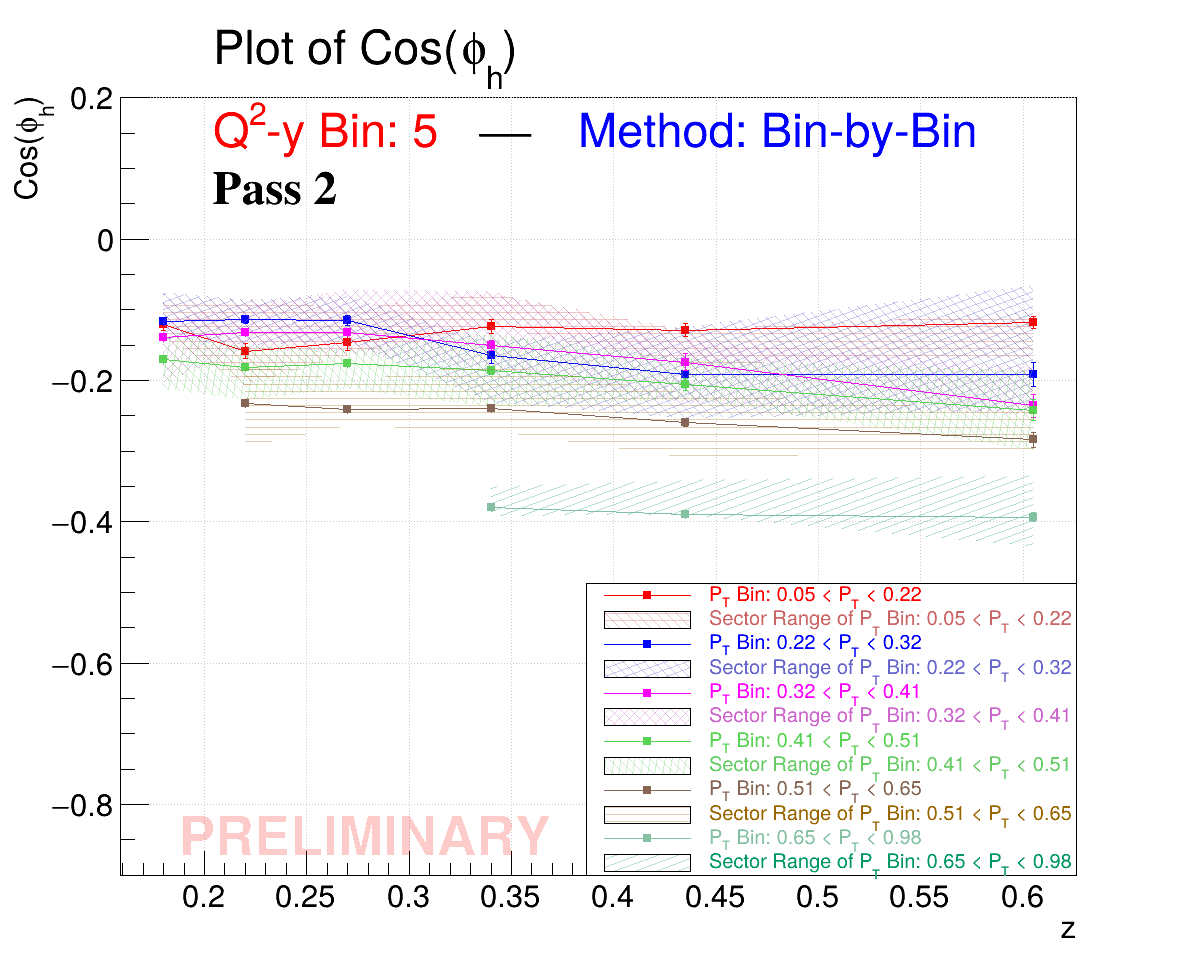

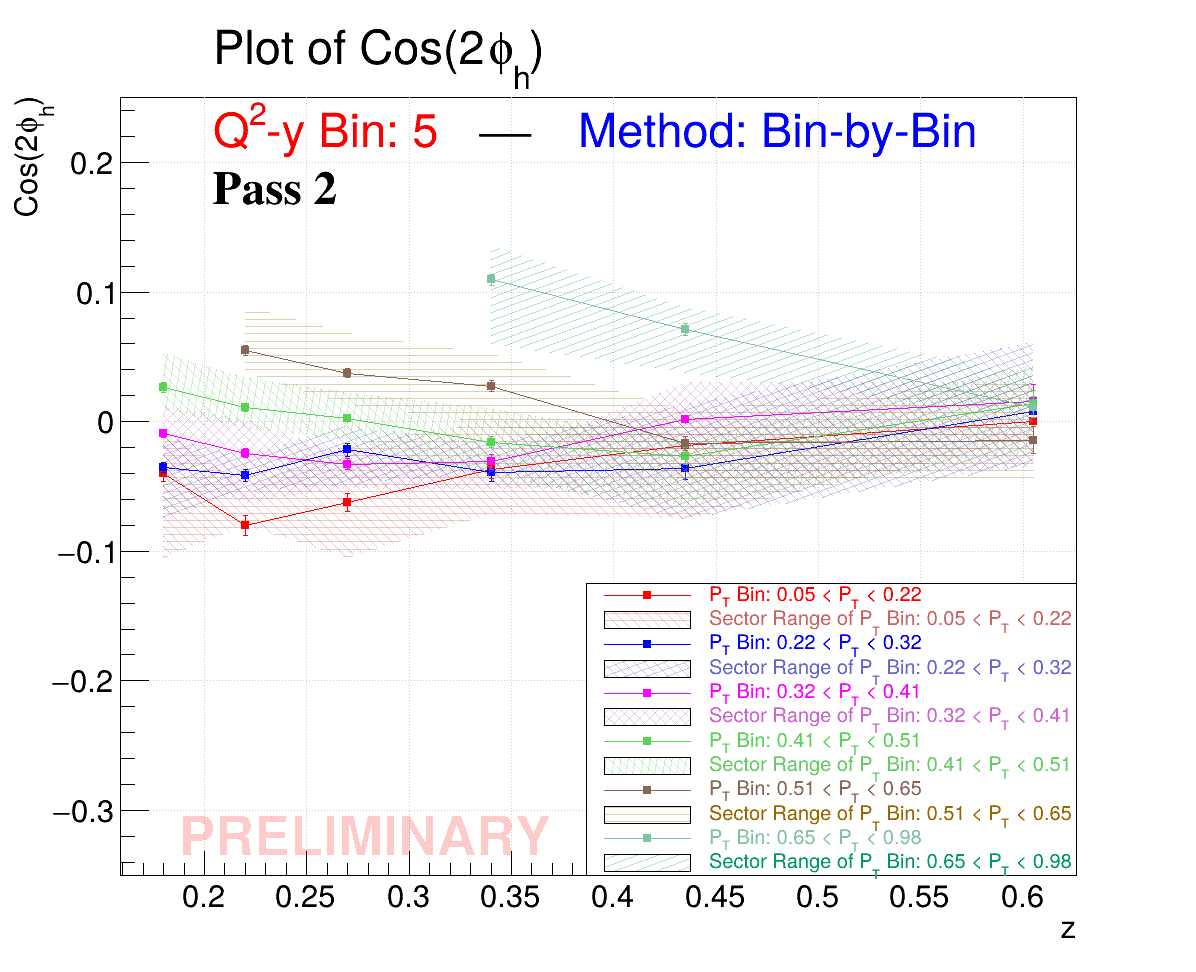

In [4]:
from array import array
latex = {}

Q2_y_Bin = 5
Use_Sectors_Q = True

Parameter = "Parameter C"
pT_row_1  = [1,  7, 13, 19, 25, 31]
pT_row_2  = [2,  8, 14, 20, 26, 32]
pT_row_3  = [3,  9, 15, 21, 27, 33]
pT_row_4  = [4, 10, 16, 22, 28, 34]
pT_row_5  = [5, 11, 17, 23, 29]
pT_row_6  = [6, 12, 18]

z__rows = return_z_pT_grid_of_Q2_y_Bins(Q2_y_Bin)
pT_rows = switch_grid_representation_variable_length(z__rows)

for index, column in enumerate(pT_rows, start=1):
    print(f"pT_row_{index} = {column}")
    
# y_values, y_errs = {}, {}
# y_maxs_collect, y_max_errs_collect, y_mins_collect, y_min_errs_collect = {}, {}, {}, {}
# for     row in [sec_row_1, sec_row_2, sec_row_3, sec_row_4, sec_row_5, sec_row_6]:
#     current_max_val = -float("inf")
#     current_max_err = -float("inf")
#     current_min_val =  float("inf")
#     current_min_err =  float("inf")
#     for val, err in row:
#         if(current_max_val  < val):
#             current_max_val = val
#             current_max_err = err
#         if(current_min_val  > val):
#             current_min_val = val
#             current_min_err = err
#     y_maxs_collect.append(current_max_val)
#     y_max_errs_collect.append(current_max_err)
#     y_mins_collect.append(current_min_val)
#     y_min_errs_collect.append(current_min_err)

x_values           = {}
y_values           = {}
y_errs             = {}
y_maxs_collect     = {}
y_max_errs_collect = {}
y_mins_collect     = {}
y_min_errs_collect = {}
tgraph_ext_shaded  = {}
tgraph_shaded      = {}
tgraph_errors      = {}
canvas             = {}
legend             = {}
mg                 = {}



for Parameter in ["Parameter B", "Parameter C"]:
    PT_BIN_COLOR = 1
    # PT_BIN_COLOR = 2

    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TCanvas(f"canvas_(Bin {Q2_y_Bin})_({Parameter})", "Graph with Extended Shaded Regions", 1200, 1000)
    legend[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TLegend(0.9, 0.1, 0.49, 0.4)  # Adjust these coordinates as needed
    # legend[f"(Bin {Q2_y_Bin}_({Parameter})"].SetHeader("Legend", "C")  # Optional header

    # Create a multigraph
    mg[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TMultiGraph()
    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].SetName(f"(Bin {Q2_y_Bin}_({Parameter})")
    row = -1
    # row = 0
    
    # for pT_row in [pT_row_1, pT_row_2, pT_row_3, pT_row_4, pT_row_5, pT_row_6]:
    for pT_row in pT_rows:
    # for pT_row in [pT_row_2]:
        row += 1
        if(row == 3):
            row += 1
        PT_BIN_COLOR     += 1
        if(PT_BIN_COLOR in [3, 5, 7]):
            PT_BIN_COLOR += 1
        if(PT_BIN_COLOR in [9]):
            PT_BIN_COLOR  = 28
        if(PT_BIN_COLOR in [29]):
            PT_BIN_COLOR  = 30
        if(PT_BIN_COLOR in [31]):
            PT_BIN_COLOR  = 42
        if(PT_BIN_COLOR in [43]):
            PT_BIN_COLOR  = 46
        if(PT_BIN_COLOR in [47]):
            PT_BIN_COLOR  = 12

        if(PT_BIN_COLOR == 2):
            PT_FILL_COLOR = ROOT.kRed
        if(PT_BIN_COLOR == 4):
            PT_FILL_COLOR = ROOT.kBlue
        if(PT_BIN_COLOR == 6):
            PT_FILL_COLOR = ROOT.kMagenta
        if(PT_BIN_COLOR == 8):
            PT_FILL_COLOR = ROOT.kGreen
        if(PT_BIN_COLOR == 28):
            PT_FILL_COLOR = ROOT.kOrange
        if(PT_BIN_COLOR == 30):
            PT_FILL_COLOR = ROOT.kTeal
        if(PT_BIN_COLOR == 42):
            PT_FILL_COLOR = ROOT.kYellow

        x_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = []
        y_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_errs[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = [], []
        y_maxs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_max_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_mins_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_min_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = [], [], [], []
        for z_pT_Bin in pT_row:
            # print(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"])
            x_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, z_pT_Bin)[1][0][1], 3))
            y_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0])
            y_errs[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1])
            current_max_val = -float("inf")
            current_max_err = -float("inf")
            current_min_val =  float("inf")
            current_min_err =  float("inf")
            if(Use_Sectors_Q):
                for sec in range(1, 7):
                    bounds_upper = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0] + Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
                    bounds_lower = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0] - Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
                    center_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0]
                    center_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1]
                    if(not (((center_val + center_err) < bounds_upper) and ((center_val - center_err) > bounds_lower))):
                        if(((center_val + center_err) < Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]) and (current_max_val < Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0])):
                            current_max_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]
                            current_max_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
                        if(((center_val + center_err) > Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]) and (current_min_val > Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0])):
                            current_min_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]
                            current_min_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
            if(current_max_val in [-float("inf")]):
                current_max_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0]
                current_max_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1]
            if(current_min_val in [float("inf")]):
                current_min_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0]
                current_min_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1]
            y_maxs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_max_val)
            y_max_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_max_err)
            y_mins_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_min_val)
            y_min_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_min_err)

        x_values_main = array('d', x_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_values_main = array('d', y_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_errs_main   = array('d', y_errs[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_maxs        = array('d', y_maxs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_max_errs    = array('d', y_max_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_mins        = array('d', y_mins_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_min_errs    = array('d', y_min_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_err_low     = array('d', [y - min_val   for y,   min_val in zip(y_values_main,   y_mins)])
        y_err_high    = array('d', [max_val - y   for y,   max_val in zip(y_values_main,   y_maxs)])
        ext_err_low   = array('d', [err + min_err for err, min_err in zip(y_err_low,   y_min_errs)])
        ext_err_high  = array('d', [err + max_err for err, max_err in zip(y_err_high,  y_max_errs)])
        n_points = len(x_values_main)

        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw()
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), ext_err_low, ext_err_high)
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetName(f"tgraph_ext_shaded_(Bin {Q2_y_Bin}-{pT_row})_({Parameter})")
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"]     = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), y_err_low,   y_err_high)
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetName(f"tgraph_shaded_(Bin {Q2_y_Bin}-{pT_row})_({Parameter})")
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"]     = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), y_errs_main, y_errs_main)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetName(f"tgraph_errors_(Bin {Q2_y_Bin}-{pT_row})_({Parameter})")

        # tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(ROOT.kOrange)
    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(PT_FILL_COLOR-9)
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColorAlpha(PT_FILL_COLOR-9, 0.35-(row*0.01))

    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3344)
    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3944)
    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].Draw("A3 sames")
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].GetYaxis().SetRangeUser(-0.9, 0.2)
        # tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(ROOT.kBlue-10)
    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3021)


    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3644)
    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(PT_FILL_COLOR-6)
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColorAlpha(PT_FILL_COLOR-6, 0.35-(row*0.01))
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3240+(row*2))

    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].Draw("3 sames")
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetMarkerStyle(21)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetMarkerSize(1)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetLineColor(PT_BIN_COLOR)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetMarkerColor(PT_BIN_COLOR)
    #     tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].Draw("PL sames")


    #     mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Add(tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "3")
        mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Add(tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "A3")
        mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Add(tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "PL")
        legend[f"(Bin {Q2_y_Bin}_({Parameter})"].AddEntry(tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "".join(["#color[", str(PT_BIN_COLOR),    "]{P_{T} Bin: ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][0], 3)), " < P_{T} < ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][2], 3)), "}"]), "PL")
        if(Use_Sectors_Q):
            legend[f"(Bin {Q2_y_Bin}_({Parameter})"].AddEntry(tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "".join(["#color[", str(PT_FILL_COLOR-6), "]{Sector Range of P_{T} Bin: ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][0], 3)), " < P_{T} < ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][2], 3)), "}"]), "f")
        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Modified()
        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Update()

    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw()

    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].SetTitle("".join(["#splitline{#splitline{Plot of Cos(", "2" if("C" in str(Parameter)) else "", "#phi_{h})}{#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "} #topbar #color[", str(root_color.Blue), "]{Method: Bin-by-Bin}}}{", str(root_color.Bold), "{Pass 2}}; z; Cos(", "2" if("C" in str(Parameter)) else "", "#phi_{h})"]))

    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw("A")
    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].GetYaxis().SetRangeUser(-0.35 if("C" in str(Parameter)) else -0.9, 0.25 if("C" in str(Parameter)) else 0.2)
    legend[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw()
    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Modified()
    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Update()
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TLatex()
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"].SetTextSize(0.06)
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"].SetTextColorAlpha(ROOT.kRed, 0.2)
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"].DrawTextNDC(0.15, 0.12, "PRELIMINARY")  # Normalized coordinates
    
    Save_Name = "".join(["Sector_Dependence_" if(Use_Sectors_Q) else "", f"Plot_of_Q2_y_Bin_{Q2_y_Bin}_", "CosPhi" if("B" in Parameter) else "Cos2Phi", ".pdf"])
    
    if(not True):
        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].SaveAs(Save_Name)
        print(f"\n{color.BBLUE}Saved: {color.UNDERLINE}{Save_Name}{color.END}\n")
    else:
        print(f"\n{color.RED}Did NOT save: {color.BOLD}{color.UNDERLINE}{Save_Name}{color.END}\n")

print("Done")

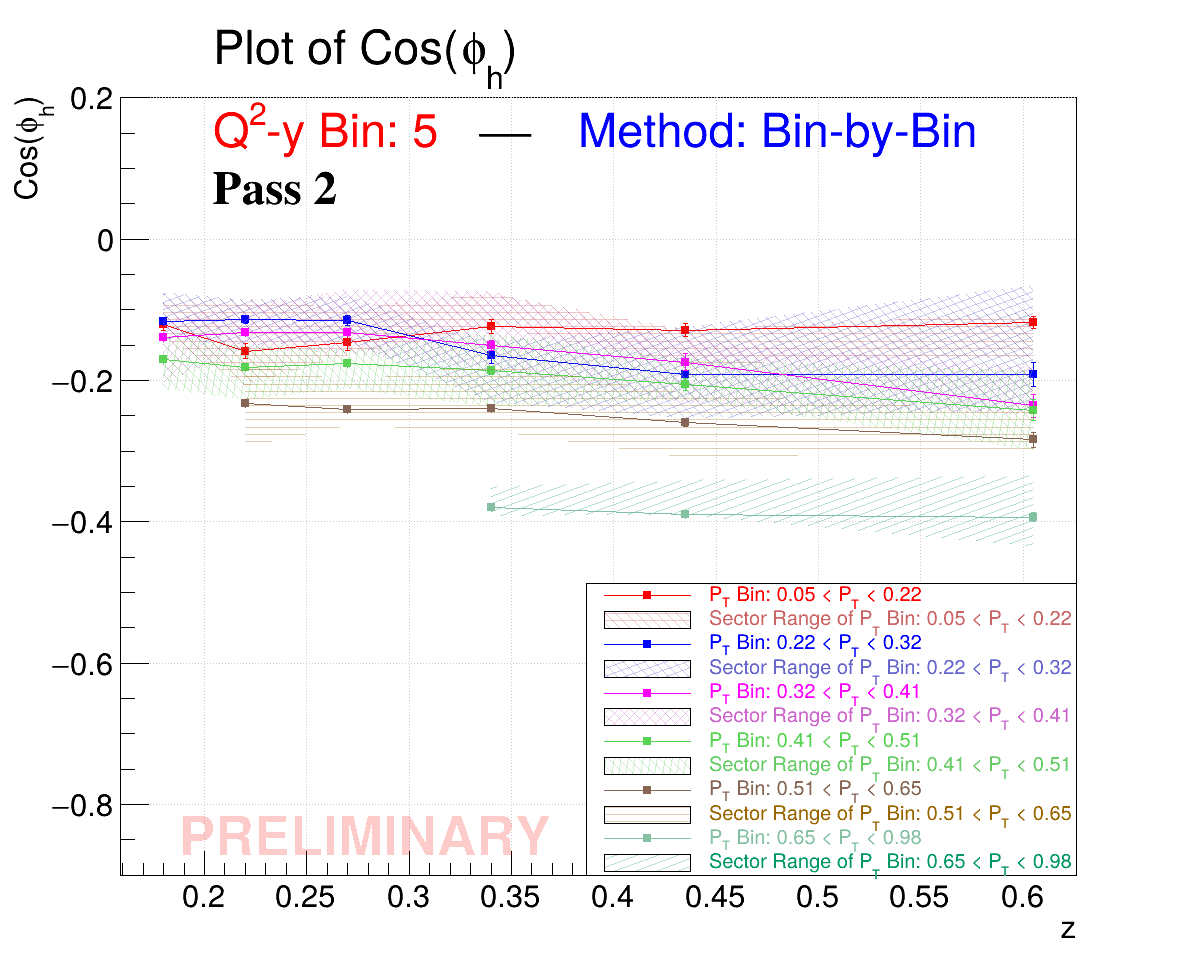

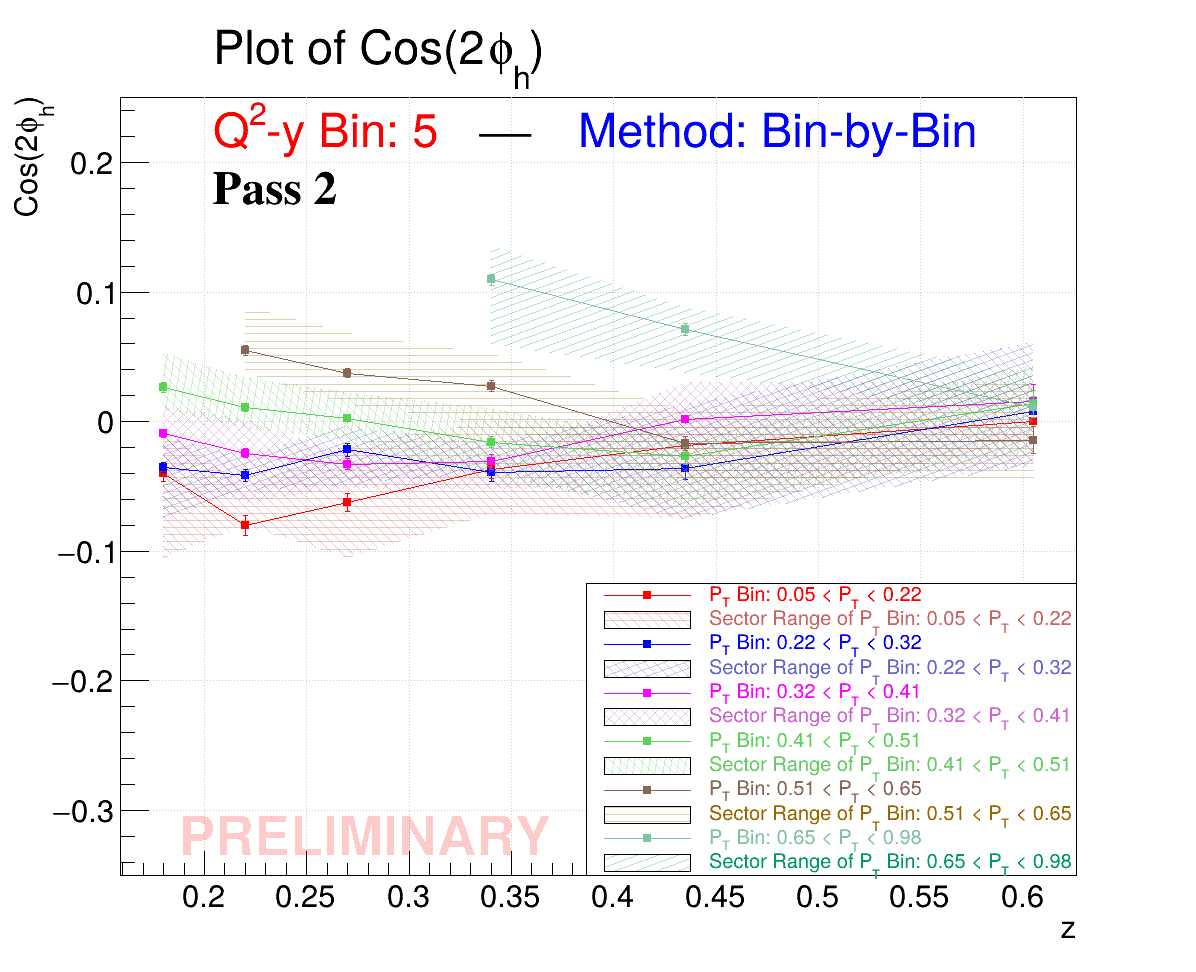

In [5]:
for ii in canvas:
    canvas[ii].Draw()

In [6]:
# stop

.

.

.

# Plotting Parameters vs Sectors

In [15]:
import ROOT

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

# Data setup
sectors = ["All", "1", "2", "3", "4", "5", "6"]

Parameter_Type = "B"

if(Parameter_Type in ["B"]):
    Parameter_Type_Title = "Cos(#phi_{h})"
else:
    Parameter_Type_Title = "Cos(2#phi_{h})"

Q2_y_Bin = 3
z_pT_Bin = 22

# Q2_y_Bin = 1
# z_pT_Bin = 32

# Q2_y_Bin = 1
# z_pT_Bin = 5

# Q2_y_Bin = 5
# z_pT_Bin = 1



# print(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_(Parameter B)"])

y_values = []
y_errors = []

# print(f"y_values = {y_values}")
# print(f"y_errors = {y_errors}")

for sec in Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_(Parameter {Parameter_Type})"]:
    y_values.append(sec[0])
    y_errors.append(sec[1])
x_values = range(len(sectors))  # x positions for the points

# print(f"y_values = {y_values}")
# print(f"y_errors = {y_errors}")


# Create TGraphErrors
n_points = len(x_values)
graph = ROOT.TGraphErrors(n_points)

for i in range(n_points):
    graph.SetPoint(i, x_values[i], y_values[i])
    graph.SetPointError(i, 0, y_errors[i])

# Style the graph
graph.SetTitle(f"#splitline{{#splitline{{Plot of {Parameter_Type_Title} vs #pi^{{+}} Sectors}}{{Q^{{2}}-y-z-P_{{T}} Bin: {Q2_y_Bin}-{z_pT_Bin}}}}}{{Pass 2}}; Pion Sector; {Parameter_Type_Title}")
graph.SetMarkerStyle(21)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetLineColor(ROOT.kBlue)

# Create canvas
canvas = ROOT.TCanvas("canvas", "Graph with Error Bars", 800, 600)

# Set right margin to reduce extra space
canvas.SetRightMargin(0.05)


graph.Draw("APL")  # Draw axes and points

# Adjust the x-axis range to start at -0.5
graph.GetXaxis().SetLimits(-0.5, n_points-0.5)

graph.GetYaxis().SetRangeUser(-0.5, 0.2)

# Draw a line at y=0
line = ROOT.TLine(-0.5, 0, n_points-0.5, 0)
line.SetLineColor(ROOT.kBlack)
line.Draw()

# Adding text label
latex = ROOT.TLatex()
latex.SetTextSize(0.12)
latex.SetTextColorAlpha(ROOT.kRed, 0.2)
latex.DrawTextNDC(0.235, 0.12, "PRELIMINARY")  # Normalized coordinates

# Customizing the x-axis labels
axis = graph.GetXaxis()
for i, sector in enumerate(sectors):
    axis.ChangeLabel(i+1, -1, -1, -1, -1, -1, sector)

# Update canvas to draw everything
canvas.Update()
canvas.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


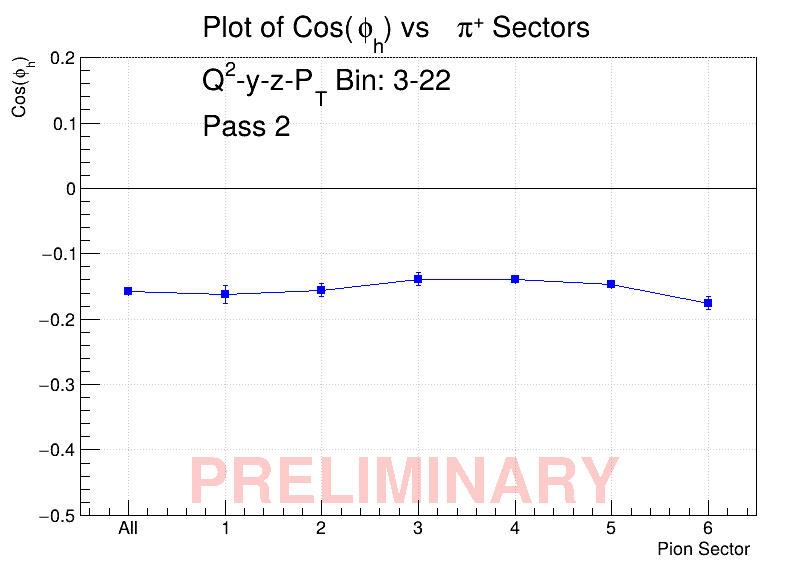

In [8]:
canvas.Draw()

.

.

.

In [9]:
stop

NameError: name 'stop' is not defined

# Showing Individual Sector Plots/Fits

In [ ]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"
    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
    loading = "".join([location, file])
    return loading





################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################

Smearing_Options = "no_smear"

Common_Name = "Pass_2_5D_Unfold_Test_V7_All"
# Common_Name = "5D_Unfold_Test_V7_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V3_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V10_All"


Common_Name = "Pass_2_New_Fiducial_Cut_Test_FC_14_V13_All"

Standard_Histogram_Title_Addition = ""

Pass_Version = "Pass 2" if("Pass_2" in Common_Name) else "Pass 1"
if(Pass_Version not in [""]):
    if(Standard_Histogram_Title_Addition not in [""]):
        Standard_Histogram_Title_Addition = f"{Pass_Version} - {Standard_Histogram_Title_Addition}"
    else:
        Standard_Histogram_Title_Addition = Pass_Version


print(f"{color.BBLUE}\nRunning with {Pass_Version} files\n\n{color.END}")
        
        
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
# if(False):
    REAL_File_Name = Common_Name
    # REAL_File_Name = REAL_File_Name.replace("_V9_All", "_V10_5311")
else:
    REAL_File_Name = "Pass_2_5D_Unfold_Test_V7_All" if(Pass_Version in ["Pass 2"]) else "5D_Unfold_Test_V7_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
# if(False):
    MC_REC_File_Name = Common_Name
else:
    MC_REC_File_Name = "Unsmeared_Pass_2_5D_Unfold_Test_V7_All"      if(Smearing_Options in ["no_smear"]) else "Pass_2_5D_Unfold_Test_V7_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V1_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V1_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V3_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V3_All"
    MC_REC_File_Name = f"Unsmeared_{Common_Name}" if(Smearing_Options in ["no_smear"]) else Common_Name
#     MC_REC_File_Name = MC_REC_File_Name.replace("_V9_All", "_V10_20")
    MC_REC_File_Name = MC_REC_File_Name.replace("_V9_All", "_V10_All")
    if(Pass_Version not in ["Pass 2"]):
        MC_REC_File_Name = MC_REC_File_Name.replace("Pass_2_", "")
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Pass_2_New_Sector_Cut_Test_V9_All"
    MC_GEN_File_Name = "Pass_2_New_Fiducial_Cut_Test_V12_All"
####################################
##   Generated Monte Carlo Data   ##
####################################


################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE,  " Real (Experimental) Data",       color.END, " in       '", color.BOLD, REAL_File_Name,   color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED,   " Reconstructed Monte Carlo Data", color.END, " in '",       color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN, " Generated Monte Carlo Data",     color.END, " in     '",   color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print(f"{color.BOLD}\nPass Version in use is:{color.END}{color.BLUE} {Pass_Version}{color.END_B}\n\n\nDone Loading RDataFrame files...\n\n{color.END}")

In [ ]:
cut = "cut_Complete_SIDIS_eS6o"
cut = "cut_Complete_SIDIS"

Smear_Type = "Smear"
Q2_y_Bin = "All"
Q2_y_Bin = "3"

if(Smear_Type in ["Smear"]):
    Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type='Smear'), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='pipsec'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t_smeared'-[NumBins=24, MinBin=0, MaxBin=360]))"
    Histo_Name_Q2_y_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type='Smear'), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2_smeared'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y_smeared'-[NumBins=100, MinBin=0, MaxBin=1]))"
    Histo_Name_z_pT_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type='Smear'), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z_smeared'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT_smeared'-[NumBins=200, MinBin=0, MaxBin=2.0]))"
else:
    Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='pipsec'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"
    Histo_Name_Q2_y_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))"
    Histo_Name_z_pT_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"

Histo_Name_rdf = str(Histo_Name_mdf.replace("mdf", "rdf"))
Histo_Name_gdf = str(Histo_Name_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_bdf = str(Histo_Name_mdf.replace("Normal_2D", "Normal_Background_2D"))


Histo_Name_Q2_y_rdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "rdf"))
Histo_Name_Q2_y_gdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_Q2_y_bdf = str(Histo_Name_Q2_y_mdf.replace("Normal_2D", "Normal_Background_2D"))


Histo_Name_z_pT_rdf = str(Histo_Name_z_pT_mdf.replace("mdf", "rdf"))
Histo_Name_z_pT_gdf = str(Histo_Name_z_pT_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_z_pT_bdf = str(Histo_Name_z_pT_mdf.replace("Normal_2D", "Normal_Background_2D"))

Histo_mdf_3D      = mdf.Get(str(Histo_Name_mdf))
Histo_bdf_3D      = mdf.Get(str(Histo_Name_bdf))
Histo_rdf_3D      = rdf.Get(str(Histo_Name_rdf))
Histo_gdf_3D      = gdf.Get(str(Histo_Name_gdf))

Histo_mdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_mdf))
Histo_bdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_bdf))
Histo_rdf_Q2_y_3D = rdf.Get(str(Histo_Name_Q2_y_rdf))
Histo_gdf_Q2_y_3D = gdf.Get(str(Histo_Name_Q2_y_gdf))

Histo_mdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_mdf))
Histo_bdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_bdf))
Histo_rdf_z_pT_3D = rdf.Get(str(Histo_Name_z_pT_rdf))
Histo_gdf_z_pT_3D = gdf.Get(str(Histo_Name_z_pT_gdf))


Histo_mdf_Title_OG = str(Histo_mdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_rdf_Title_OG = str(Histo_rdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_gdf_Title_OG = str(Histo_gdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_bdf_Title_OG = str(Histo_bdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")


Histo_mdf_Q2_y_Title = str(Histo_mdf_Q2_y_3D.GetTitle())
Histo_bdf_Q2_y_Title = str(Histo_bdf_Q2_y_3D.GetTitle())
Histo_rdf_Q2_y_Title = str(Histo_rdf_Q2_y_3D.GetTitle())
Histo_gdf_Q2_y_Title = str(Histo_gdf_Q2_y_3D.GetTitle())

Histo_mdf_z_pT_Title = str(Histo_mdf_z_pT_3D.GetTitle())
Histo_bdf_z_pT_Title = str(Histo_bdf_z_pT_3D.GetTitle())
Histo_rdf_z_pT_Title = str(Histo_rdf_z_pT_3D.GetTitle())
Histo_gdf_z_pT_Title = str(Histo_gdf_z_pT_3D.GetTitle())


z_pT_Bin_Unfold = 22
# z_pT_Bin_Unfold = "All"
Particle_Sector = "#pi^{+} Pion Sector"
Sector = "All"
if(Sector not in ["All", 0]):
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
else:
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else ""]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}"])])
    
New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
Histo_mdf_Title = Histo_mdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_Title = Histo_rdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_Title = Histo_gdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_Title = Histo_bdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)


Histo_mdf_Q2_y_Title = Histo_mdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_Q2_y_Title = Histo_bdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_Q2_y_Title = Histo_rdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_Q2_y_Title = Histo_gdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)

Histo_mdf_z_pT_Title = Histo_mdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_z_pT_Title = Histo_bdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_z_pT_Title = Histo_rdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_z_pT_Title = Histo_gdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)

Histo_mdf_Title      = Histo_mdf_Title.replace(     "Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_Title      = Histo_rdf_Title.replace(     "Cut: Complete Set of SIDIS Cuts", "")
Histo_mdf_Q2_y_Title = Histo_mdf_Q2_y_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_Q2_y_Title = Histo_rdf_Q2_y_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_mdf_z_pT_Title = Histo_mdf_z_pT_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_z_pT_Title = Histo_rdf_z_pT_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
print(f"Histo_rdf_Title = {Histo_rdf_Title}")
print(f"Standard_Histogram_Title_Addition = {Standard_Histogram_Title_Addition}")


if(z_pT_Bin_Unfold in [0, "All"]):
    Histo_mdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_3D.GetXaxis().SetRangeUser(1, 50)
    
    Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    
else:
    Histo_mdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    
    Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)

    
# Generated histogram should always integrate the sectors
Histo_gdf_3D.GetYaxis().SetRangeUser(0, 7)
if(Sector in [0, "All"]):    
    Histo_mdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_rdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_bdf_3D.GetYaxis().SetRangeUser(0, 7)
else:
    Histo_mdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_rdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_bdf_3D.GetYaxis().SetRangeUser(Sector, Sector)

Histo_mdf_2D  = Histo_mdf_3D.Project3D("z")
Histo_rdf_2D  = Histo_rdf_3D.Project3D("z")
Histo_gdf_2D  = Histo_gdf_3D.Project3D("z")
Histo_bdf_2D  = Histo_bdf_3D.Project3D("z")

Histo_mdf_2D.SetName("Histo_mdf_2D")
Histo_rdf_2D.SetName("Histo_rdf_2D")
Histo_gdf_2D.SetName("Histo_gdf_2D")
Histo_bdf_2D.SetName("Histo_bdf_2D")

Histo_mdf_2D.SetTitle(Histo_mdf_Title)
Histo_rdf_2D.SetTitle(Histo_rdf_Title)
Histo_gdf_2D.SetTitle(Histo_gdf_Title)
Histo_bdf_2D.SetTitle(Histo_bdf_Title)


Histo_Acceptance = Histo_mdf_2D.Clone("Histo_Acceptance")
Histo_Acceptance.Add(Histo_bdf_2D)
Histo_Acceptance.Divide(Histo_gdf_2D)
Histo_BBB_2D = Histo_rdf_2D.Clone("Histo_BBB_2D")
Histo_BBB_2D.Divide(Histo_Acceptance)
Histo_BBB_2D.SetTitle(str(Histo_rdf_Title.replace("Experimental Data", "Bin-by-bin Correction")).replace("Cut: Complete Set of SIDIS Cuts", ""))


Histo_mdf_Q2_y_2D = Histo_mdf_Q2_y_3D.Project3D("yz")
Histo_bdf_Q2_y_2D = Histo_bdf_Q2_y_3D.Project3D("yz")
Histo_rdf_Q2_y_2D = Histo_rdf_Q2_y_3D.Project3D("yz")
Histo_gdf_Q2_y_2D = Histo_gdf_Q2_y_3D.Project3D("yz")

Histo_mdf_Q2_y_2D.SetTitle(Histo_mdf_Q2_y_Title)
Histo_bdf_Q2_y_2D.SetTitle(Histo_bdf_Q2_y_Title)
Histo_rdf_Q2_y_2D.SetTitle(Histo_rdf_Q2_y_Title)
Histo_gdf_Q2_y_2D.SetTitle(Histo_gdf_Q2_y_Title)

Histo_mdf_z_pT_2D = Histo_mdf_z_pT_3D.Project3D("yz")
Histo_bdf_z_pT_2D = Histo_bdf_z_pT_3D.Project3D("yz")
Histo_rdf_z_pT_2D = Histo_rdf_z_pT_3D.Project3D("yz")
Histo_gdf_z_pT_2D = Histo_gdf_z_pT_3D.Project3D("yz")

Histo_mdf_z_pT_2D.SetTitle(Histo_mdf_z_pT_Title)
Histo_bdf_z_pT_2D.SetTitle(Histo_bdf_z_pT_Title)
Histo_rdf_z_pT_2D.SetTitle(Histo_rdf_z_pT_Title)
Histo_gdf_z_pT_2D.SetTitle(Histo_gdf_z_pT_Title)


Histo_All = {}
Particle_Sector = "#pi^{+} Pion Sector"
for Sector in [1, 2, 3, 4, 5, 6]:
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
    Histo_mdf_Title = Histo_mdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_rdf_Title = Histo_rdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_gdf_Title = Histo_gdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_bdf_Title = Histo_bdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_mdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_rdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_gdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_bdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    
    Histo_All[f"Histo_mdf_2D_{Sector}"]  = Histo_mdf_3D.Project3D("z")
    Histo_All[f"Histo_rdf_2D_{Sector}"]  = Histo_rdf_3D.Project3D("z")
    Histo_All[f"Histo_gdf_2D_{Sector}"]  = Histo_gdf_3D.Project3D("z")
    Histo_All[f"Histo_bdf_2D_{Sector}"]  = Histo_bdf_3D.Project3D("z")

    Histo_All[f"Histo_mdf_2D_{Sector}"].SetTitle(Histo_mdf_Title)
    Histo_All[f"Histo_rdf_2D_{Sector}"].SetTitle(Histo_rdf_Title)
    Histo_All[f"Histo_gdf_2D_{Sector}"].SetTitle(Histo_gdf_Title)
    Histo_All[f"Histo_bdf_2D_{Sector}"].SetTitle(Histo_bdf_Title)
    
    Histo_All[f"Histo_mdf_2D_{Sector}"].SetName(f"Histo_mdf_2D_{Sector}")
    Histo_All[f"Histo_rdf_2D_{Sector}"].SetName(f"Histo_rdf_2D_{Sector}")
    Histo_All[f"Histo_gdf_2D_{Sector}"].SetName(f"Histo_gdf_2D_{Sector}")
    Histo_All[f"Histo_bdf_2D_{Sector}"].SetName(f"Histo_bdf_2D_{Sector}")
    
    Histo_All[f"Histo_Acceptance_{Sector}"] = Histo_All[f"Histo_mdf_2D_{Sector}"].Clone(f"Histo_Acceptance_{Sector}")
    Histo_All[f"Histo_Acceptance_{Sector}"].Add(Histo_All[f"Histo_bdf_2D_{Sector}"])
    Histo_All[f"Histo_Acceptance_{Sector}"].Divide(Histo_All[f"Histo_gdf_2D_{Sector}"])
    Histo_All[f"Histo_BBB_2D_{Sector}"] = Histo_All[f"Histo_rdf_2D_{Sector}"].Clone(f"Histo_BBB_1D_{Sector}")
    Histo_All[f"Histo_BBB_2D_{Sector}"].Divide(Histo_All[f"Histo_Acceptance_{Sector}"])
    Histo_All[f"Histo_BBB_2D_{Sector}"].SetTitle(str(Histo_rdf_Title.replace("Experimental Data", "Bin-by-bin Correction").replace("Cut: Complete Set of SIDIS Cuts", "")))
    
    

canvas_main  = Canvas_Create(Name="Name", Num_Columns=1, Num_Rows=2, Size_X=2200, Size_Y=2200, cd_Space=0)
canvas_upper = canvas_main.cd(1)
canvas_lower = canvas_main.cd(2)
canvas_upper.Divide(3, 1, 0, 0)
canvas_lower.Divide(3, 2, 0, 0)
# ROOT.gPad.SetLogz(1)
canvas_main.Draw()

Draw_Canvas(canvas=canvas_upper, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_Q2_y_2D.Draw("colz")
Q2_y_borders = {}
for Q2_Y_Bin_ii in range(1, 18, 1):
    Q2_y_borders[Q2_Y_Bin_ii] = Draw_Q2_Y_Bins(Input_Bin=Q2_Y_Bin_ii)
    for line in Q2_y_borders[Q2_Y_Bin_ii]:
        line.Draw("same")
Histo_rdf_Q2_y_2D.GetXaxis().SetRangeUser(0.2, 0.8)
Histo_rdf_Q2_y_2D.GetYaxis().SetRangeUser(1.5, 9)
Draw_Canvas(canvas=canvas_upper, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_z_pT_2D.Draw("colz")
Histo_rdf_z_pT_2D.GetXaxis().SetRangeUser(0,   0.9)
Histo_rdf_z_pT_2D.GetYaxis().SetRangeUser(0.1, 0.9)
if(Q2_y_Bin not in ["All", "0", 0]):
    Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=int(Q2_y_Bin), Set_Max_Y=1.2, Set_Max_X=1.2, Plot_Orientation_Input="z_pT")


Draw_Canvas(canvas=canvas_upper, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_BBB_2D.SetLineWidth(4)
Histo_BBB_2D.Draw("same hist E0")
Histo_BBB_2D.GetYaxis().SetRangeUser(0, 1.3*(Histo_BBB_2D.GetBinContent(Histo_BBB_2D.GetMaximumBin())))
draw_type = "BBB"
for Sector in [1, 2, 3, 4, 5, 6]:
    color_of_sector      = Sector + 1
    if(color_of_sector  >= 4):
        color_of_sector += 1
    if(color_of_sector  >= 5):
        color_of_sector += 1
    if(color_of_sector  >= 8):
        color_of_sector += 1
    if(color_of_sector  >= 9):
        color_of_sector += 1
    if(color_of_sector  >= 10):
        color_of_sector += 30
#         print(color_of_sector)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].SetLineColor(color_of_sector)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].SetLineWidth(4)
#     Draw_Canvas(canvas=canvas_upper, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetYaxis().SetRangeUser(0, 1.2*(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetBinContent(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetMaximumBin())))
#     Histo_All[f"Histo_{draw_type}_2D_{Sector}"].Draw("same hist E0")
    
    
    Draw_Canvas(canvas=canvas_lower, cd_num=Sector, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetYaxis().SetRangeUser(0, 1.5*(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetBinContent(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetMaximumBin())))
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].Draw("same hist E0")
    
    
# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_rdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_mdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# Histo_ratio_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
# Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
# Histo_ratio_2D_Log.Draw("colz")
# ROOT.gPad.SetLogz(1)

# # Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# # Histo_ratio_2D.Draw("lego")
# # # ROOT.gPad.SetLogz(1)
print("Done")

# print(f"Histo_mdf_Total = {Histo_mdf_Total}")
# print(f"Histo_rdf_Total = {Histo_rdf_Total}")
# print(f"Histo_gdf_Total = {Histo_gdf_Total}")


#splitline{#splitline{Monte Carlo Data (GEN) #phi_{h}}{#splitline{Q^{2}-y Bin: 3 #topbar z-P_{T} Bin: All}}{Cut: No Cuts}